# Generates trend mapping for ECLIPSE and array: 

Plots the trend array for the ECLIPSE emissions and generates the trend array .txt file

https://previous.iiasa.ac.at/web/home/research/researchPrograms/air/ECLIPSEv6b.html

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.path as mpath
import cmocean
import numpy as np
from matplotlib import cm
import pandas as pd
from datetime import datetime
import matplotlib.ticker as ticker

In [2]:
path = 'E:\\eclipse'
filename = 'ECLIPSE_V6b_CLE_base_BC'

In [3]:
ECLIPSE_V6b = xr.open_dataset(path+'\\'+filename+'.nc')

In [4]:
ECLIPSE_V6b

<xarray.Dataset>
Dimensions:   (lat: 360, lon: 720, time: 11)
Coordinates:
  * lat       (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon       (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * time      (time) int32 1990 1995 2000 2005 2010 ... 2020 2025 2030 2040 2050
Data variables:
    emis_awb  (time, lat, lon) float64 ...
    emis_dom  (time, lat, lon) float64 ...
    emis_ene  (time, lat, lon) float64 ...
    emis_ind  (time, lat, lon) float64 ...
    emis_tra  (time, lat, lon) float64 ...
    emis_all  (time, lat, lon) float64 ...
    emis_flr  (time, lat, lon) float64 ...
    emis_wst  (time, lat, lon) float64 ...
    emis_shp  (time, lat, lon) float64 ...
Attributes:
    description:   Gridded emissions of BC by RCP sector
    scenario:      ECLIPSE_V6b_CLE_base
    generated_by:  Chris Heyes, IIASA
    date:          21-May-2019 16:32:51

In [5]:
def create_projections_dict(ZEP_lat, ZEP_lon, central_longitude):
    dict_projections = {}
    
    geo = ccrs.Geodetic(); dict_projections['geo'] = geo
    rotated_pole = ccrs.RotatedPole(pole_latitude=ZEP_lat, pole_longitude=ZEP_lon, central_rotated_longitude=central_longitude)
    dict_projections['rotated_pole'] = rotated_pole
    North_Stereo = ccrs.NorthPolarStereo() 
    dict_projections['North_Stereo'] = North_Stereo
    ortho = ccrs.Orthographic(central_longitude=ZEP_lon, central_latitude=ZEP_lat)
    dict_projections['ortho'] = ortho
    Nearside = ccrs.NearsidePerspective(central_longitude=ZEP_lon, central_latitude=ZEP_lat, satellite_height=35785831, false_easting=0, false_northing=0, globe=None)
    dict_projections['Nearside'] = Nearside
    PlateCarree = ccrs.PlateCarree()
    dict_projections['PlateCarree'] = PlateCarree
    rotated_pole = ccrs.RotatedPole(pole_latitude=ZEP_lat, pole_longitude=ZEP_lon)  
    dict_projections['rotated_pole'] = rotated_pole
    
    return dict_projections     
          
def sp_map(*nrs, projection = ccrs.PlateCarree(), **kwargs):
    return plt.subplots(*nrs, subplot_kw={'projection':projection}, **kwargs)

def add_map_features(ax):
    ax.coastlines(resolution='50m')
    #ax.add_feature(cy.feature.BORDERS);
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='gray', alpha=0.2, linestyle='--')
    
def polarCentral_set_latlim(lat_lims, ax):
    # Compute a circle in axes coordinates, which we can use as a boundary
    ax.set_extent([-180, 180, lat_lims[0], lat_lims[1]], ccrs.PlateCarree())
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)

In [6]:
def circular_traj_plots(XR_Dataset, emission_type, axes_projection='North_Stereo', 
                        title='', ZEP_lat=78.906, ZEP_lon=11.888, central_longitude=0,
                        orientation='horizontal', colourbar_label='', colourbar_labelsize=20, 
                        colourbar_tick_fontsize=12, scientific_notation=True, 
                        decimal_places_colourbar=0, extend=None, cb_pos_x=.95, cb_width=0.02,
                        vmax=4, colormap='YlOrBr', lat_min=50, units='[kt/year]',
                        emission_type_name='BC emissions', fs=20):  
    
    dict_projections = create_projections_dict(ZEP_lat, ZEP_lon, central_longitude)                   
    projection = dict_projections[axes_projection]
    
    fig, ax = sp_map(1, projection=projection, figsize=(7,7))

    lat_lims = [lat_min,90]
    polarCentral_set_latlim(lat_lims, ax)   
    
    array = XR_Dataset[emission_type]
    
    gridlons, gridlats = np.meshgrid(np.array(XR_Dataset['lon']),np.array(XR_Dataset['lat']))
    mapped_grid = ax.pcolormesh(gridlons, gridlats, array, transform=ccrs.PlateCarree(),
                                            vmin=0, vmax=float(vmax), cmap = colormap)
    
    cb = plt.colorbar(mapped_grid, orientation="vertical", pad=0.02, extend='max',
                      aspect=16, shrink=0.8)
    cb.set_label(str(emission_type_name)+" "+str(units), rotation=270,labelpad=25, size=fs)
    for t in cb.ax.get_yticklabels():
        t.set_fontsize(fs)

    add_map_features(ax)
    ax.coastlines(resolution="50m", linewidth=.5, alpha=.3)
    ax.gridlines(alpha=.2, lw=1)  
    
    geo = dict_projections['geo']   
    
    
    ax.plot([ZEP_lon], [ZEP_lat], 'bo', ms=5, alpha=0.5, transform=geo) 
    ax.set_title(str(title), loc='left', size=fs)    
    
    plt.show()
    return fig

In [7]:
ECLIPSE_V6b

<xarray.Dataset>
Dimensions:   (lat: 360, lon: 720, time: 11)
Coordinates:
  * lat       (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon       (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * time      (time) int32 1990 1995 2000 2005 2010 ... 2020 2025 2030 2040 2050
Data variables:
    emis_awb  (time, lat, lon) float64 ...
    emis_dom  (time, lat, lon) float64 ...
    emis_ene  (time, lat, lon) float64 ...
    emis_ind  (time, lat, lon) float64 ...
    emis_tra  (time, lat, lon) float64 ...
    emis_all  (time, lat, lon) float64 ...
    emis_flr  (time, lat, lon) float64 ...
    emis_wst  (time, lat, lon) float64 ...
    emis_shp  (time, lat, lon) float64 ...
Attributes:
    description:   Gridded emissions of BC by RCP sector
    scenario:      ECLIPSE_V6b_CLE_base
    generated_by:  Chris Heyes, IIASA
    date:          21-May-2019 16:32:51

In [8]:
ECLIPSE_V6b_2015 = ECLIPSE_V6b.sel(time=2015)

In [9]:
emission_type='emis_all'
ECLIPSE_V6b_2015 = ECLIPSE_V6b_2015.where(ECLIPSE_V6b_2015[emission_type] != 0.0) 

In [25]:
def not_zero(ds, emission_type='emis_all'):
    ds = ds.where(ds[emission_type] != 0.0) 
    return ds

<xarray.DataArray 'emis_all' ()>
array(0.03098476)
Coordinates:
    time     int32 2015


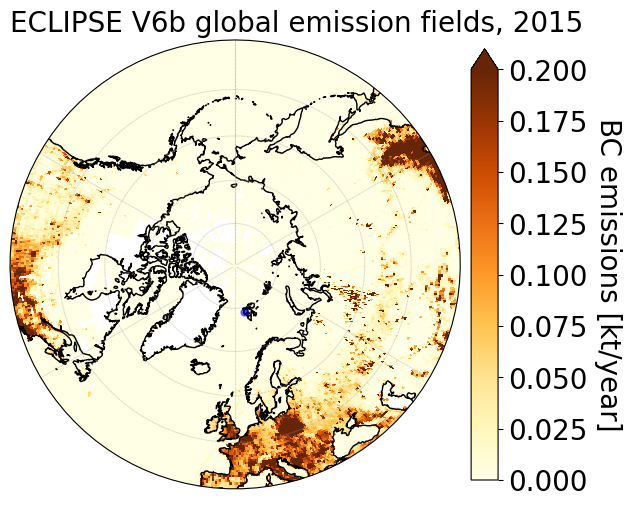

In [11]:
fig = circular_traj_plots(ECLIPSE_V6b_2015, emission_type='emis_all', axes_projection='North_Stereo', 
                        title='ECLIPSE V6b global emission fields, 2015', ZEP_lat=78.906, ZEP_lon=11.888, 
                          central_longitude=0, vmax=0.2, 
                         lat_min=40)

<xarray.DataArray 'emis_all' ()>
array(0.03096057)
Coordinates:
    time     int32 2000


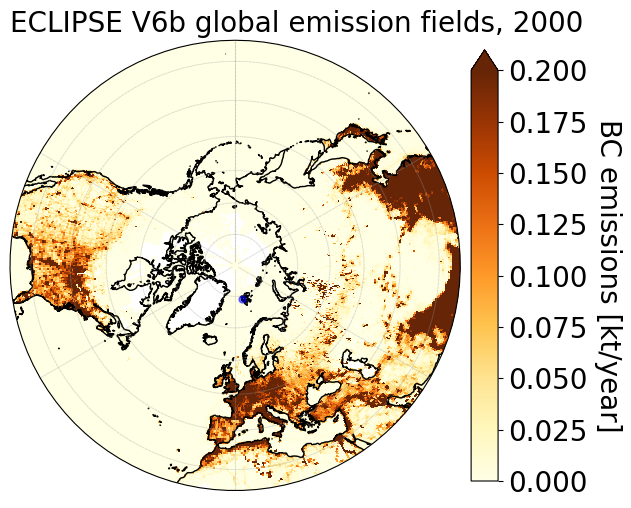

<xarray.DataArray 'emis_all' ()>
array(0.0330085)
Coordinates:
    time     int32 2005


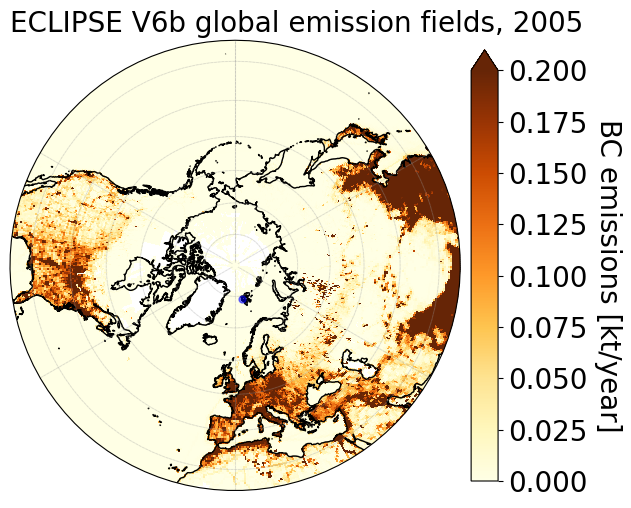

<xarray.DataArray 'emis_all' ()>
array(0.0333291)
Coordinates:
    time     int32 2010


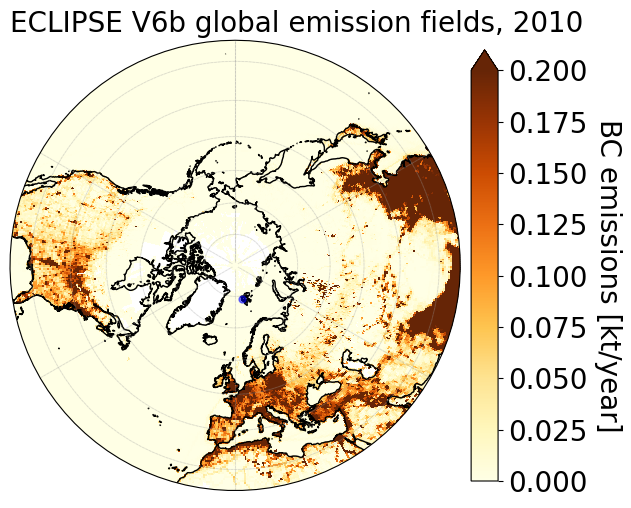

<xarray.DataArray 'emis_all' ()>
array(0.03098476)
Coordinates:
    time     int32 2015


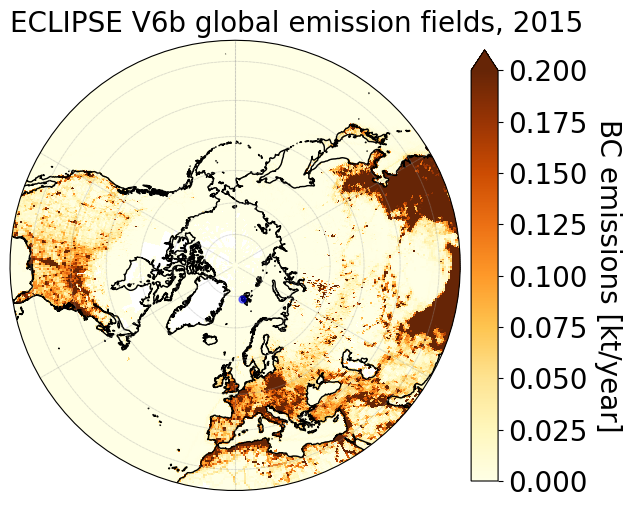

<xarray.DataArray 'emis_all' ()>
array(0.02882109)
Coordinates:
    time     int32 2020


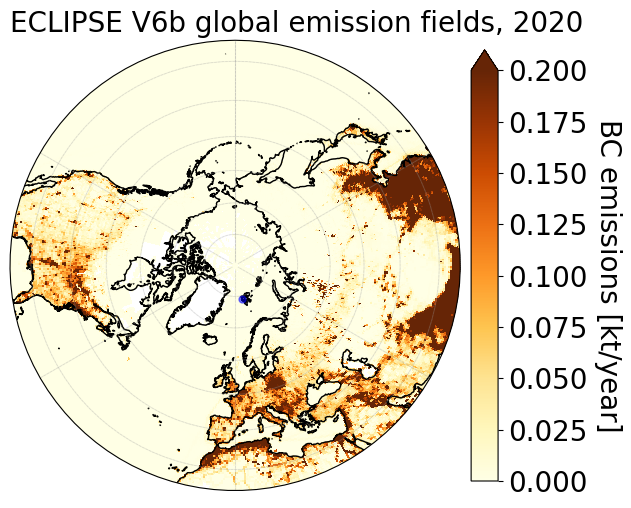

In [12]:
for year in [2000, 2005, 2010, 2015, 2020]:
    ECLIPSE_V6b_yr = ECLIPSE_V6b.sel(time=year)
    ECLIPSE_V6b_yr = not_zero(ECLIPSE_V6b_yr, emission_type='emis_all')
    fig = circular_traj_plots(ECLIPSE_V6b_yr, emission_type='emis_all', axes_projection='North_Stereo', 
                        title='ECLIPSE V6b global emission fields, '+str(year), ZEP_lat=78.906, ZEP_lon=11.888, 
                         central_longitude=0, vmax=0.2, 
                         lat_min=25)

<xarray.DataArray 'emis_shp' ()>
array(0.00026228)
Coordinates:
    time     int32 2000


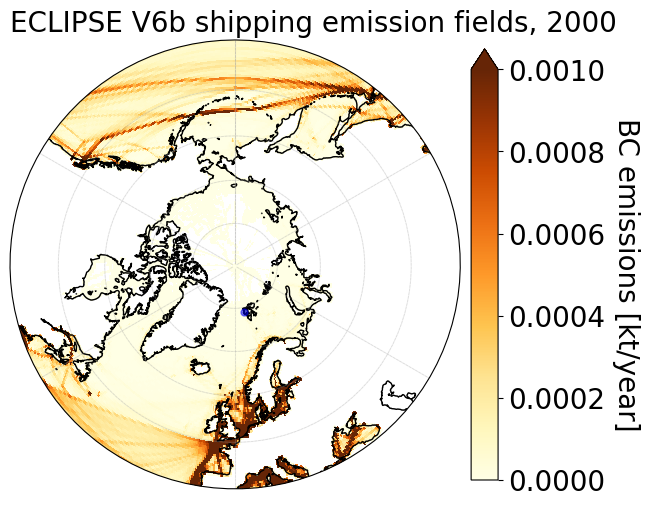

<xarray.DataArray 'emis_shp' ()>
array(0.00030138)
Coordinates:
    time     int32 2005


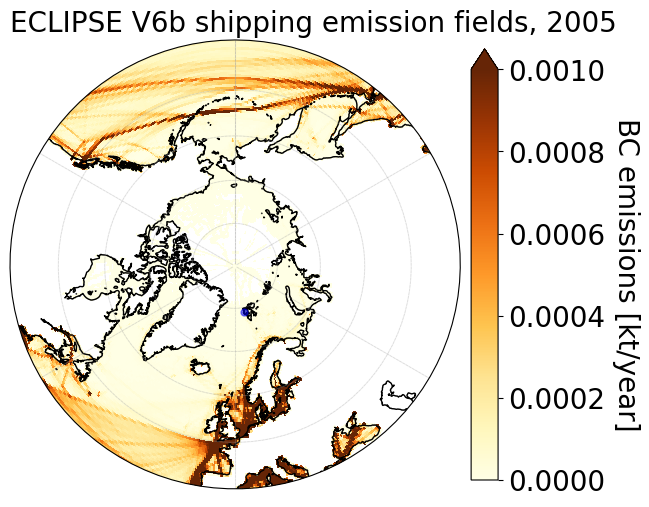

<xarray.DataArray 'emis_shp' ()>
array(0.00032451)
Coordinates:
    time     int32 2010


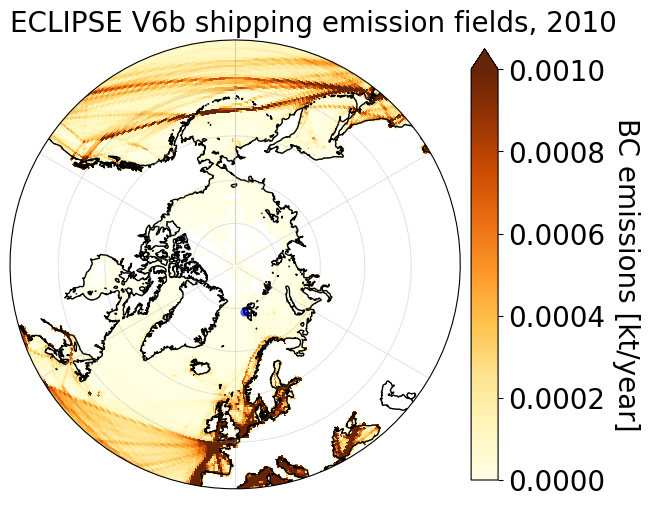

<xarray.DataArray 'emis_shp' ()>
array(0.00028017)
Coordinates:
    time     int32 2015


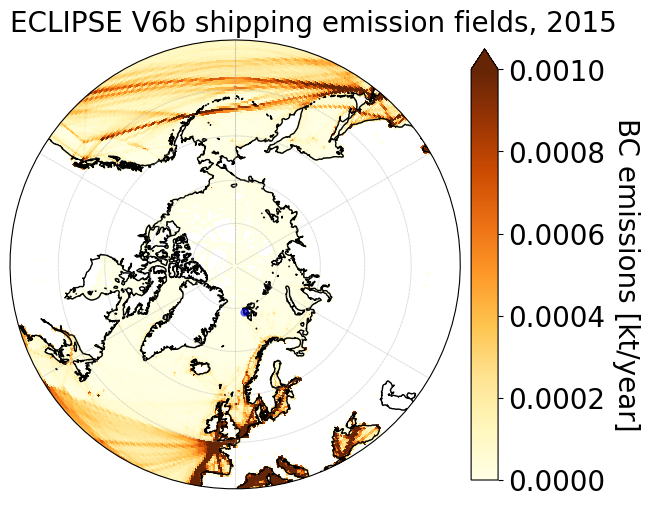

<xarray.DataArray 'emis_shp' ()>
array(0.00030049)
Coordinates:
    time     int32 2020


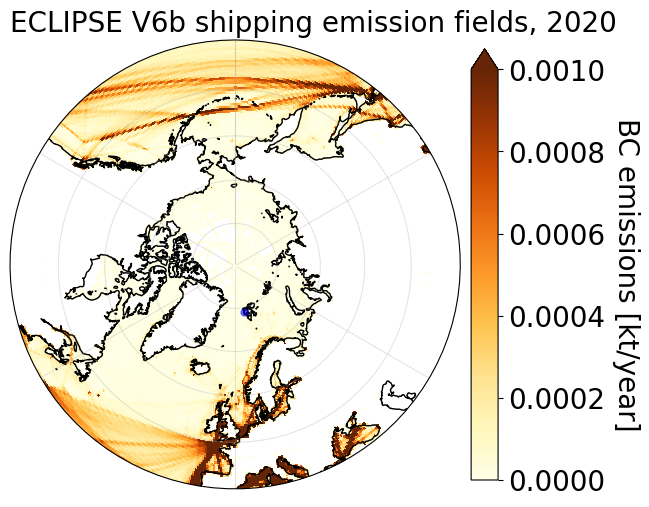

In [13]:
for year in [2000, 2005, 2010, 2015, 2020]:
    ECLIPSE_V6b_yr = ECLIPSE_V6b.sel(time=year)
    ECLIPSE_V6b_yr = not_zero(ECLIPSE_V6b_yr, emission_type='emis_shp')
    fig = circular_traj_plots(ECLIPSE_V6b_yr, emission_type='emis_shp', axes_projection='North_Stereo', 
                        title='ECLIPSE V6b shipping emission fields, '+str(year), ZEP_lat=78.906, ZEP_lon=11.888, 
                        central_longitude=0, vmax=0.001, lat_min=40)

In [14]:
ECLIPSE_V6b

<xarray.Dataset>
Dimensions:   (lat: 360, lon: 720, time: 11)
Coordinates:
  * lat       (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon       (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * time      (time) int32 1990 1995 2000 2005 2010 ... 2020 2025 2030 2040 2050
Data variables:
    emis_awb  (time, lat, lon) float64 ...
    emis_dom  (time, lat, lon) float64 ...
    emis_ene  (time, lat, lon) float64 ...
    emis_ind  (time, lat, lon) float64 ...
    emis_tra  (time, lat, lon) float64 ...
    emis_all  (time, lat, lon) float64 ...
    emis_flr  (time, lat, lon) float64 ...
    emis_wst  (time, lat, lon) float64 ...
    emis_shp  (time, lat, lon) float64 ...
Attributes:
    description:   Gridded emissions of BC by RCP sector
    scenario:      ECLIPSE_V6b_CLE_base
    generated_by:  Chris Heyes, IIASA
    date:          21-May-2019 16:32:51

<xarray.DataArray 'emis_flr' ()>
array(0.04566586)
Coordinates:
    time     int32 2015


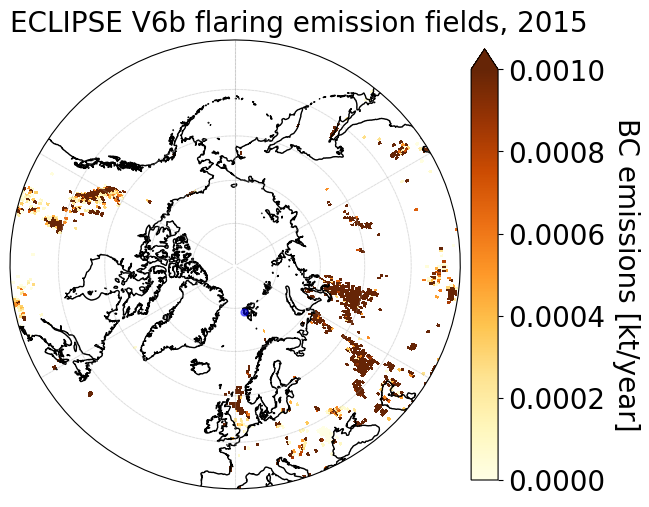

<xarray.DataArray 'emis_flr' ()>
array(0.04681638)
Coordinates:
    time     int32 2020


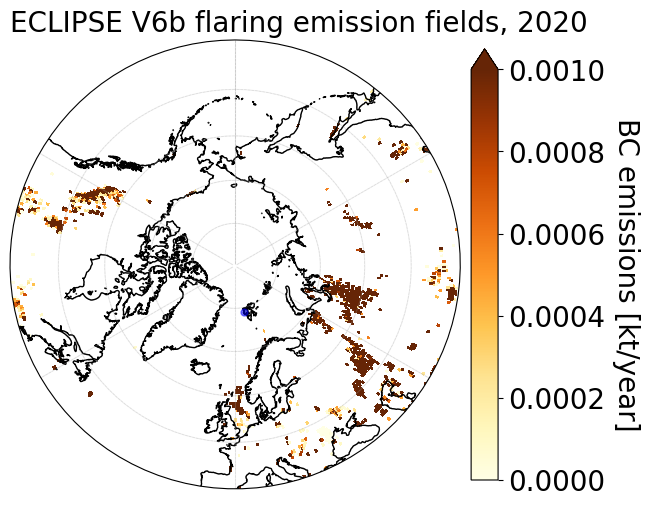

In [15]:
for year in [2015, 2020]:
    ECLIPSE_V6b_yr = ECLIPSE_V6b.sel(time=year)
    ECLIPSE_V6b_yr = not_zero(ECLIPSE_V6b_yr, emission_type='emis_flr')
    fig = circular_traj_plots(ECLIPSE_V6b_yr, emission_type='emis_flr', axes_projection='North_Stereo', 
                        title='ECLIPSE V6b flaring emission fields, '+str(year), ZEP_lat=78.906, ZEP_lon=11.888, 
                        central_longitude=0, vmax=0.001, lat_min=40)

In [17]:
def get_BC_means(ECLIPSE_V6b, lat_threshold=45):
    years = [2000, 2005, 2010, 2015, 2020]
    means = []
    for year in years:
        ECLIPSE_V6b_yr = ECLIPSE_V6b.sel(time=year)
        ECLIPSE_V6b_yr_45 = ECLIPSE_V6b_yr.where(ECLIPSE_V6b_yr['lat'] > lat_threshold)
        lat_lon_mean = ECLIPSE_V6b_yr_45.sum(dim='lat').sum(dim='lon')
        print(lat_lon_mean['emis_all'].values)
        means.append(lat_lon_mean['emis_all'].values)
    return means

In [18]:
def fancy(ax, fontsize=25):    
    # thickning the axes spines
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color('k')        
    # set the fontsize for all your ticks    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)        
    # properties of the ticks
    ax.tick_params(direction='out', length=8, width=2, pad=10, bottom=True, top=False, left=True, right=False, color='k')    
    # add a grid to the plot
    ax.grid(True, alpha=0.5)    
    # mask top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [19]:
def create_dict_elements_to_colours(elements):
    colors=cm.copper(np.linspace(0,1,int(len(elements))))
    dict_elements_to_colors = dict(zip(elements, colors))
    return dict_elements_to_colors

In [20]:
dict_elements_to_colors = create_dict_elements_to_colours(elements=[0, 25, 35, 45, 55, 65, 75, 85])

In [21]:
dict_elements_to_colors

{0: array([0., 0., 0., 1.]),
 25: array([0.17439442, 0.11028706, 0.07023529, 1.        ]),
 35: array([0.35363313, 0.22363765, 0.14242157, 1.        ]),
 45: array([0.52802756, 0.33392471, 0.21265686, 1.        ]),
 55: array([0.70726627, 0.44727529, 0.28484314, 1.        ]),
 65: array([0.88166069, 0.55756235, 0.35507843, 1.        ]),
 75: array([1.        , 0.67091294, 0.42726471, 1.        ]),
 85: array([1.    , 0.7812, 0.4975, 1.    ])}

In [22]:
plt.legend?

In [23]:
def average_lats_plot(ECLIPSE_V6b, lats=[0, 25, 35, 45, 55, 65, 75, 85], dict_elements_to_colors=None,
                     show_legend=False):
    fig, ax = plt.subplots(figsize=(10,5))
    
    if dict_elements_to_colors is None:
        print("no colour dict given:")
        dict_elements_to_colors = create_dict_elements_to_colours(elements=lats)

    years = [2000, 2005, 2010, 2015, 2020]
    years = [int(x) for x in years]

    for lat_threshold in lats:
        means = get_BC_means(ECLIPSE_V6b, lat_threshold=lat_threshold)
        print(means)
        ax.plot(years, means, 'o-', mfc=None, label=str(lat_threshold), 
               c=dict_elements_to_colors[lat_threshold])

    ax.set_ylabel('BC emissions [kt/year]', fontsize=20)
    fancy(ax, fontsize=18)
    ax.set_title('NH above x$\degree$N', loc='left', fontsize=20)
    ax.set_xticks(np.arange(years[0], years[-1]+5, 5), labels=[str(x) for x in years])
    plt.ylim(0, 5700)
    if show_legend == True:
        plt.legend(title='x:', frameon=False, bbox_to_anchor=(1.01, 1), borderaxespad=0)
    plt.show()
    return fig

5218.788002854007
5577.775874914074
5607.632362076076
5333.732153862336
4911.203925592019
[array(5218.78800285), array(5577.77587491), array(5607.63236208), array(5333.73215386), array(4911.20392559)]


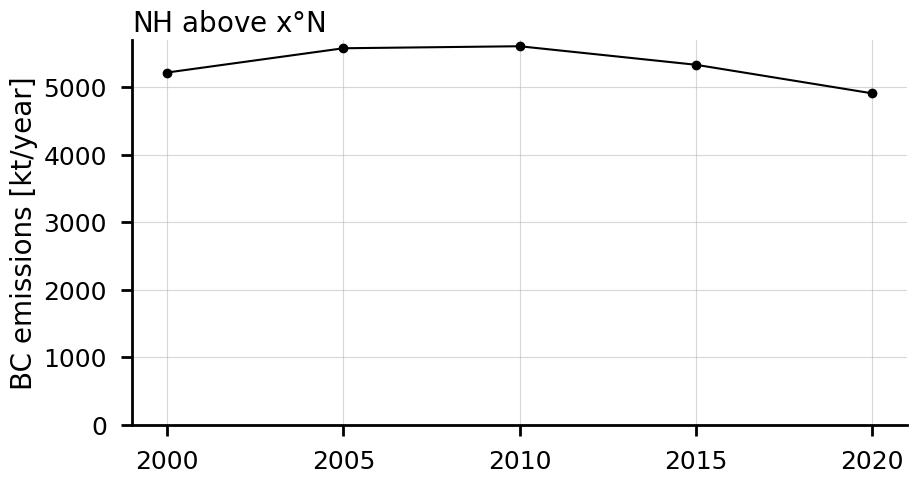

5218.788002854007
5577.775874914074
5607.632362076076
5333.732153862336
4911.203925592019
[array(5218.78800285), array(5577.77587491), array(5607.63236208), array(5333.73215386), array(4911.20392559)]
3333.130843465258
3508.6508756053577
3390.594011475153
3041.913934872227
2743.3692526806863
[array(3333.13084347), array(3508.65087561), array(3390.59401148), array(3041.91393487), array(2743.36925268)]


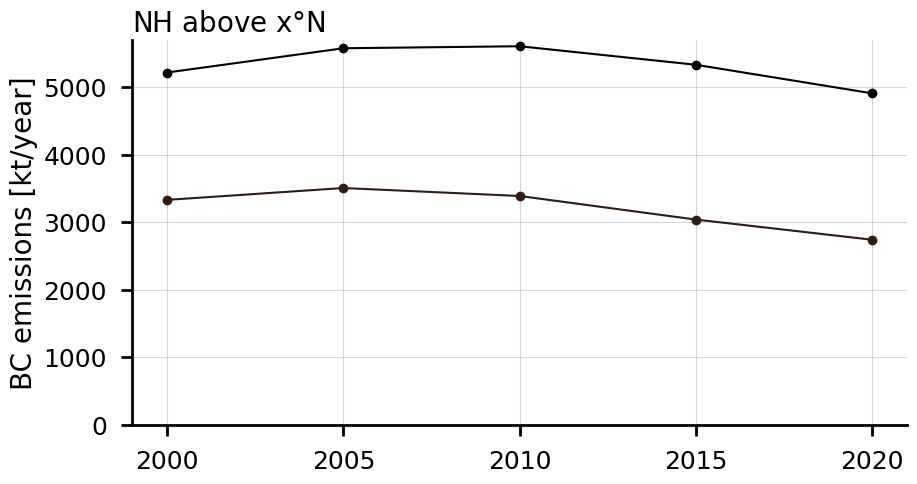

5218.788002854007
5577.775874914074
5607.632362076076
5333.732153862336
4911.203925592019
[array(5218.78800285), array(5577.77587491), array(5607.63236208), array(5333.73215386), array(4911.20392559)]
3333.130843465258
3508.6508756053577
3390.594011475153
3041.913934872227
2743.3692526806863
[array(3333.13084347), array(3508.65087561), array(3390.59401148), array(3041.91393487), array(2743.36925268)]
1860.7929954505173
1935.1268098472303
1791.8338568706731
1508.1257898166205
1354.8155601158637
[array(1860.79299545), array(1935.12680985), array(1791.83385687), array(1508.12578982), array(1354.81556012)]


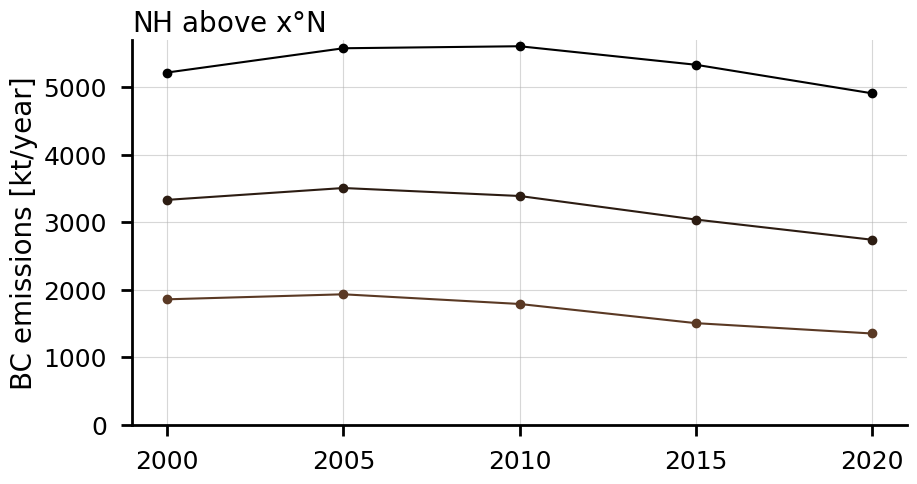

5218.788002854007
5577.775874914074
5607.632362076076
5333.732153862336
4911.203925592019
[array(5218.78800285), array(5577.77587491), array(5607.63236208), array(5333.73215386), array(4911.20392559)]
3333.130843465258
3508.6508756053577
3390.594011475153
3041.913934872227
2743.3692526806863
[array(3333.13084347), array(3508.65087561), array(3390.59401148), array(3041.91393487), array(2743.36925268)]
1860.7929954505173
1935.1268098472303
1791.8338568706731
1508.1257898166205
1354.8155601158637
[array(1860.79299545), array(1935.12680985), array(1791.83385687), array(1508.12578982), array(1354.81556012)]
731.4844112731145
723.7210095623586
656.1614600887485
558.3128574194905
507.10252211643785
[array(731.48441127), array(723.72100956), array(656.16146009), array(558.31285742), array(507.10252212)]


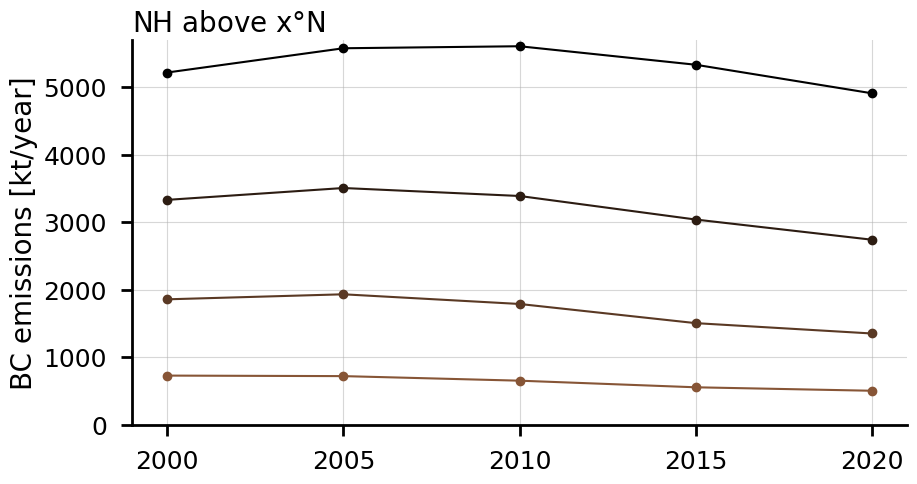

5218.788002854007
5577.775874914074
5607.632362076076
5333.732153862336
4911.203925592019
[array(5218.78800285), array(5577.77587491), array(5607.63236208), array(5333.73215386), array(4911.20392559)]
3333.130843465258
3508.6508756053577
3390.594011475153
3041.913934872227
2743.3692526806863
[array(3333.13084347), array(3508.65087561), array(3390.59401148), array(3041.91393487), array(2743.36925268)]
1860.7929954505173
1935.1268098472303
1791.8338568706731
1508.1257898166205
1354.8155601158637
[array(1860.79299545), array(1935.12680985), array(1791.83385687), array(1508.12578982), array(1354.81556012)]
731.4844112731145
723.7210095623586
656.1614600887485
558.3128574194905
507.10252211643785
[array(731.48441127), array(723.72100956), array(656.16146009), array(558.31285742), array(507.10252212)]
28.20756653824156
36.95276321063939
26.125709325057247
19.661511241829597
19.849254548872793
[array(28.20756654), array(36.95276321), array(26.12570933), array(19.66151124), array(19.84925455)]

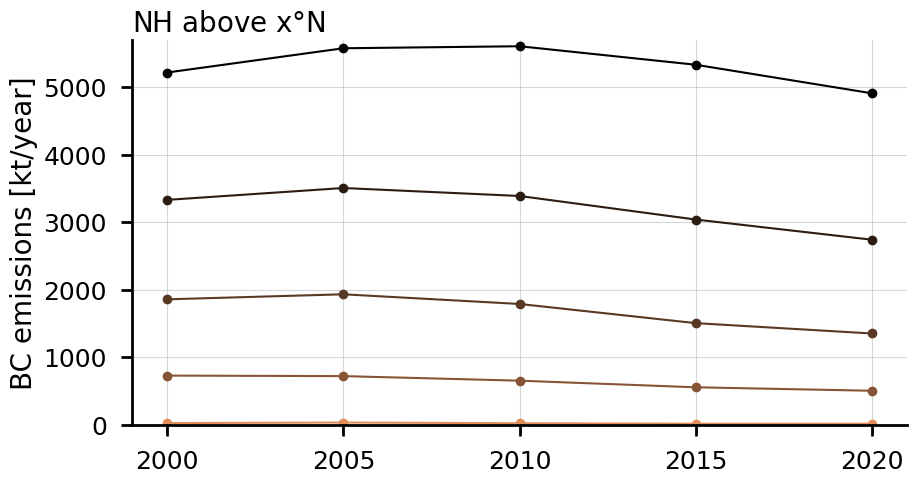

5218.788002854007
5577.775874914074
5607.632362076076
5333.732153862336
4911.203925592019
[array(5218.78800285), array(5577.77587491), array(5607.63236208), array(5333.73215386), array(4911.20392559)]
3333.130843465258
3508.6508756053577
3390.594011475153
3041.913934872227
2743.3692526806863
[array(3333.13084347), array(3508.65087561), array(3390.59401148), array(3041.91393487), array(2743.36925268)]
1860.7929954505173
1935.1268098472303
1791.8338568706731
1508.1257898166205
1354.8155601158637
[array(1860.79299545), array(1935.12680985), array(1791.83385687), array(1508.12578982), array(1354.81556012)]
731.4844112731145
723.7210095623586
656.1614600887485
558.3128574194905
507.10252211643785
[array(731.48441127), array(723.72100956), array(656.16146009), array(558.31285742), array(507.10252212)]
0.00024504657486906464
0.00023235349548941073
0.00031809111917467377
0.0003847156400709169
0.0004125123440151116
[array(0.00024505), array(0.00023235), array(0.00031809), array(0.00038472), arr

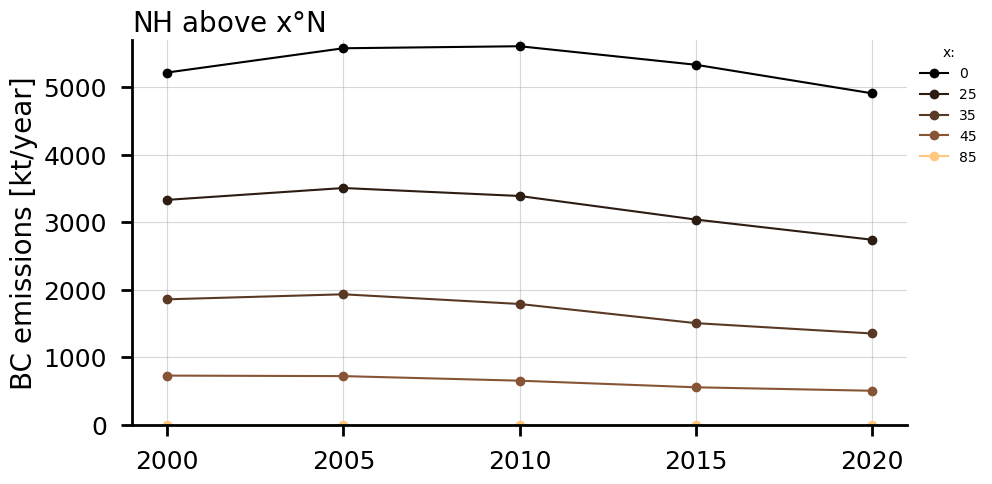

In [23]:
fig = average_lats_plot(ECLIPSE_V6b, lats=[0], dict_elements_to_colors=dict_elements_to_colors)
fig = average_lats_plot(ECLIPSE_V6b, lats=[0, 25], dict_elements_to_colors=dict_elements_to_colors)
fig = average_lats_plot(ECLIPSE_V6b, lats=[0, 25, 35], dict_elements_to_colors=dict_elements_to_colors)
fig = average_lats_plot(ECLIPSE_V6b, lats=[0, 25, 35, 45], dict_elements_to_colors=dict_elements_to_colors)
fig = average_lats_plot(ECLIPSE_V6b, lats=[0, 25, 35, 45, 65], dict_elements_to_colors=dict_elements_to_colors)
fig = average_lats_plot(ECLIPSE_V6b, lats=[0, 25, 35, 45, 85], dict_elements_to_colors=dict_elements_to_colors, show_legend=True)

In [24]:
ax.set_xticks?

Object `ax.set_xticks` not found.


In [8]:
import sys

sys.path.append(r'C:\Users\DominicHeslinRees\Documents\GitHub\HYSPLIT_plotting')
import HYSPLIT_plotting as HYplot

In [26]:
year_arrays = []
for year in [2000, 2005, 2010, 2015, 2020]:
    ECLIPSE_V6b_yr = ECLIPSE_V6b.sel(time=year)
    #ECLIPSE_V6b_yr_NH = ECLIPSE_V6b_yr.where(ECLIPSE_V6b_yr['lat'] > 0)
    ECLIPSE_V6b_yr_NH = ECLIPSE_V6b_yr.sel(lat=slice(0,90))
    print(ECLIPSE_V6b_yr_NH.lat.min())
    ECLIPSE_V6b_yr_NH = not_zero(ECLIPSE_V6b_yr_NH, emission_type='emis_all')
    array = ECLIPSE_V6b_yr_NH['emis_all'].to_numpy()
    year_arrays.append(array)

<xarray.DataArray 'lat' ()>
array(0.25)
Coordinates:
    time     int32 2000
<xarray.DataArray 'lat' ()>
array(0.25)
Coordinates:
    time     int32 2005
<xarray.DataArray 'lat' ()>
array(0.25)
Coordinates:
    time     int32 2010
<xarray.DataArray 'lat' ()>
array(0.25)
Coordinates:
    time     int32 2015
<xarray.DataArray 'lat' ()>
array(0.25)
Coordinates:
    time     int32 2020


In [27]:
ECLIPSE_V6b_yr_NH.lat.min()

<xarray.DataArray 'lat' ()>
array(0.25)
Coordinates:
    time     int32 2020

In [35]:
lats = ECLIPSE_V6b_yr_NH.lat.values
lons = ECLIPSE_V6b_yr_NH.lon.values

print(lats)
print(lons)

[ 0.25  0.75  1.25  1.75  2.25  2.75  3.25  3.75  4.25  4.75  5.25  5.75
  6.25  6.75  7.25  7.75  8.25  8.75  9.25  9.75 10.25 10.75 11.25 11.75
 12.25 12.75 13.25 13.75 14.25 14.75 15.25 15.75 16.25 16.75 17.25 17.75
 18.25 18.75 19.25 19.75 20.25 20.75 21.25 21.75 22.25 22.75 23.25 23.75
 24.25 24.75 25.25 25.75 26.25 26.75 27.25 27.75 28.25 28.75 29.25 29.75
 30.25 30.75 31.25 31.75 32.25 32.75 33.25 33.75 34.25 34.75 35.25 35.75
 36.25 36.75 37.25 37.75 38.25 38.75 39.25 39.75 40.25 40.75 41.25 41.75
 42.25 42.75 43.25 43.75 44.25 44.75 45.25 45.75 46.25 46.75 47.25 47.75
 48.25 48.75 49.25 49.75 50.25 50.75 51.25 51.75 52.25 52.75 53.25 53.75
 54.25 54.75 55.25 55.75 56.25 56.75 57.25 57.75 58.25 58.75 59.25 59.75
 60.25 60.75 61.25 61.75 62.25 62.75 63.25 63.75 64.25 64.75 65.25 65.75
 66.25 66.75 67.25 67.75 68.25 68.75 69.25 69.75 70.25 70.75 71.25 71.75
 72.25 72.75 73.25 73.75 74.25 74.75 75.25 75.75 76.25 76.75 77.25 77.75
 78.25 78.75 79.25 79.75 80.25 80.75 81.25 81.75 82

In [14]:
def calculate_midpoint(year):
    a = datetime(year, 1, 1)
    b = datetime(year, 12 ,31)
    midpoint = a + (b - a)/2
    return midpoint

In [15]:
def create_lists_of_90_repeating_360():
    l_0x90 = [1]*len(lats) # list of 1s of length 90
    l_x32400 = []
    for n in range(len(lons)):
        l_nx90 = [x+n for x in l_0x90]
        l_x32400 = l_x32400 + l_nx90
    print(len(l_x32400))
    return l_x32400

In [12]:
def create_empty_arrays_hits():
    df_arrays_hits = pd.DataFrame(index=range(len(lats)*len(lons)), columns=['latitude', 'longitude'])
    l_90 = list(np.arange(1,len(lats)+1,1)) #1-90
    l_360 = l_90*len(lons) #multiply by 360
    df_arrays_hits['latitude'] = l_360
    l_x32400 = create_lists_of_90_repeating_360()
    df_arrays_hits['longitude'] = l_x32400       
    return df_arrays_hits

In [13]:
def take_arrays_create_df_columns_for_time(arrays_CWT, lats, years, start_year = 2002):
    """requires a list of arrays to form the df"""
    df_arrays_hits = create_empty_arrays_hits() #empty array
    for i, year in zip(range(len(arrays_CWT)), years):
        #year = start_year + i  
        print("year: "+str(year))
        array = arrays_CWT[i]
        df_array = pd.DataFrame(array)
        df_array["index"] = list(lats)
        l = list(np.arange(0,len(array[0,:]),1))
        df_melt = pd.melt(df_array, id_vars=['index'], value_vars=l)
        df_melt = df_melt.rename(columns={'index': 'latitude', 'variable':'longitude', 'value':'var'})
        midpoint = calculate_midpoint(year)
        df_arrays_hits[str(midpoint)] = df_melt['var']
    return df_arrays_hits

In [9]:
def circular_plots_array(array, vmax, cmap, orientation, colourbar_label, 
                         lons, lats, colourbar_labelsize=20, colourbar_tick_fontsize=12, 
                       scientific_notation=True, decimal_places_colourbar=0, axes_projection='North_Stereo', 
                       array_projection='rotated_pole', title=None, ZEP_lat=78.906,ZEP_lon=11.888, test_data=None,
                       figsize_x=6,fig_size_y=6, vmin=0, extend='max', central_longitude=0,
                       lat_min=30): 
    
    dict_projections = HYplot.create_projections_dict(ZEP_lat=78.906,ZEP_lon=11.888, central_longitude=central_longitude)                   
    projection = dict_projections[axes_projection] 
    array_projection = dict_projections[array_projection] 
    geo = dict_projections['geo']    
    
    fig, ax = HYplot.sp_map(1, projection=projection, figsize=(figsize_x,fig_size_y))

    lat_lims = [lat_min,90]
    HYplot.polarCentral_set_latlim(lat_lims, ax)                
    #lons = np.arange(-178.5, 181.5, 1) #lons = np.arange(-180.5, 179.5, 1)    
    #lats = np.arange(1.5, 91.5, 1) #lats = np.arange(-0.5, 89.5, 1)        
    cs = ax.pcolormesh(lons, lats, array, shading='auto', 
                       transform=array_projection, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.plot([ZEP_lon], [ZEP_lat], 'bo', ms=5, alpha=0.5, transform=geo) 
    
    if test_data is not None:
        latitudes = list(test_data['latitude'].values)
        longitudes = list(test_data['longitude'].values)
        ax.plot(longitudes, latitudes, 'bo', ms=5, alpha=0.2, transform=geo) 
    
    if orientation =='horizontal':
        cax = fig.add_axes([0.15, .08, 0.72, 0.03]) # position of colorbar [left, bottom, width, height]
    if orientation =='vertical':
        cax = fig.add_axes([0.95, .2, 0.02, 0.6]) # position of colorbar [left, bottom, width, height]
    
    if scientific_notation == True:
        fmt = ticker.ScalarFormatter(useMathText=True)
        fmt.set_powerlimits((0, 0))
        cbar = fig.colorbar(cs, extend=extend, orientation='vertical', cax=cax, format=fmt) #, **kwargs)
        cbar.set_label(colourbar_label, size=colourbar_labelsize)
        cbar.ax.tick_params(labelsize=colourbar_tick_fontsize)
        cbar.ax.yaxis.set_offset_position('left')  
        #cbar.ax.yaxis.get_offset_text().set_position((2,2))            
        cbar.update_ticks()

    else:
        kwargs = {'format': '%.'+str(decimal_places_colourbar)+'f'}
        cbar = fig.colorbar(cs, extend=extend, orientation='vertical', cax=cax, **kwargs)        
        cbar.set_label(colourbar_label, size=colourbar_labelsize)
        cbar.ax.tick_params(labelsize=colourbar_tick_fontsize)
    
    ax.set_title(str(title), loc='left', size=15)  
    HYplot.add_map_features(ax)        
    #plt.savefig('BC_1200.png', format='png', dpi=1200, bbox_inches='tight')
    #plt.savefig('OC_300.svg', format='svg', dpi=300, bbox_inches='tight')
    plt.show()
    return fig

In [29]:
df_arrays_hits = take_arrays_create_df_columns_for_time(year_arrays, 
                                                        lats, 
                                                        years=[2000, 2005, 2010, 2015, 2020],
                                                        start_year = 2002)
years=[2000, 2005, 2010, 2015, 2020]
df_hits_trends = HYplot.create_df_with_trend(df_arrays_hits, x=np.arange(1,len(years)+1,1), freq=5) #going from 5 years to 1 year

129600
year: 2000
year: 2005
year: 2010
year: 2015
year: 2020
Trend: 3.8228916663270694e-07
Trend: 1.2276484051717516e-06
Trend: 1.1507123171308534e-06
Trend: 7.85005693710711e-07
Trend: 9.71882791218904e-07
Trend: 1.8287547206831264e-06
Trend: 2.822776314481289e-06
Trend: 1.415319394785818e-06
Trend: 4.7471382677737757e-07
Trend: -7.617801114646163e-07
Trend: -2.559253737827068e-06
Trend: -7.88271802120929e-07
Trend: 2.123908739626111e-06
Trend: -2.2045656216568772e-07
Trend: -2.3886066246470144e-06
Trend: 7.111808852001332e-07
Trend: 3.6179703301363703e-06
Trend: 9.74981734294864e-07
Trend: 2.9629536868862694e-06
Trend: 1.2569164245703709e-06
Trend: 1.167196065243675e-06
Trend: 8.196519820978967e-07
Trend: 4.793505839581881e-06
Trend: 1.4827091369555916e-06
Trend: 1.4707858721704658e-06
Trend: -3.3741918759947954e-06
Trend: 3.3244622472572873e-09
Trend: 1.912666131022414e-06
Trend: 2.00978260171396e-06
Trend: 9.255596296029086e-07
Trend: 3.174308874672023e-07
Trend: 4.168331635172666

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Trend: -6.786917087477294e-07
Trend: -2.749322970717619e-06
Trend: 1.4272465179877503e-06
Trend: -1.5274038634148614e-06
Trend: -2.086015503158818e-06
Trend: -2.6821278528991525e-06
Trend: -5.813505101970781e-06
Trend: -7.489480218803578e-06
Trend: 2.005261055257648e-06
Trend: 1.0134099789722616e-06
Trend: -4.397853409765685e-06
Trend: -4.652138554869628e-07
Trend: -2.9722840089321232e-06
Trend: -1.359246069952819e-06
Trend: 4.250294027430143e-06
Trend: -6.8490497917043476e-06
Trend: -1.5491324842936284e-06
Trend: -1.4004044812954504e-06
Trend: -4.6950942842348197e-07
Trend: 2.3224922547803946e-06
Trend: 3.947296808583975e-06
Trend: -1.8706167019473125e-05
Trend: -4.7641245170375555e-06
Trend: -3.8796933628512884e-07
Trend: 8.171035025114502e-06
Trend: 6.498085963505951e-06
Trend: 7.224947852857316e-07
Trend: 3.4282792492218103e-06
Trend: -1.6724273262406242e-06
Trend: 6.241967312168992e-07
Trend: -1.7952913403200274e-06
Trend: 1.584894255254087e-06
Trend: -5.502149303662228e-06
Trend:

Trend: 1.4126645093790525e-08
Trend: 3.0188883447322017e-07
Trend: 5.950353923332343e-08
Trend: 2.968170185698221e-08
Trend: 5.378598408536112e-08
Trend: -3.9030481897832e-08
Trend: -9.616478084306629e-09
Trend: 2.730604985601061e-08
Trend: nan
Trend: 1.4504477158037917e-08
Trend: nan
Trend: 1.1506689349349324e-08
Trend: 1.8161918814766942e-08
Trend: 2.481423946749251e-08
Trend: 2.7302278991100855e-08
Trend: 1.9823299320129264e-08
Trend: nan
Trend: 6.38631947382198e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.3232356061439927e-09
Trend: 5.738260881108436e-10
Trend: nan
Trend: nan
Trend: 7.743111176982344e-09
Trend: 5.770467514234718e-08
Trend: 7.300615081797164e-09
Trend: 4.995822563269872e-09
Trend: 1.3695716424762507e-08
Trend: 1.0834886507148974e-09
Trend: 5.898360970164445e-07
Trend: 7.327805105716499e-07
Trend: 1.7252389847047975e-06
Trend: 1.5549119123688303e-06
Trend: 1.5722344770313588e-06
Trend: 1.0433086917571595e-06
Tre

Trend: 3.159466168789335e-06
Trend: 7.578219585789352e-07
Trend: -2.286009148077015e-06
Trend: 2.0359669041442242e-07
Trend: -1.564730394263004e-07
Trend: -2.6373291236230926e-07
Trend: -3.980850565798064e-06
Trend: -3.514884997187476e-06
Trend: -9.643987862503227e-06
Trend: 1.3001065394868095e-06
Trend: -9.702329996482796e-07
Trend: -3.7808843225401107e-06
Trend: -4.363320473746296e-06
Trend: -2.2433993873301688e-06
Trend: -9.346277371316471e-07
Trend: 3.6495537752868294e-07
Trend: -3.7075973242843456e-07
Trend: -7.855678540122753e-06
Trend: -1.4993984707285006e-06
Trend: 1.7837124648400018e-07
Trend: 1.391164491125593e-06
Trend: 1.4549118426421686e-07
Trend: -5.560285152880847e-06
Trend: -1.1570780685771111e-05
Trend: -1.5157037615018576e-06
Trend: 2.043151670628074e-06
Trend: 6.470956980451688e-06
Trend: 8.175121428890037e-06
Trend: 3.634544705918588e-07
Trend: 4.013800080510075e-06
Trend: -4.87888319635281e-06
Trend: 4.872967685341942e-06
Trend: 1.9245360293475813e-06
Trend: 1.1749

Trend: 1.4044998284687977e-05
Trend: 1.344349119916264e-05
Trend: 1.6722260379656686e-05
Trend: 1.538414117779358e-05
Trend: 3.312098504472025e-05
Trend: 3.529262882334063e-05
Trend: 3.440800775682844e-05
Trend: 1.5892370411873953e-05
Trend: 2.9299215897348202e-05
Trend: 2.1467478066411832e-05
Trend: 3.194660987672587e-05
Trend: 1.711769359301324e-05
Trend: -2.968291154562245e-05
Trend: 3.5356980413328004e-06
Trend: 1.065076898344594e-05
Trend: 2.1675839315264694e-05
Trend: 5.4547407887115256e-05
Trend: 0.00010444793623731627
Trend: -0.00012295026839356625
Trend: 2.728887349845526e-06
Trend: -1.000610133139569e-06
Trend: -4.458222731423924e-07
Trend: 9.492964921589832e-07
Trend: 7.160852381380778e-08
Trend: 1.0800806071323049e-07
Trend: -4.848242049885667e-08
Trend: 2.1367140931554183e-06
Trend: 5.426592883532555e-06
Trend: 1.1993159742545205e-06
Trend: -4.768170570185368e-07
Trend: 4.821723717378166e-08
Trend: 3.697277175125025e-08
Trend: 1.0249173240416027e-06
Trend: -3.2637232994955

Trend: nan
Trend: 5.09009043248111e-09
Trend: nan
Trend: 1.0251733724281196e-09
Trend: nan
Trend: 7.665544836005937e-10
Trend: 9.109281314159351e-09
Trend: 2.229157906535364e-09
Trend: 7.926271756084211e-07
Trend: 1.3901901561236085e-06
Trend: 1.1799711008679042e-06
Trend: 1.139065303873162e-06
Trend: 1.730195324349684e-06
Trend: 1.7569423244236243e-06
Trend: 6.562427017590736e-07
Trend: 1.6991979416803231e-06
Trend: -1.035830562533308e-06
Trend: 8.427283648482323e-08
Trend: -1.949924890421805e-06
Trend: 1.684896309074218e-06
Trend: 3.429448569998298e-06
Trend: 2.5447304503579897e-06
Trend: 1.734361788260522e-06
Trend: 2.200013542134863e-06
Trend: -4.2580020697824335e-07
Trend: 1.6612586721094757e-06
Trend: -3.4213191851919565e-07
Trend: 1.2116354526552175e-06
Trend: 4.403828728352457e-07
Trend: 2.408378569272545e-06
Trend: 4.670667217015665e-07
Trend: 1.0032493251767759e-06
Trend: 5.142627966405685e-07
Trend: 1.9164729177938232e-07
Trend: -3.2276431525687904e-07
Trend: 9.8583022176855

Trend: 7.488190542034308e-06
Trend: 7.442287599027234e-06
Trend: 1.1364716054700636e-05
Trend: 7.455319376243358e-06
Trend: 1.5543423960398317e-06
Trend: 1.11830431309947e-06
Trend: 3.8075998153888606e-06
Trend: 3.7826272891340364e-07
Trend: 7.02666514266591e-07
Trend: 2.836043863916644e-07
Trend: 2.483516564973553e-06
Trend: -5.391391359673511e-06
Trend: 1.2456868637392132e-06
Trend: -1.9080931666723667e-06
Trend: 7.460330164118561e-06
Trend: 2.423593453831484e-06
Trend: 1.2864325678510423e-06
Trend: -2.824733256991265e-06
Trend: -5.181359991965452e-06
Trend: 2.50544700105753e-07
Trend: 4.95780463399959e-06
Trend: 5.520949827433634e-06
Trend: 4.884408335155481e-06
Trend: 9.218125992589133e-06
Trend: 8.777213675775649e-06
Trend: 8.753882229422345e-06
Trend: 1.059514180381252e-05
Trend: 1.1306842988542242e-05
Trend: 2.9969074822863133e-05
Trend: 2.095547845992033e-05
Trend: 1.9317014080167586e-05
Trend: 1.220693650942826e-05
Trend: 1.839140032066047e-05
Trend: 1.5162148979329752e-05
Tre

Trend: 3.4886178423084133e-07
Trend: 2.180261585659777e-06
Trend: 3.9909437594689956e-07
Trend: 1.6894282714136778e-06
Trend: 2.1309015977728625e-06
Trend: 5.659187832386873e-06
Trend: 2.7632353730557834e-06
Trend: 1.576695324750163e-06
Trend: -3.690630388995114e-09
Trend: 1.1639552820683193e-06
Trend: 7.088806610910334e-08
Trend: 9.321209314031468e-07
Trend: 2.418764258948183e-07
Trend: -2.2262319183613857e-07
Trend: 5.120262513664356e-07
Trend: 1.1164181011512931e-06
Trend: -4.162523204357555e-07
Trend: 2.56571144603156e-06
Trend: 2.358717836568643e-06
Trend: -5.109123612454769e-06
Trend: 1.4912307547120894e-06
Trend: 6.471489321728997e-07
Trend: 2.142287298607809e-06
Trend: -3.3318715662363673e-07
Trend: 3.0415251295148533e-06
Trend: 2.710222924658877e-06
Trend: 2.5963082031623705e-06
Trend: 4.711132338594726e-06
Trend: -3.8106681958860284e-07
Trend: 1.8274233722581794e-06
Trend: 2.358742964617823e-06
Trend: -8.324024916854299e-08
Trend: -3.4408496600209407e-06
Trend: -1.07710760235

Trend: 6.222618377203111e-08
Trend: -4.353903191681697e-08
Trend: 3.3357881782221776e-08
Trend: -4.5193466265343714e-08
Trend: 1.8083352412242642e-07
Trend: -8.187695841875773e-05
Trend: -0.00022867856083648485
Trend: -0.00013730680993931534
Trend: -0.0004511147659502642
Trend: 1.2799732861395693e-07
Trend: -2.6717652164398943e-07
Trend: -4.094996791214924e-06
Trend: -2.6105576951380558e-06
Trend: -2.291231346594552e-07
Trend: 1.5815895337577568e-07
Trend: -2.1224475459407186e-07
Trend: -2.43993460677299e-07
Trend: -3.338944667562509e-09
Trend: -2.3609590488166243e-08
Trend: -1.3282404419814414e-08
Trend: -2.058859429762126e-08
Trend: -3.122218700977092e-08
Trend: 8.241555199652786e-08
Trend: 1.3301126164248436e-07
Trend: 1.1240743041471986e-07
Trend: 7.454936715616971e-08
Trend: 5.012104442224439e-09
Trend: -6.476245177110031e-08
Trend: -8.651752466254645e-08
Trend: 9.471062795544811e-08
Trend: -9.10483451564261e-09
Trend: 1.6826927808028055e-08
Trend: nan
Trend: 1.1587341268381379e-1

Trend: -4.452556963705117e-06
Trend: -1.8500802336073564e-06
Trend: 7.624119490393764e-07
Trend: 6.339121166598605e-07
Trend: -3.2941054286291803e-07
Trend: 2.0486655269108353e-07
Trend: 4.036902588365456e-07
Trend: -4.094903810471026e-06
Trend: -1.1852772144930406e-06
Trend: -2.2229246320898354e-06
Trend: -5.209474406626095e-06
Trend: -1.790872591970675e-05
Trend: -6.958100120523517e-06
Trend: -4.906418904834572e-07
Trend: -1.4208450756621603e-06
Trend: 5.167268436484551e-06
Trend: 7.3639084550245485e-06
Trend: 1.2094108843772557e-05
Trend: -3.491331291089491e-06
Trend: 7.14784195671437e-08
Trend: 6.403732576587415e-06
Trend: 1.4904568966250678e-06
Trend: 6.313125722805678e-06
Trend: -2.195762889772997e-06
Trend: -6.399741474084734e-08
Trend: -1.531792094941448e-06
Trend: -5.094318519462176e-07
Trend: -5.718403255178551e-07
Trend: 6.472304104684971e-06
Trend: 5.032419375155515e-06
Trend: -4.686397928360594e-06
Trend: -2.499703504215712e-07
Trend: -4.240453966402471e-06
Trend: 1.255022

Trend: 1.3811291193660783e-08
Trend: 1.1587340899658031e-10
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 6.60390558236402e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 5.738260881108436e-10
Trend: 3.1747903528658124e-09
Trend: nan
Trend: nan
Trend: nan
Trend: 3.0581194432094485e-09
Trend: nan
Trend: nan
Trend: nan
Trend: 3.5335481376395703e-09
Trend: 9.796703877128765e-06
Trend: 7.742476410997893e-06
Trend: 5.5337428378257524e-06
Trend: 1.1289852371936138e-06
Trend: 3.330295214020298e-06
Trend: -4.974846395717214e-07
Trend: -1.033786017066577e-06
Trend: 2.868524469608347e-06
Trend: -4.005592739937797e-07
Trend: 3.597510928529796e-06
Trend: 1.936336014539825e-06
Trend: 9.638219708594984e-07
Trend: 9.376137828007269e-07
Trend: 5.402404273490304e-07
Trend: -2.253349607537492e-06
Trend: 1.2860731408493481e-06
Trend: -8.21411041780226e-07
Trend: 4.404064301808212e-07
Trend: 3.590916634747894e-07
Trend: 1.9953919710044556e-07
Trend: 

Trend: 6.104165227828872e-07
Trend: 8.005502694945546e-06
Trend: 2.0533851510211e-06
Trend: 1.1056395163834849e-06
Trend: 1.3509217895085793e-06
Trend: -1.6766422855929022e-06
Trend: 3.3295056969192404e-07
Trend: -2.1001174278041657e-06
Trend: 1.5695460391013426e-06
Trend: 3.5982671020307323e-06
Trend: 2.157224130004437e-06
Trend: -1.0141770101199538e-06
Trend: 2.412917050161737e-06
Trend: -3.5182463872261437e-06
Trend: 7.007069891961336e-06
Trend: -4.515027623346646e-06
Trend: 7.6097435950055735e-06
Trend: 1.029069505466525e-05
Trend: 7.361713013345705e-06
Trend: 4.299302614834367e-06
Trend: 5.494725453552201e-06
Trend: 1.5797526767198286e-05
Trend: 1.736373909452817e-05
Trend: 2.249000625902492e-05
Trend: 2.0384317072852003e-05
Trend: 2.13735852776617e-05
Trend: 6.6697343603342765e-06
Trend: 1.9066089332463058e-05
Trend: 1.5687629010631268e-05
Trend: 2.6668058719770802e-05
Trend: 3.460157767216564e-05
Trend: 5.135349604221209e-05
Trend: 1.6579449366786916e-05
Trend: 2.084847480574727

Trend: 1.2213751346603837e-10
Trend: 5.117437348382643e-06
Trend: 3.1973563066492768e-06
Trend: 2.572647627578897e-06
Trend: -6.861133600272811e-07
Trend: 2.5611477954535834e-06
Trend: 3.4301683140270862e-06
Trend: 5.78492389912826e-07
Trend: 3.1858142338444016e-06
Trend: 2.736592983863257e-06
Trend: 2.451322282540473e-06
Trend: -1.0065117472857342e-07
Trend: -6.671860948416637e-07
Trend: -1.3478904309592143e-06
Trend: -1.2415150132152934e-07
Trend: -1.2846369518841426e-06
Trend: -1.4076178461071638e-07
Trend: 3.9667610375377496e-07
Trend: 1.2692833859282853e-06
Trend: -6.102503271648108e-07
Trend: -9.18671825827161e-07
Trend: 5.316655333141371e-07
Trend: -7.966003445326183e-07
Trend: -6.401962748557606e-08
Trend: 1.6322841927978219e-06
Trend: -6.674227283386635e-07
Trend: -7.45538286013832e-07
Trend: -2.394498961151045e-06
Trend: 6.795548410299435e-07
Trend: -7.260363674985901e-07
Trend: 2.209935633694703e-06
Trend: 2.9896770529194023e-06
Trend: 2.798384521811956e-06
Trend: 4.89701314

Trend: 3.731511701762382e-06
Trend: 1.2119167848254528e-06
Trend: 1.0422350592884943e-07
Trend: 8.737625564208528e-07
Trend: 2.0226620215137627e-06
Trend: 7.611231270628271e-07
Trend: 8.391258667125033e-07
Trend: 4.0917694892773915e-07
Trend: 1.941610859588323e-06
Trend: 2.2891590370285852e-06
Trend: 5.422401839213197e-07
Trend: 5.118700781219402e-07
Trend: 4.461721382822212e-07
Trend: 8.558432124082317e-08
Trend: 1.9497452796337765e-06
Trend: 1.1477299321431551e-06
Trend: 6.844227415900476e-07
Trend: 3.6353597914421695e-07
Trend: 1.8015764461908113e-06
Trend: 3.2835996745573698e-06
Trend: 2.2203119751663036e-06
Trend: 3.169632690842198e-07
Trend: 7.293833661286467e-07
Trend: 1.1852059445134269e-07
Trend: 5.840204284241931e-08
Trend: 4.652489850590737e-08
Trend: 1.2589660451842662e-07
Trend: -8.403567839940689e-09
Trend: nan
Trend: 1.1663943999118024e-07
Trend: 4.141129337861785e-07
Trend: 3.311657286285559e-07
Trend: 3.101499005496486e-08
Trend: -4.961599591276954e-09
Trend: 2.7548834

Trend: 1.7595484253054492e-06
Trend: 2.4225469271392155e-06
Trend: 5.234312286402115e-06
Trend: 2.4855082915331334e-06
Trend: 4.39768825050855e-06
Trend: 2.2653979329404777e-06
Trend: -1.2429010559291842e-06
Trend: 4.3051972829979613e-07
Trend: 1.0103960938439656e-06
Trend: -8.445647887980973e-07
Trend: -5.963921219783066e-07
Trend: -9.97390267818861e-07
Trend: -9.277531344903501e-07
Trend: 1.030711060269093e-06
Trend: -7.676045542875983e-07
Trend: -3.7426115589320516e-07
Trend: -1.2081727860794236e-06
Trend: -1.8334126165094635e-06
Trend: -5.310229238605269e-07
Trend: -8.654867829396683e-09
Trend: 2.2244371599453612e-06
Trend: -3.805176335915489e-07
Trend: 1.2196735501827638e-06
Trend: 6.886559134167105e-07
Trend: -3.7623835202993873e-06
Trend: -6.891770147410901e-07
Trend: -6.749236526782508e-07
Trend: 2.4658700809558964e-06
Trend: 9.153676425840592e-07
Trend: 3.011486960561873e-06
Trend: 4.2747227519134835e-06
Trend: 3.05979970719003e-06
Trend: 2.412344382430641e-06
Trend: -2.428508

Trend: 1.2595275326926484e-06
Trend: 6.78168004369587e-06
Trend: 7.831580459420677e-07
Trend: 4.604464623925436e-06
Trend: -5.023894082462513e-06
Trend: 2.0637063422351927e-07
Trend: 7.263806287046943e-06
Trend: -2.9053747728534693e-06
Trend: 4.209279853639958e-06
Trend: 4.16088225009734e-06
Trend: 1.0403070570107653e-05
Trend: 5.606827595232355e-06
Trend: 7.740995204231618e-06
Trend: 4.310641138168437e-06
Trend: 7.693883470292341e-06
Trend: 1.4628124214395103e-05
Trend: 2.6961605506215136e-05
Trend: 2.0544103500157587e-05
Trend: 1.7255636683984658e-05
Trend: 1.9657808903000075e-05
Trend: 9.077660302686231e-06
Trend: 1.543636870114288e-05
Trend: 2.7769506951135142e-05
Trend: 3.51104249984216e-05
Trend: 5.070680756747944e-05
Trend: 2.243433161302706e-05
Trend: 1.669927400083321e-05
Trend: 2.8468687687078732e-05
Trend: 1.8604315636298787e-07
Trend: 1.5045242862446708e-05
Trend: 1.3432074225861561e-05
Trend: 2.3661817790787294e-05
Trend: -4.2268991066198495e-06
Trend: 1.1729271181697031e-

Trend: -1.1791034094973755e-05
Trend: -7.330099945326073e-07
Trend: -4.793415179098262e-07
Trend: -1.5861021168898602e-06
Trend: -1.339512406437452e-06
Trend: 2.2573411252875104e-07
Trend: -2.544102331656134e-07
Trend: -3.043890310724354e-05
Trend: -2.122942306680897e-05
Trend: -3.193672859301929e-08
Trend: 6.264799697622631e-10
Trend: 6.304516766292622e-10
Trend: 6.10131550900027e-10
Trend: -1.2938887192689513e-07
Trend: -5.281067162428461e-08
Trend: -1.0891052034286943e-07
Trend: 1.4815285776500464e-07
Trend: -0.0004467138205700691
Trend: 3.4905888914682715e-10
Trend: 3.345060638466675e-10
Trend: 1.1583849355746229e-08
Trend: 1.4618897872425625e-06
Trend: -1.5895826475044058e-06
Trend: 8.801933264004867e-08
Trend: 1.3498587404011573e-10
Trend: -9.849675628129788e-09
Trend: 2.2742138593524587e-07
Trend: 5.129726267220794e-07
Trend: 5.053636033976255e-07
Trend: 1.9263366255404408e-06
Trend: 3.911559298496716e-06
Trend: 6.925208442165878e-07
Trend: -1.002217713917857e-08
Trend: 1.225431

Trend: 1.206308422848584e-06
Trend: -1.1907098454119129e-06
Trend: 6.649018725152853e-07
Trend: 7.61879454436812e-07
Trend: 8.304357200194857e-07
Trend: 1.2030381634474174e-06
Trend: 3.7933934246137006e-07
Trend: 7.89011874068075e-07
Trend: 5.880007259337411e-07
Trend: -4.686417886397956e-07
Trend: -1.285866466823629e-06
Trend: 6.14396975810149e-08
Trend: 2.1862655084541786e-06
Trend: 2.7644691236030674e-06
Trend: 1.627990878036118e-06
Trend: -2.1124842932151644e-06
Trend: 1.8620534205667793e-07
Trend: 1.1627609139621978e-06
Trend: -7.671550193732167e-07
Trend: 1.0871025678690554e-06
Trend: 1.7026395678884318e-07
Trend: -2.1295312700974357e-06
Trend: -1.9288568550285688e-07
Trend: 1.3042825301936003e-06
Trend: 4.599965086712973e-06
Trend: 2.0059936830703965e-06
Trend: 3.953074629448839e-06
Trend: -1.4669417203349075e-06
Trend: -1.1771129711468718e-05
Trend: -1.2134595567595443e-05
Trend: 5.287856454341431e-07
Trend: -5.1438215235354926e-06
Trend: 1.919908548216811e-06
Trend: -3.5195485

Trend: -5.447884919025861e-06
Trend: -4.8903727780226555e-06
Trend: -1.1294203846259243e-06
Trend: -2.6366945417401993e-06
Trend: -4.331349687381317e-06
Trend: -4.052359730618929e-06
Trend: 9.327852083115603e-08
Trend: 9.465637214557987e-06
Trend: 4.868583469840509e-06
Trend: 4.091334664378891e-06
Trend: 7.826241264120424e-07
Trend: 1.2153681023479628e-05
Trend: 6.234687983265082e-06
Trend: 1.1204512473284338e-06
Trend: -2.724651201361429e-08
Trend: 8.694678608281452e-06
Trend: -3.0842804871775143e-06
Trend: 4.74226054603204e-06
Trend: 3.888656107843996e-06
Trend: 1.3330802564304462e-06
Trend: -2.3159122611813002e-06
Trend: 4.93169853421543e-06
Trend: 4.892506517481312e-07
Trend: 6.9773923222186025e-06
Trend: -2.1617627605639795e-07
Trend: 7.457542679762715e-06
Trend: 5.073592487580059e-06
Trend: 9.51597142743616e-06
Trend: 6.082425007369024e-06
Trend: 1.492083684341397e-05
Trend: 1.1349906374117645e-05
Trend: 2.0001719155041443e-05
Trend: 1.5054727397342472e-05
Trend: 1.99481275599568

Trend: 3.416272404462508e-06
Trend: 5.396122200120804e-06
Trend: 1.566562179260677e-06
Trend: 2.2684540978341566e-07
Trend: 1.5329097535344908e-06
Trend: 3.0200666405943594e-06
Trend: 7.991537610890282e-07
Trend: 1.1621220368550195e-07
Trend: -5.167712375227873e-07
Trend: 7.263742959148716e-07
Trend: -1.4591399220757706e-06
Trend: -5.108001688353867e-07
Trend: -2.296149956352448e-06
Trend: 8.117354891010397e-07
Trend: -1.2019382048369375e-07
Trend: 1.2226453457853181e-06
Trend: -5.652605217649959e-07
Trend: -3.768288286714342e-07
Trend: 2.0600276023443114e-07
Trend: 7.109613914445018e-07
Trend: -1.0697787542744032e-06
Trend: 5.450036818724327e-07
Trend: 2.8573913171647103e-06
Trend: 1.03910103965086e-06
Trend: 2.438867865558318e-06
Trend: -2.3159475891559378e-07
Trend: 2.4656145441461496e-06
Trend: 5.284777668751421e-06
Trend: 1.0820993403654813e-06
Trend: -4.692197062265805e-08
Trend: -1.8985094843696517e-05
Trend: -3.238109597336288e-06
Trend: -8.205299472807948e-06
Trend: -5.5702875

Trend: 4.171861966148737e-06
Trend: 4.397692165990953e-06
Trend: 5.036346739852505e-06
Trend: 4.613574696346501e-06
Trend: 6.387388736291592e-06
Trend: 1.1924365326485158e-05
Trend: 5.290241023958386e-06
Trend: 3.507064020758928e-06
Trend: 7.589985910275457e-06
Trend: 2.4242973900376496e-06
Trend: 4.871219930373173e-07
Trend: 4.502980840026678e-06
Trend: 3.586084521051855e-06
Trend: 2.590058999193305e-06
Trend: -2.2920700236863447e-06
Trend: 4.949801173985325e-06
Trend: -1.854570257442218e-06
Trend: 7.078560757808273e-06
Trend: 7.576320805526822e-06
Trend: -2.860345105879506e-06
Trend: 9.732941074596801e-06
Trend: 1.0912141415647118e-05
Trend: 2.704185801866926e-06
Trend: 2.01711493068951e-05
Trend: 1.1127781417835403e-05
Trend: 2.7152147374202743e-05
Trend: 9.24758041633395e-06
Trend: 2.0664610988290944e-05
Trend: 2.105489775267672e-05
Trend: 6.9554605707202055e-06
Trend: 2.5093758640443263e-05
Trend: 3.867584208141159e-05
Trend: 2.746906252317225e-05
Trend: 4.5038423464687535e-05
Tre

Trend: 5.5066321539312195e-06
Trend: 6.139944328197018e-06
Trend: 3.294312065573527e-06
Trend: 2.7810218976050833e-06
Trend: 8.544670833290597e-07
Trend: 9.088820356989835e-07
Trend: 2.3168540744469753e-07
Trend: 4.477723382213818e-07
Trend: -1.008477952549517e-06
Trend: -3.7486370250770233e-07
Trend: -2.457416168609891e-07
Trend: -1.8020509867677324e-07
Trend: -3.4234167342864903e-07
Trend: -2.4130392158537542e-06
Trend: 2.652928387092417e-06
Trend: 1.4385728127045266e-06
Trend: -9.201415236937523e-07
Trend: 4.173187400109102e-07
Trend: 8.267502150074325e-07
Trend: 8.097255662460309e-07
Trend: 1.177980787848507e-06
Trend: 2.506553734195015e-06
Trend: 4.327701967614899e-07
Trend: -1.2259637192880213e-06
Trend: 3.2861697164549936e-07
Trend: -5.548854017712168e-07
Trend: -1.304994134727306e-06
Trend: 4.9088982492855835e-06
Trend: -6.294807919264619e-07
Trend: -2.8517746796973807e-05
Trend: -9.086467648940037e-06
Trend: -8.449182120478211e-07
Trend: -4.681771182604546e-07
Trend: -1.571045

Trend: -1.1672221254433175e-05
Trend: -7.4641659102811885e-06
Trend: -7.958344427001035e-07
Trend: -5.882575964601454e-07
Trend: -5.58818730601177e-06
Trend: -3.767615525594802e-06
Trend: -1.531708326297162e-06
Trend: -2.4295796725216642e-06
Trend: 1.3597902234919374e-06
Trend: 7.438068254932477e-06
Trend: 1.5739316093294747e-06
Trend: 7.140598443269621e-06
Trend: 8.708359963030765e-07
Trend: 9.773219338685757e-06
Trend: 8.577037588048372e-06
Trend: 5.76896102925723e-06
Trend: 5.427168966608914e-06
Trend: 3.9357572806301615e-07
Trend: 1.3967221181182203e-06
Trend: 5.253997991553134e-06
Trend: 7.588082857167368e-06
Trend: -1.2699410980378263e-07
Trend: -1.6337624492629724e-06
Trend: 2.941296206112868e-06
Trend: 2.5912595468372214e-06
Trend: 4.360449811219952e-07
Trend: 3.948250090587904e-06
Trend: 9.852699611009297e-06
Trend: 7.855917671785409e-06
Trend: 4.946952516730094e-06
Trend: 1.6090977932577203e-05
Trend: 1.4317599185531446e-05
Trend: 2.0443349678975697e-05
Trend: 1.1897189211535

Trend: 2.140908380539425e-05
Trend: 1.1702898213807302e-05
Trend: 1.652412626126897e-05
Trend: 2.7428199568308523e-05
Trend: 7.395658688925048e-06
Trend: 3.50581154495368e-05
Trend: 3.922489739426563e-05
Trend: 2.1404525153308508e-05
Trend: 4.4755123630606506e-05
Trend: 2.188921441470428e-05
Trend: 2.2220928248281738e-05
Trend: 2.7528023816537512e-05
Trend: 1.406604452330631e-05
Trend: 2.6759173498003357e-05
Trend: -4.961906689208669e-07
Trend: -8.789611058372918e-06
Trend: 5.2491464138093704e-06
Trend: 1.2966144549064972e-05
Trend: -5.390436970108359e-07
Trend: 3.67674852895245e-05
Trend: 1.4446632349863275e-05
Trend: -1.3067067771265002e-06
Trend: 2.6528446194684032e-05
Trend: 2.0788043082618703e-06
Trend: 5.9919154601935715e-06
Trend: 7.766864598668782e-06
Trend: 2.294520395664867e-06
Trend: 1.4432518014286226e-06
Trend: 2.362430628662049e-06
Trend: 1.0876916947797878e-10
Trend: 8.998548380507398e-11
Trend: 1.1837379578346487e-10
Trend: -0.00023255788900311742
Trend: -3.413563907889

Trend: 2.7312332199864094e-06
Trend: 9.116780375034204e-07
Trend: 3.0789291720473794e-06
Trend: 5.00451374339148e-06
Trend: -1.0285814938832522e-06
Trend: 6.431685220516095e-06
Trend: 1.0472140144270657e-05
Trend: 1.1525823517359613e-05
Trend: 3.924342871065572e-06
Trend: 1.2946231303683571e-05
Trend: 2.369318264210094e-05
Trend: 1.4604029018619011e-05
Trend: 1.271819496044885e-05
Trend: 2.5655997682282554e-05
Trend: 1.76645452532216e-05
Trend: 2.4579317300253966e-05
Trend: 3.560987442679526e-05
Trend: 1.6689697659892065e-05
Trend: 4.49384706994471e-05
Trend: 3.0692872385604975e-05
Trend: 1.7513009388889704e-05
Trend: 1.803648178343054e-05
Trend: 3.0009331293653626e-05
Trend: 1.6954216338631167e-05
Trend: 2.0703761087181493e-05
Trend: -6.1350130571897e-06
Trend: -6.022732810669573e-06
Trend: 1.5372018602686236e-06
Trend: 2.107999769527475e-05
Trend: 9.949932638538158e-06
Trend: 2.817163553524759e-05
Trend: 7.115206040658246e-06
Trend: -7.327056731671348e-07
Trend: 3.152129177139818e-05

Trend: 5.03404829858624e-11
Trend: 4.7986015101304074e-11
Trend: 2.023554455582683e-07
Trend: -1.2141148990190112e-08
Trend: 2.753946521374038e-07
Trend: 1.9317871913835134e-07
Trend: -7.930868137209233e-08
Trend: -1.1000014167008447e-07
Trend: -3.076456033251488e-07
Trend: 6.26127375474969e-08
Trend: 1.5097355244731903e-08
Trend: 9.021709130209206e-08
Trend: nan
Trend: nan
Trend: 8.438901200316475e-09
Trend: 5.064237875167406e-08
Trend: -1.9543251647313235e-08
Trend: -9.533755677003454e-08
Trend: nan
Trend: nan
Trend: nan
Trend: 5.1606359570205875e-09
Trend: nan
Trend: nan
Trend: nan
Trend: 1.8410170791989787e-09
Trend: 1.86898590127407e-08
Trend: nan
Trend: nan
Trend: 5.738260881108436e-10
Trend: nan
Trend: nan
Trend: nan
Trend: 7.014964811953596e-09
Trend: 3.142003827060976e-09
Trend: nan
Trend: nan
Trend: 3.406096111368939e-09
Trend: 5.367015191270206e-09
Trend: nan
Trend: 8.789454888719681e-11
Trend: 2.281684881380741e-06
Trend: -5.940400174870801e-07
Trend: 4.0632225268969995e-06

Trend: nan
Trend: nan
Trend: 1.8410176489432309e-09
Trend: nan
Trend: nan
Trend: nan
Trend: 5.738260881108436e-10
Trend: nan
Trend: nan
Trend: nan
Trend: 9.120959637912956e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 2.6030352657886942e-11
Trend: -1.2187241244291693e-06
Trend: 7.113837124764252e-07
Trend: 2.4275632015630517e-06
Trend: 9.979000716992504e-07
Trend: 3.3754858136210202e-06
Trend: 4.462147228945502e-06
Trend: 5.637452033567054e-06
Trend: 1.2294713548922403e-06
Trend: 1.9109549045584974e-06
Trend: 1.0935837344329078e-07
Trend: 1.1564254530938593e-06
Trend: -1.715494814391026e-06
Trend: 6.63022845220676e-07
Trend: 3.219050449389045e-06
Trend: 2.8045491069907813e-06
Trend: -8.797606195906056e-07
Trend: -3.7961385540558463e-07
Trend: 1.2164263615123509e-06
Trend: -3.9754244115956546e-07
Trend: 1.6178682888759671e-06
Trend: -6.208761984209608e-09
Trend: -9.704757942685636e-07
Trend: 3.2352909757813063e-06
Trend: 1.1940277652103612e-06
Trend: 1.279

Trend: 4.60110057458136e-06
Trend: 7.877120813298584e-06
Trend: 3.058494805940137e-05
Trend: 6.6512899669498945e-06
Trend: -9.316043227972058e-06
Trend: -1.0755888927757643e-06
Trend: -3.088994460233077e-07
Trend: 1.041786942997906e-07
Trend: -7.803444915708873e-10
Trend: -1.0067349900750455e-09
Trend: 3.656332245279403e-11
Trend: -2.36962686386518e-09
Trend: 4.969740343787837e-11
Trend: 5.6075137582327195e-11
Trend: -2.0354554753415514e-08
Trend: -7.038467056748296e-09
Trend: -6.582836951596303e-09
Trend: 4.179865331892736e-11
Trend: 4.180018802442616e-11
Trend: 4.019410030809966e-11
Trend: -9.541777688907676e-06
Trend: -5.843199870501609e-09
Trend: 1.8519332353847824e-10
Trend: 5.265483521942284e-11
Trend: 5.268744288335094e-11
Trend: 5.0344803162799036e-11
Trend: 5.03404829858624e-11
Trend: 4.7986015101304074e-11
Trend: 3.90308920501401e-07
Trend: -2.1899085364767707e-07
Trend: -4.485202697086176e-09
Trend: 3.857727153372866e-08
Trend: 2.0848478283127184e-08
Trend: -4.11419014009200

Trend: 2.325177240227888e-07
Trend: -4.16131373891952e-07
Trend: 3.0179822138738148e-06
Trend: 7.76828359091945e-07
Trend: -1.0895665013915744e-07
Trend: -1.0262007982468743e-06
Trend: -1.018049754302205e-06
Trend: 1.92602903858113e-06
Trend: -1.7995331488521446e-07
Trend: 1.755366819591991e-06
Trend: 1.931138488493694e-06
Trend: 2.099878016355524e-06
Trend: -2.5806468230982063e-08
Trend: -1.418231030252044e-06
Trend: -3.0115260194323615e-06
Trend: 7.071468251709381e-07
Trend: 9.128598593875323e-07
Trend: -5.859118093065058e-07
Trend: 3.177122868573921e-07
Trend: 1.2907896215513415e-06
Trend: 8.54970653621002e-07
Trend: 4.0260389587171794e-07
Trend: 5.782420983001838e-07
Trend: -1.584983588000328e-07
Trend: 1.0109707327681315e-06
Trend: 2.530477983506362e-06
Trend: 1.2638009125286074e-06
Trend: 1.92537991238217e-06
Trend: 9.316148698798231e-06
Trend: 5.834599315551002e-06
Trend: -2.142318594220809e-05
Trend: -2.734192329789015e-06
Trend: -4.854831017698286e-06
Trend: -5.140894171954169

Trend: 9.099445371889717e-10
Trend: -1.0394953791152327e-06
Trend: -3.946047637684912e-08
Trend: -0.0008330342025989594
Trend: -0.00038079679741349307
Trend: 4.019410030809966e-11
Trend: -1.0778137058719563e-08
Trend: -8.496738785143494e-05
Trend: -0.000626206119396775
Trend: 1.3014797720054092e-11
Trend: -0.00011623610511510865
Trend: 1.1641376994792987e-11
Trend: -2.5001502634076235e-06
Trend: -0.002864527695255881
Trend: 2.3312255199365463e-06
Trend: -5.411821527661134e-07
Trend: 2.413575943929774e-07
Trend: 3.6226420218872226e-09
Trend: 7.410801104319495e-08
Trend: -8.31658909575028e-07
Trend: -1.5645987154139368e-07
Trend: -3.851722592880098e-08
Trend: 3.504680533456914e-07
Trend: 2.743091024284574e-07
Trend: 1.9618644346616996e-07
Trend: 3.6450770470376395e-07
Trend: 4.4671215633738587e-07
Trend: nan
Trend: 1.2806608073734791e-08
Trend: 1.751098625838464e-07
Trend: 8.022149277862688e-08
Trend: 2.8765057687788664e-08
Trend: 1.9023729780732812e-07
Trend: 4.77355036287499e-07
Trend:

Trend: -4.192758120793209e-06
Trend: -3.4680047297099417e-06
Trend: -3.243021137201331e-06
Trend: -4.07352541113454e-06
Trend: 2.0515899984588986e-06
Trend: 2.05250867139623e-06
Trend: 2.3135625977348116e-06
Trend: 1.1975166694935287e-05
Trend: 1.6173161436918042e-05
Trend: -7.53597138008061e-07
Trend: 3.15798469330388e-06
Trend: 1.2659687403050163e-05
Trend: 6.410870859149082e-06
Trend: 7.619404942399106e-06
Trend: 8.448389615758585e-06
Trend: 5.409264283787131e-06
Trend: 3.842805110041584e-06
Trend: 2.9865099953203217e-06
Trend: 6.48793417955736e-06
Trend: 7.728611707056856e-06
Trend: 5.653436269418029e-06
Trend: 5.39564131449777e-07
Trend: 7.782795880841945e-06
Trend: 5.6895335786186576e-06
Trend: 8.70173059933103e-06
Trend: 1.1877974015898367e-05
Trend: 1.957257975750396e-05
Trend: 2.5127287703715576e-05
Trend: 1.104056811927263e-05
Trend: 1.2687544798277006e-05
Trend: 2.458932308601979e-05
Trend: 2.2176988074857074e-05
Trend: 4.712140660990663e-05
Trend: 1.9768041492956438e-05
Tre

Trend: 1.540569275722337e-05
Trend: 1.3818459898458565e-05
Trend: 1.318035068714015e-05
Trend: 7.734916493944414e-06
Trend: 2.8776729196939522e-05
Trend: 3.402342107885552e-05
Trend: -2.394480289118675e-05
Trend: 1.680922982127129e-05
Trend: 1.620728555170964e-05
Trend: -7.925444178381064e-06
Trend: -2.346627485050147e-06
Trend: 2.3805326153590328e-05
Trend: 6.262534814176002e-06
Trend: 2.6669037231430922e-05
Trend: -1.9618744596967934e-06
Trend: -5.76142740101402e-06
Trend: -4.9520938021011854e-06
Trend: 1.360630452359034e-05
Trend: 2.739668442449726e-06
Trend: 8.129935380886358e-07
Trend: 1.876320303040178e-06
Trend: -5.101557556029275e-06
Trend: -8.5224253707166e-06
Trend: -2.8736841245468337e-05
Trend: -2.351173257956896e-06
Trend: -5.912863585944631e-06
Trend: -1.1110930566895571e-05
Trend: -7.268318848889186e-06
Trend: 1.3700578981342579e-06
Trend: -1.540637573654446e-06
Trend: -0.000997560097599675
Trend: 4.100630441602582e-11
Trend: 4.100694002692976e-11
Trend: -0.0011679796138

Trend: -6.190274736119829e-08
Trend: 1.5288837727243738e-08
Trend: 2.444785058075012e-08
Trend: nan
Trend: -3.535617980119689e-07
Trend: -1.7396584023950915e-08
Trend: 4.3905214119344696e-08
Trend: 5.46512632992389e-08
Trend: -7.516034856482311e-09
Trend: nan
Trend: nan
Trend: nan
Trend: 5.206933373701033e-09
Trend: nan
Trend: nan
Trend: nan
Trend: 5.1606359570205875e-09
Trend: 4.7836575270548306e-08
Trend: 6.2261035358202596e-09
Trend: 1.1868267583876639e-08
Trend: 1.1186919732563171e-08
Trend: nan
Trend: nan
Trend: 5.738260881108436e-10
Trend: nan
Trend: nan
Trend: 1.0719336947777575e-07
Trend: 2.8540851339879024e-08
Trend: 1.482988277257782e-09
Trend: nan
Trend: 3.142003827060976e-09
Trend: 6.9081428862969845e-09
Trend: 3.1585592102434346e-09
Trend: nan
Trend: nan
Trend: 1.6659218626017415e-10
Trend: 3.484734123961396e-07
Trend: -1.7646974742552754e-06
Trend: -8.437069098067866e-07
Trend: -6.731707814267632e-07
Trend: 3.1971776636014557e-06
Trend: 4.389145541355472e-06
Trend: 3.8714

Trend: nan
Trend: 3.5925455615716516e-08
Trend: 2.0232186200171748e-09
Trend: nan
Trend: nan
Trend: nan
Trend: 5.738260881108436e-10
Trend: nan
Trend: nan
Trend: 2.463930746677388e-08
Trend: 5.04047336738534e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 2.6994308014372246e-09
Trend: 7.665544836005937e-10
Trend: nan
Trend: 2.871528100973154e-10
Trend: 3.907181591188543e-07
Trend: -1.1042928139258776e-06
Trend: 1.1978008010392634e-06
Trend: 4.471948939794183e-07
Trend: 1.7098985602453776e-06
Trend: 1.2263332393797865e-06
Trend: 7.068311374817094e-07
Trend: 3.5720803592537377e-06
Trend: 1.7638118687183939e-06
Trend: -1.078822297616375e-06
Trend: 4.317904957283459e-07
Trend: -1.1765928493189808e-06
Trend: -1.4898605205169978e-06
Trend: 1.4248189329714271e-06
Trend: 3.0384635295299563e-06
Trend: 3.6011710686888487e-07
Trend: 7.371223473284698e-07
Trend: -5.8415434869732606e-08
Trend: -8.948086898013561e-07
Trend: 3.976110892706444e-07
Trend: 2.3996820732764476e-06
Trend: 9.41171937

Trend: -3.3644698168692433e-05
Trend: -5.90673014329577e-06
Trend: -5.919473248228422e-06
Trend: -1.6065567677963837e-05
Trend: -1.638532528509345e-05
Trend: -3.6026594691403425e-05
Trend: -5.981737956366141e-05
Trend: -0.000884644378454786
Trend: -7.596152215296548e-08
Trend: -0.00042851686842154744
Trend: -0.0004283240860394029
Trend: -0.0008226241795064017
Trend: 6.263808335316164e-10
Trend: -0.0010458082435001507
Trend: -1.3070516375641489e-06
Trend: 9.496322967452458e-05
Trend: -5.247966338975175e-05
Trend: -0.0009258500554795359
Trend: -6.964678053099714e-09
Trend: 4.618889576096394e-11
Trend: 4.433147984222312e-11
Trend: 1.50942612003882e-10
Trend: -6.0322981377803675e-09
Trend: -2.887345596617525e-09
Trend: 1.1641376994792987e-11
Trend: -2.5678268163384343e-08
Trend: 5.076639213939903e-08
Trend: 4.372782481599516e-08
Trend: -1.3966636715658117e-07
Trend: 8.020973082123643e-08
Trend: 4.096883427148544e-09
Trend: 1.7839096758662846e-07
Trend: 1.2008439344966645e-07
Trend: -2.2715

Trend: 1.0742049526273714e-05
Trend: -1.9035204930166427e-06
Trend: 1.66023489112068e-05
Trend: 1.4408882287725638e-05
Trend: 9.131768401840953e-06
Trend: 4.718142384404146e-06
Trend: 4.434625930550736e-06
Trend: 3.141489035066801e-06
Trend: 2.5290338901051594e-05
Trend: 2.538329476324476e-05
Trend: 1.813058903373424e-05
Trend: 1.2035094462451383e-05
Trend: 3.248251746031812e-05
Trend: 4.759489243294077e-05
Trend: 2.5422019613906624e-05
Trend: 4.237157786893328e-05
Trend: 5.4624321566575624e-05
Trend: 1.4978019342746898e-05
Trend: 9.076506166851135e-06
Trend: 2.4704062932216675e-05
Trend: 2.2850024218876487e-05
Trend: 1.2916570659077651e-05
Trend: 1.552643309090106e-05
Trend: 3.192257576244528e-05
Trend: 3.518080901725682e-05
Trend: 5.702868445528429e-06
Trend: 9.466014819991456e-07
Trend: 1.0764312571565118e-05
Trend: -3.3572230418120203e-06
Trend: -6.655489500387395e-06
Trend: 7.427986693835078e-06
Trend: -6.284503475426168e-06
Trend: 5.836894301564679e-06
Trend: 1.9898968032379413e-

Trend: 2.3785848572461678e-05
Trend: 1.5461871230248396e-05
Trend: 2.2197896223246293e-05
Trend: 1.673597224130694e-05
Trend: 5.404632387294424e-05
Trend: 2.582907882558473e-05
Trend: 3.716729300995265e-05
Trend: 6.397656747818074e-05
Trend: 2.0223947606179674e-05
Trend: 8.098497706670762e-06
Trend: 2.065625490504588e-05
Trend: 2.4925021699023206e-05
Trend: 1.2504482134529523e-05
Trend: 1.5865280162637194e-05
Trend: 3.603900053273596e-05
Trend: 4.0010928567201285e-05
Trend: 3.1877483458263636e-06
Trend: 3.461445701361784e-06
Trend: 9.483686322694715e-06
Trend: 2.845572995064832e-06
Trend: -7.378129196076813e-06
Trend: -8.061564723984728e-06
Trend: 1.3560560773057973e-05
Trend: -1.6145915894044907e-05
Trend: 2.534660532647447e-05
Trend: 8.334638020313895e-06
Trend: -3.4111332380016474e-06
Trend: 2.9365387554581967e-05
Trend: -6.012973810364575e-06
Trend: -4.010836342679019e-06
Trend: -2.083036006612857e-06
Trend: -5.025297790581521e-06
Trend: 8.175062127365266e-06
Trend: -2.165434291569

Trend: 3.442210314985835e-07
Trend: -9.138682584879587e-07
Trend: 9.187767247083604e-07
Trend: 9.545795906998226e-08
Trend: -2.92043296696862e-06
Trend: -2.290157774832121e-06
Trend: -2.669781871110538e-06
Trend: -1.830806253779943e-06
Trend: -1.990084098428085e-06
Trend: -3.4163290019756704e-06
Trend: -3.449828658340435e-07
Trend: -1.0262670266713157e-05
Trend: -8.502582617496747e-07
Trend: -3.7851017233226785e-06
Trend: -1.3790909945992564e-05
Trend: 1.7383052496219153e-06
Trend: -4.793019392955161e-06
Trend: 4.6194076126734745e-06
Trend: -3.4859547738302743e-06
Trend: -2.1988803251700604e-06
Trend: 7.608831606530607e-06
Trend: 9.324552662812854e-06
Trend: 1.3919937846268629e-05
Trend: 1.1776521094227112e-05
Trend: -7.5347706429043935e-06
Trend: 3.34614899504622e-06
Trend: 3.291371140267479e-06
Trend: 1.090160023705617e-05
Trend: 6.635067474846191e-06
Trend: 7.29486780959103e-06
Trend: -3.662657055642148e-09
Trend: 1.1964297181399134e-05
Trend: 5.6664065945469746e-06
Trend: 2.1164837

Trend: 1.252259761528625e-05
Trend: 1.2924431655464296e-05
Trend: 7.991076154173242e-06
Trend: 1.9756659249912185e-07
Trend: 1.5440962706344535e-05
Trend: 3.640328738960161e-05
Trend: 1.683279619240905e-05
Trend: 1.3749577142040402e-05
Trend: 3.974125759883775e-05
Trend: 5.6858959714123496e-05
Trend: 8.511354458114405e-06
Trend: 6.774949059173957e-05
Trend: 4.582348274903294e-05
Trend: 1.4225387569133125e-05
Trend: 6.763458071610353e-06
Trend: 1.840071569204132e-05
Trend: 2.1459055320613635e-05
Trend: 1.2017655206770438e-05
Trend: 3.5990212282664435e-05
Trend: 4.850184661146263e-05
Trend: -5.894262579723435e-07
Trend: 5.217962913356885e-06
Trend: 6.0554638457631995e-06
Trend: 8.040073040541295e-06
Trend: 3.402904231881879e-06
Trend: -5.386591393782713e-06
Trend: -4.272178858178643e-06
Trend: -5.336961670265412e-06
Trend: -7.770875400049147e-06
Trend: 3.6306668723058605e-05
Trend: 1.313623766599399e-05
Trend: 2.6544106520710327e-06
Trend: 1.764297968420228e-05
Trend: 3.78406631701988e-0

Trend: 1.8148854544917084e-05
Trend: 4.01245581923834e-05
Trend: 6.774673586061708e-05
Trend: 1.3316762456308504e-05
Trend: 5.4945584271511066e-05
Trend: 5.4846097595383526e-05
Trend: 2.6963790853445156e-05
Trend: 2.0170369743715366e-06
Trend: 2.5989594050624194e-05
Trend: 2.527385627343764e-05
Trend: 1.3215334201965121e-05
Trend: 4.3299793286408954e-05
Trend: 4.5098765815909826e-05
Trend: 4.025119937640566e-06
Trend: 1.9586352644962798e-06
Trend: 4.3734948866535156e-06
Trend: 2.4445815986362013e-07
Trend: 4.120121159513881e-06
Trend: -5.744779840721002e-07
Trend: -8.33192055352428e-06
Trend: -1.154759095124538e-05
Trend: 1.308133661269986e-05
Trend: -3.6333502579007824e-06
Trend: 2.1220910108387386e-05
Trend: 1.008773348501061e-05
Trend: -6.364505250090241e-06
Trend: 3.063647360753593e-05
Trend: -1.1630552404588866e-06
Trend: 7.476079101929157e-06
Trend: -4.564537816013538e-06
Trend: 1.7053310843282593e-06
Trend: -1.912611940125217e-05
Trend: -2.5043400730872656e-05
Trend: -1.83333690

Trend: 4.8892431094257655e-08
Trend: -3.6783015680436613e-06
Trend: -7.125738291736713e-06
Trend: -5.056894018401878e-06
Trend: -2.691718188128356e-06
Trend: 1.0233958230499155e-05
Trend: 1.0810561963206072e-05
Trend: 8.04978846549489e-06
Trend: -5.01481811757454e-06
Trend: -6.403464829809329e-08
Trend: 5.240874808212682e-08
Trend: 1.885802760252051e-05
Trend: 9.702705159069984e-06
Trend: 7.368301839110021e-06
Trend: 6.505515318486084e-06
Trend: 4.836156805350501e-06
Trend: 5.340403597786181e-06
Trend: 1.2788737232715234e-05
Trend: 2.248886423588453e-06
Trend: 7.5551182426999e-06
Trend: 1.4130306719709373e-05
Trend: 9.238074944856936e-06
Trend: 1.3379664922227296e-05
Trend: 2.235135806780575e-05
Trend: 2.5124765639955257e-05
Trend: 1.8901598834288296e-05
Trend: 1.6976035180655577e-05
Trend: 6.476280335169203e-05
Trend: 3.766114953806221e-05
Trend: 4.691997774863204e-05
Trend: 6.747485235857211e-05
Trend: 2.6403272865715054e-05
Trend: 7.53877468446413e-06
Trend: 2.182577661683442e-05
Tr

Trend: 1.2911161194058409e-05
Trend: -8.042439900886268e-06
Trend: -1.8326847282293891e-06
Trend: -3.790234818091375e-06
Trend: -1.2075834604292706e-06
Trend: -1.0138245896863666e-06
Trend: 9.200907064280708e-07
Trend: 1.6380610861618224e-06
Trend: 9.521521273297411e-07
Trend: 1.5241207067385774e-07
Trend: 6.089055935825574e-07
Trend: -7.621446780907808e-07
Trend: 4.975855573008255e-07
Trend: -1.991411311651064e-06
Trend: -3.912318000521421e-06
Trend: -1.1760245153473137e-07
Trend: -1.2038324183826601e-06
Trend: -6.420891050255144e-06
Trend: -9.511537425752573e-06
Trend: -3.554399108143459e-06
Trend: -1.531138015102794e-06
Trend: -7.763821756328164e-07
Trend: 3.945709575358119e-06
Trend: -4.3545394170821424e-06
Trend: -8.88407689915821e-06
Trend: -7.037620248904741e-06
Trend: 1.3990918635498155e-06
Trend: 8.463000443981888e-06
Trend: 1.2994817470524359e-05
Trend: 5.165002146524695e-06
Trend: -2.6926172156835227e-06
Trend: -3.801455037969935e-07
Trend: -1.765343281610188e-06
Trend: 1.02

Trend: -5.401695413093132e-09
Trend: -5.250595645193425e-09
Trend: -1.444682189553875e-08
Trend: -5.056985021744698e-08
Trend: 4.2880265874480807e-07
Trend: 4.686154125689374e-08
Trend: 2.1364465936145093e-08
Trend: 1.497004884504832e-08
Trend: nan
Trend: nan
Trend: 1.0730674890649352e-07
Trend: nan
Trend: nan
Trend: 9.629321535317061e-08
Trend: nan
Trend: nan
Trend: -1.6593123901503266e-07
Trend: 8.113643802532316e-09
Trend: nan
Trend: nan
Trend: 1.238827623833369e-08
Trend: nan
Trend: nan
Trend: nan
Trend: 5.1606359570205875e-09
Trend: nan
Trend: 4.6073203559723144e-08
Trend: 1.0521743035657699e-09
Trend: 6.987029521343456e-08
Trend: 1.8223856197637376e-08
Trend: 1.9788891282520264e-08
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 5.4185456873052884e-09
Trend: 2.4884675415816123e-09
Trend: 1.6098694031082502e-08
Trend: nan
Trend: nan
Trend: 8.009529819347616e-10
Trend: nan
Trend: nan
Trend: 9.834322607493818e-07
Trend: 4.5013752925288943e-07
Trend: 1.867434309751208e-

Trend: 1.408021196423965e-07
Trend: 3.1003648715847256e-07
Trend: 9.970290524679856e-07
Trend: 7.967960375448714e-07
Trend: 4.0989767395079577e-07
Trend: 1.3948286182400915e-06
Trend: 1.2108049183362765e-06
Trend: 5.037175546487965e-07
Trend: -3.688966609263702e-07
Trend: -3.7086195327542194e-07
Trend: 1.1493030149542837e-06
Trend: 2.478863994475263e-06
Trend: 6.354708449924007e-07
Trend: -2.1362841471154747e-06
Trend: 1.1307494854768398e-05
Trend: 1.966939950741128e-06
Trend: 1.2786520127448716e-06
Trend: 2.3006406081421706e-06
Trend: 2.8765598233652543e-06
Trend: 4.0314117064325695e-06
Trend: -1.251101639425035e-06
Trend: -2.1051315244544315e-06
Trend: -1.2659977443624125e-06
Trend: 1.3468309579598746e-06
Trend: -3.4675465019087785e-07
Trend: -2.444722378137284e-07
Trend: 5.330642985697683e-07
Trend: -3.9728885730498365e-07
Trend: -1.1595667498109001e-07
Trend: 1.3525208367962562e-06
Trend: 3.3766621205323933e-06
Trend: -3.325745055182553e-06
Trend: 2.5286782287109286e-06
Trend: -8.9

Trend: -2.84626259970202e-07
Trend: 1.6408090066848518e-06
Trend: -1.609127791260292e-06
Trend: 1.4219536315183805e-06
Trend: -4.739673311148684e-08
Trend: 1.8874223500116932e-06
Trend: -1.4081174307866683e-06
Trend: 2.9764830966929693e-07
Trend: -6.58571635022189e-07
Trend: -4.1310297189147046e-07
Trend: -5.460984904161357e-06
Trend: -9.290739241693139e-06
Trend: -4.658234434677252e-06
Trend: 6.444306957196868e-07
Trend: -2.94899738711383e-06
Trend: -3.0183216113063444e-06
Trend: -3.3010677394846668e-06
Trend: 1.0852308133485721e-06
Trend: 1.2158972164164818e-06
Trend: 6.318026979099496e-06
Trend: 1.738009485164334e-06
Trend: 1.2371752873696691e-06
Trend: -1.2527214873088975e-06
Trend: 5.134965158274407e-06
Trend: -2.824644662050434e-06
Trend: 1.3141063654648878e-06
Trend: 5.146634335191898e-06
Trend: 6.667509252922867e-06
Trend: 7.1879087690422764e-06
Trend: 7.870594149756017e-06
Trend: 5.062963254284055e-06
Trend: 2.137270956530467e-05
Trend: 1.3588001430677845e-05
Trend: 1.80056081

Trend: -2.9039154072153115e-06
Trend: -5.753766450693618e-06
Trend: -5.108025048741899e-07
Trend: -2.113884493538661e-06
Trend: 2.471435111058373e-06
Trend: 1.1634568556702163e-06
Trend: 2.075832273445862e-06
Trend: 2.2233049524487086e-06
Trend: 2.2378316938456155e-06
Trend: 2.175382687055523e-06
Trend: 1.3720751785779949e-06
Trend: -7.588171918138006e-07
Trend: -3.899691148968843e-07
Trend: -1.7804418099735308e-06
Trend: -8.671235111081225e-06
Trend: -3.7255984789594344e-06
Trend: 2.0045000103638653e-06
Trend: -4.158763870735162e-06
Trend: 9.551405298675482e-07
Trend: -1.6388540821081897e-07
Trend: -5.682760506044389e-06
Trend: -4.799225928283071e-06
Trend: 7.881827030852576e-06
Trend: 9.043586243599689e-06
Trend: 1.2270962039664436e-06
Trend: 1.482625602281204e-06
Trend: -2.149098246921916e-06
Trend: -1.56431662324554e-07
Trend: -1.6934463500755604e-06
Trend: 7.426883277096383e-06
Trend: 2.3150734671554658e-06
Trend: 6.265078402283013e-06
Trend: 1.272903289101502e-05
Trend: -4.989265

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -9.786220359244801e-09
Trend: 4.353221666009996e-09
Trend: 8.009529819347616e-10
Trend: nan
Trend: 2.135181196025735e-09
Trend: 1.2504804325444473e-08
Trend: 3.1082433766426074e-06
Trend: 2.2289283466261483e-07
Trend: 2.255378237945201e-06
Trend: -9.380792856317947e-07
Trend: 2.6006741753954445e-07
Trend: 2.6002982042184152e-06
Trend: 1.8062691390558363e-06
Trend: 3.6437871073178505e-06
Trend: 4.204177927556324e-06
Trend: -1.1350464579103525e-06
Trend: 2.353570440821806e-07
Trend: 2.7200767407320308e-06
Trend: 1.83487594878255e-06
Trend: 1.8354677864213492e-06
Trend: 8.770170295630815e-07
Trend: -1.3061669448039264e-06
Trend: 1.295836212074558e-07
Trend: 7.67618503966826e-07
Trend: 4.774915887741187e-07
Trend: 6.23488632965213e-07
Trend: 2.65489642924554e-06
Trend: 2.9529608771385663e-06
Trend: -7.829955852238474e-07
Trend: 2.0278168916519933e-07
Trend: 9.303877085173752e-06
Trend: 4.80247604

Trend: -2.3215787196287325e-11
Trend: -3.5336852296162727e-07
Trend: -7.03095022094149e-07
Trend: 8.81484787301033e-08
Trend: 8.061857178013206e-08
Trend: 2.3193406966020408e-07
Trend: -1.2130348215593976e-07
Trend: 1.8080106717538075e-09
Trend: nan
Trend: 4.611720547092363e-08
Trend: 1.1841367403914364e-07
Trend: nan
Trend: 1.6113711611671355e-09
Trend: nan
Trend: -8.112481822791723e-08
Trend: 2.8120217128204033e-15
Trend: nan
Trend: 1.0678763969519655e-08
Trend: 1.018152366818494e-08
Trend: 6.885586608423452e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.154338398862983e-08
Trend: nan
Trend: 5.738260881108436e-10
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 9.714971101186422e-09
Trend: 4.900642148028176e-09
Trend: 7.665544836005937e-10
Trend: nan
Trend: -2.890284656884037e-08
Trend: 1.7387035366696525e-06
Trend: 4.693944961346891e-07
Trend: 3.640032710746269e-06
Trend: -6.839746626913283e-07


Trend: nan
Trend: 1.3049746635045753e-08
Trend: nan
Trend: 1.0000047882509634e-08
Trend: 3.066625978358244e-09
Trend: nan
Trend: nan
Trend: 5.1606359570205875e-09
Trend: nan
Trend: nan
Trend: 5.771691994314915e-09
Trend: nan
Trend: 5.738260881108436e-10
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 9.502938021047729e-09
Trend: nan
Trend: 1.6016611820461221e-09
Trend: nan
Trend: -1.9690328340182492e-08
Trend: 3.5661808588438317e-06
Trend: 2.8399922012791133e-06
Trend: -1.6022255867624859e-06
Trend: 1.1851357845482333e-06
Trend: 1.4944189215286234e-07
Trend: 3.6819344827868333e-06
Trend: 3.0080961370422965e-06
Trend: 1.7634301556591934e-06
Trend: 5.8927792068357165e-06
Trend: 6.564220413199921e-06
Trend: 3.4663399423955724e-06
Trend: 1.0883387304311558e-06
Trend: 5.364544221649638e-07
Trend: 1.9527904528081845e-06
Trend: 6.361739355043708e-07
Trend: 4.7006080393185733e-07
Trend: 8.066669037410608e-08
Trend: 1.695959144101907e-06

Trend: 1.4304804756130508e-07
Trend: 7.453492477824711e-08
Trend: 3.403515906009629e-07
Trend: 2.0687180167649416e-08
Trend: 2.414199952629037e-08
Trend: 1.2053404478358739e-09
Trend: 1.8080106717538075e-09
Trend: nan
Trend: nan
Trend: 1.6113711611671355e-09
Trend: nan
Trend: 9.31286474075822e-09
Trend: nan
Trend: nan
Trend: 1.715305056804469e-08
Trend: nan
Trend: 1.210398481436455e-10
Trend: 9.202054162490876e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.154338398862983e-08
Trend: nan
Trend: nan
Trend: 5.738260881108436e-10
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.5666653621105951e-09
Trend: -7.502296875528294e-09
Trend: nan
Trend: 8.749019328626076e-09
Trend: 6.790573438365365e-10
Trend: 4.0422446467969e-06
Trend: 8.85519010874157e-08
Trend: -2.0316901220794487e-07
Trend: -2.90417819468963e-07
Trend: 1.651159721896724e-06
Trend: 2.28966754189894e-06
Trend: 2.0414705793827504e-06
Trend: 4.297661642769091e-06

Trend: 1.7824148347764439e-07
Trend: 3.8481810826972085e-07
Trend: nan
Trend: 3.8353892130532045e-08
Trend: nan
Trend: -5.1625925154845327e-08
Trend: -1.0648373633737199e-08
Trend: 1.1034859422255067e-08
Trend: 1.6113711611671355e-09
Trend: nan
Trend: 4.829593595211569e-07
Trend: 1.0292257375555756e-07
Trend: nan
Trend: 2.2026689188205003e-08
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 5.771691994314915e-09
Trend: nan
Trend: nan
Trend: 5.738260881108436e-10
Trend: 3.1681160473630016e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.1140547245465024e-08
Trend: 2.6650710201175277e-09
Trend: 1.029449971670488e-09
Trend: 4.928451171997134e-10
Trend: 6.901892144962612e-07
Trend: -8.935082374135564e-07
Trend: 1.716854896720036e-06
Trend: 1.7580741132852355e-06
Trend: -7.845861300708987e-07
Trend: 4.2157028668111435e-06
Trend: 1.620226836358453e-06
Trend: 3.9104942300771305e-06
Trend: 2.04273

Trend: -1.4324221231802887e-08
Trend: -0.00043459080673333486
Trend: -8.76760485978969e-09
Trend: -1.0055520503643759e-06
Trend: -0.0003692473891013673
Trend: -0.00044926697137968354
Trend: -0.00013146028741391192
Trend: -3.626519840833678e-10
Trend: -3.506837672068507e-10
Trend: -3.0252080079125766e-10
Trend: -2.7277929226461203e-11
Trend: -2.659966225430302e-11
Trend: -2.6106374556158e-11
Trend: -1.269954874135173e-06
Trend: -5.905310075248758e-07
Trend: -2.5203430948872998e-11
Trend: -2.3183268161210125e-11
Trend: -2.3676894643095425e-11
Trend: -2.3170816791260845e-11
Trend: -2.368989493352331e-11
Trend: -2.3157227207745276e-11
Trend: 8.77599310080595e-09
Trend: -4.071003652620612e-09
Trend: 5.269276226722638e-07
Trend: 3.2878029337843983e-07
Trend: nan
Trend: 3.0463320921883074e-08
Trend: 1.925479502581949e-08
Trend: 1.264535798442251e-07
Trend: 1.6189796995326224e-08
Trend: 1.698867478733584e-08
Trend: nan
Trend: 9.264909903400757e-08
Trend: 5.542371527773441e-09
Trend: 1.04154600

Trend: 1.1894363422413628e-06
Trend: -6.044271170005559e-06
Trend: -1.882224876901732e-06
Trend: -8.792561473573997e-07
Trend: -1.7213387655440053e-06
Trend: 2.3360932244138492e-06
Trend: 1.8485061716618006e-06
Trend: 7.868244035497283e-07
Trend: 3.2611131754894513e-06
Trend: -3.2724157109572546e-06
Trend: -1.4067003388374655e-06
Trend: -5.982757864539562e-06
Trend: -4.5132696682908825e-07
Trend: 8.398767291453393e-06
Trend: -5.770657724706104e-06
Trend: 1.1958503293730618e-07
Trend: 1.3637699726113563e-06
Trend: 2.8121051752264318e-06
Trend: 3.9912602702266265e-06
Trend: 7.362168298603318e-06
Trend: 4.960507166094572e-06
Trend: 6.7981807153468905e-06
Trend: 5.009203135718086e-07
Trend: 6.5382335393393825e-06
Trend: 1.172900511256647e-05
Trend: 1.275619536786785e-05
Trend: 1.4233188704633849e-06
Trend: -1.2736228788271712e-06
Trend: 3.864727350930457e-06
Trend: 1.4321426417234124e-05
Trend: 1.3843345437902078e-05
Trend: 3.090075480957913e-05
Trend: 5.619963571336407e-05
Trend: 6.735716

Trend: -0.00010615252995427999
Trend: -2.857548670979601e-05
Trend: -2.970442522866709e-05
Trend: -4.0329634399624046e-05
Trend: -6.379179963798739e-05
Trend: -6.003262158613288e-05
Trend: -5.556995836604075e-05
Trend: -6.675687901494437e-05
Trend: -5.95467533943932e-05
Trend: -6.60159393764152e-05
Trend: -4.838610035983293e-05
Trend: -3.78101617828523e-05
Trend: -2.9996221319995976e-05
Trend: -2.38894759272049e-05
Trend: -2.2647399771566777e-05
Trend: -2.7600678251432608e-05
Trend: -9.206358257641688e-05
Trend: -3.499196577609915e-05
Trend: -3.350492770444439e-05
Trend: -5.112542539025177e-05
Trend: -0.00023927664305577507
Trend: -0.0005658755920077241
Trend: -5.286343554152407e-05
Trend: -0.0004580995681856123
Trend: -0.0014712713129045687
Trend: 1.7290377955879573e-07
Trend: -3.835938246362447e-07
Trend: -1.302507719814849e-07
Trend: -0.00020643393761211448
Trend: -0.00021494657213747768
Trend: -4.2043403748398117e-07
Trend: 3.4261400677985056e-05
Trend: -0.0009280300209498339
Trend

Trend: 3.054961397205839e-06
Trend: 1.4884247312836045e-06
Trend: 3.779797838522649e-06
Trend: 6.6027361832370676e-06
Trend: -2.5600995541376735e-06
Trend: -1.7156650735525666e-06
Trend: 1.036530918034678e-07
Trend: 8.085985001559134e-07
Trend: -1.2727309760063348e-06
Trend: -1.6592781799050463e-06
Trend: -4.356964150137016e-06
Trend: 7.6413163542834e-08
Trend: 1.4596121074298654e-06
Trend: 2.7314647484968132e-06
Trend: 4.07508097346595e-06
Trend: 1.1970247022990773e-06
Trend: -3.647045405637003e-06
Trend: 9.746053932183297e-07
Trend: 1.150730270136001e-06
Trend: -9.833790299330928e-06
Trend: 3.535237199712667e-06
Trend: -2.1346355912125865e-06
Trend: -1.723707555820741e-06
Trend: -1.2451182426066681e-06
Trend: 7.358990807498805e-06
Trend: 9.854177120689576e-06
Trend: 2.536116122264449e-06
Trend: 7.914413201375895e-06
Trend: 7.681436461149986e-06
Trend: 4.113321744974371e-06
Trend: 1.5849265861548936e-05
Trend: 1.3458372633939656e-05
Trend: 5.991760036100063e-06
Trend: 8.70807126140576

Trend: -2.3183268161210125e-11
Trend: -2.3676894643095425e-11
Trend: -2.3170816791260845e-11
Trend: -2.368989493352331e-11
Trend: 3.108661908184765e-05
Trend: -1.7635570461225165e-08
Trend: 1.1142631721503844e-07
Trend: 3.093058105212639e-07
Trend: -1.9254205532213875e-07
Trend: 6.390972444314279e-10
Trend: -2.0219576087955313e-11
Trend: -1.8292550371633328e-11
Trend: -1.604546116431149e-11
Trend: 1.923446815995428e-08
Trend: 1.0939343468348787e-07
Trend: 2.575699365898375e-09
Trend: 2.4363200299114864e-08
Trend: 1.6113711611671355e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.1543383044698087e-08
Trend: nan
Trend: nan
Trend: nan
Trend: 5.738260881108436e-10
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.3346203762166602e-07
Trend: 1.387620317773569e-08
Trend: nan
Trend: -2.0323595377080235e-08
Trend: -4.3472683729966505e-07
Trend: 1.1171170413071878

Trend: 1.4404211734487419e-05
Trend: 1.7708216483297096e-05
Trend: 2.4178990300353844e-05
Trend: 6.008234412300055e-05
Trend: 0.00014293826474487127
Trend: 8.599651141348084e-05
Trend: -2.08499081004398e-05
Trend: -3.2213638045267755e-05
Trend: -3.4157200258998896e-05
Trend: -1.1741039979561221e-05
Trend: -0.00012319119466720052
Trend: -0.00010833965349752226
Trend: -7.76965811785057e-05
Trend: -7.718251060514472e-05
Trend: -5.2343848261895306e-05
Trend: -9.547466389965488e-05
Trend: -0.00023381984844517595
Trend: -0.00037835508078449447
Trend: -0.005809825746927404
Trend: -0.010908258368120751
Trend: -0.01063048748149441
Trend: -0.004853976023365996
Trend: -0.0010672098212616784
Trend: -0.001015772301331915
Trend: -0.004005813292069051
Trend: -0.0008762749618841303
Trend: -0.00799888611815444
Trend: -0.011179857654041418
Trend: -0.0008731252022026791
Trend: -0.0021395236047131463
Trend: -0.004099175172166647
Trend: -0.006262605665909032
Trend: -0.007595581809542564
Trend: -0.028165335

Trend: -5.7317148711376416e-11
Trend: -4.482427627160636e-11
Trend: -1.0321351410246808e-10
Trend: -1.8233979846982405e-10
Trend: -8.218786861556146e-11
Trend: -5.919236673840722e-13
Trend: nan
Trend: nan
Trend: nan
Trend: 1.819133641559301e-08
Trend: 3.8384786237237714e-07
Trend: -7.777760803470476e-08
Trend: 3.8091082451502484e-07
Trend: -2.0770249642006996e-11
Trend: -2.0219576087955313e-11
Trend: -1.8411280017354517e-11
Trend: -1.7315605427825723e-11
Trend: -1.7833364180334144e-11
Trend: -1.7298499325393066e-11
Trend: 1.1145176598185569e-07
Trend: 2.1213652208067002e-08
Trend: 1.6113711611671355e-09
Trend: -1.8027975971801947e-10
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 5.771691994314915e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 5.738260881108436e-10
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.65120960008974e-09
Trend: -1.0376389002331827e-08
Trend: 2.9

Trend: -0.005682230919488291
Trend: 4.099175362315166e-06
Trend: -0.0026627799064378238
Trend: -0.0012576396402139874
Trend: -0.002062762236578293
Trend: -0.0011749415700594477
Trend: -0.000959536253647326
Trend: -0.00012831929597628033
Trend: -4.225675042528502e-05
Trend: -1.6671010347617704e-05
Trend: -1.926437856917484e-05
Trend: -0.000296724952526841
Trend: -0.0010563951654344026
Trend: -7.70301728552977e-07
Trend: -0.00023864653504436257
Trend: -0.0004344589151234917
Trend: -0.0003991451790370139
Trend: 0.004266710405843487
Trend: 7.938460917596634e-05
Trend: 5.499229203647443e-05
Trend: 4.099698434376543e-05
Trend: -1.7298844278365531e-06
Trend: -1.8878778770759495e-06
Trend: -2.1930692755490656e-08
Trend: 4.88983554130379e-06
Trend: -4.66510398930672e-10
Trend: -4.658271591317278e-10
Trend: -0.0003642157117074332
Trend: -2.6672087810583875e-05
Trend: -3.781887345592817e-10
Trend: -3.494447398586674e-10
Trend: -3.6593432419109794e-10
Trend: -3.6537606747224276e-10
Trend: -3.39670

Trend: -3.9676559416364544e-11
Trend: -1.8867622898314995e-10
Trend: -2.2012104843084374e-10
Trend: -4.238977245106065e-11
Trend: nan
Trend: nan
Trend: nan
Trend: 5.771691994314915e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 5.738260881108436e-10
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.004705429463158e-07
Trend: 9.846371196645624e-09
Trend: 1.3651008186163402e-07
Trend: -2.726555040610156e-07
Trend: 9.881435751266413e-07
Trend: 1.4990372351151355e-06
Trend: -2.063678691754527e-06
Trend: 1.4046555069482615e-06
Trend: 1.571581563023365e-06
Trend: 1.9586334457481205e-06
Trend: 1.3866881765960061e-06
Trend: 3.261987952391619e-07
Trend: 9.682557062754693e-07
Trend: -1.766051789250979e-06
Trend: 9.975322662455463e-08
Trend: 7.261697382342576e-07
Trend: -1.0074238051828341e-06
Trend: 3.605597641525892e-07
Trend: 3.827416422833835e-07
Trend: 1.3302475963726499e-06
Trend: 1

Trend: -0.00046215723080012894
Trend: -0.0012550338145966861
Trend: -0.0029895727513885436
Trend: -0.0038904894496009177
Trend: -0.003134635690845542
Trend: -0.0029540830165849085
Trend: -0.0017397533196682603
Trend: -0.0023232612278611944
Trend: -4.260387514830344e-05
Trend: -0.0036836276001830565
Trend: -0.004811484052040252
Trend: -0.0001073329255918505
Trend: -0.0001547197338341577
Trend: -1.5495792389776847e-05
Trend: -0.0004999773372149354
Trend: -0.0019872270288355297
Trend: -0.0021743053617641808
Trend: -0.001796711377527396
Trend: -0.002322969526494905
Trend: -0.006078652423041608
Trend: -0.004176307465009875
Trend: -0.007385492386018476
Trend: -0.004245551573379776
Trend: -0.009460414301652176
Trend: -0.003832544924420545
Trend: -0.0009981820549921265
Trend: -0.0067663719292352245
Trend: -0.001334458594020383
Trend: -0.0005944265454382474
Trend: -0.0003573869142833872
Trend: -0.0006473850353392254
Trend: -0.0009644813727757041
Trend: -3.083067233856069e-05
Trend: 3.8599228360

Trend: -0.0014073716443418305
Trend: -3.667396174475044e-10
Trend: -0.0003338470813536795
Trend: -0.0006310180445146796
Trend: -0.0003643385784104267
Trend: -3.624338349036607e-10
Trend: -3.626519840833678e-10
Trend: 4.8733107579589804e-05
Trend: -2.6127474120732267e-10
Trend: 2.490583230659368e-05
Trend: -3.139932019650562e-10
Trend: -2.4145489597675774e-10
Trend: -2.358346042418094e-10
Trend: -2.411114213164619e-10
Trend: -2.631564995776789e-10
Trend: -9.679231459762035e-11
Trend: nan
Trend: nan
Trend: 2.0501813208150324e-09
Trend: 4.492986170150111e-07
Trend: 1.1063918853769817e-08
Trend: 4.2259969871790115e-10
Trend: 1.6527240446950299e-09
Trend: nan
Trend: nan
Trend: nan
Trend: 8.602243829108065e-08
Trend: -1.4430023569999437e-11
Trend: -1.7833364180334144e-11
Trend: 6.6131166848011e-08
Trend: 3.208066637665124e-08
Trend: -1.3178522330807102e-10
Trend: -2.4901659399256055e-11
Trend: -9.226691130728681e-11
Trend: -2.1796956419438463e-10
Trend: -1.3429089064188077e-10
Trend: nan
Tre

Trend: -0.0028710072612567385
Trend: -1.0042502198038661e-07
Trend: -2.764729610639613e-05
Trend: -0.0021597996418743905
Trend: -0.00023846579509726875
Trend: -0.005225208232282634
Trend: -0.0002956229036302903
Trend: -0.0005220713912406592
Trend: -0.00014398143662462426
Trend: -0.00014362036848312147
Trend: -0.003129343409082169
Trend: -0.012238291225501567
Trend: -0.0002875786837650227
Trend: -0.0034413191573703346
Trend: -0.003258818631982678
Trend: 0.002023236012200124
Trend: 0.012991666615851757
Trend: -0.0005615748809295479
Trend: -0.00048565635243262486
Trend: -0.0025440945892864653
Trend: -0.005146579395770984
Trend: -0.00866311456965335
Trend: -0.0012758550875490008
Trend: 4.650712981388262e-06
Trend: 0.00010745943231613202
Trend: -0.0009383266117255072
Trend: -0.002015452560291297
Trend: -0.0004930908584445362
Trend: -0.0012115171542359158
Trend: -1.8213684483148814e-05
Trend: 0.0016484436621503598
Trend: 0.00021977511181940895
Trend: 0.00025137175145268086
Trend: 5.200252836

Trend: 1.6113711611671355e-09
Trend: -1.3785316135263545e-12
Trend: -1.6728787878991019e-12
Trend: 5.771691994314915e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.1476521762216872e-09
Trend: nan
Trend: nan
Trend: 3.1681160473630016e-09
Trend: 3.74012154503073e-09
Trend: 4.775729540684444e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.1906330735205792e-08
Trend: 1.552677184585794e-09
Trend: nan
Trend: -2.897173672133747e-08
Trend: -3.382744937422286e-07
Trend: 6.436650017568583e-07
Trend: 1.5075270476927846e-06
Trend: -1.8843509715346508e-06
Trend: -1.3217555387671688e-06
Trend: -7.886679966172613e-07
Trend: 9.468145243274663e-08
Trend: 2.2745355404760395e-06
Trend: 2.726311474271642e-06
Trend: 1.2910565745060118e-06
Trend: -2.1777268996906264e-07
Trend: 1.7645727094398863e-07
Trend: 1.9752835356618153e-06
Trend: -1.1161295383923833e-07
Trend: 1.2267772829598304e-06
Trend: 2.6678040669152395e-07
Trend: 2.1374549

Trend: -2.2482968190328678e-07
Trend: 4.881438637202224e-05
Trend: -5.571566970695495e-07
Trend: 5.932326847084609e-05
Trend: -0.00044486859756322043
Trend: -1.8699590494595457e-07
Trend: -2.346366543935311e-08
Trend: -0.00045150200601006365
Trend: -0.0007039737754618111
Trend: -2.7041098551861606e-07
Trend: -5.507848729485944e-07
Trend: 0.0017744253287625055
Trend: -0.0004479926640080862
Trend: -3.506837672068507e-10
Trend: -3.503824655617576e-10
Trend: 1.3925461428356614e-05
Trend: -3.152893787275526e-10
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 8.978695670423397e-09
Trend: 5.489173882480567e-07
Trend: 2.911310344961764e-07
Trend: 3.4199662446727916e-10
Trend: 1.3844244500408733e-10
Trend: nan
Trend: 1.6527240446950299e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -6.196618014672108e-08
Trend: nan
Trend: -7.568834782099083e-11
Trend: -1.17496509365475e-10
Trend: -2.359158502560498e-10
Trend: -1.9868688587418633e-10
Trend: 6.6346817356299916e-09

Trend: -4.615220170168307e-07
Trend: 2.6884055387275733e-06
Trend: 1.0049737969900478e-06
Trend: 2.0225442536095038e-06
Trend: 1.8718203926854069e-06
Trend: 1.0682025267405472e-06
Trend: 1.1457348229885275e-06
Trend: 2.128331377218944e-06
Trend: 4.752222421130713e-06
Trend: 1.1769764339555314e-05
Trend: 7.03748205092806e-06
Trend: 2.6452649269843454e-06
Trend: 4.112250212812782e-06
Trend: 1.0670349473653797e-06
Trend: -3.716362770282307e-06
Trend: 1.8880609607733619e-06
Trend: 5.861955082295647e-06
Trend: 1.9627804374638646e-06
Trend: 2.682460400401461e-06
Trend: 6.320482091841713e-06
Trend: 4.570263188084654e-06
Trend: 6.3520734860094125e-06
Trend: 6.177156835242498e-07
Trend: 3.596927177993237e-06
Trend: 6.645085985620081e-06
Trend: 6.628007876984184e-06
Trend: 6.983088953387259e-06
Trend: 3.1798953281983843e-06
Trend: -8.72454851082992e-07
Trend: 1.7998613027357334e-06
Trend: 1.1795866752815233e-05
Trend: 1.9589649361156838e-05
Trend: 2.189179917057694e-05
Trend: 3.072644022901552e-

Trend: 2.1128231656459276e-08
Trend: -2.520644141826601e-10
Trend: -1.6449571605452514e-10
Trend: -2.2661497551226356e-10
Trend: -2.1513572380045075e-11
Trend: nan
Trend: 3.066809297872832e-08
Trend: -2.0337285430824642e-10
Trend: -5.4701617555729984e-11
Trend: -1.747649600667228e-11
Trend: 5.343031592535689e-10
Trend: 5.673031170004311e-10
Trend: 5.343031592535689e-10
Trend: nan
Trend: nan
Trend: 5.738260881108436e-10
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 7.517237748493472e-10
Trend: 9.53361356644043e-09
Trend: 8.429384342643971e-10
Trend: 1.6918804742564205e-06
Trend: -1.2697778998915352e-07
Trend: -7.238032652668925e-08
Trend: -3.801251951679256e-07
Trend: 4.164847488002452e-07
Trend: 8.835626707193821e-07
Trend: 6.723795587229679e-07
Trend: 5.429230071437958e-07
Trend: -1.1426867820089101e-06
Trend: -8.454947214392814e-07
Trend: 2.3146561175852066e-06
Trend: 3.45198342478

Trend: 4.956723438739328e-06
Trend: -3.127263305964768e-07
Trend: 4.419279186524611e-07
Trend: -1.345491256730779e-07
Trend: 4.955080618970588e-07
Trend: 1.823398301120118e-06
Trend: 4.188227222019349e-06
Trend: 2.533753842423185e-07
Trend: 5.320733546080186e-06
Trend: 5.484308946772562e-06
Trend: 6.090725071356057e-06
Trend: 3.660842378403303e-06
Trend: 4.854188731681982e-06
Trend: 6.06244855003708e-06
Trend: 7.484289616429356e-06
Trend: -2.0764639033629777e-07
Trend: -1.6908435029969887e-07
Trend: 5.027791715137325e-06
Trend: 5.751676439716345e-06
Trend: 5.966632332082243e-06
Trend: 2.6291394144928707e-05
Trend: 3.6695878864829017e-05
Trend: 4.7086896342548175e-05
Trend: 0.00015421573660802482
Trend: 0.000221425509995075
Trend: 1.4717792296604753e-05
Trend: -0.0005825973951333097
Trend: -0.0009098199755309885
Trend: -0.00045301928142028023
Trend: -7.024178441874157e-05
Trend: 6.056452387017169e-06
Trend: 1.1739995994141297e-05
Trend: 6.943333641498878e-06
Trend: 0.0003012884832583617

Trend: 5.084729844007417e-09
Trend: -8.830398742431419e-11
Trend: -2.361499446517483e-10
Trend: -2.4663722626458754e-11
Trend: -5.349655492550851e-11
Trend: 2.1372126370142755e-09
Trend: 3.187705999766752e-08
Trend: -1.341869451982685e-10
Trend: -1.1949189533637437e-10
Trend: -8.714214613357445e-11
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 5.738260881108436e-10
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 8.757120905057661e-09
Trend: 1.5524319749607093e-09
Trend: nan
Trend: 6.285598985579534e-09
Trend: 9.121160099753763e-07
Trend: 2.2141610541762945e-07
Trend: 1.1929559319802896e-06
Trend: -7.470409349599622e-07
Trend: 2.8980889588297466e-07
Trend: 2.973241081746267e-07
Trend: 2.014413438654294e-07
Trend: 2.6874386513309214e-06
Trend: 4.635361334062895e-06
Trend: 4.46109822930163e-06
Trend: 5.523719559626181e-06
Trend: 2.2276851625673156e-06
Trend: -2.1991633548318036e-07
T

Trend: 7.903614597818322e-06
Trend: 3.4754303703977528e-06
Trend: 3.934199038348479e-06
Trend: 4.831047850402685e-06
Trend: 4.931266848342494e-06
Trend: 2.183544855170373e-06
Trend: 4.692887780283583e-06
Trend: 4.274060361492079e-06
Trend: 8.84524035840041e-06
Trend: 1.0660213612832399e-05
Trend: 1.9142159470013767e-05
Trend: 4.8887731194882685e-05
Trend: 0.00011440519690257052
Trend: 0.00023939163481853328
Trend: 5.167515740287274e-05
Trend: 1.380869484058313e-05
Trend: -6.5012874319371045e-06
Trend: 1.4736537021763388e-05
Trend: 3.0917067787608713e-06
Trend: 8.222047424266878e-06
Trend: 1.2277555595910263e-05
Trend: 0.0005021523146324916
Trend: -0.002711969598631611
Trend: -0.0028063155813855944
Trend: -0.0008810415053273511
Trend: -0.0018418467310711939
Trend: -0.000861126722533651
Trend: -0.0018257927111627477
Trend: -0.000420402151245536
Trend: -0.0008323507672358553
Trend: -0.001323126185170104
Trend: -0.0011126201861336893
Trend: -0.0001553940387405998
Trend: -0.0006926056294530

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 9.234307127318227e-10
Trend: 7.517237748493472e-10
Trend: nan
Trend: 1.4771987208745904e-09
Trend: 3.5905449451398016e-06
Trend: 4.6672318779931795e-06
Trend: 2.4215542747653177e-06
Trend: 1.0451741008682478e-06
Trend: 8.280100908412406e-07
Trend: 2.335290599426968e-06
Trend: -3.429587630904612e-07
Trend: 1.289640627462528e-06
Trend: 4.2087165912414524e-07
Trend: -5.260824693799976e-07
Trend: -1.5904148422513777e-07
Trend: 1.7796740045050195e-07
Trend: 3.8054541307915507e-06
Trend: 2.4820086710104726e-06
Trend: 6.077460775006067e-07
Trend: 5.232552030435963e-07
Trend: 2.92162527901746e-06
Trend: 2.4951262583719108e-06
Trend: 3.126184670112299e-06
Trend: 9.55822433406916e-06
Trend: 3.7229742584338056e-06
Trend: 4.840730237929216e-06
Trend: -2.798876721541372e-07
Trend: 1.0391460921995947e-06
Trend: 5.472940578429022e-06
Trend: 1.9497420255000332e-06


Trend: -1.2645738994522813e-06
Trend: 7.518208701091139e-06
Trend: 4.6365920199943936e-06
Trend: 6.5675508444441345e-06
Trend: 3.355995993574276e-07
Trend: 3.07897075674808e-06
Trend: 7.743159513592607e-06
Trend: 4.169832670826631e-06
Trend: 6.52447951802199e-06
Trend: 7.938307176548645e-06
Trend: 5.698639464085987e-06
Trend: 7.411363616160094e-06
Trend: 8.015999411561537e-06
Trend: 6.250994660483658e-06
Trend: 1.3739144396110007e-05
Trend: 1.987476904512668e-05
Trend: 6.454208210654322e-05
Trend: 0.00017909007211954712
Trend: 0.0001794977285911024
Trend: 1.96489915737792e-05
Trend: 2.215753531474213e-05
Trend: -0.00011357255183053785
Trend: -5.192184788165103e-06
Trend: -9.535593180528303e-06
Trend: -0.00017612087995951225
Trend: -0.001984434766451
Trend: -0.0015989889013646955
Trend: -0.0012904247037362681
Trend: -0.001721599178447373
Trend: -0.0017084020956029777
Trend: -0.003164853474113554
Trend: -0.0022694617614886304
Trend: -0.0015190767144919843
Trend: -0.0017927985897455841
Tr

Trend: nan
Trend: nan
Trend: nan
Trend: 5.738260881108436e-10
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 7.989839346915327e-10
Trend: 1.5524316900885837e-09
Trend: nan
Trend: 1.1156338804604964e-08
Trend: 1.1169080132092684e-06
Trend: 1.4962782449550153e-06
Trend: -1.2726929907373632e-06
Trend: 2.0025042356539926e-06
Trend: 1.4590192066970343e-06
Trend: 9.84119645837234e-07
Trend: 2.8352547929609916e-06
Trend: 1.47372429351285e-06
Trend: 4.331194979316787e-06
Trend: 5.056857249779729e-06
Trend: 1.932515331727628e-06
Trend: 3.2306588804472386e-06
Trend: 4.417020679691632e-06
Trend: 4.081213878963199e-06
Trend: 9.167494321902483e-07
Trend: -2.6672483373134683e-07
Trend: -2.3366266302249753e-07
Trend: -1.2300286935203636e-06
Trend: -1.2871230176553611e-06
Trend: 1.16258532604235e-05
Trend: 6.611464413893077e-06
Trend: 2.8170712776159187e-06
Trend: 2.7353409225066213e-06
Trend: 8.9187

Trend: -0.0022853820252432865
Trend: -0.005479321099768485
Trend: -0.002797410542539904
Trend: -0.0054135919093307614
Trend: -0.006305694952516301
Trend: -0.00031857180992949107
Trend: -0.0030537583057004356
Trend: -0.00783058341642142
Trend: -0.004339004586505615
Trend: -0.004236465831760087
Trend: -0.0066176031938872245
Trend: -0.014472369619203177
Trend: -0.020113766440193658
Trend: -0.012978781889079865
Trend: -0.04132786714699275
Trend: -0.018018035841751028
Trend: -0.007511507949918007
Trend: -0.013575220973379168
Trend: -0.005225065511318967
Trend: -0.01059487362374208
Trend: -0.003585282243664527
Trend: -0.00019591381652116397
Trend: -0.0002489395999640346
Trend: -0.006943343906249539
Trend: -0.0005543251807795026
Trend: -0.0019488533322837166
Trend: -0.00043448374401178127
Trend: -0.002180543027129598
Trend: -0.0021894159832213135
Trend: -0.006691486726868279
Trend: -0.002633417213307625
Trend: -0.004548080945755883
Trend: -0.004272849501095013
Trend: -0.0019603436526456127
Tr

Trend: -0.002949788420624863
Trend: -0.0010920521395105381
Trend: -0.004480163457225982
Trend: -0.0006109602360429706
Trend: -0.0009159418095031993
Trend: -0.0021774327743742435
Trend: -0.002307204168909373
Trend: -0.002572962099680146
Trend: -0.0011977709137180942
Trend: -0.0021929104877845204
Trend: 0.0008639094606206453
Trend: -0.0021293006271569546
Trend: -0.0053279531870017065
Trend: -0.0040337734609422835
Trend: -0.0016626916425435448
Trend: -0.0005603353235437861
Trend: -0.0012674804535463642
Trend: -0.0012099632130108966
Trend: -0.0016560350939869995
Trend: -0.0015217324951676868
Trend: -0.0010508737585512747
Trend: -0.0001965477270038052
Trend: -0.0059767050430015985
Trend: -0.002360057516361886
Trend: -0.0032639500131269143
Trend: 0.026920355480020572
Trend: 0.01742124629073051
Trend: 0.0015037108183806724
Trend: -0.0026313355468396142
Trend: -0.0038634001399870874
Trend: -0.005023577593426145
Trend: -0.0013691704122794847
Trend: -0.005616428665984803
Trend: -0.00056481848043

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 5.924451421069401e-10
Trend: 3.8649867087510454e-08
Trend: 2.0505440525607748e-07
Trend: 6.34178902100612e-10
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -7.214815329232565e-08
Trend: 1.3773682561667811e-08
Trend: 1.8480645955305573e-07
Trend: 1.986713807575075e-08
Trend: 2.970302915734943e-08
Trend: 5.084730079990359e-09
Trend: nan
Trend: 5.771691994314915e-09
Trend: -1.3605599412230087e-10
Trend: -1.2272196749479126e-10
Trend: nan
Trend: nan
Trend: -4.951671701987815e-15
Trend: -9.232165200415161e-11
Trend: -1.89446633240749e-10
Trend: -4.872174558586931e-11
Trend: nan
Trend: nan
Trend: nan
Trend: 5.738260881108436e-10
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.1058542221397868e-08
Trend: 1.552677184585794e-09
Trend: nan
Trend: 2.343067299576576e-09
Trend: 3.744105076250396e-0

Trend: -0.0045473727521266535
Trend: -0.009689506096091906
Trend: -0.00814907655426764
Trend: -0.002053365575471651
Trend: -0.002888013583514294
Trend: -0.004195810958505649
Trend: -0.004695954559094244
Trend: -0.005243916941889883
Trend: -0.005148069004412139
Trend: -0.0034101596772090044
Trend: -0.0016937715758377123
Trend: -0.00037923740992570594
Trend: -0.0009870526690286768
Trend: 5.282168088551041e-06
Trend: -0.0007192806734951775
Trend: -1.6485724678748037e-06
Trend: -7.443406161395813e-07
Trend: -1.9230109142072227e-09
Trend: -7.057343630195845e-05
Trend: -0.00021336309790047345
Trend: 5.60585624849421e-05
Trend: -2.0741296941456673e-09
Trend: -2.44961425112012e-07
Trend: -1.8668438092581066e-09
Trend: -1.867508939333853e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 5.618602191443876e-10
Trend: -2.5876108395892116e-07
Trend: -2.512774740735119e-06
Tr

Trend: 2.0995536996628148e-06
Trend: 2.2164815461813197e-06
Trend: 1.7655011057260101e-06
Trend: -2.117181912174151e-06
Trend: -4.707072703036951e-07
Trend: 1.7763565854373104e-06
Trend: -6.309184848400052e-07
Trend: -1.3757488163308175e-07
Trend: -2.2663452410176702e-07
Trend: 2.052046103792496e-06
Trend: 2.094453678092477e-06
Trend: 2.468599088409136e-06
Trend: 1.2761127530682843e-06
Trend: -7.757708279112248e-07
Trend: 1.9917822597733172e-07
Trend: 2.724466073251932e-06
Trend: 9.24097175313733e-07
Trend: 1.401880851827425e-05
Trend: 1.1079861004108112e-05
Trend: 8.943213323891015e-06
Trend: 1.4379151062732223e-05
Trend: 5.089240859423321e-06
Trend: 7.651899675357822e-06
Trend: 1.2083887789592398e-05
Trend: 1.4333700341096778e-05
Trend: 6.271198485450674e-06
Trend: 1.041842496618988e-06
Trend: 4.488302781325148e-05
Trend: 2.8953748438005614e-05
Trend: 5.172611870439293e-05
Trend: 2.1965620170115326e-05
Trend: 0.00020723288086516283
Trend: -0.0005050968949694458
Trend: -0.002114323055

Trend: -0.003756053488917708
Trend: -0.003526913739442223
Trend: -0.0018020471314211953
Trend: -0.0003252901043303943
Trend: -1.1241591707070998e-06
Trend: -0.0007011772479455479
Trend: -0.0007414334115113143
Trend: -0.0007490367682611056
Trend: -0.0007937433881011959
Trend: -0.0013833575781666504
Trend: -1.387865946108608e-07
Trend: -0.00022819870660859345
Trend: -1.356410845929895e-06
Trend: -0.00023205416149657266
Trend: -1.8456225177480384e-09
Trend: -1.9686566634116424e-09
Trend: -1.922002444690951e-09
Trend: -1.922480076304675e-09
Trend: -1.8668438092581066e-09
Trend: -1.8091500901339055e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -1.3280344990056722e-07
Trend: 6.561106513977596e-08
Trend: 7.305636868794758e-07
Trend: 5.1695448774803686e-08
Trend: 8.043620812612765e-07
Trend: 2.8407531647342036e-07
Trend: 1.503609291860696e-08
Trend: 1.101

Trend: 3.4941423185806306e-05
Trend: 4.027172325393892e-05
Trend: 6.434029532874394e-06
Trend: 1.67021332749753e-05
Trend: 2.2314380820784036e-05
Trend: 3.376857438227046e-05
Trend: 2.8784628078055515e-05
Trend: 4.611483678313016e-05
Trend: 0.00021037638783402089
Trend: -0.00010314714983340008
Trend: -0.0006253131506955487
Trend: -0.0023643838922160487
Trend: -0.0061114107028630935
Trend: -0.006747262827718675
Trend: -0.0034523038872713383
Trend: -0.013440978880437812
Trend: -0.008455287292318335
Trend: -0.009611723827246451
Trend: -0.01979130553581565
Trend: -0.02236485887380585
Trend: -0.001907262336193101
Trend: -0.0008609316017317778
Trend: -0.03734881323126594
Trend: -0.00010518492939747817
Trend: 0.0003869585893744006
Trend: 0.00013155114088443318
Trend: 0.001511836427556556
Trend: 0.004245239226188358
Trend: 0.00511883191803744
Trend: 0.0032672205983307542
Trend: -0.019366852199741432
Trend: -0.0047047820385690674
Trend: -0.004908410142356718
Trend: -0.011368560078761502
Trend: 

Trend: -1.9949825214621072e-07
Trend: -1.0306031020349227e-06
Trend: 1.7417790736753632e-07
Trend: 5.86933712477841e-07
Trend: 1.447587290123957e-06
Trend: 4.143029634457529e-06
Trend: 3.5829715426158333e-06
Trend: 1.6425146065948202e-06
Trend: -3.04590351003339e-09
Trend: -4.4236020440704194e-08
Trend: 2.5360190920369994e-06
Trend: 1.1001934879033084e-06
Trend: -1.106844821989931e-08
Trend: 4.033989156481657e-06
Trend: 1.4222222807254817e-05
Trend: 1.222406288233235e-05
Trend: 1.6127124825347036e-05
Trend: 4.3657735417994594e-05
Trend: 2.342561880355198e-05
Trend: 1.410260541570298e-05
Trend: 1.5393897435536234e-05
Trend: 2.130102693710142e-05
Trend: 2.2266559732797675e-05
Trend: 2.3895488779721606e-05
Trend: 2.885669914393005e-05
Trend: 3.976223627472009e-05
Trend: 0.00018683655400120424
Trend: 6.832551539589512e-05
Trend: -0.0007497068101626706
Trend: -0.0053546389585942804
Trend: -0.006330462652590067
Trend: -0.00817521676305329
Trend: -0.0014687804306480617
Trend: -0.0025120426970

Trend: -1.6614424591853221e-07
Trend: 1.3193973842956792e-08
Trend: 1.94294139658252e-08
Trend: -3.6515401418955466e-07
Trend: -1.3926167602789765e-06
Trend: 2.1590543895659883e-07
Trend: -5.157743408219052e-08
Trend: 2.9692193798095614e-07
Trend: -9.10394419184468e-08
Trend: 1.2236536910873548e-07
Trend: -6.016574291289897e-08
Trend: 2.18200020234003e-07
Trend: 5.0331790013464855e-08
Trend: 4.983812026838467e-09
Trend: 8.418466110669166e-08
Trend: -1.7602517993167844e-10
Trend: -1.5125595655838424e-11
Trend: -9.385056366987199e-11
Trend: -1.983195777714852e-10
Trend: -3.3087809930699533e-11
Trend: 1.6113712791586067e-09
Trend: -6.97203174262222e-11
Trend: -8.138234311301854e-11
Trend: 2.385824323055672e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 6.603385662985737e-09
Trend: nan
Trend: 6.203881460834269e-09
Trend: 9.817763173237121e-06
Trend: 6.07291882950

Trend: -4.23270294590268e-05
Trend: -6.155514769919028e-07
Trend: 0.00012478524413929383
Trend: -9.526689730940996e-07
Trend: -1.1065464554886047e-07
Trend: -6.114839337966278e-08
Trend: -5.498679915653123e-08
Trend: 0.0002207739732347182
Trend: -5.62671403130313e-08
Trend: -4.6956867456801026e-08
Trend: -0.0004276347584700824
Trend: -0.00020864821139652962
Trend: -1.9753335937319814e-09
Trend: -1.9001019390254258e-09
Trend: -1.922002444690951e-09
Trend: -1.922480076304675e-09
Trend: -1.8668438092581066e-09
Trend: -1.867508939333853e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -2.862942618999827e-05
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 2.7657941934679055e-07
Trend: 8.076105875765716e-08
Trend: 6.241437316713859e-08
Trend: nan
Trend: nan
Trend: nan
Trend: -3.7276581077926116e-06
Trend: -4.54334774014201e-08
Trend: 4.3184920569983077e-10
Trend: -2.718167243655578e-10
Trend: 1.6

Trend: -0.006730160379038334
Trend: -0.00184402996947171
Trend: -0.00418712276862075
Trend: -0.0029336212280610657
Trend: -0.0003864715961395054
Trend: -0.00409358934942176
Trend: -0.0005797640819662352
Trend: -0.0017593906547144112
Trend: -0.00015886588877346742
Trend: -1.787463832455367e-07
Trend: -6.32452709857409e-08
Trend: -6.533118942375895e-08
Trend: -6.912500749301777e-07
Trend: 5.466595723351639e-05
Trend: -5.6934960069843485e-08
Trend: -4.529138062283714e-08
Trend: -5.745525737972628e-08
Trend: 0.00019177479668102445
Trend: -1.4923063127676675e-08
Trend: -2.0836500357049525e-09
Trend: -0.0006589003415434223
Trend: -0.00046809480329895584
Trend: -0.0008176147274104519
Trend: -0.0004074547155746435
Trend: -0.00040199782482056327
Trend: -0.0004002503177784857
Trend: 5.4028265323340886e-08
Trend: 9.130526684814862e-08
Trend: 2.8504864764428576e-08
Trend: nan
Trend: 0.00022690839508646187
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -3.339085279754401e-06
Trend: -4.081182519

Trend: 2.9246566410776613e-10
Trend: 1.0776600073108617e-06
Trend: 4.2549712739007387e-07
Trend: -1.5256559769084427e-08
Trend: 4.112198945880572e-08
Trend: 1.6061647384546328e-05
Trend: 3.118693373636579e-06
Trend: 2.6988563840637565e-06
Trend: 1.3472924780726202e-06
Trend: 8.016959169315652e-07
Trend: -7.851041983150937e-07
Trend: 5.8473905028366845e-06
Trend: 3.8586300694262295e-05
Trend: 3.103812754304707e-05
Trend: 7.708825890238947e-06
Trend: 6.678132138125314e-06
Trend: 3.6973015194252947e-06
Trend: 2.7819993745469884e-05
Trend: 1.4642632461054235e-05
Trend: 1.5635357807739643e-05
Trend: 2.0172355775329545e-05
Trend: 3.2084186530688444e-05
Trend: 1.0515737278356947e-05
Trend: 1.144457891256382e-05
Trend: 8.328105298738511e-06
Trend: 7.626125066343282e-05
Trend: 0.0001583069494425471
Trend: 3.5320043440810255e-05
Trend: 1.7234241249154976e-05
Trend: 3.640709725220917e-05
Trend: 0.0001754614012522491
Trend: -0.0005129025832684986
Trend: 0.0008840625216485591
Trend: 0.0034139844942

Trend: -0.012996952269133503
Trend: -0.01084190529449828
Trend: -0.008157828939881717
Trend: -0.01136732757683026
Trend: -0.015492002693771219
Trend: -0.0128390629892832
Trend: -0.011486556478767921
Trend: -0.008864718550631423
Trend: -0.007067475434710007
Trend: -0.002670007039610758
Trend: -0.0011514395938996183
Trend: -9.367957442040059e-05
Trend: -0.0015352605686739752
Trend: -0.0012458692086869208
Trend: -0.00032301886352998114
Trend: -0.001033943750766056
Trend: -1.2973528687680864e-07
Trend: 1.3805349842112227e-05
Trend: 3.8591109447500064e-05
Trend: -1.2068946935844125e-07
Trend: -3.013437035232216e-07
Trend: 1.906761987017157e-05
Trend: -7.885619904836326e-08
Trend: -5.0837958494173105e-08
Trend: -5.078962256026314e-08
Trend: -1.8326385153829874e-08
Trend: -2.4979547320233543e-09
Trend: -2.0306301562973894e-09
Trend: -2.030506041439443e-09
Trend: -7.954244889565401e-08
Trend: 1.0027955826875067e-07
Trend: 6.004265251577309e-08
Trend: 5.7107375344078885e-08
Trend: 2.98551132256

Trend: 0.006603303949237957
Trend: 0.006758043700956326
Trend: 0.0021186858017240365
Trend: -0.0014733786330720176
Trend: -0.0021994522558577406
Trend: -0.008460821283744886
Trend: -2.9948312735009386e-06
Trend: -6.880862689777992e-07
Trend: 2.6339444267956116e-06
Trend: 4.650887734883805e-05
Trend: 2.5006513582489617e-05
Trend: 2.4594717802373227e-05
Trend: 2.307161476857882e-05
Trend: 1.6624234589215792e-05
Trend: 1.848618705520785e-05
Trend: 1.111037126014446e-05
Trend: 9.887522149577057e-05
Trend: -5.6501641809440046e-05
Trend: -0.0003651367333961141
Trend: -0.00015808166946279842
Trend: 0.00024532241824077575
Trend: -0.00021948980750207363
Trend: -0.00031287501545208644
Trend: -0.00023459178948275391
Trend: 0.00016050809798353905
Trend: -0.00330720547255918
Trend: -0.008312177000894792
Trend: -0.014920148931888236
Trend: -0.004036755396835201
Trend: -0.00364978382577801
Trend: -0.011638193837873019
Trend: -0.0023774677198924385
Trend: 0.019653905214298023
Trend: 0.0243688335003427

Trend: 7.496750790570239e-08
Trend: 1.6510080781300894e-08
Trend: -9.177975733300924e-11
Trend: -1.9349411740046674e-10
Trend: -1.7819780195362502e-10
Trend: -1.8189765063137444e-10
Trend: 2.2236098141200035e-09
Trend: -1.2594252179627082e-11
Trend: -5.907361401086486e-11
Trend: -7.762061596222361e-11
Trend: nan
Trend: 2.3554074566815632e-08
Trend: 1.5702716377877095e-08
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 2.284037439127335e-09
Trend: nan
Trend: 7.517237748493472e-10
Trend: nan
Trend: -3.4289760659563275e-08
Trend: 3.49661443322872e-07
Trend: 5.0800877516702535e-08
Trend: -5.538734890048994e-07
Trend: -2.875571258827496e-06
Trend: 2.872050133223025e-05
Trend: 3.120833274028375e-05
Trend: 8.610593395432645e-06
Trend: 2.7786470813074014e-05
Trend: 1.3751157553934025e-05
Trend: -1.7391978033988358e-06
Trend: 5.98474805124231e-06
Trend: 1.8718864668702537e-05
Trend: 6.471783461363173e-06
Trend: -3.303034944383756e-07
Trend: 2.19442

Trend: 0.00012971568532365614
Trend: 0.00020041914070238775
Trend: 0.00014989519100810426
Trend: -8.452852851922058e-05
Trend: -0.0001478284800667976
Trend: -0.00010842252922339167
Trend: -0.00027021038331446714
Trend: -0.0005051851772772456
Trend: -0.00013137006035978462
Trend: -0.0001564047215970059
Trend: -7.881768432659237e-05
Trend: -9.100976041060178e-05
Trend: -0.009532643351913176
Trend: -0.008728458328144513
Trend: -0.0044702626574925405
Trend: -0.007205986366927751
Trend: -0.018060993708818873
Trend: -0.005233145366967184
Trend: -0.009158767679098918
Trend: -0.009798106397714102
Trend: -0.019505648205854337
Trend: -0.010899238080331091
Trend: -0.01020152936153627
Trend: -0.02257097998626856
Trend: -0.014443920681200055
Trend: -0.014235981517962999
Trend: -0.017614809764198415
Trend: -0.012141720471437599
Trend: -0.012266389779496862
Trend: -0.017026344004100587
Trend: -0.015898996255411864
Trend: -0.02141540101195035
Trend: -0.02015464440567652
Trend: -0.017995310441677972
Tr

Trend: 9.305537147543509e-07
Trend: 1.878488960236141e-06
Trend: 2.2348529155803698e-05
Trend: 2.3454299379294456e-05
Trend: 5.725794543671789e-06
Trend: 3.734221923422024e-07
Trend: -1.3237041230242175e-06
Trend: 3.1948645314766456e-06
Trend: 2.1491993908693698e-05
Trend: 7.2425477986120775e-06
Trend: 2.3303419482369634e-05
Trend: 2.3229228932468994e-05
Trend: 3.4265062511258944e-05
Trend: 8.325831598833973e-06
Trend: 9.571459794709583e-05
Trend: 0.00011639500024044272
Trend: 6.154052595399547e-05
Trend: 3.850978787941894e-05
Trend: 1.525756987403548e-05
Trend: 6.170331242492728e-06
Trend: 0.0021306099069318823
Trend: 0.016875476592592774
Trend: 0.03459353546152599
Trend: 0.022926192216722194
Trend: 0.028405239362216173
Trend: 0.05190083699034048
Trend: 0.04601165693649609
Trend: 8.686664605146979e-05
Trend: 5.280149459084014e-05
Trend: 8.116335358844822e-05
Trend: 0.0003506725180466427
Trend: -5.62520606375718e-05
Trend: 0.00012559356796733616
Trend: 0.000640850981766799
Trend: -0.00

Trend: -0.01764394402846842
Trend: -0.021587341579807063
Trend: -0.008880058879941224
Trend: -0.011526968209086054
Trend: -0.012317622718465414
Trend: -0.011365399913321935
Trend: -0.018561862578501828
Trend: -0.02470443557218341
Trend: -0.0156516483760104
Trend: -0.01793340242119886
Trend: -0.02375365683719767
Trend: -0.000742516897834289
Trend: nan
Trend: nan
Trend: -7.598311396490679e-05
Trend: -5.032118221953689e-06
Trend: nan
Trend: -0.00011899097973403554
Trend: -0.004848273435548183
Trend: -0.005028579816372936
Trend: -1.5234084370608337e-07
Trend: nan
Trend: nan
Trend: nan
Trend: -0.0013088812535219018
Trend: -6.002739010472465e-07
Trend: -0.0015777729681983248
Trend: -0.001123593478587456
Trend: -2.3666516201285027e-07
Trend: -1.3208258912713022e-06
Trend: -3.799877266380372e-07
Trend: -5.192664833975455e-07
Trend: -3.3436667874811577e-07
Trend: -5.207088692154069e-08
Trend: -5.210288061091975e-08
Trend: -5.0837958494173105e-08
Trend: -5.083844830715362e-08
Trend: -4.958673677

Trend: 1.9639442354725528e-05
Trend: 1.3840026874025073e-05
Trend: 0.00013119986553086966
Trend: 2.4729918427094233e-05
Trend: -0.00010636970701190164
Trend: -6.438648406341986e-05
Trend: -8.136404793955305e-05
Trend: -3.3830297637383726e-05
Trend: -4.163244638989307e-05
Trend: -6.32192908456559e-05
Trend: -3.910950028864648e-05
Trend: -3.62739349704472e-05
Trend: -2.1743735904117563e-05
Trend: -2.975015028629215e-05
Trend: -0.013050883638551204
Trend: -0.008795842883716706
Trend: -0.008920775239954649
Trend: -0.008114372063477395
Trend: -0.01344229246581068
Trend: -0.005830604998679736
Trend: -0.005193208915333338
Trend: -0.020253419789896396
Trend: -0.013225235258753406
Trend: -0.012204904070429312
Trend: -0.011892857699274603
Trend: -0.007551661548509546
Trend: -0.009363400003874587
Trend: -0.00703212142861619
Trend: -0.014786133496384864
Trend: -0.020721807956076102
Trend: -0.04105164653667665
Trend: -0.013954879279644191
Trend: -0.02240020632271401
Trend: -0.028639466200830438
Tre

Trend: 7.204416059015217e-09
Trend: -4.571753418801098e-07
Trend: 3.158793468921664e-07
Trend: 4.665590438512212e-07
Trend: nan
Trend: nan
Trend: nan
Trend: 1.547702383334176e-07
Trend: 6.809241590860213e-08
Trend: 1.023337045952484e-07
Trend: 2.1964424114449428e-09
Trend: -4.039704373633726e-10
Trend: -4.0428594974340186e-10
Trend: -3.8695483830943033e-10
Trend: -7.382160509155535e-08
Trend: -3.3751764109386697e-10
Trend: -5.3922658730838e-07
Trend: -3.223713096761638e-10
Trend: 1.745290893738903e-08
Trend: 7.761759675594055e-08
Trend: 4.770554919883043e-08
Trend: -2.8237740288422505e-10
Trend: 2.947837880692907e-06
Trend: 6.843154305765601e-06
Trend: -8.365316377610545e-07
Trend: -6.307718366526733e-08
Trend: -2.6006814299566532e-08
Trend: -2.4536530526982246e-10
Trend: -8.578567451428178e-11
Trend: -5.9582692585223506e-08
Trend: -2.228604631143888e-10
Trend: -1.5387659880716484e-10
Trend: -1.779610988447528e-10
Trend: -1.495576179586435e-10
Trend: -1.7930536341385745e-10
Trend: 7.05

Trend: -0.007549779241994502
Trend: -0.007413099780436006
Trend: -0.006462613384911652
Trend: -0.008785044979069172
Trend: -0.024046027207599636
Trend: -0.018165794891990602
Trend: -0.030543216579643342
Trend: -0.017442713390933267
Trend: -0.017565823073204083
Trend: -0.020211207953189585
Trend: -0.03405791269489197
Trend: -0.028389550125308055
Trend: -0.031663715466971866
Trend: -0.02708648704965118
Trend: -0.013374065144422709
Trend: -0.006545153907559573
Trend: -0.003278302225729698
Trend: -0.006625354522697488
Trend: -0.000158429767322155
Trend: -0.001776691796742925
Trend: -0.0002727271843325098
Trend: -1.5661415988369804e-06
Trend: -0.000998972296751534
Trend: -0.00019146892889280147
Trend: -0.0004538757637918042
Trend: -0.00022597819119956497
Trend: -0.0011271092286417876
Trend: -1.0178027189557162e-07
Trend: -1.8097813536069687e-07
Trend: -4.6227902056364e-07
Trend: -1.2341586451673238e-07
Trend: -5.329241211949914e-08
Trend: -5.329124563543227e-08
Trend: -2.6495760708727146e-0

Trend: 2.443674089201776e-08
Trend: 1.4686963799654024e-07
Trend: -2.6183104238555974e-08
Trend: -2.4536530526982246e-10
Trend: 1.7164165807578393e-07
Trend: 1.3906377368706052e-05
Trend: -2.14391898552577e-10
Trend: -2.1486423258824888e-10
Trend: -1.6286509710472394e-10
Trend: -1.8819512401919776e-10
Trend: -1.9763572904788493e-10
Trend: -1.8177549024625706e-10
Trend: -1.8181169765733108e-10
Trend: -2.99853588239763e-09
Trend: -6.314628569578884e-08
Trend: -1.4714171993252394e-10
Trend: -1.474491499429544e-10
Trend: -5.6769378324225265e-11
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 5.316188283472954e-10
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.2052636039183068e-08
Trend: nan
Trend: 1.1889989831888656e-09
Trend: 6.224373091415479e-06
Trend: 1.0879472659202083e-05
Trend: 8.628777317518086e-06
Trend: 6.736049709364523e-06
Trend: 2.8675402314275176e-07
Trend: 1.6809591587254852e-05
Trend: 6.88911224986328e-06
Trend: 3.073570591288126e-0

Trend: -1.2422222278960353e-08
Trend: 7.002154217208757e-09
Trend: nan
Trend: nan
Trend: 4.5279918587678036e-08
Trend: 1.2696001889668822e-07
Trend: nan
Trend: 6.899468761170262e-08
Trend: -1.7552033857240775e-07
Trend: 5.2213752163821804e-08
Trend: 2.3975253187113568e-08
Trend: 1.0705261595452826e-07
Trend: 3.024013867161053e-08
Trend: 8.066488729873028e-08
Trend: nan
Trend: 2.5758587775295275e-08
Trend: 7.34055183654384e-08
Trend: 9.04179778178739e-08
Trend: 3.724466637916576e-07
Trend: 2.4876032719137675e-07
Trend: -2.901001004257098e-08
Trend: 7.062832516090524e-07
Trend: nan
Trend: nan
Trend: 1.67065013310206e-07
Trend: 2.1015795851448184e-09
Trend: 1.4557861826641485e-08
Trend: 1.3761120297831966e-08
Trend: 3.996825449896398e-07
Trend: -4.037372121736529e-10
Trend: -2.457571720837503e-07
Trend: 6.837128216982917e-08
Trend: -3.889477214693883e-10
Trend: 0.00013001906283191815
Trend: -3.1527596857901154e-07
Trend: -3.287358803447765e-10
Trend: -3.522410433086458e-10
Trend: -3.35329

Trend: 4.331183345736851e-09
Trend: -3.1874685981001163e-07
Trend: -5.597112990795585e-07
Trend: -6.151250472915922e-11
Trend: -2.8939176095872017e-10
Trend: -2.559330707862415e-10
Trend: -3.315109247121624e-10
Trend: -7.893609662355477e-05
Trend: -1.1340987367221915e-05
Trend: -2.772344841126871e-10
Trend: -5.3858822255827965e-06
Trend: -2.25064321018189e-07
Trend: 1.642609008099222e-07
Trend: -2.211194549497437e-10
Trend: -2.4536530526982246e-10
Trend: 3.112086412493453e-07
Trend: 2.1246444953267376e-08
Trend: -2.2906843179533889e-10
Trend: -1.9386109854043912e-08
Trend: -2.1575358702746528e-10
Trend: -1.9844221226828432e-10
Trend: -1.9851435944921885e-10
Trend: -1.8178041011345835e-10
Trend: -1.8153068641895973e-10
Trend: -1.6432695438254986e-10
Trend: -9.306182378763797e-08
Trend: -1.4729973449086646e-10
Trend: -1.4744133603622318e-10
Trend: -1.1978088157479655e-10
Trend: -5.776477833506228e-11
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 5.316188283472954e-10
Trend: nan
Tren

Trend: 2.7002108897347706e-06
Trend: -0.00012478867357192244
Trend: 0.005848945286127685
Trend: 0.003784956042486305
Trend: 0.000779979268801031
Trend: -1.3693862838006909e-05
Trend: -0.00019778698242422707
Trend: -0.0002086119864259073
Trend: -0.0001239359670627454
Trend: -0.0001035931298255694
Trend: -0.000396590178366003
Trend: -0.0012607166159567485
Trend: -0.000766590879766456
Trend: -0.000665252378456289
Trend: -0.00039641277617015165
Trend: -0.00022198658609084472
Trend: -0.00015507846148775384
Trend: -0.00010945747366528063
Trend: -8.820565071680909e-05
Trend: -0.00012825196130075795
Trend: -8.946328107806651e-05
Trend: -0.00016242617613019508
Trend: -0.0001100682258417583
Trend: -0.0003049964951762315
Trend: -0.00030035412740586534
Trend: -0.008249910510622968
Trend: -0.009962846067421387
Trend: -0.01498662630461806
Trend: -0.018209469464161347
Trend: -0.014721763276995968
Trend: -0.013231629262523354
Trend: -0.021416263121658327
Trend: -0.010258861392942614
Trend: -0.01756940

Trend: -0.014408003480898665
Trend: -0.01235731889976087
Trend: -0.014939082138684202
Trend: -0.0065852124114530505
Trend: -0.00474101106007406
Trend: -0.009239590179773311
Trend: -0.01287613172507437
Trend: -0.011766738654950102
Trend: 0.0017262621925382762
Trend: -0.0018129582325922544
Trend: -0.002456691794629773
Trend: -0.0014487040125627849
Trend: -0.0008164855585173577
Trend: -0.0007563172442350019
Trend: -2.6894100022835533e-06
Trend: -2.683641278631276e-06
Trend: -8.511403800101484e-06
Trend: -0.0006201820155970505
Trend: -0.0006055295234812042
Trend: -0.0005298152324951118
Trend: -0.00021285279569094236
Trend: -5.51458493985295e-07
Trend: -2.0370426083285748e-07
Trend: -4.825237995251967e-07
Trend: -1.7048769262263098e-08
Trend: -0.00039331614509952614
Trend: -1.667181395422796e-08
Trend: -1.6053069820434935e-08
Trend: -0.00021624864979361257
Trend: -1.2977538424479603e-08
Trend: -2.984129182886756e-08
Trend: -2.557849752648373e-07
Trend: 4.275778261686082e-08
Trend: 2.7083468

Trend: 1.146990543061746e-05
Trend: 6.634460855489013e-05
Trend: 6.33888125453344e-05
Trend: 6.15557915216525e-05
Trend: 6.877745561441876e-05
Trend: 0.010462541956753682
Trend: 0.021380407311659688
Trend: 9.267444083060528e-05
Trend: 8.78921535851002e-07
Trend: 0.0014782261610327401
Trend: 0.007670485551147355
Trend: 0.003842396958938253
Trend: 0.004111106666797294
Trend: 0.002752628942964167
Trend: 0.00013012241842426197
Trend: 2.4650263071381997e-06
Trend: 1.1818533191963848e-05
Trend: -2.5006013631741697e-06
Trend: -1.1622411598360825e-06
Trend: 6.80013277284162e-05
Trend: 0.001744275923958885
Trend: 0.00035340157759865666
Trend: 0.0009405361520482428
Trend: 0.0008366448645567342
Trend: 5.6640719200270844e-05
Trend: 8.371267223319877e-05
Trend: 6.850362949127216e-05
Trend: -9.76243870391453e-06
Trend: -2.0246211938519122e-05
Trend: -3.615456995878184e-05
Trend: -0.00012519942723106605
Trend: -6.607984010676023e-05
Trend: -9.850070580148755e-05
Trend: -8.187025886631932e-05
Trend: -

Trend: -2.0308077171082733e-07
Trend: -1.7049143638149615e-08
Trend: 6.155774915167581e-05
Trend: -1.2118058972854356e-08
Trend: -1.0638107504065919e-08
Trend: -1.3435090534194096e-08
Trend: -9.972759282487942e-09
Trend: -1.0262934658036219e-08
Trend: -1.326714276252365e-08
Trend: -1.5946539399796184e-11
Trend: nan
Trend: nan
Trend: -4.0976787327493055e-07
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 5.380923527666282e-08
Trend: 1.6151022135635555e-06
Trend: 8.497620537439216e-07
Trend: 8.834268039477378e-07
Trend: -2.125944476403906e-06
Trend: -4.545535894898017e-10
Trend: 5.031170021923213e-09
Trend: 4.302241078019467e-08
Trend: nan
Trend: 4.710751336566264e-10
Trend: 1.5480010836279795e-08
Trend: -4.0428594974340186e-10
Trend: -2.3808308838254724e-10
Trend: -3.448944546185766e-08
Trend: -8.78799378896627e-11
Trend: 2.367243848331425e-08
Trend: -3.52345355519061e-10
Trend: -3.522410433086458e-10
Trend: -3.3532919

Trend: -5.160322629867945e-05
Trend: -7.643287899034316e-05
Trend: -4.2310788267220655e-05
Trend: -5.419044978435021e-05
Trend: -0.00012423853115914676
Trend: -0.000457597801829628
Trend: -0.0005046997383911569
Trend: -0.00042077238167675317
Trend: -0.00047852204772185625
Trend: -0.0004843535130810156
Trend: -0.0002780326196774
Trend: -0.00013287466143698358
Trend: -0.008503911693120505
Trend: -0.015164672737149137
Trend: -0.008915342587065101
Trend: -0.03739115152930758
Trend: -0.04930521931269115
Trend: -0.0328838817910553
Trend: -0.01626460241864397
Trend: -0.0063426374945454375
Trend: -0.007877074033845839
Trend: -0.006833186474558913
Trend: -0.018673577779923158
Trend: -0.003943592103195215
Trend: -0.005528331550647981
Trend: -0.008046531309448303
Trend: -0.0025379974649994905
Trend: -0.0009897105012885224
Trend: 6.771135682643106e-06
Trend: 0.00012567299891585223
Trend: -2.9254381642166964e-06
Trend: 1.655141567117927e-06
Trend: -0.00039217444761101576
Trend: 1.0516089513036814e-

Trend: 6.0340441404205e-09
Trend: 3.951493401208611e-08
Trend: -9.20746068788146e-09
Trend: 3.643757081053914e-08
Trend: 2.3772093241015612e-07
Trend: 9.110898458053186e-08
Trend: 4.223243469194737e-08
Trend: 1.056674029876966e-07
Trend: -4.8251275376243517e-08
Trend: -1.8631645877185462e-11
Trend: -1.5267322516621796e-10
Trend: -1.645260643022196e-10
Trend: -1.640899665406029e-10
Trend: -1.472979980671485e-10
Trend: -1.474474135192364e-10
Trend: -1.3005652951717149e-10
Trend: -1.219549344721107e-10
Trend: -1.1473992578662727e-11
Trend: nan
Trend: nan
Trend: nan
Trend: 5.316188283472954e-10
Trend: nan
Trend: 2.0675460959851377e-12
Trend: nan
Trend: nan
Trend: 1.9413105248998338e-11
Trend: nan
Trend: 4.115246716867405e-09
Trend: nan
Trend: 8.399530659988887e-10
Trend: 1.1704350212909428e-06
Trend: -3.491239071437178e-06
Trend: 0.00010291235400106878
Trend: 0.004300025550921805
Trend: 0.0072702394888677566
Trend: 0.0015110812336530796
Trend: 0.005191313408880273
Trend: 0.0127618235893355

Trend: -1.3266912965165533e-08
Trend: -1.2097499381756342e-08
Trend: -1.1872523704128125e-11
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -1.777030727015817e-06
Trend: 2.3202390523112093e-06
Trend: -1.3247481963627842e-07
Trend: 6.635450911675647e-10
Trend: 7.875527006975244e-09
Trend: -4.177862928100869e-10
Trend: -4.380017433609005e-10
Trend: -4.381921622848289e-10
Trend: 2.001099302567273e-08
Trend: 3.794599624105545e-08
Trend: 2.17832380308749e-09
Trend: 4.611879187966479e-10
Trend: 3.1526597063953906e-10
Trend: -3.6873562359603075e-10
Trend: -3.699390734437527e-10
Trend: -1.0856328924403286e-10
Trend: -9.280038675245031e-11
Trend: -2.200008541488724e-10
Trend: -1.7899625356693835e-10
Trend: -6.485437098711339e-09
Trend: -7.13001799287161e-07
Trend: -6.932981808368073e-07
Trend: 6.086828317191434e-08
Trend: 3.1197030890081563e-07
Trend: 1.0875531458403905e-08
Trend: -1.920676758

Trend: 0.01753366620100501
Trend: 0.025990005900040497
Trend: 0.003217528038566197
Trend: -3.1904229023349954e-06
Trend: 0.005870470546231875
Trend: 0.09246063336791706
Trend: 0.00539202710918898
Trend: 0.0024306575826076315
Trend: 0.0030769505525190914
Trend: 0.00013948657766483402
Trend: 4.679199590461879e-05
Trend: 5.270399352830695e-05
Trend: 8.033678860041817e-05
Trend: 4.936761357788527e-05
Trend: 4.087016037034799e-05
Trend: 3.8837519749413024e-05
Trend: 1.705290976290242e-05
Trend: 1.8268831647149287e-05
Trend: -7.759138574693229e-06
Trend: 0.0012021486497027188
Trend: 0.0077038972531429245
Trend: 0.010699587765087157
Trend: 0.01152243056987138
Trend: 0.009512382780522355
Trend: -1.9334685076017103e-05
Trend: 2.2311372866238228e-05
Trend: 8.089554640323385e-06
Trend: 9.62034247864099e-05
Trend: 0.00013055702818795967
Trend: 8.982815170887218e-05
Trend: 7.020177562265654e-05
Trend: 1.4354053481936804e-05
Trend: 8.171562756907477e-06
Trend: 2.5616629008206124e-06
Trend: -8.107257

Trend: -1.1507949897222194e-08
Trend: -6.166220301073189e-08
Trend: 4.123227363330248e-07
Trend: 3.590367006025534e-07
Trend: 6.431028569303328e-08
Trend: nan
Trend: -7.469445188227366e-08
Trend: -2.9351586612353186e-08
Trend: 1.9774557554452833e-08
Trend: -1.4386949259554603e-10
Trend: -1.6408938773269675e-10
Trend: -1.4730031329877264e-10
Trend: -1.474468347113302e-10
Trend: -1.3005681892112442e-10
Trend: -1.1754604795976678e-10
Trend: -6.9073591462337005e-12
Trend: nan
Trend: nan
Trend: nan
Trend: 5.316188283472954e-10
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 6.6154182370504e-09
Trend: 5.757463845292134e-11
Trend: 1.1647771106408259e-10
Trend: 2.689995847054973e-06
Trend: 4.865803145155201e-05
Trend: 1.711634088867474e-05
Trend: 6.602197200670177e-06
Trend: 9.177106974645583e-06
Trend: 0.00023267747584999996
Trend: 1.625829404780491e-05
Trend: 0.0008601742983874424
Trend: 0.0019855708341129756
Trend: 0.0029241841445607165
Trend: 0.002373417156520473
T

Trend: 2.7649277319074808e-05
Trend: 1.6918093565910753e-05
Trend: 0.011604814603265678
Trend: 0.01832985978608448
Trend: 0.006560409545075377
Trend: 0.0009634856368584367
Trend: -1.5359555131744323e-07
Trend: 5.1096349604357196e-05
Trend: 0.0001276730805222013
Trend: 7.704730996194702e-05
Trend: 3.418011684530024e-05
Trend: 1.415198486650892e-05
Trend: 8.857101567894598e-06
Trend: 8.297041252587221e-06
Trend: 1.167034543518656e-05
Trend: 1.3885803223673714e-05
Trend: 9.556416039870272e-06
Trend: 4.0963913923123624e-06
Trend: -5.962368469888107e-06
Trend: 2.5647096959227302e-05
Trend: 1.5960920085293195e-05
Trend: 2.6163237683990152e-05
Trend: 2.737340459821673e-05
Trend: 4.662028307029435e-05
Trend: 3.25187668681152e-05
Trend: 1.5306517153544816e-05
Trend: 2.191320927351577e-05
Trend: 2.610868086021986e-05
Trend: 2.0514765538094674e-05
Trend: 9.708689032720934e-06
Trend: 1.8638129409806232e-06
Trend: 8.700648060432047e-06
Trend: 2.2978985900846323e-05
Trend: 2.6743461825892325e-05
Tre

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 2.612975886077967e-05
Trend: 4.635806331467491e-05
Trend: 4.0372211224986374e-05
Trend: 3.014320447215389e-05
Trend: 1.0976221181424505e-05
Trend: 7.419508642152589e-06
Trend: 6.816627377550654e-06
Trend: 0.0002807055739208555
Trend: 0.00019230989511997938
Trend: 0.0021869834570803527
Trend: 0.0012454703740996391
Trend: 0.0010056834024201318
Trend: 0.0007115362911329226
Trend: 0.0009671508401285871
Trend: 0.003336839067985431
Trend: 0.005624542061435963
Trend: 0.000607936719652852
Trend: 0.004809767422248286
Trend: 0.02189811019550985
Trend: 0.016975074360595456
Trend: 0.02749168699015814
Trend: 0.012634766786360075
Trend: 0.007643067278147574
Trend: 0.00016872562090276453
Trend: 0.004588385599261023
Trend: 4.5496989093669326e-05
Trend: 2.8622385388656295e-05
Trend: 4.9876966493149274e-05
Trend: 5.0535408710974546e-05
Trend: 1.9202453453191347e-05
Trend: 1.4763150752148592e-05
Trend: 2.206054882281679e-05
Trend: 1.7187432565999306e-05


Trend: -3.8869755133374643e-07
Trend: -1.6456802369748507e-07
Trend: 4.6184242576706543e-07
Trend: 1.159154722358063e-06
Trend: 1.7702213777827632e-07
Trend: -4.878680816816022e-10
Trend: 1.2813989568795371e-06
Trend: 0.0002214085496960094
Trend: -4.5501889905410817e-10
Trend: -4.545535894898017e-10
Trend: -4.3487072969000514e-10
Trend: -3.739702296706381e-10
Trend: -3.4130853685921816e-10
Trend: -4.179212600068369e-10
Trend: -4.039704373633726e-10
Trend: -4.0428594974340186e-10
Trend: -3.8695483830943033e-10
Trend: -1.532066594736708e-08
Trend: -2.2937214984398817e-10
Trend: -2.8290812257428937e-10
Trend: 4.1171619863997615e-06
Trend: 2.1191904165666836e-06
Trend: 5.164588210546151e-07
Trend: -3.678838894023251e-07
Trend: -1.0204762146951865e-06
Trend: 2.273076986624972e-07
Trend: 9.096295425718547e-08
Trend: 1.9289197198056415e-08
Trend: 1.0150249260770136e-09
Trend: -6.635098710089419e-08
Trend: -2.490881542424797e-07
Trend: 3.6977221912731854e-07
Trend: 7.350987008896102e-08
Trend:

Trend: -0.0009073063060736795
Trend: -0.0003181258161285924
Trend: 5.655792177980722e-06
Trend: 9.150252311986606e-07
Trend: 4.640477671816878e-07
Trend: 5.8991035015094975e-05
Trend: 0.0001675645372438756
Trend: 1.68474004812615e-05
Trend: 1.1180786579222108e-06
Trend: 2.510124258621277e-06
Trend: 7.960422839761906e-07
Trend: 7.539128523379701e-05
Trend: 0.002381298349033817
Trend: 0.0033477925174449823
Trend: 0.0017330893076982646
Trend: 0.004044220164330552
Trend: 0.003972262346873508
Trend: 0.012275263771615516
Trend: 0.014121281951214822
Trend: 0.16422574450531194
Trend: 0.06311952535410811
Trend: 9.226391663990448e-05
Trend: 3.8506039862384715e-05
Trend: 4.514263407591667e-05
Trend: 2.5829901314017595e-05
Trend: 2.6344044899104952e-05
Trend: 1.5397397919772855e-05
Trend: 1.8183196885535468e-05
Trend: 2.7412582168542385e-05
Trend: 2.4389936040931587e-05
Trend: 1.4653058264147806e-05
Trend: 1.8457339772510308e-05
Trend: 9.033653737602082e-06
Trend: 3.350299814539787e-05
Trend: 0.00

Trend: -1.1629634340512145e-05
Trend: -1.0610565921592473e-08
Trend: 2.086871933141836e-07
Trend: -4.994958045391954e-07
Trend: -7.17086862640493e-08
Trend: 2.4259020539587825e-06
Trend: -1.8952693448637564e-06
Trend: -1.1065687876175498e-06
Trend: 2.3018990962891237e-06
Trend: -4.394061156473195e-10
Trend: -4.709178074852827e-10
Trend: -4.5501889905410817e-10
Trend: -2.0564173143772472e-07
Trend: -6.94256183352815e-08
Trend: 1.6891952061974815e-06
Trend: 5.419051677202753e-07
Trend: -3.5414687788392157e-10
Trend: -6.004516462242101e-11
Trend: 4.772285588958267e-08
Trend: -7.739395834671012e-11
Trend: -1.585466219737626e-08
Trend: -1.584431544749875e-07
Trend: 2.1467465676088085e-08
Trend: 2.0425474618159757e-07
Trend: 6.635427530054174e-07
Trend: -7.640437555353994e-07
Trend: -5.040299929742786e-07
Trend: -3.659737265803036e-07
Trend: 4.6315915099996444e-07
Trend: 7.216065732217103e-10
Trend: 1.9290336011963974e-08
Trend: -1.8718776718044298e-07
Trend: -1.3232009909659783e-06
Trend: 1

Trend: 0.014319864591716795
Trend: 0.009246078484320122
Trend: 4.836526863957653e-05
Trend: 7.333600985235568e-05
Trend: 4.116205213520241e-05
Trend: 7.432737982759473e-05
Trend: 3.74259897712463e-05
Trend: 1.728313328379402e-05
Trend: 2.423824017652398e-05
Trend: 1.4452378285987885e-05
Trend: 5.766711538588853e-06
Trend: 1.4251884573793401e-05
Trend: 4.10971455897929e-06
Trend: 1.6875614809239702e-05
Trend: 1.038061940451897e-05
Trend: 1.3988203575037652e-05
Trend: 0.0025288940749934197
Trend: 0.0029625522569520493
Trend: 8.424151508783266e-06
Trend: 5.70541139897386e-05
Trend: 9.813032674986383e-06
Trend: 2.049348555096528e-05
Trend: 4.529428015761304e-05
Trend: 1.343131153427491e-05
Trend: 1.7524798391353735e-05
Trend: 1.3014504585458768e-05
Trend: 8.363180144972173e-06
Trend: -1.216207138296785e-05
Trend: 3.361095442075321e-06
Trend: 3.112079633082791e-05
Trend: 1.4028931677085692e-05
Trend: 6.8908193369891735e-06
Trend: 5.194224493367572e-06
Trend: 1.0447268802415781e-05
Trend: 9.

Trend: -1.0243651826819805e-06
Trend: -8.808576998921073e-07
Trend: 1.0732179934669188e-08
Trend: -1.0748046529935939e-08
Trend: 7.801129884910666e-08
Trend: -1.17238234064552e-08
Trend: -2.1528314417752898e-07
Trend: 1.493727062579098e-07
Trend: 2.5436452908453413e-08
Trend: 4.481824467761746e-08
Trend: 2.488985172848718e-07
Trend: 1.0339336566673242e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 9.202461984939418e-07
Trend: 1.3660871258535865e-07
Trend: -1.300556613053124e-10
Trend: -7.523167218884196e-11
Trend: 1.6113711611671355e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -1.2045636317566207e-09
Trend: 1.1127436114595608e-08
Trend: 5.516826138997984e-08
Trend: 3.6862333137270334e-05
Trend: 2.9789129906737015e-05
Trend: -4.377482191657783e-06
Trend: -3.6118287072315e-05
Trend: 2.6805270598084303e-06
Trend: -0.00046152547773344835
Trend: 3.042677

Trend: 1.7844614311175653e-05
Trend: 3.895478581977181e-06
Trend: 4.314813589379166e-06
Trend: 5.618150410593863e-06
Trend: 6.9347885108795795e-06
Trend: 3.014037565869158e-05
Trend: 1.71844183865859e-05
Trend: 1.399869962497886e-05
Trend: 1.8985996621529487e-05
Trend: 2.8228553774539342e-05
Trend: 1.0149900745283805e-05
Trend: 6.498479341444241e-06
Trend: 2.8125090390667244e-05
Trend: 2.084511333864896e-06
Trend: -7.033865107512754e-08
Trend: 4.813094524438193e-06
Trend: 4.623051045079914e-06
Trend: 2.200494256425519e-05
Trend: 1.6789984267845363e-05
Trend: 9.543465532993953e-06
Trend: 1.5830918594316385e-05
Trend: 7.6246439835898905e-06
Trend: 1.473435659497528e-05
Trend: 2.347808582187996e-05
Trend: 2.9176027018196213e-05
Trend: 2.6581565987617873e-05
Trend: -2.824688531611599e-06
Trend: 6.993688853282997e-07
Trend: 3.6977425460350173e-06
Trend: 6.136140481859366e-06
Trend: 9.542753121518688e-06
Trend: 6.4876496881232875e-06
Trend: 1.7529091154690988e-05
Trend: 1.916439218747148e-05

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 4.5926593588813753e-07
Trend: 7.517563292564409e-07
Trend: -1.1704177534862048e-10
Trend: -4.846109064595778e-13
Trend: nan
Trend: 1.6113711611671355e-09
Trend: nan
Trend: nan
Trend: 5.316188283472954e-10
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.4589731379215605e-09
Trend: 3.9252950985682184e-10
Trend: nan
Trend: 8.54216262018062e-05
Trend: 8.05132592913607e-05
Trend: 5.4038161144542934e-05
Trend: -0.0009094660104095706
Trend: -3.154919414112946e-05
Trend: 0.00021606640643415543
Trend: -0.00016225855102310744
Trend: -0.0005708580365683844
Trend: 0.0015338161871020493
Trend: 0.00044869057158023655
Trend: 1.582125592544828e-05
Trend: -2.5058591868779962e-05
Trend: 0.0002916584056734477
Trend: 0.0015816803692043947
Trend: 0.003865561249805861
Trend: 0.0020484584106890314
Trend: 0.001977524985616542
Trend: 0.0013712226762796725
Trend: 0.0014680687537929674
Trend: 0.001094640818386438
Trend: 0.00

Trend: 2.7477972421051567e-06
Trend: 4.855480092489988e-06
Trend: 1.1975862617783054e-05
Trend: -3.260459766058779e-06
Trend: 1.6726290680378966e-05
Trend: 1.4143598111584711e-05
Trend: 6.0133482233011225e-06
Trend: 1.0136031209765215e-05
Trend: 6.2891059984428504e-06
Trend: 7.19238337515441e-06
Trend: 9.75644505514217e-06
Trend: 1.0322523153173072e-06
Trend: 1.0766347308821583e-05
Trend: 8.791952440157143e-06
Trend: 1.9587991909854506e-05
Trend: 3.2282827730118334e-05
Trend: 1.0133241309602055e-05
Trend: 1.741467704030627e-05
Trend: 1.4752194151091888e-05
Trend: -1.2796758370967268e-06
Trend: 1.4590287586372716e-05
Trend: 3.882387934823766e-05
Trend: 2.3515131709726948e-05
Trend: -5.230853709472566e-07
Trend: 9.179707976813874e-07
Trend: 7.471369514016382e-06
Trend: 1.6822674528996585e-05
Trend: 6.768026959157922e-06
Trend: -1.6077762593718566e-06
Trend: 1.0767768770154415e-05
Trend: 8.503987953984748e-06
Trend: 1.7387814211311669e-06
Trend: 9.124437447296976e-06
Trend: 2.653368880975

Trend: 2.990714540861944e-07
Trend: 2.1726949780735931e-07
Trend: 2.297207534287671e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.6113711611671355e-09
Trend: nan
Trend: nan
Trend: 5.316188283472954e-10
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -6.6921832732632315e-09
Trend: 1.9562395210316557e-09
Trend: nan
Trend: 4.9651902668186443e-05
Trend: -0.0027175675223323585
Trend: -0.00020266099768884242
Trend: 2.407850278914633e-05
Trend: -9.899010288940704e-05
Trend: -0.00024846642486880846
Trend: -0.00046091402102190187
Trend: -0.001999613794348835
Trend: 1.0414235517386666e-05
Trend: 0.0003147921421818948
Trend: -1.708997225679387e-05
Trend: -8.107968583021268e-05
Trend: -6.888890844882498e-05
Trend: -4.291009341402029e-05
Trend: 2.035490708024142e-05
Trend: 2.9911232202435535e-05
Trend: 0.00026587263213353844
Trend: 1.6698573646

Trend: 1.2109980494735811e-05
Trend: 1.307181879175423e-05
Trend: 9.823373974178855e-06
Trend: 9.393986613902552e-06
Trend: 1.2442319403412102e-06
Trend: 1.0508942332386105e-05
Trend: 2.4229689104703612e-05
Trend: 4.284456011502231e-06
Trend: 1.2052501313300746e-05
Trend: -6.838483333564484e-06
Trend: 3.552219254337337e-06
Trend: 8.59145257241939e-06
Trend: 1.1198416510902552e-05
Trend: 5.553594831263517e-06
Trend: 1.2090776923118882e-05
Trend: 7.93110442241224e-06
Trend: 2.199326638249689e-06
Trend: 1.0611660834056544e-05
Trend: 3.4544528463693744e-05
Trend: 9.970019317431531e-06
Trend: 1.182613502110238e-05
Trend: 1.2953927778546595e-05
Trend: 5.962100831842357e-06
Trend: 2.96010303641188e-06
Trend: 1.3162174588523411e-05
Trend: 4.108813165804709e-05
Trend: 9.013653422857143e-06
Trend: 3.546568622306052e-06
Trend: 1.653650096862669e-05
Trend: 3.852427197833442e-06
Trend: -4.597468993367364e-06
Trend: 3.740588093036316e-06
Trend: 1.1970376960976887e-05
Trend: 9.564254655718295e-06
Tre

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.6113711611671355e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 8.003332161153347e-09
Trend: 5.60233260720052e-08
Trend: nan
Trend: nan
Trend: 2.3533842442216592e-09
Trend: 8.231530230816719e-10
Trend: 2.7232613838078454e-11
Trend: -4.186775303032267e-07
Trend: -0.0009581852253093522
Trend: 5.829941259413443e-07
Trend: -2.1252001196357384e-05
Trend: -0.0003421236167834192
Trend: -0.0002834349097971678
Trend: -0.0002842105157734686
Trend: -6.600474109255561e-05
Trend: -4.9334479504306215e-05
Trend: -2.08253724217147e-05
Trend: -0.00045568294697262445
Trend: 0.0015347891970730453
Trend: 0.005568762889411445
Trend: 0.0010289390645055775
Trend: -2.1991653865281282e-05
Trend: 1.8231346766779677e-06
Trend: 9.939207044264658e-06
Trend: 2.509322360443086e-05
Trend: 8.571893947078713e-05
Trend: 1.2464074184611012e-05
Trend: 1.7292468168790783e-05
Trend: 2.0313516761064055e-05
Tren

Trend: 5.270412561479495e-06
Trend: 1.2320446916143098e-06
Trend: 4.333668081749427e-06
Trend: 3.496703304173566e-06
Trend: 2.894215838037657e-05
Trend: 1.2083656409244379e-05
Trend: 6.7690110579664024e-06
Trend: 8.750341478706988e-06
Trend: 7.3832991399134205e-06
Trend: 1.2256552718598123e-05
Trend: 6.266703599163001e-06
Trend: -6.698297892936438e-06
Trend: 2.8051925616113765e-05
Trend: 1.6915675672598282e-05
Trend: 8.182736457450493e-06
Trend: 2.05538638493104e-06
Trend: 5.394498006169805e-06
Trend: 4.799035143142954e-06
Trend: 1.5238236813517542e-05
Trend: 6.109466243693729e-06
Trend: 1.769512605508312e-05
Trend: 3.6678058749287665e-05
Trend: 5.014558134239324e-06
Trend: 1.3606274742046237e-05
Trend: -1.0850429995195717e-07
Trend: 6.146080459380474e-06
Trend: 1.218354806791722e-05
Trend: 1.8212584203542673e-05
Trend: 2.61461708034104e-05
Trend: 2.3403211298882328e-05
Trend: 8.518072232577586e-06
Trend: 2.4217713827444503e-05
Trend: 2.1758642155545055e-05
Trend: 2.275188293829801e-05

Trend: -0.000975894643453575
Trend: -0.00024750327523592513
Trend: -0.00024529807395509093
Trend: -4.765698043590745e-06
Trend: -1.2568243378907253e-05
Trend: -9.335674811735778e-06
Trend: -5.6062486206902255e-06
Trend: -7.005217399512178e-06
Trend: 1.6950573517555365e-06
Trend: -1.8399520740073651e-06
Trend: -1.7688742797752531e-06
Trend: -5.844461293013214e-07
Trend: -3.710410479580714e-07
Trend: -1.8386924813855388e-07
Trend: -4.191540957318009e-08
Trend: 4.0191534187396386e-07
Trend: 7.698963813062175e-07
Trend: 5.087174832646551e-07
Trend: 7.043106770310044e-07
Trend: 3.322389500639763e-07
Trend: 6.982512135699095e-08
Trend: -2.1128304654294273e-07
Trend: 2.4705193927427533e-07
Trend: 2.4648224412986975e-07
Trend: -1.5708139783088793e-07
Trend: 1.1423238280779658e-08
Trend: 3.4587221193044744e-06
Trend: -4.952015768064079e-07
Trend: 3.7079537741141467e-07
Trend: -6.462899490003419e-08
Trend: 1.2296136037092842e-06
Trend: 5.966354279995448e-07
Trend: 7.39495650932964e-07
Trend: 4.0

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.6113711611671355e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 7.83923127629263e-09
Trend: -3.0357523237834927e-09
Trend: 2.814181753890646e-09
Trend: nan
Trend: 4.573339170065931e-05
Trend: 3.782844311902086e-05
Trend: -0.0009555598461375376
Trend: -0.0004926222156595152
Trend: -0.0005501364864479016
Trend: -1.7153315618077057e-05
Trend: -1.200296160089994e-05
Trend: 0.0007555303929655177
Trend: 0.00018985393774338406
Trend: -2.37340063821514e-05
Trend: 0.0024552626621506257
Trend: 0.0011381363071578708
Trend: 1.1007445892433976e-05
Trend: 2.296080862966358e-05
Trend: 6.994234782724658e-05
Trend: 2.9651581439317887e-05
Trend: 3.1483270212773486e-05
Trend: 2.5209807328365552e-05
Trend: 3.727602198138467e-06
Trend: -3.793098745079982e-06
Trend: 9.8585247136105e-06
Trend: 7.96930042298461e-06
Trend: 7.231561

Trend: 5.6765517253660445e-06
Trend: 2.9689086356624663e-06
Trend: -1.9941403854153404e-06
Trend: 7.850104421419576e-06
Trend: -1.9733688116483127e-06
Trend: 2.140053720018902e-05
Trend: 4.738713999863065e-06
Trend: 1.1877703052097061e-06
Trend: 7.983212954234067e-06
Trend: 7.4894816537475535e-06
Trend: 8.08953516334582e-06
Trend: 1.9030404471956754e-05
Trend: 5.9501429301504395e-06
Trend: 2.8452842843944423e-06
Trend: -4.631461966963759e-06
Trend: 1.246370604228255e-05
Trend: 3.472249505441453e-05
Trend: 1.407569360497485e-05
Trend: 1.6612954939552065e-05
Trend: 1.8507777600096636e-05
Trend: 1.6838081511246297e-05
Trend: 3.816370746204666e-05
Trend: 1.0782323620227197e-06
Trend: 4.928102042052878e-06
Trend: 6.760699332630335e-06
Trend: 1.3306336848729653e-05
Trend: 1.8821094708759435e-05
Trend: 1.8857028792580434e-05
Trend: 2.0913556928930248e-05
Trend: 1.8077349417155664e-05
Trend: 6.90698839253673e-06
Trend: 1.478273266879931e-05
Trend: 2.4035610037112902e-05
Trend: 5.26617745048440

Trend: 3.3777126813294437e-06
Trend: 1.2927351321477114e-06
Trend: -2.107675118043164e-06
Trend: 1.6147583749510503e-07
Trend: 3.6049615696420387e-07
Trend: -2.0695164834946105e-07
Trend: 1.3561969081591323e-10
Trend: 1.7460282280718706e-08
Trend: -1.1013367324356425e-07
Trend: 2.5268969082025676e-06
Trend: 1.801706035090239e-06
Trend: 1.1194428683252104e-06
Trend: 2.741302116495565e-07
Trend: -4.863576375952351e-08
Trend: 6.848323960323829e-07
Trend: 7.620100939607034e-10
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 3.1681160473630016e-09
Trend: nan
Trend: nan
Trend: 1.6113712791586067e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 7.144456910743828e-09
Trend: 3.239080778198794e-09
Trend: 7.143629554554841e-10
Trend: 2.87784371063878e-08
Trend: 3.6599685644863285e-11
Trend: 1.

Trend: -0.0017213138414404142
Trend: 0.0005275521402258385
Trend: 0.00027101270675443986
Trend: 8.1897212597356e-05
Trend: -4.891507475225264e-07
Trend: 2.540677475384883e-07
Trend: 1.0025769434586801e-05
Trend: 2.8152947221143133e-05
Trend: 5.3801139070085656e-05
Trend: 4.3632414135678934e-05
Trend: 2.9854104113298145e-05
Trend: 6.59174283860811e-06
Trend: 1.1439991355405336e-05
Trend: -1.2912575405653403e-05
Trend: -1.4205963587941293e-05
Trend: 1.511784039111523e-05
Trend: 2.0213291165407215e-05
Trend: 9.698960829555253e-06
Trend: 1.8290738622057126e-06
Trend: -2.991519511422018e-06
Trend: -1.5266610354568766e-06
Trend: 7.562514663314885e-06
Trend: -8.357854517465122e-07
Trend: 4.975236536870967e-06
Trend: -4.18274366844453e-06
Trend: 5.820253239750413e-06
Trend: 9.755214520094392e-06
Trend: 7.380423251504012e-06
Trend: 2.0377595883486813e-06
Trend: 4.4376340643960673e-07
Trend: 1.104443833018099e-05
Trend: 3.701251878188474e-06
Trend: 7.388625274913596e-06
Trend: 5.026456835413398e

Trend: -4.52334758526628e-06
Trend: -8.412108473585295e-06
Trend: -2.301694680647556e-06
Trend: -7.939342380714661e-07
Trend: 7.241497442693033e-07
Trend: 2.0631197885554761e-07
Trend: -9.675492290053378e-07
Trend: -4.716804071302697e-06
Trend: -6.200181619143812e-06
Trend: -5.871176379340531e-06
Trend: -1.091832091789343e-06
Trend: 1.6745394505606443e-06
Trend: 3.194439306471801e-06
Trend: 1.3731697153903746e-07
Trend: 1.1415678156903209e-06
Trend: 5.824587088335216e-07
Trend: -8.091989653618131e-08
Trend: 1.656762952280122e-07
Trend: -3.4956388913306473e-07
Trend: -5.337031550106742e-07
Trend: 9.557392669475873e-08
Trend: 1.8821778580762954e-07
Trend: 1.206470565589652e-07
Trend: 4.087280091123272e-07
Trend: -3.215014904052295e-07
Trend: 1.990078415353516e-06
Trend: 2.1503939428015964e-06
Trend: 4.3597587022606774e-06
Trend: 3.6788951576279624e-07
Trend: 2.172301509950134e-08
Trend: nan
Trend: nan
Trend: 6.018284653951277e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Tre

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.6113711611671355e-09
Trend: nan
Trend: nan
Trend: nan
Trend: 1.3433170772645812e-09
Trend: 2.2911775712755783e-09
Trend: 8.954433438382462e-10
Trend: 1.552393970857104e-08
Trend: 4.220351943394079e-09
Trend: 7.192455604834482e-10
Trend: 1.1019758391218546e-05
Trend: 3.8371297926391594e-05
Trend: 4.5260623235327275e-05
Trend: 3.3135975789810385e-06
Trend: 1.9991024338026595e-05
Trend: 4.335349339257238e-06
Trend: 9.891229959398038e-06
Trend: 6.489056760742277e-05
Trend: 4.4365447251538945e-05
Trend: 1.5882612804577554e-05
Trend: 9.386172515199444e-06
Trend: 1.707229303176313e-06
Trend: -1.4277953521264299e-05
T

Trend: 2.7059227509414187e-05
Trend: 1.7549070118498604e-06
Trend: -2.79708013988848e-06
Trend: 7.320768561308863e-06
Trend: 7.705286774923292e-06
Trend: 5.421850754079331e-06
Trend: -1.2597330783339482e-05
Trend: -2.712050400889139e-07
Trend: 9.689911219215884e-06
Trend: 7.195876367785908e-06
Trend: 4.715454635414609e-06
Trend: 7.469487780388264e-07
Trend: -3.9585620380777476e-07
Trend: 6.218478003788708e-07
Trend: 1.1274582312587853e-06
Trend: -4.824796084767438e-07
Trend: 3.998986697437413e-06
Trend: 1.7361688227654499e-06
Trend: 2.0382343681453953e-06
Trend: 2.4362197668155923e-06
Trend: -2.157519213677053e-07
Trend: 8.320427631065102e-06
Trend: 1.2679819767716547e-06
Trend: 7.160552857820508e-06
Trend: 1.5377991876989653e-06
Trend: 2.872616367054284e-06
Trend: 7.675511297726267e-06
Trend: 1.631731267875296e-06
Trend: -8.280217135704852e-06
Trend: 6.391770356783135e-06
Trend: 3.586268149994185e-07
Trend: 6.453646390172506e-06
Trend: 9.355822993231879e-07
Trend: 7.415874837923816e-0

Trend: 7.910204312780882e-06
Trend: 1.6891324825742474e-05
Trend: 3.358199794032913e-05
Trend: 4.986908210359544e-05
Trend: 3.650609384620337e-05
Trend: 2.080146140058299e-05
Trend: 3.758660215451233e-05
Trend: 1.5273948662538967e-05
Trend: 2.1785223880727368e-05
Trend: 2.0042661006772778e-05
Trend: 1.0160627607733901e-06
Trend: -5.6148509175284435e-06
Trend: -2.7799272913058867e-06
Trend: 9.122446989427492e-06
Trend: 6.729026673954169e-06
Trend: -6.986233816185414e-07
Trend: 0.00016899504476242626
Trend: -9.498997486669624e-06
Trend: -3.090559017705565e-06
Trend: 8.265546963772837e-05
Trend: -4.463003023434034e-07
Trend: -1.0758851897833394e-06
Trend: 1.4306519007275104e-07
Trend: -1.2747403248139775e-06
Trend: 7.778928418893445e-07
Trend: -8.081739586226672e-07
Trend: -1.1726674222894087e-06
Trend: 2.823883296112353e-06
Trend: 1.8029986425188402e-07
Trend: 3.756022125432201e-06
Trend: 2.7718371673952475e-07
Trend: 1.4186891394323487e-06
Trend: 5.5552489977721343e-08
Trend: -4.7884846

Trend: 8.341652243746105e-06
Trend: 8.808561236853996e-06
Trend: 4.416861683086209e-06
Trend: 1.6715901622525555e-06
Trend: 1.169707067861451e-06
Trend: 1.9847333639815327e-06
Trend: -1.1982894665445847e-07
Trend: -2.1750707319440347e-06
Trend: 2.8876528070619333e-07
Trend: -9.837844826384537e-07
Trend: 1.6556702383007267e-06
Trend: 4.86900503727083e-07
Trend: 1.7075494472960012e-06
Trend: 3.4619636998709267e-06
Trend: -1.3611899886742093e-06
Trend: -6.417572264593831e-06
Trend: 2.5188874869869775e-06
Trend: 3.8115063911185057e-06
Trend: 2.6410027435639284e-06
Trend: -3.154870045619509e-06
Trend: -5.314007603920357e-06
Trend: 2.178512161229745e-06
Trend: 6.630499121834169e-06
Trend: 1.3598204899483967e-06
Trend: 1.6774409441831079e-06
Trend: 9.448896612254845e-06
Trend: 3.2943064175702986e-06
Trend: 3.010665645101779e-06
Trend: -4.963475455285641e-07
Trend: 7.013725327550521e-06
Trend: 2.4587476676673003e-06
Trend: 1.0710135285314581e-05
Trend: 9.385145188718249e-06
Trend: -1.503714824

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 2.773855043993707e-05
Trend: 5.302123652308274e-05
Trend: 2.2080108623802897e-05
Trend: -1.3312985367482476e-05
Trend: 6.578166510382729e-06
Trend: 8.820029485188574e-06
Trend: 2.700674028399933e-05
Trend: -7.289829319631256e-06
Trend: 2.1926602065550137e-06
Trend: 7.263676888886962e-06
Trend: -2.546594002392847e-06
Trend: 7.036938218773663e-06
Trend: 1.2082084551609262e-05
Trend: 3.6267549378700655e-06
Trend: -4.199954487444579e-06
Trend: 8.209818440605282e-06
Trend: 6.3

Trend: 1.8702978609929886e-05
Trend: 5.81220766790934e-06
Trend: 1.5012527949618496e-05
Trend: 2.174931956697094e-05
Trend: 1.8809424797089857e-05
Trend: 1.4153217912144192e-05
Trend: 1.64932679852329e-05
Trend: 3.997653985730882e-05
Trend: 1.320031537441722e-05
Trend: 8.633965005513312e-06
Trend: 1.7055297486463535e-05
Trend: 2.943684079079016e-05
Trend: 4.148397346131529e-05
Trend: 8.470397480773534e-06
Trend: 1.0661082400141308e-05
Trend: 1.6923375981275384e-05
Trend: 2.7763457499393226e-05
Trend: 2.8320818454166006e-05
Trend: 2.1934259181689488e-05
Trend: 2.0345785363709615e-05
Trend: 1.8452845514239774e-05
Trend: 1.953753631025437e-05
Trend: 3.0848328430567925e-05
Trend: 2.193757404810219e-05
Trend: 8.185005569411528e-06
Trend: 2.2005533751327774e-05
Trend: 6.153877344724384e-06
Trend: -3.902750801405091e-07
Trend: 5.667672077691478e-06
Trend: 1.2779611218745475e-06
Trend: -1.499906057315984e-07
Trend: 2.0229612154291462e-07
Trend: 5.884781599614806e-06
Trend: 2.2816572493847994e-

Trend: 1.7083673498695344e-05
Trend: 1.2142995127992325e-05
Trend: 2.891369228163284e-05
Trend: 2.06225001077641e-05
Trend: 1.1429983081905475e-05
Trend: 1.0099818514144849e-05
Trend: 2.230059605562989e-05
Trend: 3.890145619203448e-06
Trend: 5.84976611759447e-06
Trend: -1.1370190178974146e-06
Trend: -1.0004588802486689e-06
Trend: 2.177466375242538e-06
Trend: 1.0551684255848286e-06
Trend: 4.2574029642226336e-06
Trend: 3.4427381655769907e-06
Trend: 8.742186610310129e-07
Trend: -8.028127764063296e-07
Trend: -5.36489538578189e-07
Trend: -3.610089635566246e-08
Trend: -1.1078894726391134e-06
Trend: -1.0867061646306017e-06
Trend: 9.747081268524364e-08
Trend: 9.145358328446067e-07
Trend: -5.660391910655404e-07
Trend: 1.958623021194625e-06
Trend: 1.756033991694708e-06
Trend: 7.672360419232236e-07
Trend: 2.726214126350706e-06
Trend: 2.9219703362084422e-06
Trend: 2.8356896781602657e-07
Trend: 3.7896372951708834e-07
Trend: -4.666952175154379e-07
Trend: 4.122056979588886e-07
Trend: 2.99643286462754

Trend: 2.3830626315775468e-05
Trend: 1.8569804193564576e-05
Trend: 4.199694403341159e-06
Trend: 2.716821537626857e-05
Trend: 7.349926417643586e-06
Trend: 6.789694435455461e-06
Trend: 7.425877129193905e-06
Trend: -3.549045663140481e-06
Trend: 1.4168172881666336e-06
Trend: -3.629330823846709e-07
Trend: 4.5229228756993895e-07
Trend: 1.1948159279997975e-05
Trend: 9.795819886922775e-07
Trend: -6.253827148061885e-07
Trend: -2.2381814818479385e-07
Trend: 1.1294161287759328e-06
Trend: -1.8604358308184324e-06
Trend: -5.626484250402802e-08
Trend: -4.846658434029555e-07
Trend: 1.1793584733462384e-06
Trend: 1.682405280346267e-07
Trend: -7.282785898534761e-07
Trend: 3.090294241313595e-06
Trend: 1.086650159347872e-06
Trend: 2.1172316505344474e-06
Trend: 2.0755168907332416e-06
Trend: 1.0115679481331442e-06
Trend: -4.2899636930761103e-07
Trend: -5.394590166609193e-07
Trend: 1.0294147707908042e-07
Trend: 1.7990747860951962e-06
Trend: 5.473873671965237e-07
Trend: 2.4685684152383535e-07
Trend: 3.67123740

Trend: 7.368098259814434e-06
Trend: 5.1791908862427e-07
Trend: 4.190127164920933e-07
Trend: -2.1550013613292748e-07
Trend: -8.466717204745549e-08
Trend: 3.145766766721918e-08
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.4974591044684785e-08
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.6113711611671355e-09
Trend: 4.250577287351213e-09
Trend: nan
Trend: 2.643055184928912e-09
Trend: 1.2194634453548644e-09
Trend: 1.1696943840020243e-09
Trend: nan
Trend: 2.8011220542825883e-06
Trend: 6.314723525138419e-06
Trend: -1.9578526718082133e-07
Trend: 1.582289456420538e-06
Trend: 7.64349243310143e-06
Trend: 1.913159573471016e-06
Trend: -9

Trend: 5.236832333077449e-06
Trend: 1.1368942904212824e-07
Trend: 1.9419702540008933e-06
Trend: 1.4473244480580597e-06
Trend: 4.426278090835297e-06
Trend: -1.5039086554920447e-06
Trend: -2.2713385068096173e-06
Trend: -9.063144590710267e-07
Trend: -1.172783375855715e-06
Trend: -3.8021077560877087e-06
Trend: 2.80981128980833e-06
Trend: 4.509198288497186e-07
Trend: 2.019700275731831e-06
Trend: -2.4625989814519467e-08
Trend: -1.119466359740473e-06
Trend: -1.083699724475735e-07
Trend: 9.604800093693379e-07
Trend: -1.1851204870546368e-06
Trend: 9.977082175203159e-07
Trend: 4.628120512515947e-06
Trend: -1.6170065066682067e-06
Trend: 3.637404342435723e-07
Trend: -9.543762746983569e-07
Trend: 2.092894325309436e-06
Trend: 7.018655634554564e-06
Trend: -7.27739414353772e-07
Trend: 4.000820928234148e-06
Trend: 6.157287644903348e-06
Trend: 2.3852494106395996e-06
Trend: 2.2536692326247727e-06
Trend: 1.0893129683530352e-05
Trend: 6.85014661576414e-06
Trend: 5.373968663385066e-06
Trend: 6.5090271602535

Trend: 4.0560320917618346e-07
Trend: -4.912558899186297e-07
Trend: -1.4437177335533214e-07
Trend: 1.8016996303850374e-06
Trend: -2.1508653381459616e-07
Trend: 2.44499535276287e-07
Trend: 1.94045342989323e-06
Trend: -4.7092934831793383e-07
Trend: 3.2202175166611684e-07
Trend: 7.037278757078711e-07
Trend: 9.678973197891753e-07
Trend: 4.88301803708293e-07
Trend: 5.948734500174958e-08
Trend: 8.02835006852164e-07
Trend: 2.5821347465378506e-07
Trend: -1.9848081209236198e-07
Trend: -4.237383937303607e-07
Trend: 5.182799830113505e-07
Trend: 4.315550132916937e-07
Trend: 2.1691191052432614e-06
Trend: 9.683038081930339e-07
Trend: 8.366627985699188e-07
Trend: -3.627575427969628e-07
Trend: -3.022406655952292e-08
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend

Trend: 6.042640115520254e-06
Trend: 1.9475025060859403e-05
Trend: 2.378298237916908e-05
Trend: 2.050702718731191e-05
Trend: 4.6270697083988815e-05
Trend: 3.2869524607627995e-05
Trend: 3.468013484431665e-05
Trend: 3.066215712870012e-05
Trend: 8.97994064064201e-06
Trend: 1.0758140543360049e-05
Trend: 4.221068605777331e-06
Trend: -2.803416761967639e-06
Trend: 1.187328280051068e-05
Trend: 2.2676220146538678e-05
Trend: 1.7792960940424755e-05
Trend: 1.598983269778695e-05
Trend: 1.3714122442430145e-05
Trend: 2.0422893945969633e-05
Trend: -5.813425935947087e-06
Trend: 1.1509431616760324e-05
Trend: -3.675027570097333e-07
Trend: -1.8554829502039556e-06
Trend: -1.0402031328451188e-06
Trend: -1.170062938559858e-06
Trend: 1.4092921220355057e-06
Trend: 6.329371310659653e-06
Trend: 5.076349297634062e-06
Trend: 2.0390100101335296e-06
Trend: -7.864824561640912e-07
Trend: -1.1954889629071738e-06
Trend: 5.108199913030732e-07
Trend: 9.280591178717704e-07
Trend: 1.6182442197204943e-06
Trend: 8.571144345276

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 5.78073821418813e-06
Trend: 3.4860524484864544e-07
Trend: 3.891245519965948e-06
Trend: 4.308653994419814e-06
Trend: 7.592157531882908e-07
Trend: 8.071755021129772e-07
Trend: 7.79542752850384e-06
Trend: -5.262340597145275e-07
Trend: 6.769712198175616e-07
Trend: -3.380046398862775e-07
Trend: 2.441213895628555e-06
Trend: -8.415332509469593e-07
Trend: 2.0791031414942407e-06
Trend: 1.8690209675241636e-06
Trend: 3.863286099956431e-07
Trend: 1.4586652748990354e-06
Trend: -1.1392995645911667e-07
Trend: -5.288766921471983e-06
Trend: -3.4960456222278275e-06
Trend: 6.5355603536212015e-06
Trend: -8.663196860513261e-07
Trend: 7.295254934517963e-07
Trend: -3.6332481725950813e-08
Trend: 2.254714565257122e-06
Trend: -1.66689053259168e-06
Trend: 6.959089294987122e-07
Trend: 7.338606840293165e-06
Trend: 7.214222632337527e-06
Trend: 4.871827281440121e-06
Trend: 4.0066872366835784e-06
Trend: 3.3160794

Trend: -2.489669649423035e-06
Trend: 2.5272126363194566e-06
Trend: 3.1919443455684727e-06
Trend: -1.0719411613168615e-06
Trend: 3.7311287586555985e-06
Trend: -1.4542623747596333e-07
Trend: 4.563466293204068e-06
Trend: 9.863522208152801e-07
Trend: -5.990588593052165e-07
Trend: 1.2710979971312196e-06
Trend: 7.301810399120537e-07
Trend: 9.279440539889724e-07
Trend: 1.5469018612081594e-06
Trend: -1.2178365718464856e-06
Trend: 1.6249707362792506e-07
Trend: 2.241416923528444e-06
Trend: 1.2471305917121777e-06
Trend: 6.654062526848622e-07
Trend: 7.974986988308492e-07
Trend: 4.4159453045517644e-07
Trend: 2.8983073421380007e-08
Trend: -4.0699515294412904e-08
Trend: -3.6746319668541237e-07
Trend: 3.7140628490209176e-07
Trend: -3.6123472197074374e-07
Trend: 8.013868828587794e-07
Trend: 6.138321833490359e-07
Trend: -6.768710209693457e-08
Trend: 1.404786455479057e-06
Trend: 1.0520769486645205e-06
Trend: -2.0539027567956487e-06
Trend: 2.3730002996418866e-07
Trend: 3.1002278246358097e-07
Trend: -9.775

Trend: 3.0010809544695604e-06
Trend: 4.293038558613816e-06
Trend: -1.335134161124113e-06
Trend: 3.4196767642948425e-06
Trend: 3.943716796095586e-06
Trend: -3.966350756538333e-06
Trend: -1.8081008058577278e-06
Trend: 5.517205738931215e-07
Trend: 1.2937272342720919e-06
Trend: 2.4718556214420723e-07
Trend: 8.519071130916806e-06
Trend: 1.4082447490238062e-06
Trend: 1.6860690436190725e-06
Trend: 1.1702384427744426e-05
Trend: 5.9781960983113e-06
Trend: 2.9043009332696955e-06
Trend: -2.3820192656591934e-06
Trend: -6.097398733937967e-07
Trend: -1.8188433674448386e-06
Trend: -3.218400153463515e-06
Trend: -1.977519874211044e-06
Trend: 2.5034029779993444e-06
Trend: 2.7121067359526294e-06
Trend: 5.8642007527977304e-06
Trend: 1.7381044804655552e-06
Trend: -3.301039861327271e-06
Trend: 2.3369105614187135e-06
Trend: 1.9259628878192435e-06
Trend: 1.0540850045046817e-06
Trend: 1.7552849243482825e-06
Trend: 4.283877437211501e-06
Trend: 4.432954728918156e-06
Trend: 2.022072718304787e-06
Trend: 5.36185159

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 2.6955892970815403e-05
Trend: 1.954997477274903e-05
Trend: 2.0290946839998723e-05
Trend: 1.2541758348045276e-05
Trend: 1.3817895699449553e-05
Trend: 2.159080571132029e-05
Trend: 1.907061920627758e-05
Trend: 1.284115988896309e-05
Trend: 1.606696622124899e-05
Trend: 2.535043966992208e-06
Trend: -3.585637042929877e-06
Trend: -1.2606939562932699e-05
Trend: 1.402106115078125e-06
Trend: 2.3373204534942522e-06
Trend: 2.801816221089359e-06
Trend: 2.635369132616238e-06
Trend: 4.550159178702566e-06
Trend: 4.429816552288658e-06
Trend: 1.8004487202847537e-06
Trend: 3.4194948083667202e-06
Trend: 1.778134259595356e-06
Trend: 3.555509177574805e-06
Trend: 2.923681993444316e-07
Trend: 2.725137933685302e-06
Trend: 2.241132993931462e-06
Trend: 1.2101900803386938e-06
Trend: 6.848302471741011e-06
Trend: 4

Trend: 6.242921252365347e-06
Trend: 9.695497821156034e-06
Trend: 1.1703918628908984e-05
Trend: 6.828968907636148e-06
Trend: 1.2093645303435213e-05
Trend: 6.18530941744394e-06
Trend: 3.226738581003564e-06
Trend: 7.55259322247109e-06
Trend: 2.846071663725481e-05
Trend: 3.235075040059252e-05
Trend: 3.7395626466513014e-05
Trend: 1.8306661066308963e-05
Trend: 1.3088726308920864e-05
Trend: 1.2591867108231231e-05
Trend: 2.730602123381094e-05
Trend: 3.309412575244836e-05
Trend: 4.7047850634609936e-05
Trend: 3.998684187256688e-05
Trend: 1.7478495369607894e-05
Trend: 1.2689775797292167e-05
Trend: 1.9601180994837537e-05
Trend: 1.3890018953008909e-05
Trend: 2.4281331239526144e-06
Trend: 1.8197479381779385e-05
Trend: 3.727530368228036e-05
Trend: 1.1878306182924863e-05
Trend: 4.905663899209298e-06
Trend: 9.821086873393732e-07
Trend: 8.803513463828263e-06
Trend: 1.7235065311975534e-05
Trend: 1.7551425947756052e-05
Trend: 2.2080366867489938e-05
Trend: 1.5652091388359942e-05
Trend: 4.2763510072635425e-

Trend: 6.088911548144138e-06
Trend: 8.173910486887004e-06
Trend: 3.142425646229645e-06
Trend: 1.2023930394950864e-05
Trend: 6.6785415146607095e-06
Trend: 5.283371333051378e-06
Trend: 5.371499490924875e-06
Trend: 6.158894392234473e-06
Trend: 9.566983864587863e-06
Trend: 1.2580701726126877e-05
Trend: 3.12596050936887e-06
Trend: 7.264330694901162e-06
Trend: 1.4553047354070173e-05
Trend: -1.0939859166962453e-05
Trend: 1.041588843437418e-05
Trend: 6.3032128313551115e-06
Trend: 1.2864832739687181e-05
Trend: 8.156530283360835e-06
Trend: 9.24710527846306e-06
Trend: 1.1631096401171226e-05
Trend: 1.2268358789534468e-05
Trend: 4.525541207448681e-06
Trend: 2.631717150657893e-05
Trend: 2.959993730099776e-05
Trend: 2.4618566130812166e-05
Trend: 3.7522506032563946e-05
Trend: -0.0009976498194367582
Trend: -0.001056881979808852
Trend: -4.3801511546144145e-06
Trend: 5.075674303392639e-05
Trend: 4.07884302310024e-05
Trend: 1.9620295346013046e-05
Trend: 1.991726185911945e-05
Trend: 1.5549989070246992e-05


Trend: 3.7127046185623537e-07
Trend: 1.0011273795586661e-07
Trend: -1.1180245534352035e-07
Trend: nan
Trend: nan
Trend: 7.82863039008909e-09
Trend: -1.9016546706817127e-08
Trend: 6.095407195923552e-07
Trend: nan
Trend: 3.3871197044027507e-07
Trend: nan
Trend: 3.132198499905182e-09
Trend: 1.7275362519607746e-08
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 5.51767138932112e-06
Trend: -6.183037461206224e-06
Trend: -5.513158282570054e-07
Trend: 4.847720726307832e-06
Trend: -1.5661995228471976e-06
Trend: 2.4066344869130747e-06
Trend: 1.196674076431869e-05
Trend: 3.092307388289924e-05
Trend: 3.1551837366885226e-05
Trend: 3.6219298402059396e-05
Trend: 5.006105409426033e-05


Trend: 3.7064661171983103e-07
Trend: 2.0210631394959008e-06
Trend: 5.512925349260088e-07
Trend: 5.961284342378269e-07
Trend: 6.301469964494691e-07
Trend: 7.56058384524467e-08
Trend: -2.0719664374226575e-07
Trend: -3.3094134780530685e-08
Trend: 7.768186805957478e-07
Trend: 1.4283588325338824e-06
Trend: 4.0715139579283985e-07
Trend: 6.696566633292211e-06
Trend: -2.428224630958437e-06
Trend: 4.603548186291287e-07
Trend: 5.92760971034886e-06
Trend: -1.5804291630402452e-06
Trend: -4.984572757136209e-06
Trend: 1.485332004028257e-06
Trend: 5.6586586556179675e-06
Trend: 2.086781394600597e-07
Trend: 1.1417844536118695e-07
Trend: -1.0031883642521423e-07
Trend: nan
Trend: nan
Trend: 1.7415762215832832e-07
Trend: -1.3535641560957598e-07
Trend: -3.023775965407144e-08
Trend: nan
Trend: nan
Trend: 8.776213321962073e-09
Trend: 6.893569154132828e-08
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
T

Trend: 9.146002117742793e-07
Trend: 4.091048591958328e-06
Trend: -1.4522983665720183e-05
Trend: -5.791916854576279e-06
Trend: 0.0005049197404126708
Trend: 1.0270470684513776e-05
Trend: 3.3760542364962658e-06
Trend: 1.0772077916810158e-05
Trend: 0.00859126920602711
Trend: 0.00042189465930256255
Trend: -1.8521878379011205e-06
Trend: 8.378251266004031e-06
Trend: 1.31179561529503e-05
Trend: 1.4499637839518617e-05
Trend: 7.299870775992654e-06
Trend: 1.0010819882575362e-05
Trend: 1.1823044365601831e-05
Trend: 7.800375086865352e-06
Trend: 9.159228360312402e-06
Trend: 4.107116077961994e-06
Trend: 5.56246509450933e-06
Trend: 5.077339206458962e-06
Trend: 4.888268178367225e-06
Trend: 5.650486107158326e-06
Trend: 3.1921443374089828e-06
Trend: 1.9283579305994445e-06
Trend: 3.814963659168543e-06
Trend: 8.658270795854555e-06
Trend: 3.2272936003974195e-06
Trend: 1.3302456266080923e-06
Trend: 1.0659195948134769e-06
Trend: 9.341759260756064e-06
Trend: 9.612383131502692e-06
Trend: 1.3353894245036094e-05


Trend: -3.2679349614871542e-06
Trend: 1.622462197933131e-06
Trend: -8.775326006562282e-07
Trend: -3.4279544642670195e-06
Trend: -1.0191200315821175e-06
Trend: 5.8540836387161915e-06
Trend: 5.902243211563714e-06
Trend: 1.0257672933636925e-05
Trend: 6.517652469463824e-06
Trend: 3.29599345041276e-06
Trend: 4.838322145868155e-06
Trend: 2.074665127907902e-06
Trend: -1.6251934142710702e-06
Trend: 1.4545416415843735e-06
Trend: 4.320321669995237e-06
Trend: 5.462343953690614e-06
Trend: 4.448715493683387e-06
Trend: 9.714159209406223e-06
Trend: 2.0490262547154544e-05
Trend: 2.486567144772282e-05
Trend: 1.3720552893050739e-05
Trend: 4.5039062099205376e-05
Trend: 2.2121212378862618e-05
Trend: 2.735147676171777e-05
Trend: 1.8530162738093198e-05
Trend: 9.526900307118716e-06
Trend: 4.914793372665969e-06
Trend: -1.4767122064091703e-06
Trend: 0.004887632587637839
Trend: 0.012096275781746789
Trend: 1.4203007256883312e-05
Trend: 2.036084358214097e-05
Trend: 9.567683705791359e-06
Trend: -2.187076501277932e

Trend: 1.5016668853163444e-05
Trend: 1.7164123821317905e-05
Trend: 1.6652533765398108e-05
Trend: 1.9145973004952733e-05
Trend: 1.2572901023477916e-05
Trend: 1.2341981348393544e-05
Trend: 1.6542321485777403e-05
Trend: 3.6994438187279124e-05
Trend: 2.023121282365096e-05
Trend: -1.84986898377956e-06
Trend: 8.700903725881023e-06
Trend: 2.1835874012165525e-05
Trend: 2.1467320984040626e-05
Trend: 2.2166874023594355e-05
Trend: 6.3004050703778485e-06
Trend: -6.63788309927521e-07
Trend: -2.9174126819639052e-06
Trend: -2.1428103337395006e-06
Trend: 4.49744543856651e-06
Trend: -1.745455673257598e-06
Trend: 2.323774838928954e-06
Trend: 2.4278288009012203e-06
Trend: 2.223926302805778e-06
Trend: -1.271763124810809e-06
Trend: 1.5298867478657065e-06
Trend: 1.1724726090554036e-06
Trend: 4.085093903923107e-06
Trend: 2.9140234529869597e-06
Trend: 1.8097511634079198e-06
Trend: 4.19741755326662e-07
Trend: 7.414338628320227e-07
Trend: 2.321562618939102e-07
Trend: 3.0144863873949676e-06
Trend: 1.799993514503

Trend: 9.347726971658475e-07
Trend: 1.4688286756806703e-06
Trend: 4.351311816304822e-06
Trend: -7.717796253463318e-05
Trend: -0.0073560295511953455
Trend: -7.974205905469483e-05
Trend: -4.9132165297862505e-05
Trend: -3.7485978344686986e-05
Trend: -1.3191062459177902e-05
Trend: 3.7484146148409413e-06
Trend: -5.19029321240018e-07
Trend: -2.581895758929667e-07
Trend: -2.1859072288482777e-07
Trend: -6.111981774189396e-07
Trend: 3.478609680420871e-07
Trend: 3.326938932050976e-07
Trend: 6.69113768457955e-08
Trend: -2.5224198712730254e-07
Trend: -6.173546329792207e-07
Trend: -4.698970260972307e-07
Trend: 5.205305112027268e-08
Trend: 8.914737506788194e-08
Trend: 6.105427326109172e-08
Trend: 1.1131292085160384e-08
Trend: 7.233853472041947e-08
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 3.1367569823645314e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend:

Trend: 1.0753921304188552e-06
Trend: 1.318115797509847e-06
Trend: 6.672725819055076e-06
Trend: 3.0298819224663476e-05
Trend: -0.00011430124647362485
Trend: -6.325593684172418e-05
Trend: -9.647294375680194e-05
Trend: -3.384436653667007e-05
Trend: 9.103757141702484e-06
Trend: 5.136214187899023e-06
Trend: -4.285394055652372e-06
Trend: 2.237596287648541e-06
Trend: -1.4314849331799929e-06
Trend: 1.013509533025278e-07
Trend: 1.1879690886595782e-07
Trend: 1.9509004919192824e-07
Trend: 5.1888538714574544e-08
Trend: 3.122864482565729e-07
Trend: -2.2103293966633468e-07
Trend: 1.0846674104429829e-07
Trend: 5.820479754681623e-07
Trend: -1.4610924984525572e-07
Trend: 6.023042999534754e-08
Trend: 6.256024265738409e-08
Trend: -2.099660737675083e-07
Trend: nan
Trend: nan
Trend: nan
Trend: 2.2283212810611473e-08
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend:

Trend: 7.438991432473384e-06
Trend: 7.572643972424349e-06
Trend: 4.51943937045489e-06
Trend: -6.661124567431796e-06
Trend: 1.3807079501011404e-06
Trend: 1.1813473706182783e-06
Trend: 1.4513032842085454e-05
Trend: 4.275894375349445e-05
Trend: 7.619016128675358e-05
Trend: 5.0396705598454295e-05
Trend: 2.3716723225834e-05
Trend: 2.953495343766617e-05
Trend: 3.8523155171904924e-05
Trend: 1.3074474505256038e-05
Trend: 1.7468666439746294e-05
Trend: 1.2088164536454821e-05
Trend: 3.6745242593413002e-06
Trend: 9.497666700441938e-06
Trend: 5.022797824282481e-06
Trend: -1.8407755500601623e-06
Trend: -8.549525081313792e-07
Trend: -2.8370878689463687e-07
Trend: 9.48851100259047e-06
Trend: 7.734337655154897e-06
Trend: 9.533518095137913e-06
Trend: 3.8882326117907105e-06
Trend: 9.117834211241166e-06
Trend: 6.5060773121771274e-06
Trend: 9.008383721402857e-06
Trend: 1.387712065337714e-05
Trend: 1.398020647624989e-05
Trend: 1.1255732956851862e-05
Trend: 1.115825370962139e-05
Trend: 2.0374079242520886e-05

Trend: 2.2627164978702008e-07
Trend: 1.4407070169560706e-07
Trend: 2.410294440669954e-07
Trend: 4.553098501167718e-09
Trend: -1.2904129875645018e-07
Trend: -3.5007170440238266e-08
Trend: 2.507077784845407e-08
Trend: -9.827085853063579e-08
Trend: 7.211250619573411e-09
Trend: 1.6532338901292505e-07
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 9.057982841730022e-08
Trend: -2.5253405424313317e-07
Trend: 1.4580567954600393e-07
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 5.161840691529694e-09
Trend: 3.1452344335147988e-09
Trend: nan
Trend: 7.517237748493472e-10
Trend: 7.250837739399868e-10
Trend: nan
Trend: 3.2003482519904885e-07
Trend: 1.963870811087248e-06
Trend: -2.774571413748457e-07
Trend: 7.900044436904035e-06
Trend: 3.267892311473229e-06
Trend: -1.7921058485700102e-07
Trend: -3.821216199731518e-06
Trend: 8.932599753066394e-07
Trend: 4.1951770649935806e-06
Trend: 2.4694267552

Trend: 2.745043442205668e-05
Trend: 2.081124300684154e-05
Trend: 2.183907075467857e-05
Trend: 1.4052718055627054e-05
Trend: 1.685591314870015e-05
Trend: 4.102252960433645e-05
Trend: 2.817696024527273e-05
Trend: -9.199374048299409e-07
Trend: 2.4067524437474325e-05
Trend: 3.0914012014393314e-05
Trend: 1.888754363805639e-05
Trend: 1.9238166667728496e-06
Trend: -1.911712388429002e-06
Trend: -8.123862946265313e-07
Trend: 4.238157129765265e-06
Trend: -1.9300193836214556e-07
Trend: -1.1764086455481298e-06
Trend: -3.755077587848561e-07
Trend: -1.099099095943214e-06
Trend: 2.7685876918082786e-06
Trend: 4.697409278205141e-06
Trend: 4.335713260047626e-06
Trend: -8.613483551075623e-07
Trend: 1.7804876411345305e-06
Trend: 3.872387258813494e-06
Trend: 1.6559285016417275e-06
Trend: -4.675166199768653e-07
Trend: 4.236826931870276e-07
Trend: 3.186362541976905e-06
Trend: 3.1223141339452084e-06
Trend: 2.180571021203668e-06
Trend: -2.2082250171257365e-07
Trend: 1.2094481069056904e-06
Trend: 4.168420304494

Trend: 1.8054088279302904e-07
Trend: 4.940021954052815e-08
Trend: 1.743592852076886e-07
Trend: 2.2245618635798776e-07
Trend: 1.6443216632331345e-07
Trend: -9.475762358117889e-08
Trend: 1.6538342129584848e-07
Trend: 3.7566085373564577e-07
Trend: 3.491599508824864e-07
Trend: 2.1009846350378186e-07
Trend: 1.5697451646787123e-07
Trend: -1.009646466667284e-07
Trend: -2.8294761148522145e-08
Trend: 9.332208315563756e-09
Trend: nan
Trend: 3.3136232417670524e-08
Trend: -6.120216302022138e-08
Trend: -2.574549353704938e-07
Trend: 1.6650233958822984e-08
Trend: 1.091482884466279e-07
Trend: 7.403737942630804e-08
Trend: -2.579701570468834e-08
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.6694123423188778e-08
Trend: nan
Trend: 3.1452346694977345e-09
Trend: nan
Trend: 5.802678033605618e-09
Trend: 1.349710681059805e-09
Trend: 5.182726745140455e-09
Trend: -1.8444930067974929e-06
Trend: 3.4709662383053546e-06
Tr

Trend: -1.563452025224246e-06
Trend: -2.3537601798648825e-05
Trend: 1.6441557128198204e-05
Trend: 5.245505768602317e-06
Trend: 3.752929045089453e-06
Trend: 6.91128840716017e-07
Trend: 1.9656161663385428e-07
Trend: 9.825578217086374e-07
Trend: 4.461540931145216e-07
Trend: -2.1846913370812336e-07
Trend: 8.96095717216492e-08
Trend: 2.805243471398336e-07
Trend: 3.352129609990131e-07
Trend: 9.084185264478039e-08
Trend: -3.411045337833595e-07
Trend: 1.1916055715262808e-07
Trend: 2.0872265166729728e-07
Trend: -3.937659217525349e-09
Trend: 2.525910644664974e-08
Trend: 9.017500795486561e-08
Trend: -1.7228906092971042e-08
Trend: 3.455246048005576e-08
Trend: 3.159450648859142e-07
Trend: 2.9882970006239695e-08
Trend: -2.4818128452424784e-07
Trend: -1.5649035730467825e-07
Trend: 1.659122160334845e-08
Trend: 2.4974972378382496e-08
Trend: 1.4101858569616347e-08
Trend: -5.5214443761390795e-08
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan


Trend: 1.010434103472463e-05
Trend: 9.942817726541452e-07
Trend: 5.4691537677897e-06
Trend: 6.5485861362739e-06
Trend: 2.8739435295782037e-06
Trend: -2.0782363073810028e-07
Trend: 2.1078458355373415e-06
Trend: 4.742831832960173e-06
Trend: 1.634877936433155e-05
Trend: 1.5257140340020742e-05
Trend: 1.4291925256456375e-05
Trend: 2.4872729707218385e-05
Trend: 2.9147020058307795e-05
Trend: 2.3439792266835047e-05
Trend: 2.7070392240814885e-05
Trend: 3.272720703511483e-05
Trend: 3.6388039574013654e-05
Trend: 8.964734584910765e-06
Trend: 3.491449177448875e-05
Trend: 1.0381533532239447e-05
Trend: 1.703403154458842e-05
Trend: 1.9834689137662777e-07
Trend: 7.651844154142184e-06
Trend: 4.6189202377695756e-06
Trend: 1.7291350878825935e-06
Trend: 2.545826792480176e-07
Trend: -2.237477390162402e-06
Trend: 8.994433362311689e-07
Trend: 1.2444622445824448e-06
Trend: 1.8541372641487727e-06
Trend: -4.845005724915736e-07
Trend: 2.4273516453196496e-07
Trend: 4.355538789540405e-06
Trend: 6.946986439759144e-0

Trend: 1.422046332193462e-05
Trend: 1.56713078264022e-05
Trend: 1.312928135266221e-05
Trend: 1.5123977215291526e-05
Trend: 1.242115967388196e-05
Trend: 1.4011346074005699e-05
Trend: 7.022103729254393e-06
Trend: -3.7224503951284853e-06
Trend: 3.7814511798820224e-06
Trend: 1.5051691130557147e-06
Trend: -1.2455353833498656e-06
Trend: 6.823761444532017e-06
Trend: 7.915772910177388e-06
Trend: 2.454205321104541e-05
Trend: 1.96724065666866e-05
Trend: 2.755239207849012e-05
Trend: 2.906781280041806e-05
Trend: 2.8241895911329827e-05
Trend: 3.333767492588397e-05
Trend: 4.134091531862547e-05
Trend: 1.2109059714449506e-05
Trend: 2.7939053389010638e-05
Trend: 1.7824986230693395e-05
Trend: 9.577672362790901e-06
Trend: 1.974747316935695e-06
Trend: 1.1680253553003185e-05
Trend: -6.453588940590127e-07
Trend: 5.069599874186701e-06
Trend: 5.465365113802206e-06
Trend: 4.057238259249796e-06
Trend: 1.57249079033666e-06
Trend: 3.7717116125700794e-06
Trend: 3.0446780075399558e-06
Trend: 1.8800891514502494e-06


Trend: 4.187906774299906e-06
Trend: 2.7056004728815436e-06
Trend: 3.636606225150891e-06
Trend: 1.3245980878604986e-05
Trend: 2.7775045158428244e-05
Trend: 2.4264413482182985e-05
Trend: 3.3121961380333845e-05
Trend: 3.319658727465217e-05
Trend: 3.153741269354627e-05
Trend: 4.472294629235933e-05
Trend: 2.2145130963039884e-05
Trend: 2.920044550487788e-05
Trend: 2.0185436487445625e-05
Trend: 2.5595054749268285e-06
Trend: 7.958517585937276e-06
Trend: 8.299744011360374e-06
Trend: -4.5937240009489515e-07
Trend: -2.2693799363353174e-06
Trend: 7.434344984456461e-06
Trend: 8.832360722904112e-06
Trend: 6.2989614144581256e-06
Trend: 5.015740557802296e-06
Trend: 3.008901730600097e-06
Trend: 2.420033010378766e-06
Trend: 1.5860251822841548e-06
Trend: 2.2363823227755327e-06
Trend: 1.2474645269155558e-06
Trend: 1.9731402253954428e-06
Trend: 9.072787073069578e-06
Trend: 1.0692820829613984e-06
Trend: 1.2848703681821522e-06
Trend: 3.732428169109977e-06
Trend: 9.87767663759427e-07
Trend: 5.41645662555019e-

Trend: nan
Trend: nan
Trend: 0.0004178217114021534
Trend: 0.00022627034040131327
Trend: 0.0018532298309647836
Trend: 0.0045941151753383265
Trend: 0.0025090298756244626
Trend: 0.0028182464805151857
Trend: 0.006232494540799268
Trend: 2.2533763357287547e-06
Trend: 2.4734879646981615e-06
Trend: 1.9245430321883666e-05
Trend: 0.00018159586313057472
Trend: 0.0002035127803634442
Trend: 4.93495862269804e-05
Trend: 6.281812308250828e-05
Trend: 2.0849152887770277e-05
Trend: 3.676552521543765e-05
Trend: 3.326586401032779e-05
Trend: 4.538558711900912e-05
Trend: 7.25220037787334e-05
Trend: 6.07038184082637e-05
Trend: 6.395176401322576e-05
Trend: 7.893874778776786e-05
Trend: 0.00010426607932724217
Trend: 0.0001054806916380307
Trend: 0.00010848657024327768
Trend: 8.578593572810604e-05
Trend: 6.746625491398938e-05
Trend: 0.0001087167126174755
Trend: 0.00013504968084026317
Trend: 0.00012565565633493675
Trend: 8.774327800300884e-05
Trend: 5.7010125610155765e-05
Trend: 3.558904695557975e-05
Trend: 2.06718

Trend: 0.00014082659588620793
Trend: 6.838630552209382e-05
Trend: 0.0031786190434143873
Trend: 0.0007619403535149426
Trend: 0.0025012077593209916
Trend: 0.0005283936245999144
Trend: 0.0034751571212215896
Trend: 0.010492562399140593
Trend: -2.1700570854737977e-05
Trend: -7.230666141036248e-07
Trend: 4.225199359943612e-06
Trend: 1.1518755596633809e-05
Trend: 0.00012035429396447072
Trend: 0.0002539003142690272
Trend: 6.873270707042516e-05
Trend: 4.584959235235398e-05
Trend: 2.829944024043415e-05
Trend: 1.857350293183971e-05
Trend: 3.0651716303742715e-05
Trend: 2.7632329751588308e-05
Trend: 6.110315212099221e-05
Trend: 8.603932297124447e-05
Trend: 0.00014623348326934458
Trend: 0.00011335144257357781
Trend: 3.373848397247001e-05
Trend: 4.1461416075381344e-05
Trend: 5.9596500550457965e-05
Trend: 5.122112619151842e-05
Trend: 5.1510882386641686e-05
Trend: 6.127414848900158e-05
Trend: 7.244083173749656e-05
Trend: 9.435957786927131e-05
Trend: 0.0001309267073622148
Trend: 0.00019994513264466444
T

Trend: 0.010026482605493412
Trend: 0.006331647620945501
Trend: 0.0047732576011855436
Trend: 0.008043876320113528
Trend: 0.0034531340949013434
Trend: 0.004628006987325815
Trend: 0.0015478588186004197
Trend: 0.005205117374330803
Trend: 0.005808836101817353
Trend: 0.007696738216213581
Trend: 0.0071906942584174
Trend: 0.003836543606186252
Trend: 0.006583095226271913
Trend: 0.0015620245984296311
Trend: 0.0015238764648781416
Trend: 0.0024731884207496624
Trend: 8.824230458865509e-05
Trend: 4.722514603921934e-07
Trend: nan
Trend: 0.0001638567510427228
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 8.965177201906462e-05
Trend: 8.427407432868744e-05
Trend: 0.00024224949772110025
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 0.00017438441151212372
Trend: 0.0002885691076461746
Trend: -6.99651367112999e-07
Trend: 0.0025800008808277847
Trend: 3.0711570667624976e-06
Trend: 0.001076834045754444
Trend: 0.005991294831306453
Trend: 0.004731989910895705
Trend: -0.00011783360

Trend: 5.427115604343393e-10
Trend: 3.1452344335147988e-09
Trend: nan
Trend: nan
Trend: 1.5524316900885837e-09
Trend: 1.8337073260978257e-09
Trend: 1.2433023899479638e-10
Trend: -2.5918597425510736e-05
Trend: -3.0734680901997845e-06
Trend: 2.4267292929691127e-05
Trend: 1.0698474267324589e-05
Trend: 2.4015037649507413e-05
Trend: 4.7114277763062994e-05
Trend: 5.216807204894033e-05
Trend: 0.00017105149123078047
Trend: 8.313341135019966e-05
Trend: 0.001126761268594833
Trend: 0.0036567409075740857
Trend: 0.0019075598920695919
Trend: 0.006079157064581014
Trend: 0.009559894213901951
Trend: 0.019577349483302475
Trend: 0.019396156928619013
Trend: 0.00792583939619117
Trend: 0.007719101216683177
Trend: 0.006752889181471494
Trend: 0.0039279634584901656
Trend: 0.003374380705997722
Trend: 0.006096465308334782
Trend: 0.011838896843411046
Trend: 0.006984098657274911
Trend: 0.0039074732016281385
Trend: 0.004803377007913511
Trend: 0.00339596582175851
Trend: 0.0057329520900115585
Trend: 0.005596267738492

Trend: 2.887099475044099e-07
Trend: 1.0338477204289587e-06
Trend: 5.930341508109903e-08
Trend: 2.1739944191362256e-07
Trend: 1.2926374217991224e-08
Trend: 3.476603478868901e-07
Trend: 1.220362035148561e-06
Trend: 3.778713050491869e-07
Trend: 8.419392596677015e-07
Trend: 8.864150285803503e-08
Trend: 3.3908562649725425e-08
Trend: 4.26326500671168e-08
Trend: -3.8919651165450464e-09
Trend: 1.5152506202193576e-07
Trend: 8.65626503337412e-09
Trend: -1.4688826987395846e-07
Trend: 2.0522739745796448e-07
Trend: 4.294120481743553e-07
Trend: 4.1437950140729174e-07
Trend: -1.5159847649121694e-07
Trend: 6.43675863641344e-08
Trend: 3.971106813487134e-07
Trend: 9.973854089484829e-08
Trend: 7.488908097159285e-07
Trend: 4.352096381358786e-09
Trend: 1.7262270089869156e-08
Trend: -3.0507585788366816e-07
Trend: 3.646961444393726e-08
Trend: 7.95613991516315e-08
Trend: 5.566678227917819e-08
Trend: 8.629157503147402e-10
Trend: nan
Trend: nan
Trend: 1.0850898657602707e-08
Trend: nan
Trend: nan
Trend: nan
Tren

Trend: 1.0382206708284676e-06
Trend: 1.1307593064006906e-05
Trend: 3.214594307012274e-05
Trend: -7.405190224888681e-06
Trend: 1.5879566304687282e-05
Trend: 6.3101879401530835e-06
Trend: 2.180806094445867e-06
Trend: -0.005037050963938671
Trend: 4.548906378651332e-06
Trend: 1.548713638115824e-06
Trend: 5.023812693419102e-07
Trend: -3.563157889797301e-07
Trend: 7.620962302243858e-07
Trend: 2.2987972784973097e-07
Trend: 2.5368675991375506e-06
Trend: 1.563427987904091e-06
Trend: 4.097707859596987e-07
Trend: 5.531478810298629e-08
Trend: 6.520769094488408e-07
Trend: -4.366101142586778e-09
Trend: 5.881181912816733e-07
Trend: 4.6646379932387774e-08
Trend: 1.8531880027665383e-07
Trend: 1.488708119947681e-07
Trend: 3.6816480750308035e-07
Trend: -5.786767511408418e-08
Trend: 4.2939385129523694e-07
Trend: 6.077501017654009e-08
Trend: -2.2928556004249935e-07
Trend: 1.5699342882765916e-08
Trend: 2.400347579164686e-08
Trend: 1.4780403666468334e-07
Trend: 9.915911016015484e-08
Trend: 1.265572190834004e

Trend: 0.0007637543393467401
Trend: -0.0006411290696532457
Trend: -0.005123687621561193
Trend: -0.010768631755780314
Trend: 0.0009721050064478987
Trend: 0.001282845751056129
Trend: -0.008446464709571031
Trend: -0.02291946034468334
Trend: 0.07679515537894452
Trend: -0.01283125026308405
Trend: -0.017769004014855837
Trend: -0.017839807727313153
Trend: -0.018305091490458027
Trend: -0.018040242315868836
Trend: -0.01001647339991451
Trend: -0.01475643728408314
Trend: -0.014538964966267859
Trend: -0.009200603128025517
Trend: -0.0124777418425168
Trend: -0.011617116458226655
Trend: -0.009179128347454369
Trend: -0.007758670339650279
Trend: 1.2925504152044861e-05
Trend: 6.051728646438303e-06
Trend: 5.550764013058856e-06
Trend: -1.960339506277604e-06
Trend: -2.710234096231634e-06
Trend: 1.773056904120844e-05
Trend: 4.014812781523254e-05
Trend: 0.000636329099718175
Trend: 0.0010397297738967666
Trend: 0.000405218627566101
Trend: 0.00015872578249980543
Trend: -7.865931361893407e-05
Trend: 0.0001094228

Trend: 0.007914247055941884
Trend: 0.012236960958392818
Trend: 0.009993843685290816
Trend: 0.010399279075027267
Trend: 0.006718145820995695
Trend: 0.005241994224122597
Trend: 0.022112548686680167
Trend: 0.006897125858160911
Trend: 0.006944167077881293
Trend: 0.00840276931997552
Trend: 0.0018732803579352224
Trend: 0.002355275690097135
Trend: 0.0009374911187727882
Trend: 0.0010368128042241118
Trend: 0.00032853616573479474
Trend: 0.0003804091337649428
Trend: 3.868675228166408e-06
Trend: 6.935217775342202e-06
Trend: 1.142978626556954e-05
Trend: 1.29439832711179e-05
Trend: 1.3907080563784933e-05
Trend: 1.453113224791989e-05
Trend: 1.5167135007751939e-05
Trend: 0.00011655220280193305
Trend: 0.00022741945083762808
Trend: 2.447873912983098e-07
Trend: nan
Trend: 7.703079335867223e-05
Trend: 9.561901103450636e-05
Trend: 0.00012006304606585287
Trend: nan
Trend: nan
Trend: 2.6897388158962535e-07
Trend: 0.0012452460354315958
Trend: 0.0011177318896461743
Trend: -8.977060385007769e-08
Trend: -4.45418

Trend: 7.025076549473281e-05
Trend: 0.00010285397518827971
Trend: 8.873591125788027e-05
Trend: 0.20737012293212947
Trend: 0.014911308297034121
Trend: 0.008724577642441233
Trend: 0.014928734224217383
Trend: 0.00972263335582927
Trend: 0.006811209594723063
Trend: 0.007584495438798982
Trend: 0.002261594268173255
Trend: 0.0017347534633010192
Trend: 0.003970652514074333
Trend: 0.0036183339857415106
Trend: 0.011589086590565758
Trend: 0.07122974664967835
Trend: 0.00947075369263943
Trend: 0.01158700130721477
Trend: 0.004767470274491205
Trend: 0.006402045673546346
Trend: 0.006360143509282138
Trend: 0.011074018524723984
Trend: 0.008507048607655955
Trend: 0.003303615002072615
Trend: 0.003086284872693229
Trend: 0.001011280297517075
Trend: 0.0008143315669132238
Trend: 0.00012903211091551577
Trend: 2.740290370916171e-05
Trend: 2.095822987227879e-05
Trend: 1.8465190672692743e-05
Trend: 8.021969040135108e-06
Trend: 2.8048367944375383e-06
Trend: 2.791561871097004e-06
Trend: nan
Trend: nan
Trend: 0.00031

Trend: nan
Trend: nan
Trend: nan
Trend: 4.5045957549129654e-09
Trend: nan
Trend: 3.1452344335147988e-09
Trend: nan
Trend: 9.070045508975996e-09
Trend: 2.3533853846971554e-09
Trend: nan
Trend: 5.5283463568327196e-08
Trend: 8.326668151379724e-06
Trend: 3.09558665885506e-05
Trend: 2.2158421330706835e-05
Trend: 2.997316131834084e-05
Trend: 2.5091812370286513e-05
Trend: 5.8608678720317916e-05
Trend: 5.093927238963439e-05
Trend: 9.481323370445958e-05
Trend: 0.0001289099635136677
Trend: -0.0003873636951977951
Trend: 0.015186044707125222
Trend: 0.006971302797667707
Trend: 0.00920341034130486
Trend: 0.01381442685645676
Trend: 0.0140930609768932
Trend: 0.010205028629437275
Trend: 0.006907253005434548
Trend: 0.003263888180109399
Trend: 0.00392597807886065
Trend: 0.0072383606427779915
Trend: 0.012211530201076997
Trend: 0.01074621252148716
Trend: 0.010069417826054937
Trend: 0.011470939386043873
Trend: 0.01292267550650636
Trend: 0.009953708158748359
Trend: 0.013087068554504543
Trend: 0.0061249334535

Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 7.517237748493472e-10
Trend: nan
Trend: 1.466187818485004e-08
Trend: 2.4390078038036257e-05
Trend: 2.2905685789894502e-05
Trend: 2.8310223540059427e-05
Trend: 4.142001979122731e-05
Trend: 3.296423277802485e-05
Trend: 4.263773565639803e-05
Trend: 3.753220154742246e-05
Trend: 7.782053265444782e-05
Trend: 0.00014267807008864556
Trend: 0.006184818902597686
Trend: 0.0071146786610285315
Trend: 0.009599809537604575
Trend: 0.017067942270508257
Trend: 0.015651547216350897
Trend: 0.02550703396321643
Trend: 0.011981457235971396
Trend: 0.004219651173632843
Trend: 0.0017995569814846502
Trend: 0.004207049178873155
Trend: 0.003619586582959702
Trend: 0.0032722689002254767
Trend: 0.006865341811104677
Trend: 0.012667260785906687
Trend: 0.012707759831798813
Trend: 0.03112162934447585
Trend: 0.018630022503594065
Trend: 0.016846021980999853
Trend: 0.020196529495102332
Trend: 0.004824180346081864
Trend: 0.0027551822472009274
Trend: 0.002135646447073308
Tren

Trend: 4.0919560432074634e-08
Trend: 7.027665016636799e-09
Trend: 4.370805900440159e-08
Trend: 6.505785805657299e-08
Trend: 3.6621220214280196e-08
Trend: nan
Trend: nan
Trend: 3.1570666181455214e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 7.00327628193781e-09
Trend: nan
Trend: 3.1452344335147988e-09
Trend: nan
Trend: nan
Trend: 1.552677184585794e-09
Trend: 7.398504699185917e-10
Trend: 9.912485647535124e-08
Trend: 2.9917072483754796e-05
Trend: 1.2212364333975838e-05
Trend: 1.995708126636951e-06
Trend: 3.018245547652319e-05
Trend: 1.9093988101021416e-05
Trend: 4.4097934914153725e-05
Trend: 4.904344187415114e-05
Trend: 5.3598584004025746e-05
Trend: 7.910023143705666e-05
Trend: 0.00020190564657880888
Trend: 0.03324003847311872
Trend: 0.01957691726116733
Trend: 0.01806014755838035
Trend: 0.030781113451763153
Trend: 0.01707369296762838
Trend: 0.008485480346302702
Trend: 0.0030369243619421385
Trend: 0.003966577008545616
Trend: 0.006195921

Trend: 2.47448148544516e-07
Trend: -9.392574584782285e-08
Trend: -1.004975424280358e-07
Trend: -2.453302687670147e-07
Trend: 3.161020550918341e-07
Trend: -1.0476063593527109e-07
Trend: 8.674006002852521e-08
Trend: 1.6783722544223256e-07
Trend: 1.1910259207864829e-08
Trend: 1.1117648561232668e-07
Trend: -7.110987117020991e-08
Trend: -1.5925809783484455e-09
Trend: 4.974340066604098e-08
Trend: 7.958172101848617e-09
Trend: 4.096668692513322e-07
Trend: 2.061599494470801e-07
Trend: 6.729055291251718e-08
Trend: 5.637973771438566e-08
Trend: 1.9763973695727096e-07
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 3.1681160473630016e-09
Trend: 2.98107856462899e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 2.999808045487639e-08
Trend: 7.517237748493472e-10
Trend: nan
Trend: 5.693580018665926e-10
Trend: 1.0402365760201308e-05
Trend: 8.46763125538469e-06
Trend: 7.76437574730509e-06
Trend: 1.7257312965015842e-05
Trend: 2.2601057150395198e-05
Tren

Trend: -2.9608001437908343e-06
Trend: -6.782935015604445e-06
Trend: -4.351285134268519e-06
Trend: 2.1560717114328397e-06
Trend: 1.8934474330663802e-06
Trend: -1.615844967185048e-06
Trend: 1.711972177574479e-06
Trend: -6.340988636645446e-07
Trend: 7.591619296017603e-07
Trend: -6.157112980623335e-07
Trend: -2.4549575357482914e-07
Trend: 7.148042506560013e-07
Trend: -3.3019092081819065e-07
Trend: -4.684033667980741e-08
Trend: -2.8120527137950332e-08
Trend: 1.0557945668295125e-07
Trend: 1.5399939354239739e-07
Trend: 5.599699021956697e-08
Trend: 8.383981841417046e-08
Trend: 1.4618672386416372e-07
Trend: 5.794778709441403e-08
Trend: 1.925115196660628e-07
Trend: 1.498601809022019e-07
Trend: 1.1313191359953472e-08
Trend: 1.2560494730692618e-08
Trend: 1.1362712739378984e-07
Trend: 5.171220559596507e-09
Trend: -6.70362679251489e-08
Trend: -4.240378756676557e-08
Trend: 5.039288863575823e-08
Trend: 1.334410386929796e-07
Trend: -1.1774340075663457e-07
Trend: 3.191589707897001e-07
Trend: 2.479495640

Trend: -0.0004405259731730532
Trend: -0.009072898731373263
Trend: 0.007413319329810174
Trend: 0.00045579810913941505
Trend: 3.7603684915501267e-05
Trend: 6.269186906330836e-05
Trend: -0.0067320123266676
Trend: -0.0013905317285688606
Trend: 0.0002145400509207682
Trend: 0.00017830220988732418
Trend: 0.00040807504575061384
Trend: -0.026661215276393566
Trend: -0.026498506389248135
Trend: -0.009658653529733108
Trend: -0.008536386401841813
Trend: -0.03506661031000481
Trend: -0.06693719419412178
Trend: -0.02849898807107762
Trend: -0.020877023125888988
Trend: -0.02208300257053366
Trend: -0.046821177341015235
Trend: -0.027560810703419987
Trend: -0.024649827432463675
Trend: -0.029717750523183824
Trend: -0.03101149253191568
Trend: -0.03306488264298759
Trend: -0.03180777622415891
Trend: -0.054189991120747516
Trend: -0.04109261892607162
Trend: -0.004299945958398009
Trend: -0.0039869502176463345
Trend: -0.023401304735806205
Trend: -0.014263441323112424
Trend: -0.0357004119954098
Trend: -0.0325592237

Trend: 4.33387223097569e-05
Trend: 7.789699219989882e-05
Trend: 0.0002045616308753547
Trend: 0.08410244007114481
Trend: 0.03157019543067233
Trend: 0.03243203014447184
Trend: 0.013966198469336456
Trend: 0.01120810528495084
Trend: 0.0018099494001992521
Trend: 0.0056540591801023795
Trend: 0.002313609968629144
Trend: 0.00785883199007131
Trend: 0.005215509481594631
Trend: 0.008871812014981998
Trend: 0.0031884896013355925
Trend: 0.009750153782006474
Trend: 0.005255927130287698
Trend: 0.015903252155171518
Trend: 0.036861717592530124
Trend: 0.0028392168644105894
Trend: 0.002553617067181326
Trend: 0.0014509082935230326
Trend: 0.0015524455883842814
Trend: 0.0002096574308590293
Trend: 0.0001633546270261644
Trend: 0.00016142100471567227
Trend: 9.368493742349893e-05
Trend: 0.00021012283649993104
Trend: 0.00014648416759758674
Trend: 4.1378376236287536e-05
Trend: 5.705196202558771e-05
Trend: -2.8386694067844412e-05
Trend: -2.9505841114872992e-05
Trend: -2.1723256754753507e-05
Trend: 0.001180951601716

Trend: 0.00013183145963419817
Trend: 3.096260901693833e-05
Trend: 3.0867155836388445e-05
Trend: 3.072673064526266e-05
Trend: 0.00017340385478547638
Trend: 2.516371664578072e-06
Trend: -7.850675462116098e-06
Trend: 0.00013230921566710646
Trend: -1.3268328209437346e-05
Trend: -1.3191332661821547e-05
Trend: -1.1793626459509925e-05
Trend: -3.515354740889654e-06
Trend: 0.001182614685934559
Trend: -1.274914892747757e-07
Trend: -1.2654880482374924e-07
Trend: -1.265497914717196e-07
Trend: -1.8737212616110455e-05
Trend: -1.255823785330678e-07
Trend: -1.2455658741298762e-07
Trend: 0.0007321463118481436
Trend: 0.00569690898685553
Trend: 0.0006347216675457856
Trend: 0.0009778995625341804
Trend: 0.0020788281889889413
Trend: 0.0014395361713245738
Trend: -3.1343932633628984e-07
Trend: 2.5648657940314747e-05
Trend: 2.2753120641980052e-05
Trend: 2.265426655258097e-05
Trend: 0.007306051380281672
Trend: 0.0028484475572599765
Trend: 2.6380119633625626e-05
Trend: 0.001565925629490813
Trend: -0.075063040880

Trend: 0.00018983495767612105
Trend: -1.0094395583107058e-06
Trend: -1.0132135417163177e-06
Trend: 0.00050137845897119
Trend: 0.0015498625470630309
Trend: 0.001420983372845951
Trend: 3.1852668882131804e-05
Trend: -0.008292275285251022
Trend: -0.0013581980155689425
Trend: 0.0008159908027183835
Trend: 0.0006539340323241962
Trend: -0.0018842474325031933
Trend: 0.008642171372987208
Trend: 0.03693198960731177
Trend: 0.017071301819183267
Trend: 0.009346691157182493
Trend: 0.013672778388099938
Trend: 0.000976640530753026
Trend: 0.00013579854415060719
Trend: 2.338991692614567e-05
Trend: 0.00014491616461195182
Trend: 8.106888752308023e-05
Trend: -0.007567626018811165
Trend: -0.0006683055170448842
Trend: 1.975110384877876e-05
Trend: 0.00017283898501925803
Trend: 0.0001107834442056827
Trend: 0.00020964729780905891
Trend: 0.00012500910239335016
Trend: -0.0003363605893999009
Trend: -0.048044280051389436
Trend: -0.030250410268599016
Trend: -0.019761394792374244
Trend: -0.03857266723494272
Trend: -0.

Trend: 6.549434405971047e-05
Trend: 0.0001590558364949377
Trend: 0.00012977383534443085
Trend: 0.0001379458096206219
Trend: 6.123336235084962e-05
Trend: -0.00496505703404519
Trend: -0.016479437076127645
Trend: -0.15926361567076824
Trend: 0.007703867674224769
Trend: 0.019581368852414852
Trend: 0.2118504420684673
Trend: 0.30386277240587617
Trend: 0.052185294329315
Trend: 0.029165562947089857
Trend: 0.013124829936217275
Trend: 0.012786795984249588
Trend: 0.057143997811032354
Trend: 0.01873544165164386
Trend: 0.06860045953209555
Trend: 0.014731313514045809
Trend: 0.037865642417772905
Trend: 0.11191017403029968
Trend: 0.20892580334449243
Trend: 0.054066344579498944
Trend: 0.008640217626339285
Trend: 0.01632763205835365
Trend: 0.000821096317085674
Trend: 0.00028516277029622117
Trend: 6.991517783467836e-06
Trend: 6.456124069988889e-06
Trend: 5.943766227428185e-06
Trend: 3.480027522168271e-06
Trend: 2.7920396087079156e-06
Trend: 2.8002042266482565e-06
Trend: 2.298626818041479e-06
Trend: -1.300

Trend: 0.00023697261498385752
Trend: -1.255823785330678e-07
Trend: -1.2455658741298762e-07
Trend: 0.0014998676193834853
Trend: 0.0016091197444556052
Trend: 0.002883035149707582
Trend: 0.0006945833363837409
Trend: 0.001538251640374739
Trend: 0.0009999338631093853
Trend: 0.0017644694367338057
Trend: -0.007838294482417808
Trend: 0.0018363001915372758
Trend: -0.012175721325886499
Trend: 0.0012082161779943428
Trend: -0.005598899663689047
Trend: -0.25642986238749765
Trend: -0.020786207734087965
Trend: -3.304520889326634e-06
Trend: -0.0019937335183267055
Trend: 0.0008789552969761874
Trend: 0.0127674778257541
Trend: 0.01364296041724333
Trend: -0.0035517756061628353
Trend: 0.0008669877977241225
Trend: -0.00937856618128402
Trend: 0.01795732296330782
Trend: 0.00036782235814501914
Trend: 0.0002775474247854791
Trend: 0.00018825200363642604
Trend: 9.077860786270774e-05
Trend: 5.042711397378295e-05
Trend: 3.1783243228719904e-05
Trend: 3.96266552804164e-05
Trend: 2.1812552168918316e-05
Trend: 0.000186

Trend: -0.0003866831419540018
Trend: -0.0011491217950027315
Trend: -0.0006722081051308637
Trend: -0.00017577176976783397
Trend: -0.0003964217113829654
Trend: -0.0050884178048526425
Trend: -0.0006923524332420566
Trend: -0.00044985663106873633
Trend: -0.0007072836467937179
Trend: -0.0005439708139807532
Trend: -0.0008148542772158371
Trend: -0.0014667495505667181
Trend: -0.0007283733844437802
Trend: -0.0024956515719224163
Trend: -0.006281583938538773
Trend: -0.0003273176681921719
Trend: 9.685925042974964e-05
Trend: -0.0014969078623882242
Trend: 5.708145119617552e-05
Trend: -0.0016836279607947864
Trend: 1.3759717346353107e-05
Trend: 2.4350291544938577e-05
Trend: 3.793755635478803e-05
Trend: 1.858462818201786e-05
Trend: 5.257724105024309e-08
Trend: 1.047203273771379e-06
Trend: 1.5011737738414162e-06
Trend: -8.415346119261617e-08
Trend: -9.636218310809362e-07
Trend: -6.371436334986303e-07
Trend: 6.855520642707721e-07
Trend: 5.939146845184012e-07
Trend: 2.8790214329324643e-07
Trend: 2.04447449

Trend: 5.608567986940725e-08
Trend: -3.9350711619683754e-07
Trend: -4.143415897715958e-07
Trend: -4.825620302156813e-06
Trend: 8.379809651436536e-08
Trend: 7.918280662964066e-07
Trend: 4.838024819864727e-07
Trend: 1.1305074124678894e-06
Trend: 2.8328725467006226e-09
Trend: 5.120004848657585e-08
Trend: nan
Trend: 2.98107856462899e-09
Trend: nan
Trend: nan
Trend: 2.9485174025322154e-09
Trend: nan
Trend: 8.022898602182055e-09
Trend: 1.506914997506023e-08
Trend: 1.0148164811149688e-07
Trend: 1.2426253896474889e-08
Trend: 1.2204552381827079e-08
Trend: nan
Trend: 1.552677184585794e-09
Trend: 2.910330171153797e-09
Trend: 5.19870196105588e-09
Trend: 2.8520172695384236e-05
Trend: 2.5232232937376187e-05
Trend: 2.1949033402462134e-05
Trend: 1.8350479479701662e-05
Trend: 2.3582813181907125e-05
Trend: 1.908732658992786e-05
Trend: 0.009986854059366335
Trend: 0.0867296513937931
Trend: 0.0008358303518279792
Trend: 0.011162582713195129
Trend: 0.003988349159775421
Trend: 0.03537240500726394
Trend: 0.040

Trend: -0.03680030249832537
Trend: -0.03830882898783268
Trend: -0.028232770090325904
Trend: -0.02513352184166737
Trend: -0.030571778527286764
Trend: -0.02703108869961597
Trend: -0.032163776128260727
Trend: -0.029040083130816605
Trend: -0.026279879229932666
Trend: -0.027255971472755297
Trend: -0.01596384669062066
Trend: -0.004953578212880674
Trend: -0.0014765658994308028
Trend: -0.00013519993248039207
Trend: -0.004678402308959575
Trend: -0.007246503947144035
Trend: -0.0029003346869953105
Trend: -0.001331878559743755
Trend: -0.0017924240878419366
Trend: -0.0011608102011590026
Trend: -0.001619231631260916
Trend: -0.0006791453933118017
Trend: -0.0010058493015205074
Trend: -0.0017675564573997752
Trend: -0.0011266523001002336
Trend: 8.719672818480148e-06
Trend: 1.1042783939214505e-05
Trend: 1.137172776157839e-05
Trend: 1.6442451891576736e-05
Trend: 8.83238912567e-06
Trend: 6.206884778371802e-06
Trend: -3.700401606760615e-07
Trend: 9.527030222996964e-06
Trend: -4.34299096189269e-07
Trend: 2.8

Trend: -0.003688008391676171
Trend: -0.004405562587371482
Trend: -0.04406440382480716
Trend: -0.02356771744574352
Trend: -0.05008763225032531
Trend: -0.0523133015634104
Trend: -0.03641829166030601
Trend: -0.019232592960658206
Trend: -0.0071401190279642614
Trend: -0.020442731871197647
Trend: -0.03101147012486303
Trend: -0.03934957337739711
Trend: -0.03462630689659811
Trend: -0.03158561523256114
Trend: -0.038657087170283766
Trend: -0.035838599459806025
Trend: -0.03114194133280849
Trend: -0.030881999748072146
Trend: -0.03945056850879124
Trend: -0.05801394154924144
Trend: -0.022115841226357298
Trend: -0.03870396000122489
Trend: -0.05264421194656706
Trend: -0.03368165060981464
Trend: -0.0016361184351937307
Trend: -0.030952469896262463
Trend: -0.006938752056533051
Trend: -0.034789987528026825
Trend: -0.011334421600659951
Trend: -0.021315659285787724
Trend: -0.008110523583064005
Trend: -5.577386326974151e-05
Trend: -0.00026303116224174217
Trend: -0.026589814146309166
Trend: -0.022802680845947

Trend: 0.00015425952744133815
Trend: 0.002120219864478922
Trend: 0.001981039279050508
Trend: 0.0018321601105801512
Trend: 0.0011893730015775463
Trend: 0.0001126976532477486
Trend: 0.008515269502326542
Trend: 0.0023676558059198224
Trend: 3.4706882191064015e-07
Trend: 0.0023733503196143165
Trend: 0.0035641282106410677
Trend: 0.0010044573480673946
Trend: 0.0024177053470595716
Trend: 0.005155103361859605
Trend: 0.007533474307019335
Trend: 0.019716506644651757
Trend: 0.008308028587970416
Trend: 0.0036087798968435203
Trend: 0.028008478815770038
Trend: 0.005780804000255862
Trend: 0.004247545606076807
Trend: 0.025939083194665
Trend: 0.010505010991126721
Trend: -0.005544820668264821
Trend: -0.0004955476462340075
Trend: 0.0013469992190248171
Trend: 0.003603942861221855
Trend: 7.095439968260506e-06
Trend: 0.0067193077220432055
Trend: 0.004602978758509308
Trend: 0.00026264456019565844
Trend: 6.083278746084934e-05
Trend: 8.269022944202954e-05
Trend: 8.163063268602774e-06
Trend: 4.3464430324005124e-

Trend: -0.045725060999786696
Trend: -0.057224419812538285
Trend: -0.03772584214330893
Trend: -0.022414355257037187
Trend: -0.02201610456298564
Trend: -0.02944920056823004
Trend: -0.02310723305900699
Trend: -0.02415261588393844
Trend: -0.005155166690903989
Trend: -0.017499264080658813
Trend: -0.06623184802310224
Trend: -0.010738286653399258
Trend: -0.0012010016773604244
Trend: -0.010333732136195956
Trend: -0.018428968038473312
Trend: -0.012567496660749605
Trend: -0.007052257641437853
Trend: -0.003926551710687365
Trend: -0.004408873345777462
Trend: -0.0037760017824281407
Trend: -0.0021520140492489338
Trend: -0.0013130673720136952
Trend: -0.0010394101613981654
Trend: -0.0004301359331535142
Trend: -0.0009925832033952622
Trend: -0.0009480995393677514
Trend: -0.0015117367752237657
Trend: -0.0009124509993948828
Trend: -0.001129868475552487
Trend: -0.001351873434754563
Trend: -0.0008472094892691822
Trend: -0.00044855941055435095
Trend: 1.6357974708495458e-05
Trend: 2.4074261966013613e-05
Trend

Trend: 5.82778489289249e-05
Trend: 8.733798223071488e-05
Trend: nan
Trend: 5.445016315145684e-07
Trend: 1.0339433617299381e-07
Trend: 1.0266326043322237e-07
Trend: 1.0259771273236935e-07
Trend: 1.0177070283454868e-07
Trend: 0.002457996657499157
Trend: 0.013922849144952069
Trend: 0.009915977450545094
Trend: 0.011836853401643952
Trend: 0.007402178116504645
Trend: 0.0011405711081088254
Trend: 0.001873888294608697
Trend: 0.004568933698913431
Trend: 0.007330082267646382
Trend: 0.01858947614161266
Trend: 0.0041468443768110765
Trend: 0.012975096609596115
Trend: 0.006845974404141578
Trend: 0.05354899524500083
Trend: 0.2515303014367708
Trend: 7.568928528987013e-06
Trend: -2.2461024070949176e-07
Trend: -4.340860388399461e-06
Trend: 1.956248509953541e-05
Trend: 3.5965235972798144e-05
Trend: 2.119423230794821e-05
Trend: 0.0003039517182193886
Trend: 0.001014418183284964
Trend: -0.005403383330593058
Trend: -0.03782582161233233
Trend: -0.02467695838511396
Trend: 3.24314389085049e-05
Trend: 3.89824962

Trend: 0.005569230797307748
Trend: 0.0028372959780880325
Trend: 0.0164137815679224
Trend: 0.010466769780970735
Trend: 0.03359462904468682
Trend: 1.603593262767651e-05
Trend: 9.859272291062092e-06
Trend: 1.6728016724418115e-05
Trend: 3.094471110035376e-05
Trend: 3.293781827245853e-05
Trend: -0.024215393893459218
Trend: -0.0027261699195937393
Trend: -0.0008889077677385448
Trend: -0.023926943019273575
Trend: -0.02981600699264392
Trend: -0.006744461976225542
Trend: 4.2009383874490094e-05
Trend: 0.00011884053431457961
Trend: 8.485628005233477e-05
Trend: 0.00012515991458957542
Trend: -0.06055613903483403
Trend: -0.045518373076077354
Trend: -0.0279174423592874
Trend: -0.04562467948861082
Trend: -0.0054834851657163865
Trend: 0.00010815258004778661
Trend: 0.0004432423940935029
Trend: 0.00016165816821434915
Trend: -0.002145196164542779
Trend: -0.025147402060939954
Trend: -0.003442976646911733
Trend: -0.01695583403179278
Trend: -0.04414776379736554
Trend: -0.015925946473182982
Trend: -0.025701432

Trend: -0.0038868690472546683
Trend: -0.01168887114060449
Trend: -0.007550162701268161
Trend: -0.01469984267533916
Trend: -0.0041857357677446225
Trend: -0.008369861800184088
Trend: -0.005484685830263733
Trend: -0.0020720931736319145
Trend: -0.0027344239678146645
Trend: -0.0014246629103670313
Trend: -0.0016504921294083286
Trend: -0.0020923224957674394
Trend: -0.0017670254283075827
Trend: -0.0008917477255602601
Trend: -0.0004939193679049613
Trend: -0.0001885801423459312
Trend: -0.0011199277896042047
Trend: -0.0007087850492542304
Trend: -0.0006862937460966039
Trend: -0.001639507197487509
Trend: -0.0010263789124151396
Trend: -0.0011201318647507156
Trend: -0.002160628568915972
Trend: -1.7840600293573413e-06
Trend: 8.983050102476006e-06
Trend: 2.928738197846223e-06
Trend: 1.6372598316300596e-06
Trend: 9.080360247041864e-07
Trend: 3.0994727278229003e-07
Trend: 2.3584585695891583e-06
Trend: 1.4629272823356454e-05
Trend: 6.12677207144537e-06
Trend: -1.7766588060034594e-07
Trend: 1.2292850860651

Trend: 2.3225113950645973e-05
Trend: 1.533840309683454e-05
Trend: -7.032785329508839e-07
Trend: -1.4799386722886363e-07
Trend: -3.869130757807935e-05
Trend: -6.562827305110359e-06
Trend: 3.3011790555743957e-06
Trend: 3.229655199388115e-06
Trend: -2.9515657430567357e-06
Trend: 1.1098050206178985e-05
Trend: 1.2284004569393757e-05
Trend: 7.956735631748562e-06
Trend: 1.2083187856036109e-05
Trend: 2.985154170344308e-06
Trend: 3.3583588278233515e-07
Trend: -8.516379785684917e-08
Trend: -4.983840523041607e-08
Trend: 1.2889236264283702e-08
Trend: -2.9362248611559123e-08
Trend: -1.3259491593798886e-08
Trend: -6.66876561126306e-08
Trend: 5.023019476989551e-06
Trend: 2.747800931570776e-07
Trend: 2.343112596305102e-08
Trend: 4.636180131398086e-07
Trend: 3.447219933336089e-07
Trend: 1.0118746529357541e-07
Trend: 3.428521877616471e-13
Trend: 1.010066791759196e-10
Trend: 8.215572437517153e-08
Trend: -1.0207855730578753e-07
Trend: nan
Trend: 2.0306657676284232e-08
Trend: nan
Trend: 3.636255228764745e-

Trend: 4.06635151377477e-09
Trend: nan
Trend: 2.6915608057729406e-08
Trend: 0.00014515537175139318
Trend: 0.001047320752954677
Trend: 0.002704288050256372
Trend: 0.0007822226160996484
Trend: 3.119435200950961e-05
Trend: 0.0014574491048762515
Trend: 0.003415297401584068
Trend: 0.004087976352729509
Trend: 0.0024282894557511826
Trend: 0.0025409615745924288
Trend: 0.0033934340983662985
Trend: 0.0013175797978048792
Trend: 0.000654528852060158
Trend: 0.0023430502378295436
Trend: 0.0029357940047139734
Trend: 0.0005539250432452015
Trend: 0.009476459709830885
Trend: 0.011687133868063141
Trend: 0.002088278648206471
Trend: 0.002239587071301189
Trend: 0.0008937405563535247
Trend: 0.0036318518995285378
Trend: 0.0028030983362935602
Trend: 0.002039493810126392
Trend: 0.0017222941639823356
Trend: 0.0025203196685997546
Trend: 0.0032668124777314924
Trend: 2.0241237586636405e-05
Trend: 0.00011922038983169076
Trend: 4.288676208649011e-05
Trend: 0.00018674448206069271
Trend: 2.799503952275672e-06
Trend: na

Trend: nan
Trend: 0.00030214085645787235
Trend: 0.00017555977296999453
Trend: 0.00013499979090026576
Trend: 0.002834454521819894
Trend: 1.0093353524629024e-07
Trend: 1.0214970266512947e-07
Trend: 0.003907921669345881
Trend: 0.0009419760542804611
Trend: 0.0013629093331967467
Trend: 0.002065149195996171
Trend: 0.0012658676925307688
Trend: 0.001777595232737854
Trend: 0.0037432678950887663
Trend: 0.0046558154908543925
Trend: 0.016305238812446138
Trend: 0.007069355462581176
Trend: 0.0048310629934763755
Trend: 0.01585255606562931
Trend: 0.005718210664353015
Trend: 0.013318166749958841
Trend: 0.0008767768638106081
Trend: 3.6786242501655106e-06
Trend: 1.248497355302136e-06
Trend: -8.101370216672491e-07
Trend: -7.762689275215025e-07
Trend: 4.669959056663853e-08
Trend: 1.3279096134500396e-05
Trend: 7.878116524804176e-06
Trend: 0.00011193398931136361
Trend: 0.0006728231735452796
Trend: 0.00021304778110300027
Trend: 0.00024398052767593705
Trend: 7.44997923034118e-05
Trend: 0.00010148053286649573
T

Trend: 0.00023663854974033358
Trend: 1.0618180771248799e-05
Trend: nan
Trend: 0.00010687638414951215
Trend: 0.00017034505847148923
Trend: 0.0018536092439380642
Trend: 0.00414225045648791
Trend: 0.003366318416901222
Trend: 0.00493402692153566
Trend: 4.0173617008595254e-08
Trend: 3.98927559212034e-08
Trend: 3.986349963301798e-08
Trend: 0.001360730169403781
Trend: 0.00033971305054028426
Trend: 0.0008331225874357768
Trend: 3.920707514271679e-08
Trend: 3.193309050166811e-07
Trend: -0.004359140354982527
Trend: 0.010361804320217442
Trend: -0.01838242553780483
Trend: 0.005361693519727712
Trend: 0.002202658752973447
Trend: 0.01053204496523616
Trend: 0.0010173234766974462
Trend: 1.0033098590288462e-06
Trend: 0.002589523609322561
Trend: 7.45858182800476e-05
Trend: -1.151871328344056e-07
Trend: 1.64712798300003e-06
Trend: 1.0001277368579393e-05
Trend: 3.2200158832683974e-05
Trend: 0.000289624561121355
Trend: 0.000632003250290057
Trend: 7.453410108755617e-05
Trend: 0.00026629005329182465
Trend: 0.0

Trend: 0.062146771229226815
Trend: 0.014618576334691984
Trend: 0.0035629241784610743
Trend: 0.003422886456220321
Trend: 0.006162188973922185
Trend: -0.0003850593263441532
Trend: -0.004392258849533828
Trend: -0.006586603099135335
Trend: -0.009169216808152785
Trend: -0.008414865411307908
Trend: -0.011414348189284967
Trend: -0.02596698475434553
Trend: -0.009341589143794982
Trend: -0.007361920282068189
Trend: 0.01646340661248944
Trend: 0.007943243761912466
Trend: 0.009890137079254915
Trend: 0.008441703319752126
Trend: 0.005214930286840197
Trend: 0.030941556642546178
Trend: 0.004005928050414286
Trend: 0.002054580380771517
Trend: 0.0031994187759136275
Trend: -0.004062199178079727
Trend: -0.013590656945955494
Trend: -0.00048665663608903737
Trend: -0.00039259976071598065
Trend: -0.00014014185725550854
Trend: -0.00019085803591462113
Trend: -0.00019366489435896703
Trend: -0.00029337177381240695
Trend: -0.0008884305894351503
Trend: -0.0003979208097350405
Trend: -7.709662987936427e-05
Trend: -0.00

Trend: -0.0005413546319367873
Trend: -0.00018845685800199263
Trend: -0.00046970805914337596
Trend: -0.0009078171814938059
Trend: -0.00034498230776967994
Trend: -0.002268104592367236
Trend: -0.007054111980423413
Trend: -0.012793067488848401
Trend: -0.00875265893386237
Trend: -0.004707310720085588
Trend: -0.005088648753203211
Trend: -0.009242223572666651
Trend: -8.392847314524895e-05
Trend: -0.00011619121356367525
Trend: -3.101689931934422e-05
Trend: -0.001632502028427446
Trend: -0.00475428920556364
Trend: -0.0016597651937692512
Trend: -0.0015397966041177714
Trend: -0.0004949569140217178
Trend: -0.001338523441439639
Trend: -0.0008506648845420502
Trend: -0.0004880656987955914
Trend: -7.009690810694374e-06
Trend: -0.00021225475200897694
Trend: -0.000231542701083485
Trend: 1.8723484093479072e-05
Trend: 5.02553733222574e-05
Trend: 2.713413602284628e-05
Trend: 2.288321041367094e-06
Trend: -2.6229573769480413e-06
Trend: -1.0913119771931284e-06
Trend: -1.4976547886200836e-06
Trend: 1.1438849998

Trend: -8.363548438614062e-08
Trend: -6.720116902460744e-08
Trend: 1.9299046862228084e-08
Trend: 1.32559669350204e-07
Trend: 3.413905542011566e-08
Trend: nan
Trend: nan
Trend: -3.2984677262406334e-08
Trend: -2.736017318784025e-08
Trend: 3.136028031061689e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.5524319749607093e-09
Trend: nan
Trend: nan
Trend: 0.0015278582175947814
Trend: 0.0021980514944429643
Trend: 0.0028422002305676392
Trend: 0.0031488512990309496
Trend: 0.0052746628356041755
Trend: 0.0025304814423074296
Trend: 0.0013177788715224305
Trend: 0.001347249734393556
Trend: 0.0011603468942845837
Trend: 0.002075898249205045
Trend: 0.0005815323440310278
Trend: 0.0003155191419198157
Trend: 0.00021994488831398738
Trend: 0.00032989960168756786
Trend: 0.00010381668168532826
Trend: 0.00013521322376255893
Trend: 0.00025089424546716134
Trend: 0.0006279149587097709
Trend: 0.0004254701005103721
Trend: 0.0004072855608914189
Trend: 0.007140928543603436
Trend: 0.01718554857722

Trend: 0.0005339922419357911
Trend: 0.0011830170537659311
Trend: 3.98927559212034e-08
Trend: 0.0011885390347588097
Trend: 3.954207895247599e-08
Trend: 3.95400711796642e-08
Trend: 3.9208142647382783e-08
Trend: 3.920707514271679e-08
Trend: 3.082515677745003e-07
Trend: 0.0006309710379387146
Trend: 0.0009866016943655773
Trend: 7.577740863217607e-07
Trend: 7.504718486054327e-07
Trend: 0.005284442590888953
Trend: 0.0021430817040924838
Trend: 0.01638889163640387
Trend: 0.0194023362340321
Trend: 0.014438968047082003
Trend: 0.0007761085167892135
Trend: 9.297137057633781e-06
Trend: 5.3309005824545396e-05
Trend: 0.0005828245062451691
Trend: 0.00025020129279945734
Trend: 0.00017297808373861425
Trend: -0.01318036598392527
Trend: -0.007128401678270619
Trend: 0.00016591324800079352
Trend: -1.2752268577397651e-05
Trend: 0.00021862173747954939
Trend: -0.005004722420593934
Trend: -0.01430779377629876
Trend: -0.0011992759455657705
Trend: -3.9360034242337037e-05
Trend: 2.2350247785268697e-05
Trend: -0.000

Trend: -0.012596959829067379
Trend: -0.009213170492716473
Trend: -0.010280175620424674
Trend: -0.007339324874097573
Trend: -0.006261396503201156
Trend: -0.0028636604611512375
Trend: -0.0019474500009892069
Trend: -0.0015037497851415299
Trend: -0.003269590996940265
Trend: -0.00143801047836837
Trend: -0.02051387691983199
Trend: -0.0022767218207381873
Trend: -0.002945190552328514
Trend: -0.006513608826533802
Trend: -0.009671945039622373
Trend: -0.011527336659531349
Trend: -0.01271633974908036
Trend: -0.0031586077689311114
Trend: -0.002599738185395785
Trend: -0.004631702180117695
Trend: -0.0008319075118426328
Trend: -0.033423391918154646
Trend: -0.010934168101835912
Trend: -0.004835696939124678
Trend: -0.004332652459121466
Trend: -0.004618552758002756
Trend: -0.003122625070880415
Trend: -0.0024674222859854436
Trend: -0.006068572265673955
Trend: -0.004900088940414226
Trend: -0.006454699405894718
Trend: -0.006562334564623041
Trend: -0.0016381221979409034
Trend: -0.0020379482989436866
Trend: -

Trend: nan
Trend: nan
Trend: nan
Trend: 1.1911092370349323e-08
Trend: 4.470382948216468e-09
Trend: -4.99492421333217e-08
Trend: 1.5954100493987553e-11
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 7.517237748493472e-10
Trend: nan
Trend: 1.1911936009361184e-08
Trend: 3.181226167556411e-05
Trend: 0.0016956343869314943
Trend: 0.00015990324449937716
Trend: 0.0005804473920132697
Trend: 0.0001768861258747604
Trend: 0.0030316853468012476
Trend: 0.005696320435115044
Trend: 0.001390535392377368
Trend: 0.0002925978009465594
Trend: 2.2358288150475464e-05
Trend: 0.0014372484234054903
Trend: 4.3833595729705406e-05
Trend: 0.00027684967721784725
Trend: 5.2691905227168615e-05
Trend: 0.000147303411029385
Trend: 0.0010474949816998164
Trend: 0.0005377714648635516
Trend: 0.0013704357383034853
Trend: 0.006683916165379037
Trend: 0.0038823193396011375
Trend: 0.002378798403118244
Trend: 0.0014512252671658216
Trend: 0.00517389975448951
Trend: 0.004416840685588365
Trend: 0.0029663659133832765
Trend: 0.0002

Trend: 0.0002882397843923445
Trend: 0.000196634040196447
Trend: 0.00033970620477838745
Trend: 0.0005434545288042836
Trend: 0.000440958095559934
Trend: 0.00021938329349532125
Trend: 0.00019066947010690317
Trend: 0.0005663956938670602
Trend: 9.573052487849835e-05
Trend: 0.0007555558091269582
Trend: 0.0003614222580775251
Trend: 0.00036791136328502284
Trend: 0.003167228438514122
Trend: 0.001347295278080376
Trend: 4.612442436142169e-05
Trend: 0.0021433675836940095
Trend: 0.002511924686321061
Trend: 4.629478977451955e-05
Trend: 4.61035629854467e-05
Trend: 0.001445517801433924
Trend: 0.01695439905111259
Trend: 0.01804643261369581
Trend: 0.0057412905765222
Trend: 0.0005302372713179734
Trend: 4.325036563024475e-05
Trend: 0.0022873361578455327
Trend: 0.0027101164352459836
Trend: 0.0023143456282042813
Trend: 0.00280603895508827
Trend: 0.0004578399244894391
Trend: 0.007867510554726419
Trend: 3.6476861747505434e-05
Trend: 3.6583402998859935e-05
Trend: 0.0005903602679298832
Trend: 0.0002719916281337

Trend: -0.1566414016146384
Trend: 5.231628077043359e-05
Trend: 2.2899164953022696e-05
Trend: 3.633772706177453e-05
Trend: -0.00010091400643691016
Trend: -0.0004199111373455345
Trend: -0.0060166185246920655
Trend: -0.0031885063050347794
Trend: -0.003707147058283622
Trend: -0.007084875963349491
Trend: 0.01623963112345899
Trend: 0.019514145161994314
Trend: 0.027094372775917596
Trend: 0.01842702870045251
Trend: -0.004617648705226886
Trend: -0.007769713331202985
Trend: -0.007979173859496843
Trend: -0.008569064658465922
Trend: -0.01112122974084864
Trend: -0.007832487548153334
Trend: -0.005345720903232459
Trend: -0.0020235558588343533
Trend: -0.0015569617146368691
Trend: -0.0008857710050758016
Trend: -0.0034884895996337264
Trend: -0.0009684836706076901
Trend: -0.0019534090695831887
Trend: -0.0011820896643815128
Trend: -0.001992032706039988
Trend: -0.0009476496083487941
Trend: -0.0025131834541709877
Trend: -0.002988275465040806
Trend: -0.0030404951523025706
Trend: -0.002224893775391159
Trend: 

Trend: -0.009480894321107628
Trend: -0.009193021762769918
Trend: -0.0026095487846069416
Trend: -0.0006494809456031221
Trend: -0.0028021723727631185
Trend: -0.003907605607711959
Trend: -0.0014210412623067597
Trend: -0.002407195554394416
Trend: -0.001182509895408981
Trend: -0.0010929969483443247
Trend: -0.0016961579032903707
Trend: -0.0019815422894809633
Trend: -0.0033176086186611138
Trend: -0.0024223885362953
Trend: -0.0021015989746948154
Trend: -0.004753041527679115
Trend: -0.001732951784989184
Trend: -0.004125760947864546
Trend: -0.0026701564280252454
Trend: -0.009733553724348643
Trend: -0.004986422483732574
Trend: -0.0014145692180511527
Trend: -0.001356862438314066
Trend: -0.005069231944081686
Trend: -0.004338941432130831
Trend: -0.009369344981785321
Trend: -0.002134537564913186
Trend: -0.0015181856476762878
Trend: -0.0017493851520014553
Trend: -0.0009111328043772949
Trend: -0.0007945747753258848
Trend: -0.0007041117002926749
Trend: -0.00027916066177515554
Trend: -7.36995735134813e-0

Trend: -0.0017673696294919351
Trend: -0.0022500969891841105
Trend: -0.002319147152527205
Trend: -0.0007281180550436305
Trend: -0.003098460087391579
Trend: -0.00011889960803858563
Trend: -0.0002431991164678261
Trend: -0.0006652079390475445
Trend: -0.0010655729577538188
Trend: -0.000994592828860969
Trend: -0.0004568176479868534
Trend: -0.026394081291333058
Trend: -0.011196770448911573
Trend: -0.0002702384813105237
Trend: -3.1812683863629455e-05
Trend: -0.0023004230634622734
Trend: -0.006602608794718391
Trend: -0.0024799108381552623
Trend: -0.0008366711346599675
Trend: -0.000328307950879483
Trend: -5.610835110114428e-05
Trend: -0.001354740688073
Trend: -5.043285618137647e-05
Trend: -6.928181186080438e-06
Trend: 1.0984104279036529e-05
Trend: -6.672439514854723e-05
Trend: 0.00010753883652644336
Trend: -0.0002675420430744747
Trend: 3.885993058697501e-05
Trend: 1.2318212994115766e-05
Trend: -0.000964956152424085
Trend: -0.00036302313717306937
Trend: -0.0006268933596867669
Trend: -5.9123018963

Trend: -2.174059760194563e-05
Trend: -0.0004031812994848157
Trend: -0.00024508631184150834
Trend: 1.5208837349874242e-05
Trend: 1.887850984768398e-05
Trend: -1.0176849702656375e-06
Trend: -7.568169817745016e-07
Trend: 8.679631927173125e-07
Trend: 2.2631448299978585e-06
Trend: 1.5785167884518914e-05
Trend: 1.060099255898603e-07
Trend: 2.5615258226451382e-06
Trend: 1.3529394752624772e-05
Trend: 1.7408019183899037e-05
Trend: 2.296903627646205e-05
Trend: -4.450603059007394e-08
Trend: 2.1777164169739216e-06
Trend: 4.6421508411696345e-06
Trend: 1.2092499349264485e-05
Trend: -7.843299305641639e-08
Trend: -3.072510519613891e-06
Trend: -4.0004721292219625e-07
Trend: -1.0420282005629477e-08
Trend: -6.353574567805011e-08
Trend: 1.0699706287958797e-07
Trend: 1.609193624532906e-06
Trend: -5.602397888680846e-07
Trend: 7.086425414923127e-09
Trend: 8.505981222191734e-08
Trend: 1.0631008887462426e-08
Trend: 1.0593607263414732e-08
Trend: 4.596273838336773e-08
Trend: 3.341913448439119e-08
Trend: nan
Tren

Trend: nan
Trend: 8.072101824768123e-13
Trend: nan
Trend: 7.517237748493472e-10
Trend: nan
Trend: 7.14412816797617e-08
Trend: 0.08754771848417137
Trend: 0.14519204296484967
Trend: 0.03933382300487538
Trend: 0.042825871170172
Trend: 0.03897884637671181
Trend: 0.026171370059896185
Trend: 0.027204707844531377
Trend: 0.006257449011196138
Trend: 0.007637303312988085
Trend: 0.008891046592200653
Trend: 0.003965788652123649
Trend: 0.005146858087003438
Trend: 0.005208202463885493
Trend: 0.0028606785885050418
Trend: 0.0069615493771114315
Trend: 0.010568252936293081
Trend: 0.013621450740357269
Trend: 0.01155139309353721
Trend: 0.005778721092651054
Trend: 0.003287151963820816
Trend: 0.003965980198314722
Trend: 0.005145546958492632
Trend: 0.004429447774993158
Trend: 0.0027782184259329645
Trend: 0.002819823548467797
Trend: 0.002536245815609369
Trend: 0.00427843651962638
Trend: 0.007552236365395696
Trend: 0.008564559108617437
Trend: 0.018901746774020137
Trend: 0.007121323757858691
Trend: 0.0016508502

Trend: 0.0033985191379794846
Trend: 0.0007495737425613636
Trend: 0.003964732647682239
Trend: 0.005204424439574473
Trend: 0.005865050907520414
Trend: 0.007406607590334888
Trend: 0.01654817815026765
Trend: 0.007224630034218155
Trend: 0.007759182311248165
Trend: 0.0018808159044541605
Trend: 0.0015336281110218419
Trend: 0.019603415217723873
Trend: 0.019913253539648554
Trend: 0.02067889414442519
Trend: 0.0031937473048400476
Trend: 0.006751367377719378
Trend: 0.006943196330842266
Trend: 0.02407792513165915
Trend: 0.009079982399590875
Trend: -0.002726361131794226
Trend: 5.7226978581484845e-05
Trend: 8.922250906332586e-05
Trend: 0.00011556207509939167
Trend: 8.406871827830093e-05
Trend: 0.00010784777731492228
Trend: -0.0002009224953853402
Trend: -0.001364295998169929
Trend: -0.001194477888480139
Trend: -0.0026415414074468296
Trend: -0.018795468307708556
Trend: -0.01529820565256971
Trend: -0.017212096399262564
Trend: -0.01571910803122046
Trend: -0.016796051782248772
Trend: -0.011436246572637728

Trend: -0.014971306282550962
Trend: -0.014495337061906506
Trend: -0.01284872805682307
Trend: -0.015803958036778396
Trend: -0.019353392857073985
Trend: -0.0083410005169938
Trend: -0.00023505442583335139
Trend: 2.459223422173538e-05
Trend: 1.3348152051014271e-05
Trend: 0.00013775954410191792
Trend: 0.00011116853457632833
Trend: -0.003497417311612896
Trend: -0.014368163740466091
Trend: -0.0004830855422453597
Trend: -0.0024251310666582814
Trend: -0.007961156859978743
Trend: -0.007347392551642398
Trend: 0.042175157920845405
Trend: -0.025476236691333056
Trend: -0.010332501760025911
Trend: -0.008291738659957726
Trend: -0.010400869684621998
Trend: -0.009527131914879895
Trend: -0.007365463657031053
Trend: -0.0032913662320442315
Trend: -0.0037151350277413227
Trend: -0.004086358263003789
Trend: -0.002010412583686251
Trend: -0.002559275290532734
Trend: -0.0011221827406702831
Trend: -0.0038026101031128304
Trend: -0.001472150654300057
Trend: -0.0007681543708294063
Trend: -0.0006519741957378353
Trend

Trend: -0.0006798680290324966
Trend: -0.003349551200661616
Trend: -0.0011792658344921543
Trend: -0.0004814899678334348
Trend: -0.0005502336539670068
Trend: -0.001297155583830405
Trend: -0.0002477246376458204
Trend: -0.00031357710016392424
Trend: -0.00029030375886363524
Trend: -0.0006651741208469955
Trend: -0.0011855081394012785
Trend: -0.00040671242326761176
Trend: -0.00013688714581685474
Trend: -0.00030067220167461547
Trend: -0.00011203724590714092
Trend: -0.0001636809568328935
Trend: -5.2415034694542024e-05
Trend: 6.091449420502434e-07
Trend: 8.584389141774272e-07
Trend: 2.8561295625618877e-07
Trend: -0.0003835197421430541
Trend: 6.848311379549462e-06
Trend: 1.6029894570044443e-08
Trend: 1.6512486831683385e-08
Trend: 1.5190485996964957e-08
Trend: 2.9350720412437504e-05
Trend: 1.965133010579695e-05
Trend: 5.4754635853993395e-06
Trend: 2.7170541459821192e-06
Trend: -9.427908448348308e-07
Trend: 2.5821543827246387e-06
Trend: -2.3075104201886614e-07
Trend: 7.538155363023304e-07
Trend: 1.

Trend: 1.3871718518131327e-06
Trend: 1.0686581736710007e-06
Trend: 6.296026573303355e-07
Trend: 2.556496491181717e-06
Trend: -6.96850182413908e-07
Trend: 4.092722970425894e-06
Trend: 3.387371701201907e-06
Trend: 2.9974610129616307e-07
Trend: -2.8619917040403275e-06
Trend: -5.737501702175208e-08
Trend: 4.37556131343377e-08
Trend: -2.5017362045868266e-07
Trend: -2.7291302777125383e-07
Trend: -3.6612839808409393e-07
Trend: -2.919021648353336e-08
Trend: -7.408678657518393e-07
Trend: 2.2742004408603542e-07
Trend: 9.077890024326915e-07
Trend: nan
Trend: nan
Trend: 4.839733122247916e-10
Trend: 2.3223986393500934e-08
Trend: 1.7387225679916845e-08
Trend: 5.5544455094423786e-09
Trend: nan
Trend: -1.6880865277358858e-08
Trend: nan
Trend: nan
Trend: 4.4468889586379595e-09
Trend: nan
Trend: nan
Trend: 2.897290697800078e-09
Trend: 1.6129301824627654e-09
Trend: 4.055531127897895e-08
Trend: 0.07948461884341664
Trend: 0.008847087846814521
Trend: 0.007695383090403617
Trend: 0.005817390181592661
Trend: 0

Trend: -0.017892668862605317
Trend: 1.7928471853426037e-05
Trend: 7.919938026403717e-06
Trend: 3.7997520718565254e-05
Trend: 3.1362838504796036e-06
Trend: 2.81835929734833e-05
Trend: 2.3677059058859613e-05
Trend: -3.867257771515134e-05
Trend: -0.007429345352137849
Trend: -0.018844463795360644
Trend: -0.0017136848803641566
Trend: -0.004485455472109025
Trend: -0.006695191587835673
Trend: -0.004813470377109557
Trend: -0.040106031917468817
Trend: -0.03354958642703608
Trend: -0.015429281693092753
Trend: -0.007558674964662272
Trend: -0.00524677035448017
Trend: -0.0038233539860081057
Trend: -0.0021883961076435182
Trend: -0.0014491830980224232
Trend: -0.003137027994332217
Trend: -0.003160819547033936
Trend: -0.003278653556012339
Trend: -0.004811634610294572
Trend: -0.00675944589706007
Trend: -0.0059602694330730295
Trend: -0.007348155365560433
Trend: -0.009219068092064634
Trend: -0.04834215188390778
Trend: -0.009419742692074913
Trend: -0.0005837120491752816
Trend: -0.0010227131792187208
Trend: 

Trend: -0.0003139082251759882
Trend: 1.2317013515335714e-05
Trend: 1.2087763530904207e-05
Trend: -0.0003870736852289625
Trend: 1.868473900586924e-08
Trend: -0.00010904118699599902
Trend: -0.0009820612738502441
Trend: -3.7013455069759524e-05
Trend: 6.089111583341954e-06
Trend: -4.583241941857865e-06
Trend: -2.770025955848571e-06
Trend: 7.932830338809022e-06
Trend: 1.2919726016434545e-05
Trend: 1.508615298418937e-06
Trend: -6.644026187336891e-08
Trend: -1.1320954261462134e-06
Trend: -1.0873290469753026e-07
Trend: -4.1648661892113807e-08
Trend: -6.875566149404789e-07
Trend: -5.62116639409102e-09
Trend: 3.1516476574484565e-06
Trend: 1.4798744203237263e-05
Trend: 1.3647871700065898e-05
Trend: -2.020943660679338e-06
Trend: -2.0213465430735987e-06
Trend: -4.328433372177843e-07
Trend: -2.0469773159071924e-07
Trend: -1.2432637493760476e-06
Trend: 1.3939333055613996e-07
Trend: 7.5407622470641e-08
Trend: -1.193927321305388e-07
Trend: -2.024929827013763e-06
Trend: -6.925914091350541e-07
Trend: 1.0

Trend: nan
Trend: nan
Trend: 4.348219606777462e-09
Trend: 7.582287812054942e-08
Trend: 8.897892126550132e-09
Trend: 9.117366089696816e-11
Trend: 0.006421686068124475
Trend: 0.005360846742529331
Trend: 0.005730897854796962
Trend: 0.006907442457405046
Trend: 0.010518301700003518
Trend: 0.022254253087662292
Trend: 0.014605130914878818
Trend: 0.008497943542053375
Trend: 0.009440286683443202
Trend: 0.013618255365267503
Trend: 0.0029661703213626164
Trend: 0.0020109671562172026
Trend: 0.0010265306097422752
Trend: 0.015992664280951502
Trend: 0.01148600202766574
Trend: 0.014173902516007544
Trend: 0.001790738321388822
Trend: 0.08719370670251866
Trend: 0.054478597996536066
Trend: 0.0013873177559525563
Trend: 0.004064699826825297
Trend: 0.0018721342481235392
Trend: 0.010262832958574174
Trend: 0.001457428294234892
Trend: 0.0035592687600668983
Trend: 0.003214421212823333
Trend: 0.0019426556062142565
Trend: 0.0005707418406599772
Trend: 0.0007243863719501192
Trend: 0.0005456135897959587
Trend: 6.46086

Trend: 0.003510190225117023
Trend: 0.0003256804104106407
Trend: -0.00022506241454161744
Trend: 0.00038850693007992697
Trend: 0.00921710470933194
Trend: 0.002393257899223994
Trend: -0.012917639895998301
Trend: -0.015377621726948159
Trend: -0.016400913978253148
Trend: -0.015675348333547626
Trend: -0.01178342117504792
Trend: -0.009203661261895764
Trend: -0.008574780443518375
Trend: -0.005679275826275094
Trend: -0.007538439348919909
Trend: 0.04724012275736964
Trend: 0.023676415471791695
Trend: 0.019685674551360038
Trend: 0.0033943986397130246
Trend: -0.005459105330462576
Trend: -0.006458807944346341
Trend: -0.008178172151677616
Trend: -0.012912228149725771
Trend: -0.002621437804330669
Trend: -0.0055439914835867556
Trend: -0.00257201289341374
Trend: -0.00230651910904983
Trend: -0.002262544995173108
Trend: -0.003047521276005608
Trend: -0.0017287492006905951
Trend: -0.0017014116531637775
Trend: -0.002272057302204088
Trend: -0.0017414579823528317
Trend: -0.0022183485435089637
Trend: -0.0033262

Trend: -0.010080990128138873
Trend: -0.009075525323070415
Trend: -0.008142393286554264
Trend: 0.021004835180555504
Trend: 0.024822598966497703
Trend: 0.011616370133437436
Trend: 0.001741648087558268
Trend: -0.002286957965283191
Trend: -0.006893208913732095
Trend: -0.002972586112482965
Trend: -0.005143517788468192
Trend: -0.004583273149877278
Trend: -0.0020624278083982237
Trend: -0.0014689910439939981
Trend: -0.002318539794498503
Trend: -0.0012341108403541641
Trend: -0.001093946024665214
Trend: -0.0032028407556608787
Trend: -0.0014809999192260427
Trend: -0.0030544720909924782
Trend: -0.002070170045234151
Trend: -0.003330273344413418
Trend: -0.0016011283619060284
Trend: -0.002143686431396402
Trend: -0.001276372256909586
Trend: -0.004105778852379593
Trend: -0.0023594211484203945
Trend: -0.0007748070224138561
Trend: -0.0036799931486653243
Trend: -0.001851678650872302
Trend: -0.0020346959586246285
Trend: -0.0010151092199434044
Trend: -0.002156308337255667
Trend: -0.0006875785229293247
Trend

Trend: 0.002584186892597546
Trend: 0.013754191029905244
Trend: 0.0024888939479636813
Trend: 0.015959981809745692
Trend: 0.018411026790626235
Trend: 0.00403474263951692
Trend: 0.004963725522376977
Trend: 0.0007729063895193903
Trend: -8.630780537064282e-07
Trend: 0.0011194539577091527
Trend: 0.000970684368283993
Trend: 0.007735335276735724
Trend: 0.02650495744394771
Trend: 0.01628835376163513
Trend: 0.015193322463248043
Trend: 0.015785738135057584
Trend: 0.02809337240666513
Trend: 0.010534772163383306
Trend: 0.007302971117959145
Trend: 0.005507129473862948
Trend: 0.013935609454824773
Trend: 0.003637796169011911
Trend: 0.004925338664400623
Trend: 0.006519745723387064
Trend: 0.008752481462292972
Trend: 0.0008312380625320323
Trend: 0.0025014257133564376
Trend: 0.0026226415160740865
Trend: 0.0020368137628890065
Trend: 0.003922999182770363
Trend: 0.00024130689104695318
Trend: 0.007227204625063604
Trend: 0.003266819475109156
Trend: 0.013606078511205419
Trend: 0.022586920398601083
Trend: 0.0217

Trend: 0.0133004921924115
Trend: 0.05141943533509909
Trend: 0.021234778454306436
Trend: 0.015734069423676195
Trend: -0.01957855965694694
Trend: -0.0064226031839686795
Trend: -0.001602802708773463
Trend: -0.02299354111989546
Trend: -0.000587575746754766
Trend: -0.0004914064649036525
Trend: -0.0006584707073170188
Trend: -2.4442253527692174e-05
Trend: -0.0005313617969016362
Trend: -0.0016521676762323277
Trend: -0.013550060595304546
Trend: -0.041483206495120065
Trend: -0.0026231077642589018
Trend: -0.002071011578197025
Trend: -0.009364425373803862
Trend: -0.015033564346432307
Trend: -0.008461584876224774
Trend: -0.003072459972052255
Trend: -0.0016931549187482586
Trend: -0.0025504992740288217
Trend: -0.006504367909810696
Trend: -0.0016830360866954032
Trend: -0.002537076856198921
Trend: -0.0023551911626358687
Trend: -0.0012999298445203256
Trend: -0.0028313257251665527
Trend: -0.0009903320830807342
Trend: -0.001621199056493816
Trend: -0.0008650893776362685
Trend: -0.0004398600313429606
Trend:

Trend: 0.003263313482506567
Trend: 0.0020304418084510162
Trend: 0.0056980084988376995
Trend: 0.005744831966925816
Trend: 0.03754838750001286
Trend: 0.001909580944432907
Trend: 0.0009837943139652681
Trend: 8.096245468487591e-07
Trend: -8.070383372328816e-06
Trend: 0.0014448172688020014
Trend: -3.4464876016067443e-06
Trend: 0.0022870270449885976
Trend: 0.0084786268956242
Trend: 0.003458402121346036
Trend: 0.005775399216244595
Trend: 0.0005414677024961449
Trend: -0.0024409547016732945
Trend: -3.703292419279803e-05
Trend: -1.1322918375006641e-05
Trend: 0.003895062867029734
Trend: 0.005470086742801706
Trend: 0.012664939365096519
Trend: 8.06556987306982e-06
Trend: 0.00011355489132530271
Trend: 0.0002412435422593823
Trend: 0.0019023899524961757
Trend: 0.005161363298309282
Trend: 0.0024044167162219875
Trend: 0.002427347311465356
Trend: 0.001762572660291702
Trend: 0.003517432660600648
Trend: 0.0021012405082337744
Trend: 0.003600685292473255
Trend: 0.008995856073814555
Trend: 0.02224868934490384

Trend: -0.0016336503793534778
Trend: -0.001939948242918893
Trend: -0.00048795074518512976
Trend: 0.0010440163097547972
Trend: -0.0013218809641391057
Trend: -0.0022781808953975906
Trend: 0.03275452188419392
Trend: 0.021378338479825405
Trend: 0.02083336809684118
Trend: -0.0010792929972211589
Trend: 0.015035305353690631
Trend: 0.005850353939154559
Trend: -0.002529591205912206
Trend: -0.004989932099186306
Trend: -0.011997594110584302
Trend: -0.008379209678484245
Trend: -0.0012560431822970222
Trend: -0.00044381030203959255
Trend: -0.0003797362517493479
Trend: -0.00027542370725904165
Trend: -0.0002859016172467771
Trend: -7.719076703822266e-05
Trend: -0.0004354321873995857
Trend: -0.0018430705959537159
Trend: -0.001148254570399574
Trend: 0.00013257426617920172
Trend: 0.0004649247734833065
Trend: -0.001615642734853491
Trend: -0.002439876463220781
Trend: -0.002003891170029502
Trend: -0.008679341435947209
Trend: -0.0061674779626479355
Trend: -0.003591558316575345
Trend: -0.0016962362873817133
Tr

Trend: -0.0005653719820733882
Trend: -0.0005771610444295409
Trend: -0.00074246766204864
Trend: 4.202569879166752e-05
Trend: 1.994028756514495e-05
Trend: 9.040247495831189e-06
Trend: -7.73357693815587e-05
Trend: -1.4530887887141876e-05
Trend: -0.0004118425160786742
Trend: -0.0008068606263788454
Trend: 7.096928607766539e-06
Trend: -0.0001850478684181907
Trend: 4.12192000296037e-09
Trend: -0.0016537690429035616
Trend: -0.0013440115780263987
Trend: -3.2908324362423626e-06
Trend: -1.2034385468604733e-07
Trend: 2.3242989095629725e-07
Trend: -2.137786807038833e-06
Trend: -1.5191820352340987e-05
Trend: 2.1677861466447722e-06
Trend: -1.6032935285692332e-06
Trend: -1.7836447228880789e-06
Trend: -1.3386265953057965e-06
Trend: 2.3772614816839194e-06
Trend: 3.379226853956023e-07
Trend: 2.4402320129348686e-07
Trend: -9.788614633759197e-07
Trend: -5.419558349484135e-07
Trend: 7.195795597778432e-07
Trend: 1.4250936269479668e-07
Trend: -4.831917615000999e-07
Trend: -7.047121104835962e-07
Trend: 1.57416

Trend: nan
Trend: nan
Trend: 3.12926924366623e-09
Trend: 4.839733122247916e-10
Trend: 6.241027609224399e-09
Trend: nan
Trend: 6.629483021104863e-09
Trend: 1.7508932115924504e-09
Trend: 3.155029849387087e-09
Trend: 3.0889227683833213e-09
Trend: 4.3364789595694496e-08
Trend: 8.79052329853248e-08
Trend: 2.9043508354104076e-09
Trend: 1.9932092338266114e-08
Trend: 2.1259491894236015e-09
Trend: 6.026847604670635e-09
Trend: 1.1513977682463024e-08
Trend: 1.1481660501739749e-05
Trend: -3.6514937226721257e-06
Trend: -1.9068701035597924e-06
Trend: -2.985925242471871e-06
Trend: 1.5358871231732533e-07
Trend: 3.7934234369167377e-06
Trend: 1.938799892605092e-06
Trend: -2.18944927375442e-06
Trend: -7.738340656358795e-06
Trend: -6.876811518534964e-06
Trend: 1.4345229676717642e-06
Trend: 3.551938715878892e-06
Trend: 8.893065639194558e-05
Trend: 0.0034919883599298504
Trend: 0.003945280467958885
Trend: 0.0028788434255144126
Trend: 0.003640679632461395
Trend: 0.004186591690879517
Trend: 0.00453952939958903

Trend: -0.0019739618565174266
Trend: -0.0018968622321435982
Trend: -0.0035281117111546417
Trend: -0.0014948132583649403
Trend: -0.0021214687665140845
Trend: -0.002009486129382958
Trend: -0.0016917992133155422
Trend: -0.011444592644352209
Trend: -0.0002296297617981663
Trend: -3.921096383714944e-05
Trend: -0.0007129918492756911
Trend: -0.0005639465894116821
Trend: -9.882557135701853e-05
Trend: 3.422507452253379e-05
Trend: -0.000917597153334417
Trend: -4.2535751625281015e-05
Trend: -7.387251422886072e-05
Trend: -3.880040045077231e-05
Trend: 8.510268089696958e-06
Trend: -0.00021940124124698613
Trend: -0.0009878042117781858
Trend: 6.836103976363603e-06
Trend: 1.4742373232311826e-08
Trend: -0.0004114226963636795
Trend: -0.0006344927212657853
Trend: -1.4508262825789906e-06
Trend: 1.9834415858267362e-06
Trend: -1.903975916558418e-06
Trend: -0.002015338485521139
Trend: -1.3884743859275e-05
Trend: -2.5289317194463136e-07
Trend: -2.973446181236472e-07
Trend: -7.318275944394849e-07
Trend: 1.885459

Trend: 6.996952682481862e-08
Trend: 2.279904464448139e-07
Trend: 7.5808280215148e-08
Trend: 3.12897497293957e-09
Trend: nan
Trend: 3.081309958726618e-09
Trend: 1.7404692530563972e-08
Trend: nan
Trend: 1.824620826397499e-08
Trend: 1.0082096306992172e-05
Trend: 1.4254143274778112e-06
Trend: -4.273030388292873e-06
Trend: 1.0859057972302193e-05
Trend: 1.4066227123116427e-05
Trend: 9.478563982495802e-07
Trend: -4.969863758716691e-06
Trend: 1.1227016417372316e-06
Trend: 2.6834379219811668e-06
Trend: 2.6168967670735414e-07
Trend: -1.1454633015951614e-06
Trend: -4.339717071649602e-06
Trend: -3.532807329608399e-06
Trend: -4.761935764543324e-06
Trend: -5.976826937553408e-06
Trend: -6.012923675153908e-06
Trend: -2.703959659457824e-06
Trend: -5.722820699309168e-07
Trend: 9.676335578841998e-07
Trend: -1.1350274098802146e-06
Trend: 0.0006499941676590449
Trend: 0.0008011965414754385
Trend: 0.001331989616189967
Trend: 0.0016647242131806207
Trend: 4.6963295895171054e-05
Trend: -1.4188805112928016e-05
T

Trend: 1.0719017718610613e-05
Trend: 0.01717682349951256
Trend: 0.0035557646887793212
Trend: -0.0001377128286293894
Trend: 0.00040864607669512077
Trend: -3.0480826336151472e-05
Trend: -0.0009306179079975
Trend: 0.012388294930895409
Trend: -0.0007159371779367468
Trend: -0.0033619682956744987
Trend: 0.0003777799595554937
Trend: -0.04767643721769668
Trend: -0.0005854060088937036
Trend: -0.0063794271282858195
Trend: -0.00230027346162721
Trend: 0.02262195290153756
Trend: 0.0017393794283548018
Trend: -4.938069141336771e-05
Trend: 0.0014175018709951515
Trend: 0.0005999048392133383
Trend: -0.0007098455269704233
Trend: 0.00048571378482901767
Trend: 0.0016286979624823804
Trend: 0.00045262453629656444
Trend: 3.747306097913114e-05
Trend: 0.0006659425332995542
Trend: 0.00026672850973501314
Trend: 0.0018131208835202028
Trend: 0.001781428036947192
Trend: -0.0003345324654925932
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -0.00065474528719911
Trend: nan
Trend: nan
Trend: nan
Trend: -1

Trend: 4.7928544152015696e-05
Trend: 4.447461968540487e-05
Trend: 3.0129773153819876e-05
Trend: 9.285982017860692e-06
Trend: 5.43098167219735e-06
Trend: -5.239336321223736e-06
Trend: -7.517094761284322e-06
Trend: -3.927721630680877e-06
Trend: 1.147119330498837e-07
Trend: 4.102307575468147e-07
Trend: 9.037213585605326e-08
Trend: -5.696573152319825e-06
Trend: -6.2840849480597825e-06
Trend: 1.7657270993031278e-07
Trend: 3.5684559797439155e-06
Trend: 6.225399893885198e-06
Trend: -2.831106839807733e-06
Trend: -5.540035294669532e-06
Trend: -8.079506575350307e-06
Trend: 2.2334378666562785e-07
Trend: 2.547634080038122e-06
Trend: 8.171989680025166e-05
Trend: 0.0003203828873630512
Trend: 4.869398159350249e-05
Trend: 3.2725540680839296e-05
Trend: 2.2904381438243644e-05
Trend: 0.0007994381198516865
Trend: 0.00045386744139872817
Trend: 8.310574642353465e-06
Trend: 1.5129342988419664e-05
Trend: 9.667116711467878e-06
Trend: 0.0013703341825592125
Trend: 0.0004663780715798557
Trend: 0.00067044708626064

Trend: 6.158137185517754e-09
Trend: nan
Trend: 6.810416403914912e-08
Trend: -8.090075476431748e-08
Trend: 5.4447550559717394e-11
Trend: 1.5587863052885856e-05
Trend: 2.3747738390424313e-05
Trend: 5.925712118974402e-05
Trend: 5.3960555047025734e-05
Trend: 3.288341263959474e-05
Trend: 1.5494844496165683e-05
Trend: 1.7777207300210075e-05
Trend: 1.9340371017031277e-05
Trend: 1.4427490916870326e-05
Trend: 6.137008100146172e-06
Trend: -6.289007598644129e-07
Trend: 5.122163583435566e-06
Trend: 2.937262421797679e-06
Trend: -2.643928457613739e-06
Trend: -9.065991911796301e-08
Trend: -1.6666377194840018e-06
Trend: -3.394611469688707e-06
Trend: 2.6459636837971103e-06
Trend: -9.02703313415638e-07
Trend: 7.050736416954364e-07
Trend: 1.8919381519041717e-06
Trend: 1.150329852350507e-05
Trend: 8.181092746393088e-05
Trend: -1.5752929061562265e-05
Trend: 0.0006321685090216432
Trend: 0.00040989071744506386
Trend: 3.976104247875664e-05
Trend: 0.00020180611330006663
Trend: 0.0004579406823861506
Trend: 0.00

Trend: 1.4551896737705518e-05
Trend: 1.9610828986406637e-05
Trend: 2.6553988751008953e-05
Trend: 2.2639698784552352e-05
Trend: 1.242279295729965e-05
Trend: 9.374292829526034e-06
Trend: 5.98784307535757e-06
Trend: 3.6006158051118832e-06
Trend: 4.8094177301299965e-06
Trend: 1.478668940037994e-06
Trend: 2.1727126047704632e-06
Trend: 6.455687741651379e-06
Trend: 1.2961851649128586e-05
Trend: 4.576923926683507e-06
Trend: 2.5501309061037652e-05
Trend: 8.212287099455848e-05
Trend: 4.836906902148897e-07
Trend: 8.43402738451496e-06
Trend: -1.1061301755269155e-05
Trend: 1.9690550881128518e-05
Trend: 0.0004364777248128202
Trend: 0.00022370086278266472
Trend: 8.543357598644401e-05
Trend: 0.00011262452775708085
Trend: 0.0003339831090869869
Trend: 0.00017116215128331014
Trend: -4.027310856259776e-05
Trend: 0.00045359632997709915
Trend: -0.00043051244611959664
Trend: -0.006108271759344384
Trend: -0.0001656395186756046
Trend: 0.00016568600694368566
Trend: 0.0007080559258453962
Trend: 0.000715317279791

Trend: 0.004316604380168076
Trend: -0.0032017506430032823
Trend: -0.0020537350664249932
Trend: -0.0005621574281398636
Trend: 0.0002896192527966617
Trend: 0.002013935583555154
Trend: -0.0014230811452701827
Trend: -0.00862259138495966
Trend: 0.0009063735485226598
Trend: 0.0018781546425579512
Trend: 0.00026376399232162133
Trend: 0.003261288260141655
Trend: 0.0012231872233125795
Trend: 0.00047676376685199494
Trend: 0.0006822142614782359
Trend: 0.0007968926823132815
Trend: 0.0007846997234204943
Trend: 0.0016468338234231516
Trend: 0.0013931065231866475
Trend: 0.0009874939248975985
Trend: 0.00044703854037539176
Trend: -3.0280576250641447e-05
Trend: 0.0005059319408721447
Trend: 0.00031653227847120607
Trend: 0.0004129673960322922
Trend: 0.0001229098915122768
Trend: -2.401130425657451e-05
Trend: -2.339025478835253e-05
Trend: 0.00016776312883997187
Trend: 0.0011289439069181299
Trend: 0.0008438168445679521
Trend: 0.0016334979337815196
Trend: 0.0011086830488279177
Trend: -0.00020822206708974965
Tre

Trend: 0.00038452802059297576
Trend: -0.0034855680381215125
Trend: -0.0009527458902461286
Trend: -0.0006584619955371891
Trend: -0.0002414316176810303
Trend: -0.00047276674410036694
Trend: -0.00046868921552939793
Trend: -0.00025989302776398824
Trend: 0.011001285707404197
Trend: -0.0016660541404743357
Trend: 0.00011514863147853356
Trend: -0.00035132466481401056
Trend: -0.004482784417536452
Trend: -0.00346446030692266
Trend: -0.015743372849321695
Trend: -0.00033958156165958433
Trend: -0.002015634250878232
Trend: -0.0026278570328172233
Trend: -0.01637312049036571
Trend: -0.004188498099672751
Trend: -0.00011891463388139215
Trend: -0.00044160142732430855
Trend: -7.524790527058857e-05
Trend: 9.362706341954947e-06
Trend: -4.367513562707174e-06
Trend: -4.301106608713567e-05
Trend: -0.0011492223662060768
Trend: -0.0012841850788221111
Trend: -0.004333021187071844
Trend: -0.005103706567031229
Trend: -0.0004995262149576923
Trend: -0.06262797043819318
Trend: -0.009189836257155769
Trend: -0.000867811

Trend: 0.0013030731090983901
Trend: 0.0005630066713228297
Trend: 0.001495240994744624
Trend: 0.00023661108712665167
Trend: -3.134579696089948e-05
Trend: -8.255691907326626e-05
Trend: 0.00030064091139475266
Trend: 0.0002303600800544845
Trend: 0.0004984519195266029
Trend: 0.0005150830471837715
Trend: -7.469134864428683e-05
Trend: 3.8237017232232846e-05
Trend: 0.0011440180251952325
Trend: 0.0007328457345865633
Trend: 0.0006678621618129177
Trend: 0.00024555579289147156
Trend: 0.001055336920174459
Trend: 0.0010586560485633275
Trend: 0.0008169050915932292
Trend: 0.01105006804502046
Trend: 0.002169589394220397
Trend: -0.00010605062490239036
Trend: 1.5821134664936601e-06
Trend: -0.00024616553312369234
Trend: -7.719122588189901e-05
Trend: 3.923050656506812e-05
Trend: -0.00024091309235602185
Trend: 0.0004073215176345849
Trend: 0.0004697212987300668
Trend: -9.708247802316192e-05
Trend: -0.0008224664209577652
Trend: -0.000527037095214685
Trend: -0.00019859520347373957
Trend: -0.0001511650313226178

Trend: 0.0011596214859827306
Trend: 0.000717729158527456
Trend: 0.0010808856517550312
Trend: 0.0007287365452862016
Trend: 0.001013413075322252
Trend: 0.0009127885820956067
Trend: 0.0008137425489777583
Trend: -0.00013600266453049414
Trend: -0.00013318098153244478
Trend: -8.093154057635342e-05
Trend: 0.0006700843680067902
Trend: 0.0011294857716167435
Trend: 0.001018668180640452
Trend: 0.001800955792272229
Trend: 0.001340786771667828
Trend: 0.001119543626581122
Trend: 0.0006512369641501238
Trend: -0.00030744907968303085
Trend: 0.0012838464047209147
Trend: 0.0004218469722399801
Trend: 0.01413978023323536
Trend: 0.0006084035050743716
Trend: 0.00024605489008505557
Trend: 0.0009462198375112512
Trend: -0.0007950678213703719
Trend: -0.0003375737595909424
Trend: -0.00047058486454905736
Trend: -0.0007577287169773117
Trend: -1.7858287217880167e-05
Trend: 0.0001938768512766961
Trend: 0.00021608592841948276
Trend: 0.00027866094254412594
Trend: 0.004266826303033405
Trend: 0.00531702769123206
Trend: -

Trend: 2.20543605522999e-05
Trend: 1.5234813234007384e-05
Trend: 1.4115558727709433e-05
Trend: 1.7864329342542716e-05
Trend: 0.00011566313065858061
Trend: 7.889426560539966e-05
Trend: 2.9876347369231087e-05
Trend: 1.5012986631562468e-05
Trend: 7.006512026186689e-05
Trend: 0.00041132266161170573
Trend: 0.00017507130087187158
Trend: 8.88569843260492e-05
Trend: 5.450953387449591e-05
Trend: 6.336944720392929e-05
Trend: 3.146642841309576e-05
Trend: 4.029335167555741e-05
Trend: 3.019221099751745e-05
Trend: 4.045702387289932e-05
Trend: 3.000474253149694e-05
Trend: 3.602112927500293e-05
Trend: 6.159173646166376e-05
Trend: 9.238283733602456e-05
Trend: 5.486368533847142e-05
Trend: 5.8979191366996054e-05
Trend: 9.988466481010725e-05
Trend: 9.010780341411673e-05
Trend: 0.00011491887578425757
Trend: 0.00015251467408895682
Trend: 0.0003586110577391124
Trend: 0.0007682973761381925
Trend: 0.0010651657865029113
Trend: 0.0004598374593677688
Trend: 7.848127603098882e-06
Trend: -0.00026799573737590007
Tre

Trend: nan
Trend: 9.638888853405535e-09
Trend: 1.6466174519233664e-08
Trend: 2.5546561446192637e-09
Trend: -2.446266315898695e-07
Trend: -1.5044683342742077e-06
Trend: 1.0251382917031464e-06
Trend: -9.562727725201894e-08
Trend: 2.0368969330547769e-07
Trend: -2.343598416229867e-07
Trend: 1.7947778539041538e-07
Trend: 3.40946946928679e-08
Trend: 1.3028413667484374e-08
Trend: 5.3536575807665614e-08
Trend: 6.817535507058289e-08
Trend: nan
Trend: -4.537178144721298e-08
Trend: -7.986374301548587e-08
Trend: -1.7851594244116624e-07
Trend: 1.1077145791402645e-07
Trend: 1.0515001861768165e-07
Trend: 8.712398243529033e-09
Trend: 7.527670032398599e-08
Trend: 2.2133475008471712e-08
Trend: 4.173587676064554e-09
Trend: -3.486030869923781e-07
Trend: -1.7608183029756074e-07
Trend: 1.6489343837537903e-07
Trend: 7.696305147468252e-08
Trend: 3.501518197784303e-07
Trend: 1.083307159746943e-07
Trend: 7.939441566852504e-08
Trend: 2.4240594117468992e-05
Trend: 2.3489596042782017e-05
Trend: 1.62237435579647e-0

Trend: -0.0025718633237476903
Trend: -4.107884663006303e-05
Trend: -9.34562300327389e-05
Trend: -0.001149982366580943
Trend: -0.0002564792488684471
Trend: 8.115705971926826e-05
Trend: 1.4711056268980603e-05
Trend: 7.803421198112375e-06
Trend: 1.1571309594436833e-05
Trend: 3.352949863396814e-05
Trend: -0.00040629783761565274
Trend: -0.0001253222956319179
Trend: 1.3723873284442036e-05
Trend: 3.151999456025038e-05
Trend: -2.6684039564967846e-05
Trend: -0.0008222612126286648
Trend: -0.0014159517033294521
Trend: 3.955803410972087e-09
Trend: 3.788524051838154e-09
Trend: 3.788534464291143e-09
Trend: 3.6200174557646433e-09
Trend: -2.28188145539733e-06
Trend: 6.383329196472352e-07
Trend: -1.6727163664287545e-07
Trend: -9.386641361175534e-07
Trend: -8.522268597113746e-06
Trend: -9.679738034903512e-07
Trend: -4.0840106847085814e-07
Trend: -5.400722582991486e-07
Trend: -5.338808510989937e-08
Trend: -1.4726581951231684e-08
Trend: -4.507901356754688e-09
Trend: 2.206920403214086e-08
Trend: 2.58821942

Trend: -4.2745568535250696e-05
Trend: -0.0009619388254625109
Trend: -0.001442008087531707
Trend: -0.00028585524231540364
Trend: -0.0003464296412507542
Trend: -0.0006389930734550541
Trend: -0.00034834337493710576
Trend: -0.00029400074750113477
Trend: 0.0002320789091186245
Trend: 0.0008466164203941263
Trend: 0.0015191644072050626
Trend: 0.0003090710598724146
Trend: -7.498381235313873e-05
Trend: 0.0006850418623886097
Trend: 4.1775614030890125e-07
Trend: -7.424543547279554e-05
Trend: -3.4500482840025054e-05
Trend: 4.8453154771179805e-05
Trend: 0.0001427759599267037
Trend: 4.875409585205943e-05
Trend: 2.369128278363039e-05
Trend: 0.0005413594765937061
Trend: 4.906402484722744e-05
Trend: -2.4177036432085805e-05
Trend: -1.0529911139805713e-06
Trend: -2.84023534881328e-06
Trend: nan
Trend: 5.49951732073899e-07
Trend: 2.474187544866371e-05
Trend: -2.8224477699655338e-05
Trend: -7.65475299835496e-05
Trend: -0.00023397432091864696
Trend: -3.623576467964916e-05
Trend: 0.00010180658763516304
Trend:

Trend: 9.024167171254277e-05
Trend: 0.00019885491952664124
Trend: -0.0006203507656584492
Trend: -0.00031740921933590935
Trend: 0.008355961294341664
Trend: -1.9919987787391714e-05
Trend: -0.0004236026371120267
Trend: -0.0010412406631567727
Trend: 0.0006337369716536239
Trend: -0.000911149591421014
Trend: -0.0018163893080907652
Trend: -0.0006541366628996254
Trend: -0.0015199223704388208
Trend: -0.0008810106432333091
Trend: 4.651263173465045e-05
Trend: -0.0001377826325218032
Trend: 1.9743324037906442e-05
Trend: 0.0020361195847344803
Trend: 0.003086169736915418
Trend: 0.0008086614941491671
Trend: 0.0012406758226331418
Trend: 0.0006806763757898819
Trend: -0.00016454680775881058
Trend: -0.00013202653217998607
Trend: 0.0015552643917888795
Trend: 0.00027326858875769224
Trend: -7.862932843402697e-05
Trend: 4.239305958309189e-05
Trend: -0.00014935906804358862
Trend: 4.405622932488818e-05
Trend: 0.0005591354240763628
Trend: -0.0005433604448802929
Trend: -4.261591685412412e-05
Trend: 2.545249452739

Trend: -4.366627202700507e-08
Trend: nan
Trend: 1.216942879782884e-07
Trend: 2.1114943885001383e-05
Trend: 6.1000053394324815e-06
Trend: 6.31398947090451e-06
Trend: 1.3296812443976392e-05
Trend: -1.087435634767887e-06
Trend: 9.408159516187032e-06
Trend: 4.304351471869347e-06
Trend: 2.416051078501187e-06
Trend: 1.0266293152944681e-05
Trend: 1.0661242213979134e-05
Trend: 9.094937429658236e-06
Trend: 1.8530850815501623e-05
Trend: 1.064628613597359e-05
Trend: 1.8636270544968402e-05
Trend: 3.179475347114737e-05
Trend: 2.2632556148192186e-05
Trend: 4.5595960738577445e-06
Trend: 0.00011313637879430332
Trend: -2.2743477475227317e-05
Trend: 1.4140322118306184e-05
Trend: 4.543013967484885e-05
Trend: 0.0003987636953106547
Trend: 0.00025169893067856694
Trend: 9.90942033825854e-05
Trend: 6.423810203946866e-05
Trend: 1.5313214898747882e-05
Trend: 2.833254666681358e-05
Trend: 2.744510600907701e-05
Trend: 1.7664550918952496e-05
Trend: 3.854325540878779e-05
Trend: 1.889060459976532e-05
Trend: 1.2976489

Trend: -3.1301302094522738e-06
Trend: 4.692231901992046e-07
Trend: 7.58850890003346e-08
Trend: 3.710516976989441e-07
Trend: 3.2217771627290195e-08
Trend: 5.682811764553586e-07
Trend: 1.2739963391792457e-06
Trend: -1.0713887466986796e-05
Trend: -6.817343168829825e-06
Trend: -2.508018379577508e-06
Trend: -1.9089299148583775e-07
Trend: -1.0790915092190779e-07
Trend: -1.1744622586078649e-07
Trend: 5.503402748584751e-07
Trend: 5.489748986696151e-09
Trend: 2.0628808432554633e-07
Trend: -2.522432337948292e-08
Trend: 3.4953406140610814e-07
Trend: 8.573284168499409e-08
Trend: -6.801974047442598e-09
Trend: nan
Trend: 2.0484089107423384e-08
Trend: -8.586044392704442e-08
Trend: 8.129023404419855e-08
Trend: 4.5308338819156755e-08
Trend: nan
Trend: nan
Trend: 3.1502372718508813e-09
Trend: 4.839733122247916e-10
Trend: 6.604582729022447e-08
Trend: -5.402173774879504e-07
Trend: 1.0987728881907026e-08
Trend: -7.862089131386233e-08
Trend: 3.846570458109841e-08
Trend: 4.810078185221969e-07
Trend: -1.56721

Trend: 4.881956295291678e-05
Trend: -3.141364511184069e-05
Trend: 0.0001133491589021147
Trend: 0.00035295164493488827
Trend: 0.00019055823312876555
Trend: 6.872108941630499e-05
Trend: 1.8948942015524897e-05
Trend: 5.816404485202104e-07
Trend: 1.798582114227155e-05
Trend: 4.817966577477709e-06
Trend: 3.0182757473992296e-05
Trend: 1.3207563194017227e-05
Trend: 1.137953280353015e-05
Trend: 2.8371548784619584e-05
Trend: 0.00010315113109769002
Trend: 5.457962961692311e-05
Trend: 5.924693434964511e-05
Trend: 0.0002752000090119833
Trend: 0.00022936714518341706
Trend: 0.00018561324751281623
Trend: 7.905926023117645e-05
Trend: -9.813288766596665e-05
Trend: -0.00022615996386487472
Trend: -0.00037543184962155667
Trend: -4.981345554458109e-05
Trend: 9.84008268214147e-05
Trend: 0.00016652705546559124
Trend: 0.0002486354720557672
Trend: 0.00021842044518924925
Trend: 0.00025740570414031164
Trend: 0.00012223458846839482
Trend: 4.589026878902806e-05
Trend: 0.09832581528122653
Trend: 0.01785380999980397

Trend: -0.012165131811436872
Trend: -0.009659019817520292
Trend: 2.3039446237140275e-07
Trend: -1.779069933627343e-05
Trend: -2.940579693108737e-06
Trend: -6.155191500677211e-05
Trend: -4.9901829682788824e-05
Trend: 8.631295990549794e-08
Trend: -0.0001522338699786738
Trend: -0.00016385801690615957
Trend: -0.00026131744375454836
Trend: -6.122292016083372e-05
Trend: -1.2040022476806373e-05
Trend: -6.973090702224619e-09
Trend: -4.3498426384375655e-06
Trend: -4.315836703714361e-07
Trend: -3.389715100258667e-05
Trend: -0.0003019601842753491
Trend: -4.5740634575197467e-07
Trend: 3.081663786229766e-07
Trend: 1.1435866670605522e-06
Trend: -8.827931165082404e-07
Trend: -7.256534088685964e-06
Trend: -3.1165253923782683e-06
Trend: -1.2344980507691052e-06
Trend: 4.4143047970932947e-07
Trend: 9.008254948076432e-07
Trend: 1.3339388802720992e-06
Trend: 4.6520737279304875e-09
Trend: -1.0851692535245193e-08
Trend: 4.610736151297122e-07
Trend: 8.371517208478707e-07
Trend: 4.07458882618373e-09
Trend: 3.1

Trend: -1.1872726110447694e-06
Trend: -4.8760424945574614e-08
Trend: 1.2545420269742872e-06
Trend: -5.604025997807279e-08
Trend: 2.5390056280282126e-08
Trend: -1.6047310529855835e-06
Trend: 1.4911017299239476e-06
Trend: 1.682561309684677e-07
Trend: 1.0980712637123623e-08
Trend: -8.16179152176588e-09
Trend: -2.915132946614353e-07
Trend: -1.8869375982223607e-07
Trend: 4.348175704797524e-08
Trend: 2.4158293147449693e-08
Trend: 3.1169016137437737e-09
Trend: 2.804327814249144e-09
Trend: nan
Trend: 3.6224524980882247e-09
Trend: 2.7536916508403234e-08
Trend: 4.443529156543299e-08
Trend: -1.4229136650124103e-07
Trend: 1.100137477121347e-07
Trend: 7.544965305495917e-08
Trend: 3.29658659972018e-07
Trend: 8.843724180689742e-08
Trend: 7.521693873889342e-09
Trend: -6.049362648280671e-08
Trend: nan
Trend: -1.0002594877188723e-08
Trend: 6.13319756444648e-08
Trend: 1.5280083276823069e-07
Trend: 1.0481142760118678e-05
Trend: 1.1442971777880108e-05
Trend: -4.351099824910595e-06
Trend: -4.563912737723252

Trend: -3.693880461574024e-05
Trend: -0.000162217087012348
Trend: -6.472291713054701e-07
Trend: -6.403498916555184e-05
Trend: -3.942074171985195e-05
Trend: -0.00010804127904995411
Trend: -1.1213473688115963e-05
Trend: 1.4046902220790307e-06
Trend: -0.00034902318735755347
Trend: -0.00020450248304103682
Trend: -6.580913946536915e-05
Trend: -2.429030870121563e-05
Trend: 2.7831392329091393e-05
Trend: 0.00013296856073488248
Trend: 6.327987638955198e-05
Trend: -0.00016261336506374815
Trend: 0.001573051484406754
Trend: 0.0006718860102749146
Trend: 0.004106745193173779
Trend: 0.0020019018472912957
Trend: 0.0014169355278617658
Trend: 0.00719265153348239
Trend: -0.0012055091619966683
Trend: -0.0033406694738930577
Trend: -0.0076783058391458915
Trend: -0.0003615578118418821
Trend: -0.00034594561893134493
Trend: -0.001154753797028845
Trend: -0.0007697752284548877
Trend: -0.002037058477478807
Trend: -0.0004596513854817016
Trend: -0.00339370550913489
Trend: -0.007956287431288527
Trend: -0.00265650887

Trend: 0.0008138000697205708
Trend: 0.001704596213391133
Trend: 0.00081386287325803
Trend: -0.0009026319806405563
Trend: -0.00330168850993329
Trend: -0.0030851303161196428
Trend: -0.0008692413847038978
Trend: -0.00029246411722842985
Trend: -0.0005222876013858953
Trend: 6.445156224156801e-05
Trend: 1.72711304061532e-05
Trend: 7.343030930304007e-06
Trend: -0.0028088338917761973
Trend: -0.011023421039814081
Trend: -0.062040414534668825
Trend: -0.14037586813498654
Trend: 3.1105313382965656e-05
Trend: 1.2281338486275636e-05
Trend: -0.001044388484116332
Trend: 2.806930763765362e-07
Trend: -0.0009053442801957099
Trend: -9.920539550385964e-06
Trend: 1.0011834418320449e-07
Trend: 7.711342444239097e-08
Trend: -0.00014750161374922437
Trend: 3.515455075652606e-07
Trend: -3.266142462067191e-05
Trend: 7.52422116548516e-08
Trend: 7.524086853952839e-08
Trend: 7.205974947934623e-08
Trend: 7.205991299210891e-08
Trend: 6.571474953435401e-08
Trend: 6.272750286858345e-08
Trend: 5.351194611159016e-08
Trend:

Trend: -0.0003896901218646201
Trend: -0.0004974861094641527
Trend: 1.886870777500168e-05
Trend: 1.6103027957797567e-05
Trend: -9.847896862237622e-06
Trend: 1.9225352823999983e-07
Trend: -0.0034116070007493577
Trend: -7.555824528010922e-06
Trend: -0.00014307780964657995
Trend: -0.07948390370789932
Trend: -6.003014067421065e-05
Trend: 7.52422116548516e-08
Trend: 6.958516746968784e-08
Trend: 6.647464415487092e-08
Trend: 7.205991299210891e-08
Trend: 6.885503861866444e-08
Trend: 6.74168355630632e-08
Trend: 6.543909624764002e-08
Trend: 6.562863239287119e-08
Trend: 6.238293280125648e-08
Trend: -0.0008119037204165048
Trend: 5.914724708941149e-08
Trend: -6.440509545628217e-08
Trend: -5.599029059264804e-06
Trend: -5.929214811844902e-06
Trend: -1.7185300430066792e-06
Trend: -2.349199045498651e-06
Trend: -2.5953121715873383e-06
Trend: -1.1054149617515643e-06
Trend: -2.74178146826635e-06
Trend: -2.3252266443726647e-06
Trend: 4.0637211715982147e-07
Trend: 2.562930073418231e-08
Trend: 6.6308002522826

Trend: 0.013243879369950022
Trend: 0.05083631626598811
Trend: 0.06597835995417761
Trend: 0.06443252162178242
Trend: 0.056688728874932356
Trend: 0.03839962001980604
Trend: 0.037331825245941905
Trend: 0.025061364490839032
Trend: 0.021001555691858395
Trend: 0.040725049518106626
Trend: 0.13130640348884276
Trend: 0.09318823972529897
Trend: 0.04820162097356659
Trend: 0.012346026867826935
Trend: 0.00882022579491229
Trend: 0.0044545081233925005
Trend: 0.0010945681038565555
Trend: 0.0009483238013182534
Trend: 0.00047880038680376646
Trend: 0.0001500175225935534
Trend: 0.0001369791575885646
Trend: 0.0010312782415916716
Trend: 0.01773671304132936
Trend: 0.07531896322559271
Trend: 0.019933202558145936
Trend: 0.0023688918191763332
Trend: 0.001835115585883603
Trend: 0.005985106163181592
Trend: 0.00017884041229995995
Trend: 0.00025521168455944015
Trend: -0.0001517289604139965
Trend: 5.577629440138825e-05
Trend: 2.55089619328369e-05
Trend: 2.2923157486219477e-05
Trend: 2.429085004024166e-05
Trend: 2.36

Trend: 0.0023147440956426193
Trend: 0.0007317483227915346
Trend: 0.0003866505518155298
Trend: 0.002779486327643201
Trend: -0.00012135709081343674
Trend: -1.9601968688734916e-05
Trend: -1.9700268018943727e-05
Trend: 2.5544133498723453e-05
Trend: 2.55089619328369e-05
Trend: -0.000275573116032969
Trend: -3.3232185587626365e-05
Trend: -3.697174438193234e-05
Trend: -0.00018911287003105194
Trend: -5.8978700142815316e-05
Trend: 1.7185405699370737e-05
Trend: -3.1117368799351945e-06
Trend: 0.00018383405580301956
Trend: 0.148082597456152
Trend: 0.005471470859443994
Trend: 0.00022789457054656374
Trend: -8.693847226957257e-07
Trend: 0.00012320272581292776
Trend: 7.718370106676094e-05
Trend: 4.6785597908883896e-05
Trend: -0.00010463146507696424
Trend: -0.0020205490047112123
Trend: -0.0028592474483950248
Trend: -0.06292865959967757
Trend: -0.08285475376410746
Trend: -0.0024741177624578786
Trend: -0.0009820195438994504
Trend: -3.304312357320068e-05
Trend: -0.0005075909330329801
Trend: 0.0001728326858

Trend: -1.2697811872724125e-05
Trend: -4.786576158547999e-07
Trend: -2.801619422071332e-06
Trend: -2.1295837462447697e-07
Trend: -4.269228569531531e-06
Trend: -1.7443241780845527e-06
Trend: -4.4053775968746825e-06
Trend: -2.7937359979119843e-06
Trend: -8.034196345773517e-07
Trend: -6.493640401906511e-07
Trend: -3.2493775960083617e-07
Trend: 1.8639042234813198e-07
Trend: 3.760655289254856e-08
Trend: 3.368555751610782e-08
Trend: -6.748510966198535e-08
Trend: -1.1668578944254586e-07
Trend: -1.1841695432106097e-07
Trend: -7.87033127542118e-08
Trend: 1.4714021041744939e-08
Trend: 3.3463774816260966e-10
Trend: 6.28871645771433e-09
Trend: 4.839733122247916e-10
Trend: nan
Trend: nan
Trend: -6.268782801448692e-08
Trend: 6.974104978076584e-08
Trend: 5.407837263367209e-08
Trend: nan
Trend: nan
Trend: -3.434070987570358e-08
Trend: 8.707339849772237e-08
Trend: 1.6475501761395233e-07
Trend: nan
Trend: 3.484407805279936e-08
Trend: 5.514494963528561e-08
Trend: -3.1548046376243615e-05
Trend: -3.7903923

Trend: -3.0540542704151845e-08
Trend: -3.207300612082651e-07
Trend: -3.829315621318769e-06
Trend: 1.2105265673987742e-06
Trend: -3.0509152100265395e-08
Trend: -2.0003917111656115e-07
Trend: 5.0234366899561116e-08
Trend: -2.2801651849889707e-08
Trend: 4.516990588618735e-08
Trend: 2.8907232046668903e-07
Trend: -7.155717717413374e-07
Trend: 8.737008070586894e-08
Trend: 3.8590306652617725e-08
Trend: -5.432824164241174e-09
Trend: -7.022985038503157e-08
Trend: -6.171136663751413e-08
Trend: -1.848135362581887e-07
Trend: -2.0305122669369405e-07
Trend: 3.045883491767727e-09
Trend: 1.1566794912213305e-08
Trend: 3.1384791858634356e-09
Trend: 4.839733122247916e-10
Trend: nan
Trend: nan
Trend: 3.069214653117368e-09
Trend: nan
Trend: 2.3209082427790188e-09
Trend: nan
Trend: 6.3067346991442035e-09
Trend: nan
Trend: -3.667546850469863e-08
Trend: nan
Trend: 3.332356595967663e-08
Trend: nan
Trend: 2.1525026672024936e-09
Trend: -2.607112743463442e-05
Trend: -1.4845434067738409e-05
Trend: -1.6490332090656

Trend: 8.105940127364322e-08
Trend: 1.0251776559855052e-07
Trend: 1.6827658220529957e-09
Trend: 3.7440150304536864e-08
Trend: 1.663627580281045e-08
Trend: -1.5277037594169552e-07
Trend: -2.100168924365324e-05
Trend: -5.074009696408714e-05
Trend: -2.5343235401827504e-05
Trend: -8.582794440415013e-06
Trend: -5.459385676030988e-06
Trend: -3.254079445661354e-05
Trend: -5.186302234707703e-05
Trend: 2.3137404692503913e-05
Trend: -9.098535839178593e-07
Trend: 1.5765928855300322e-05
Trend: 1.1661067067232697e-05
Trend: -9.803795372855781e-06
Trend: 3.2561508932892515e-05
Trend: 0.0006098934217909746
Trend: 0.00040034551427134966
Trend: 0.0008023832558074412
Trend: 0.024457527477166084
Trend: 0.10132840589848796
Trend: 0.09786593984779596
Trend: 0.066067365502151
Trend: 0.05064772399029965
Trend: 0.08635301169764867
Trend: 0.052689424665504525
Trend: 0.016104444408585772
Trend: 0.09786221638570503
Trend: 0.01590785121807302
Trend: 0.017632214471220153
Trend: 0.01537423123532787
Trend: 0.0150464

Trend: -0.040423695922410324
Trend: -8.49078438486622e-05
Trend: -0.00018276188410538263
Trend: 1.1415276091583416e-05
Trend: -0.004489526163252924
Trend: -0.005951255207975216
Trend: -0.014285163327215626
Trend: -0.09213159919678784
Trend: -0.15332185804845339
Trend: -0.03465014256284038
Trend: -0.004523136676507835
Trend: -0.021120056837214712
Trend: 5.406247217845704e-07
Trend: 3.0589953867256605e-07
Trend: 7.901116581372672e-08
Trend: 7.910775676554243e-08
Trend: 7.54025268414347e-08
Trend: 7.540283462744501e-08
Trend: -2.2301724163925455e-05
Trend: -4.958283934549238e-07
Trend: -0.0001211413230267012
Trend: -5.067164768929315e-07
Trend: -5.25866827750983e-07
Trend: -3.210587776779923e-06
Trend: 8.680551695040542e-07
Trend: -6.001948759985264e-07
Trend: -8.003475817734115e-07
Trend: 3.70932393159152e-08
Trend: -3.4337013035272107e-07
Trend: 3.1836700918348535e-09
Trend: -5.606439247666785e-08
Trend: -4.3525389375135615e-07
Trend: 1.419561049408588e-07
Trend: 1.1608095106950256e-07


Trend: 2.9999717006371564e-08
Trend: 1.3065712498415845e-07
Trend: 1.3606002094230688e-07
Trend: nan
Trend: nan
Trend: 1.0930989168173482e-08
Trend: 1.0298513616132318e-07
Trend: 4.357177421250142e-08
Trend: -2.5350864984986136e-08
Trend: -1.2964030572567454e-05
Trend: -1.549721259129354e-05
Trend: -1.4144341493296588e-05
Trend: -6.227363357053588e-06
Trend: -1.1147088523658483e-05
Trend: -5.736188853231811e-05
Trend: -3.589610541650154e-05
Trend: -1.4879241448523687e-07
Trend: 8.339512876698807e-06
Trend: 3.6514167667089126e-05
Trend: 1.1527498745977257e-05
Trend: 6.28578311754269e-05
Trend: 0.0015188497246993676
Trend: 0.0010494734430994675
Trend: 1.795756994280159e-05
Trend: -7.776267992914252e-06
Trend: 1.5211038996887863e-05
Trend: -2.4620221685611608e-05
Trend: 0.023235103113202427
Trend: 0.02925653398287026
Trend: 0.03694913930040378
Trend: 0.10209088523455889
Trend: 0.031164141159646497
Trend: 0.029200235286902743
Trend: 0.027537161770191776
Trend: 0.04111017551484841
Trend: 0.

Trend: 0.008033441531347843
Trend: 0.01279723582684239
Trend: 0.019372827026574682
Trend: 0.017558041914823283
Trend: 0.025415023721853294
Trend: 0.021297913842118946
Trend: 0.03473012534726791
Trend: 0.035275088987052144
Trend: 0.026885273754000294
Trend: -0.013676600994948412
Trend: -0.034686069773126646
Trend: -0.02531899388459625
Trend: -0.014997417925944646
Trend: -0.011852094401142002
Trend: 0.0002728514093792177
Trend: 0.0002684952467976831
Trend: 0.0003048171491040969
Trend: 0.00030192038456227385
Trend: 0.0002765279014524643
Trend: 0.00012402039008558725
Trend: 5.6642792429996964e-05
Trend: 0.000503484252503128
Trend: 0.0026748459428262224
Trend: 0.00038099366045368164
Trend: 0.0006461202804674349
Trend: 0.0006845169972690118
Trend: 0.003232783431960179
Trend: -0.000207102465985925
Trend: 0.0001176073459341878
Trend: 0.00040613443981019743
Trend: 1.6747048099943415e-06
Trend: -0.00028276140989173587
Trend: 0.0003359084058355984
Trend: 0.0022656737183480687
Trend: 0.00171784038

Trend: 0.00010090225766439789
Trend: -0.00025140945371454105
Trend: 0.0002140495953463252
Trend: -0.0007838917597913168
Trend: -0.002251623603440345
Trend: -0.001210876709417416
Trend: -0.004008117566198771
Trend: -0.0030874592079452538
Trend: -0.0013443984667076423
Trend: -0.0017965834400898665
Trend: -0.0006079746439564037
Trend: -0.004065006536187064
Trend: -0.0001789000976296696
Trend: -1.8232106108201975e-05
Trend: 3.554771131097684e-05
Trend: 3.153598428334606e-05
Trend: 2.9308674398372492e-05
Trend: -4.4251765650287725e-05
Trend: -0.0001779671705996747
Trend: -0.0017365949416331258
Trend: 3.0198106198673415e-05
Trend: 1.1831212374021945e-05
Trend: 1.1597847723438417e-05
Trend: -3.1569628383011826e-06
Trend: 3.248707656512038e-07
Trend: 3.1437277570468814e-07
Trend: 3.149408683191177e-07
Trend: -0.03363194200285203
Trend: 5.924049315674581e-08
Trend: 5.289377420937916e-08
Trend: 5.7157557102096424e-08
Trend: -0.0005194125117162437
Trend: -0.00014780489085139886
Trend: 5.504830454

Trend: 0.009783733972809138
Trend: 0.03316464090554189
Trend: 0.07081657048007686
Trend: 0.041877290598690886
Trend: 0.025345776795995728
Trend: 0.018573382595060556
Trend: 0.012351490432000636
Trend: 0.005732299224844646
Trend: 0.009639232983356304
Trend: 0.018689317719853243
Trend: 0.05715419690181614
Trend: 0.03239348211722795
Trend: 0.027320826850139313
Trend: 0.03262945775924869
Trend: 0.0340414482595397
Trend: 0.03226339132853265
Trend: 0.01149920160162803
Trend: -0.0014608079558259823
Trend: 0.0005943747712966451
Trend: 0.0017742852289790952
Trend: 0.0009553093792555472
Trend: 0.0003298973136921023
Trend: 0.0002188204271188978
Trend: 0.00021240353137786294
Trend: 0.0003694761421756369
Trend: 5.3867638988731384e-05
Trend: 4.1261540598330813e-05
Trend: 2.301052685912052e-05
Trend: 1.0797231958109638e-05
Trend: 1.1720359954139698e-05
Trend: 3.540046538023147e-05
Trend: 3.298875870854566e-05
Trend: -0.00016985253499710636
Trend: 0.001079442708470905
Trend: -0.00020758326882495937
Tr

Trend: 1.2186724002134037e-05
Trend: -0.00018041222224822971
Trend: 0.00011671236261474885
Trend: -0.0010689655711430732
Trend: -0.0044516985473407825
Trend: -4.616528064913298e-05
Trend: 4.6074549424636246e-05
Trend: 1.3412920928450184e-05
Trend: 4.41665101357371e-06
Trend: 1.1722338871084995e-05
Trend: 3.2487261062097554e-07
Trend: 3.248707656512038e-07
Trend: 3.1437277570468814e-07
Trend: 1.9195023737630819e-07
Trend: 5.9240440070008915e-08
Trend: 5.924049315674581e-08
Trend: 5.7157294600570654e-08
Trend: 5.7157557102096424e-08
Trend: -0.0007309125163894232
Trend: 5.505681648671991e-08
Trend: -1.1329655668140915e-05
Trend: 5.661013955460822e-08
Trend: -7.87364656586139e-05
Trend: 8.154697780382519e-08
Trend: 9.015992176145127e-08
Trend: 6.234643017273002e-08
Trend: -0.00020984386061006393
Trend: 2.2679680488668917e-08
Trend: -2.217607287348834e-05
Trend: -3.3005036972008258e-06
Trend: -4.040480833507776e-06
Trend: -8.955089487505899e-05
Trend: 1.3757176501315085e-08
Trend: 5.9716363

Trend: 0.00015583423061320628
Trend: 0.0001044648646340576
Trend: 0.00010343923425800175
Trend: 2.8684709742605374e-05
Trend: 2.4721942402405376e-05
Trend: 1.272316518459481e-05
Trend: 1.9640067627303556e-05
Trend: 6.400418846828011e-06
Trend: -1.5449285631501287e-06
Trend: 0.00017066957338334035
Trend: 0.0006359389206700525
Trend: -1.0303168038323964e-05
Trend: 0.0008765581473539109
Trend: 0.0012738540439983436
Trend: 0.00014552881923812866
Trend: -6.309740748730878e-07
Trend: 0.0008942229384800598
Trend: 0.0013283758926967426
Trend: 0.0013737064182391774
Trend: 0.0007142581981905272
Trend: 0.0012883831402838385
Trend: -0.0019745182093799402
Trend: 0.0007346555508292146
Trend: 0.0015862146168511941
Trend: 0.0007243694377125237
Trend: 2.8714626602681413e-05
Trend: 0.0020837995983329686
Trend: 0.0023422117666564973
Trend: 0.004011823042250191
Trend: 0.00017377992489244116
Trend: 6.588814999904612e-06
Trend: 0.0001423711559319197
Trend: 0.0005279592422097734
Trend: 0.0001089305192729568


Trend: 7.644723894757556e-06
Trend: 3.2694562848521363e-07
Trend: 2.729034805852086e-07
Trend: 1.0996760556322854e-07
Trend: 6.136762376831006e-08
Trend: 5.9240440070008915e-08
Trend: 5.924049315674581e-08
Trend: 5.7157294600570654e-08
Trend: 5.941596550566555e-08
Trend: 8.737372415324454e-08
Trend: -1.699891377869739e-05
Trend: 8.497161032336771e-08
Trend: 8.497130196485693e-08
Trend: 1.1118235170582062e-07
Trend: 1.5039333070826695e-07
Trend: 1.4404028140690544e-07
Trend: 1.2838196570469713e-07
Trend: 1.0107907764337657e-07
Trend: -0.0001788486602819983
Trend: 2.185768990633753e-08
Trend: 2.1856436423814153e-08
Trend: 2.077541818591188e-08
Trend: 2.0775309647968857e-08
Trend: 1.621763205682422e-08
Trend: 5.97163638562088e-09
Trend: 5.640603625843415e-09
Trend: 4.259233347945031e-09
Trend: 6.189722862401796e-08
Trend: -8.569129739816125e-08
Trend: 2.8257418342568716e-07
Trend: -8.763985712670057e-07
Trend: -1.7362894725498274e-07
Trend: -2.38546478537005e-07
Trend: -1.2399257017297974

Trend: 0.00014468667328899714
Trend: 0.002614921680262866
Trend: 0.0017711752959033886
Trend: 0.0012681970903569597
Trend: 0.0014166076600296467
Trend: 0.0013134461914720598
Trend: 3.218493867500474e-05
Trend: -0.00010587484264754695
Trend: 8.38903730749019e-05
Trend: -0.0004617106662331076
Trend: -0.0003873468452435765
Trend: -0.001145763359573782
Trend: -0.013777870357987712
Trend: -0.006634354615681641
Trend: -0.0027578736184862523
Trend: -0.004658751719608145
Trend: -0.0019275300855592474
Trend: 0.0006223716478468535
Trend: -0.007779944174190036
Trend: -0.017558921902233224
Trend: -0.0005289167219523837
Trend: -0.005363856620653383
Trend: -0.0010571411143567547
Trend: 0.0002574922207697434
Trend: -0.0005086734882255037
Trend: -0.00037618974768492046
Trend: -7.678962477831731e-05
Trend: -8.109156158475126e-05
Trend: 6.505690190124819e-06
Trend: 6.886650389798111e-06
Trend: 8.734665370753311e-06
Trend: 1.1600251782032158e-05
Trend: 1.5281989004508967e-07
Trend: 9.839751221354342e-08


Trend: 4.289030500365512e-08
Trend: -6.7804556312609e-08
Trend: 1.7077392066260615e-07
Trend: 5.469355167888145e-08
Trend: 6.208796115295333e-09
Trend: 3.131310968066408e-09
Trend: nan
Trend: 4.839733122247916e-10
Trend: 1.1566794912213305e-08
Trend: nan
Trend: 6.058387904567317e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.1455482807314605e-08
Trend: 7.42491248585139e-10
Trend: 2.969246742092534e-09
Trend: -3.628317478183357e-08
Trend: -0.0005716561915974695
Trend: -0.0002354405853846182
Trend: -3.8767477043447974e-05
Trend: 2.4740995422836298e-05
Trend: 1.6308267171899744e-05
Trend: 7.245186182906881e-07
Trend: -9.076986450876945e-06
Trend: 6.449829730078904e-07
Trend: 6.547025506898423e-06
Trend: -4.377650239968095e-06
Trend: 7.534075676842441e-05
Trend: 0.0010164453010380456
Trend: 0.0008156501313930729
Trend: 8.356049232592476e-06
Trend: -7.906162825999763e-07
Trend: -2.154327706990551e-06
Trend: -1.3347323435579408e-06
Trend: -3.2409099210059937e-

Trend: -0.021578792451763106
Trend: -3.484809854509171e-05
Trend: 9.91574266297181e-05
Trend: 9.931999480858452e-05
Trend: -0.0014056189454766104
Trend: -0.009183651422688465
Trend: 5.817634131640863e-05
Trend: -0.000620405643482181
Trend: 6.535323646041089e-05
Trend: -6.800959072092913e-05
Trend: -0.00038253975228131286
Trend: 7.23270763921866e-06
Trend: 1.0038871787248973e-06
Trend: 6.446165508269845e-06
Trend: 8.129881278153605e-06
Trend: 8.568203588793519e-07
Trend: 1.0167911699453936e-07
Trend: 9.839751221354342e-08
Trend: 9.839558946033294e-08
Trend: -0.0002547759165671803
Trend: -0.0001432238380142577
Trend: -0.00041118501381433845
Trend: -0.00041358047480834844
Trend: -0.0001464290317858681
Trend: -0.0001710721664991832
Trend: -0.00015639682893212872
Trend: -1.010273383317014e-05
Trend: 1.8413942859687397e-05
Trend: 9.381722038606836e-08
Trend: -0.0012661793786920613
Trend: -3.480622008599743e-05
Trend: -0.0034825530304413883
Trend: 7.343862959268108e-08
Trend: 9.39580111144891

Trend: 8.76408450541762e-05
Trend: 2.7935344379735896e-05
Trend: -2.8920012194645187e-06
Trend: 0.011988624013084509
Trend: 0.08648514891823067
Trend: 0.13179661600229475
Trend: 0.09546379045303657
Trend: 0.01491258226560313
Trend: -0.007384588455561392
Trend: -0.010235211836176261
Trend: 0.03936758884349076
Trend: -0.01747664346402376
Trend: 0.013534377792029817
Trend: 0.07812220532583097
Trend: -0.013040480114851004
Trend: 0.0008486875136024486
Trend: 0.0006750755525490528
Trend: 0.0023458202326978477
Trend: 0.01043239884687721
Trend: 0.0015005362424816188
Trend: 0.00044681471956237645
Trend: 0.0005162145145884648
Trend: 0.0004746904573810816
Trend: 0.0004061754990935159
Trend: 0.0004751279829433964
Trend: 0.00030692403884890096
Trend: 0.00020239386049482832
Trend: 9.717104213292357e-05
Trend: 2.6448080984639355e-05
Trend: 2.2246242614843533e-05
Trend: 2.3138044282839102e-05
Trend: 2.1595526440832627e-05
Trend: -0.0004940776462272047
Trend: 1.5482544241584578e-05
Trend: 6.67883739620

Trend: nan
Trend: nan
Trend: nan
Trend: 3.055466287010741e-09
Trend: 4.2414070028283556e-08
Trend: 7.541998084386891e-10
Trend: nan
Trend: 5.6489890554863493e-08
Trend: 0.0004849669850087953
Trend: 0.0011376723705253595
Trend: 0.00020201676891213848
Trend: -0.0002632671810787325
Trend: -0.0006655163595020697
Trend: -0.0001777321723866198
Trend: -1.1710831659535568e-05
Trend: -1.023044147933435e-05
Trend: -2.5896328991616018e-05
Trend: -9.855015255059314e-06
Trend: 3.919019458095517e-05
Trend: 0.0003923018881933435
Trend: 0.0014542669492938122
Trend: 9.312406765658206e-06
Trend: -3.400233300027119e-06
Trend: -4.9082973470287905e-06
Trend: 1.7911788670102266e-05
Trend: 1.0231243455058597e-05
Trend: 2.3067833442876543e-05
Trend: -2.4125177114725298e-06
Trend: 1.0648161562678587e-05
Trend: 2.681605946576088e-05
Trend: 2.434009559665149e-06
Trend: 3.065858531528434e-05
Trend: 3.2249561750148455e-05
Trend: -1.882306136688228e-06
Trend: 5.26018753622312e-07
Trend: 2.642253008640301e-06
Trend:

Trend: 1.6849901372813344e-06
Trend: 4.490620462205237e-05
Trend: -2.443255089882131e-05
Trend: -0.000618274943912157
Trend: -8.661871040368011e-06
Trend: -6.232086581608453e-05
Trend: -0.00030579932450247637
Trend: 8.986810272267358e-08
Trend: 9.839558946033294e-08
Trend: 9.508280082701991e-08
Trend: 9.508211069944323e-08
Trend: 9.173954540929912e-08
Trend: -1.9841952750689908e-05
Trend: -1.364469440685879e-05
Trend: -2.1251792052193245e-05
Trend: -1.138942123072521e-05
Trend: -1.9739848042059165e-05
Trend: 9.637383607283679e-08
Trend: 1.5039333070826695e-07
Trend: 1.1622111587327348e-07
Trend: 1.2435322883930058e-07
Trend: 1.3035861346825565e-07
Trend: 1.2256025640298157e-07
Trend: -8.928199809544364e-06
Trend: -1.5731312639508712e-05
Trend: 1.246983386965774e-07
Trend: 1.2468997682321936e-07
Trend: 1.1822490075113283e-07
Trend: 1.1817737223740519e-07
Trend: 4.239461146235542e-08
Trend: 5.640611545446161e-09
Trend: 5.307656246181543e-09
Trend: 5.307130149470151e-09
Trend: 4.968176289

Trend: 7.541998084386891e-10
Trend: nan
Trend: 1.7329710106958422e-07
Trend: 7.081629604280497e-06
Trend: 8.617693546742945e-07
Trend: 5.018003704742344e-06
Trend: 1.7082726811132265e-05
Trend: 0.00015887371208679802
Trend: 0.001208202514365144
Trend: 0.0002827457276274118
Trend: -0.000793563152192141
Trend: -0.00019689644253625027
Trend: -2.483672409381591e-05
Trend: -1.620046742896891e-05
Trend: 0.00035663144909962223
Trend: 0.0016671044565820699
Trend: 1.60849094255085e-05
Trend: 1.3528783106716585e-05
Trend: 1.1448776663741508e-05
Trend: 2.498100734326051e-05
Trend: 1.0824072111351744e-06
Trend: -1.2319245965265884e-06
Trend: 3.143902151287782e-05
Trend: 5.5098745170243185e-05
Trend: 2.3655493266722637e-05
Trend: 2.6700763158765027e-06
Trend: 2.038627549513141e-06
Trend: -1.6486128028454537e-06
Trend: -3.2511434174429427e-06
Trend: -3.7571673408549056e-06
Trend: -1.3218631886022382e-06
Trend: -6.504551239333343e-06
Trend: -4.5608547402513475e-07
Trend: -2.569598815593996e-06
Trend:

Trend: -7.11506133105668e-07
Trend: -1.9556776962026455e-05
Trend: -1.4695020918859724e-05
Trend: 5.930726847111179e-08
Trend: 4.147225631231692e-08
Trend: -1.854135911892157e-05
Trend: 1.1936180789877308e-08
Trend: 1.1498209782434964e-08
Trend: -6.206111922328093e-06
Trend: -2.1354747964904964e-05
Trend: -1.753554080607847e-05
Trend: -7.070435439619073e-06
Trend: 3.477034553600125e-08
Trend: 1.3295498949487384e-07
Trend: 1.3867815606125234e-07
Trend: -3.129831214904179e-05
Trend: 1.8489440090632667e-08
Trend: 1.3103661253699002e-07
Trend: -1.5095755426466082e-05
Trend: 1.246983386965774e-07
Trend: 1.2468997682321936e-07
Trend: 7.627785313431808e-08
Trend: 1.1550348675075187e-08
Trend: 8.426275876428925e-09
Trend: 5.640611545446161e-09
Trend: 5.307656246181543e-09
Trend: 5.307130149470151e-09
Trend: 4.971822602771849e-09
Trend: 3.080721304612597e-08
Trend: 1.0853390792999217e-06
Trend: 6.758850828214331e-08
Trend: 7.118336076566296e-08
Trend: -3.6938344616312e-07
Trend: 3.3866609529171

Trend: 1.28638399556511e-06
Trend: -9.328090458841892e-07
Trend: -8.625355311392367e-07
Trend: -1.993629264493951e-06
Trend: 1.486101344928933e-05
Trend: 6.294790472699992e-05
Trend: 5.0341861775483884e-05
Trend: 2.7204296708849506e-05
Trend: 2.6164360499740664e-05
Trend: 6.353960753032505e-05
Trend: 6.387285015468274e-05
Trend: 1.2171571524193822e-05
Trend: -1.0249843777071135e-05
Trend: -1.0495713145604653e-05
Trend: -1.2647190528676928e-05
Trend: 0.0014651103005925625
Trend: 0.004610931162163935
Trend: 0.004511077475648299
Trend: 0.0011965304081441148
Trend: 0.0004327699397202469
Trend: 0.0012686886279077326
Trend: 0.0008696213450043126
Trend: 0.0008391439207972623
Trend: 0.0020553295530028972
Trend: 0.0033408886397952474
Trend: 0.00046623052152450217
Trend: -0.015778318255427817
Trend: -0.053548139766104785
Trend: -0.004453436383465716
Trend: -0.022698802201346888
Trend: -0.008392710409620203
Trend: -0.024924065033225223
Trend: -0.010865817546203464
Trend: -0.0027229888492698922
Tr

Trend: -8.732041056436229e-06
Trend: 1.218705487388753e-08
Trend: 1.1554768135174579e-08
Trend: 1.1550348675075187e-08
Trend: 7.069673825601877e-09
Trend: 5.640611545446161e-09
Trend: 5.307656246181543e-09
Trend: 5.307130149470151e-09
Trend: 4.971822602771849e-09
Trend: 4.89987795941106e-09
Trend: 8.967266030129637e-07
Trend: -4.853490589483456e-07
Trend: -4.878569610071867e-07
Trend: -3.9573525611494805e-07
Trend: -1.5810633636388258e-07
Trend: 3.7868256762611914e-08
Trend: -1.1267937876446853e-08
Trend: 2.228648571233269e-09
Trend: 3.0212904357866897e-09
Trend: 3.277096679379373e-09
Trend: 3.0192449919169887e-10
Trend: 2.3905866715713928e-08
Trend: 1.9556699172093075e-09
Trend: 3.131310968066408e-09
Trend: nan
Trend: nan
Trend: nan
Trend: 1.7571025203928983e-08
Trend: nan
Trend: nan
Trend: 1.5231676995492812e-09
Trend: 3.055466287010741e-09
Trend: nan
Trend: nan
Trend: 1.2208852388328508e-08
Trend: 3.5796550023206177e-09
Trend: nan
Trend: -1.5597194551228672e-09
Trend: -1.56340857901

Trend: 0.005363975197544323
Trend: 0.0023441572249620884
Trend: 0.0011119369465352324
Trend: 0.0017331371459291599
Trend: 0.0014749483156424987
Trend: 0.0007816961479907156
Trend: 0.0009689891796680781
Trend: -0.00015628797221220458
Trend: -0.022921762890616607
Trend: 0.000933021034747997
Trend: 0.0005482756531171717
Trend: 0.00012940837271669103
Trend: 0.0006948194576592412
Trend: 0.0005021748072330026
Trend: 0.002089947595130599
Trend: 0.001910813236029238
Trend: 0.0006401978764158947
Trend: 0.0006667990906384217
Trend: 0.0005877274679719843
Trend: 3.018997152292994e-05
Trend: 0.0008751686070481336
Trend: 0.0011058261845376138
Trend: 0.00048283854370802844
Trend: 2.447057938385122e-05
Trend: 1.9325650911353512e-06
Trend: 0.00038795994679734246
Trend: -1.2973438820780764e-05
Trend: 0.0010176262613916932
Trend: 0.0006727412327754885
Trend: 1.0425204666783103e-05
Trend: 0.0051257186655341
Trend: -2.881421249425258e-05
Trend: -3.649772251482062e-05
Trend: 9.741357056405019e-05
Trend: 0.0

Trend: nan
Trend: 3.147225893548672e-09
Trend: 1.0694844083060177e-08
Trend: 6.940076569755288e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 7.615838497746406e-10
Trend: 1.5231676995492812e-09
Trend: 1.5937170144696877e-09
Trend: nan
Trend: -1.640315445900867e-08
Trend: 7.842302854586988e-08
Trend: -1.962356335304858e-06
Trend: 3.4172879579685895e-06
Trend: -1.7628786789242079e-06
Trend: 1.4952475486282145e-05
Trend: -4.711503595677205e-06
Trend: -4.168240108126428e-05
Trend: 0.0086455797931808
Trend: 0.0030926606753718094
Trend: 0.009206516859603879
Trend: 0.020007793643749196
Trend: 0.0026107873259750398
Trend: 0.00014834710550532868
Trend: 6.458276755391078e-05
Trend: 1.136585115333466e-05
Trend: 2.4481619143395995e-05
Trend: 9.082460984612698e-06
Trend: 2.740620725840006e-05
Trend: 8.570407638292091e-05
Trend: 6.682177039634806e-05
Trend: 3.708865587099462e-05
Trend: 1.8552135473788473e-05
Trend: 4.514809366212352e-06
Trend: -1.1239413065608224e-05
Trend: -7.69941410596178

Trend: 0.00016423531469111666
Trend: 0.0004064888342525572
Trend: 0.00021777241717515692
Trend: 0.0005390478650733955
Trend: 0.0004397559698996812
Trend: 0.001419828455623115
Trend: -5.609488086364355e-06
Trend: 2.3725575746936313e-05
Trend: 7.529403882463725e-05
Trend: -0.00042326477749441566
Trend: -0.0035441661444179234
Trend: -0.00036494685510898243
Trend: -5.553099096513984e-05
Trend: 1.8168700860448548e-05
Trend: 2.844348447625392e-05
Trend: 0.00026925219520505724
Trend: 0.00027381409092034687
Trend: 0.00019527502930653587
Trend: 0.00020146407624816587
Trend: 0.0001800659969641198
Trend: 0.0001766021390620374
Trend: 0.0004544862562677549
Trend: 0.0005273954909126117
Trend: 0.00030407384963512763
Trend: 0.0005152019380681369
Trend: 0.0006264980022673166
Trend: 0.001174709474294813
Trend: 0.0011437206692414058
Trend: 0.0009316739324961168
Trend: 0.0008190805149929335
Trend: 0.0009249712039918893
Trend: 0.00012246962160983565
Trend: 0.00014354631659758662
Trend: 9.003329764213758e-0

Trend: 0.0016219596361785908
Trend: -0.002411733527317706
Trend: 0.00109091758236768
Trend: -0.00022372375496119631
Trend: -0.0030691127641580074
Trend: 0.000606688557998232
Trend: -0.004830308255132781
Trend: -0.011546034421994145
Trend: -0.015039437655854186
Trend: -0.0014581551333325594
Trend: 0.002454920897690669
Trend: 0.0006131132098641379
Trend: 0.0017189643554498379
Trend: 0.000879186064390988
Trend: 0.002134794526721604
Trend: 0.004169468872317248
Trend: 0.006548964741892808
Trend: 0.0023027490559587166
Trend: 0.005152642759845789
Trend: 0.012966079484539372
Trend: 0.0025840399908136497
Trend: 0.004431474383579534
Trend: 0.005370017571224996
Trend: 0.002145262420201752
Trend: 0.00403614413457291
Trend: 0.0026749770758743895
Trend: -0.002473412899465755
Trend: -0.0017682435136087684
Trend: 0.00045708615912561556
Trend: 0.002602773744033601
Trend: 0.0013432758254737422
Trend: 0.0007144967388485364
Trend: -0.0014156646903742617
Trend: 0.0018617494571179245
Trend: 5.14786215869257

Trend: 0.0002574420847804497
Trend: 0.00032843882075682884
Trend: 0.0005559927611006856
Trend: 0.0005528120659890276
Trend: 0.0009888796220391361
Trend: 0.0007341673127091576
Trend: 0.0007849986168054792
Trend: 0.001016093861165233
Trend: 0.0016800147589577747
Trend: 0.001310472432432411
Trend: 0.0013076687201445136
Trend: 0.0011795779410103254
Trend: 0.0009494588141611087
Trend: 0.0005598392215373421
Trend: 0.0006717642758810624
Trend: 0.0003655849554574171
Trend: -2.0121744678866442e-05
Trend: -0.0002795123307501187
Trend: 8.963842371147095e-06
Trend: 7.966198724902424e-05
Trend: -8.037545217719471e-05
Trend: -0.00029352871947757424
Trend: -0.00013113699359684002
Trend: -0.0008109128511710304
Trend: -0.003191926393089041
Trend: 5.4668940837942736e-05
Trend: 7.33189451611869e-06
Trend: 6.912798601654333e-05
Trend: -2.3696386525109308e-05
Trend: 1.802322742050402e-05
Trend: 8.305220929069555e-05
Trend: 1.7496238270035927e-05
Trend: -1.5660426656297758e-05
Trend: 6.15475994877916e-08
Tr

Trend: -0.0009528691661087468
Trend: -0.006912434391309629
Trend: -0.009742790992658575
Trend: -0.00846173896408526
Trend: -0.00398410579284922
Trend: -0.004000964673640113
Trend: -0.0027801917200604553
Trend: -1.922920304616349e-05
Trend: -0.003053088267113771
Trend: -0.0015454759623345533
Trend: -0.0038272012730193664
Trend: -0.0012099080098116489
Trend: 0.0026321284451765598
Trend: 0.003415757358506046
Trend: 0.008117018912259782
Trend: 0.004312033267375996
Trend: 0.0012428109484331276
Trend: 0.0018985518472802547
Trend: 0.004400854059366535
Trend: 0.003021061953272822
Trend: -0.0015648991994650537
Trend: -0.0011801795699912538
Trend: -0.0016045169278185748
Trend: -0.001652157122145484
Trend: -0.002459025105959887
Trend: 0.0014500776242122575
Trend: -0.0004815972726320305
Trend: -0.0007067043046814804
Trend: 0.000815726160579823
Trend: 2.778678938859455e-05
Trend: 0.0014046382552782353
Trend: 0.0013075355069649488
Trend: 0.00027286396611572944
Trend: 0.0003038521571753633
Trend: 0.0

Trend: 0.000912138544478038
Trend: 0.001247942599193697
Trend: 0.002764484633967057
Trend: 0.002409659610122089
Trend: 0.003437873304342633
Trend: 0.0017846663809412753
Trend: 0.0016505000292799774
Trend: 0.0011909876323560106
Trend: 0.001699352985285053
Trend: 0.0015639451505125982
Trend: 0.000560321642524707
Trend: 0.00036436815279909483
Trend: 0.0004057049221194291
Trend: 5.2768094233771685e-05
Trend: 3.47886010426542e-05
Trend: 0.0002372016590559777
Trend: 0.00016103931604699714
Trend: -0.00024123340163088435
Trend: -0.0065492116065688985
Trend: -0.00020593495140923098
Trend: -0.0004220425513699757
Trend: -0.0011624140656737803
Trend: -0.026129076355959426
Trend: 0.00011067893465091435
Trend: 2.3132536603918328e-05
Trend: 8.396063136866346e-06
Trend: 8.713372923521568e-06
Trend: 8.121480878171345e-05
Trend: 8.59789420527336e-05
Trend: 3.038181622656765e-05
Trend: 5.022152148719556e-08
Trend: 5.0222920215622706e-08
Trend: 4.8666296604682086e-08
Trend: 4.866560826757975e-08
Trend: -3

Trend: -0.010127373544654442
Trend: -0.015178117921553547
Trend: -0.01603779009830178
Trend: -0.01961762742939669
Trend: -0.03881049113342894
Trend: -0.0264058692082461
Trend: -0.006974521842418577
Trend: -0.030460271208290673
Trend: -0.022479207996730463
Trend: -0.003852781934548999
Trend: -0.0015867284847855395
Trend: -0.005916477082782654
Trend: -0.006069745963931538
Trend: -0.005861486179606853
Trend: -0.0028557247112506795
Trend: 0.0022105118361226686
Trend: 0.01192637390570947
Trend: 0.004277634829969738
Trend: 0.004007424553335415
Trend: 0.002744348073358077
Trend: -0.2190685285146574
Trend: -0.03792426938025241
Trend: -0.419968135716954
Trend: 0.0071973692339211345
Trend: -0.008701608173657626
Trend: -0.02882134205353956
Trend: -0.01938419549957636
Trend: -0.02341072551535426
Trend: -0.022121198932144474
Trend: -0.025253049093202154
Trend: -0.03241550459748713
Trend: -0.02752893686341963
Trend: -0.02332123693790721
Trend: 0.001527047579074181
Trend: -0.0030964408703732494
Trend

Trend: 0.00019156136036913035
Trend: 0.000569060776325146
Trend: 0.0009110211871510272
Trend: 0.0010380674148746014
Trend: 0.0013167500321521787
Trend: 0.001786171896931311
Trend: 0.001326386625446564
Trend: 0.001297114104357329
Trend: 0.003400030291267216
Trend: 0.0010126934637859975
Trend: 0.0007370874472053298
Trend: -0.0004447844228754967
Trend: 7.832121423081035e-05
Trend: -0.0006245224624460186
Trend: -0.0029738661670091473
Trend: -0.016075074554323075
Trend: -0.032140796890153256
Trend: -0.004992414880492662
Trend: -0.00121129417394734
Trend: -0.00013158121707051507
Trend: 6.366410029474463e-05
Trend: 6.739577024944691e-05
Trend: 7.557299310021788e-05
Trend: -0.00018343690240476618
Trend: -0.00016213985106189592
Trend: -0.00448822596358707
Trend: 6.0113232412013393e-05
Trend: 8.286200367763236e-06
Trend: 5.12262935181883e-05
Trend: 7.366506722491988e-06
Trend: 1.1994729536809846e-06
Trend: 5.022152148719556e-08
Trend: 5.0222920215622706e-08
Trend: 4.8666296604682086e-08
Trend: 4

Trend: -0.00961402958656099
Trend: -0.014892308835881343
Trend: -0.017119045267216124
Trend: -0.020357750469127855
Trend: -0.010743434275094915
Trend: -0.005335919784903281
Trend: -0.005441149444651454
Trend: -0.0015788409070226239
Trend: 0.004956430619040927
Trend: 0.003317366093432618
Trend: 0.0012716825509656929
Trend: 0.00916444415262857
Trend: 0.0064349376734886
Trend: 0.006563177801436115
Trend: 0.008507185254237215
Trend: 0.005515475925192581
Trend: 0.007335162216513036
Trend: 0.003249327928932663
Trend: -0.0019171385016290288
Trend: -0.012719484143806834
Trend: 0.013098084011660807
Trend: -0.00032440259407336613
Trend: -0.0061525468309928345
Trend: -0.009177006366243043
Trend: -0.010470989595723776
Trend: -0.0075295732799122925
Trend: -0.08933862471019521
Trend: -0.11407280704891043
Trend: -0.12350886475416564
Trend: -0.15242151897721756
Trend: -0.10493763185987992
Trend: -0.1189785637784253
Trend: -0.1200848981675714
Trend: -0.08451288674687063
Trend: -0.011053532178733061
Tre

Trend: 1.218705487388753e-08
Trend: -6.621765756131495e-06
Trend: -8.272932282236011e-07
Trend: 1.0909686643944763e-08
Trend: 1.090981124506062e-08
Trend: 1.026549542927724e-08
Trend: 1.026534639355041e-08
Trend: 9.617405793559982e-09
Trend: 9.61759104524564e-09
Trend: 8.052000784927166e-09
Trend: 4.632916214191722e-09
Trend: -6.85271421158366e-08
Trend: -3.323107516142632e-06
Trend: 3.09632156720572e-07
Trend: 3.302359397574998e-08
Trend: 6.507990012446446e-08
Trend: 1.5512013106506195e-08
Trend: nan
Trend: nan
Trend: 6.386825798818864e-08
Trend: nan
Trend: 1.1950621636709664e-08
Trend: nan
Trend: 3.131310968066408e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.1566794440247446e-08
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.1014562383478499e-08
Trend: nan
Trend: -3.583872541130019e-08
Trend: 0.0003839832977324903
Trend: 0.00011167606855562654
Trend: -2.9141608089217016e-05
Trend: 0.0001460629526803887
Trend: 5.8015410214368814e-05
Trend: 0.00023997142763

Trend: 0.021704544469322545
Trend: -0.025905797121323695
Trend: -0.016404027072474806
Trend: -0.04915958470729309
Trend: -0.04957281227035183
Trend: -0.0319286586319051
Trend: -0.023282025430997694
Trend: -0.004769573758164139
Trend: 0.019102237252708223
Trend: 0.028911900563570275
Trend: 0.03139389286742161
Trend: -0.0030965153766178374
Trend: -0.593685029992485
Trend: -0.00196499751857727
Trend: -0.006523622266235207
Trend: -0.046766016244148154
Trend: -0.1565434162177667
Trend: -0.09063525355131671
Trend: -0.12557012155776626
Trend: -0.11978718960368484
Trend: -0.11554906122880623
Trend: -0.048209888584254665
Trend: -0.020089527164370596
Trend: -0.060776375829381446
Trend: -0.003461536271276539
Trend: -0.02771502960304182
Trend: -0.027256616776062663
Trend: -0.011768810004052513
Trend: -0.01670961245582961
Trend: -0.003962038148326609
Trend: -0.003035962385200243
Trend: -0.01158335629155579
Trend: -0.008907103923960213
Trend: 0.006342455047595147
Trend: -0.016048954250294574
Trend: 

Trend: 0.00044175918041890194
Trend: 0.0022838497010327086
Trend: 0.0027452058524436735
Trend: 0.006103317388414653
Trend: 0.0007734026839258902
Trend: 0.0018806270453170153
Trend: 0.0010578466757093395
Trend: 0.001156738259650115
Trend: -8.033484012794643e-06
Trend: -0.0035759271391535667
Trend: -0.0011598266350339626
Trend: -0.03522498074802576
Trend: -0.0006868204776287641
Trend: 1.4496138969464711e-05
Trend: -7.192258541183609e-05
Trend: 1.1288428620377181e-05
Trend: 1.913225635474352e-05
Trend: 1.6109179608033806e-05
Trend: 5.896618924508808e-05
Trend: -7.443747192868513e-05
Trend: -0.0011912550367242445
Trend: -1.393069569762418e-07
Trend: -0.0002342098860218506
Trend: -0.0004342910956213286
Trend: -0.31925329799634883
Trend: 7.902775941698674e-06
Trend: -0.009813836099477394
Trend: -3.4661450823825955e-05
Trend: -1.556679186955057e-05
Trend: 6.955254832121328e-08
Trend: -4.042266533936867e-05
Trend: -2.0737208691323352e-05
Trend: 6.521954670218628e-08
Trend: -1.9112178200695725e

Trend: -0.002342625520129841
Trend: 0.0013511764445792765
Trend: 0.00042586254203620124
Trend: -3.104489970565519e-05
Trend: -0.00020988647666342667
Trend: -0.020100566927747754
Trend: -0.02057460187176338
Trend: -0.028243349948950926
Trend: -0.02477670547592136
Trend: 0.00040792154683530593
Trend: 0.00015574057111643406
Trend: -0.00035280267582653
Trend: 0.03542153887855229
Trend: -0.09692095265471239
Trend: -0.06942280068656857
Trend: -0.089563474309235
Trend: -0.06425559692796001
Trend: -0.048777964089094364
Trend: -0.05120505201842958
Trend: -0.02431988965907984
Trend: -0.0014826853751322817
Trend: 0.0011643358567983834
Trend: 0.0055960944086076965
Trend: -0.0021923955259463904
Trend: 0.0023825791621975476
Trend: -0.003997684238451917
Trend: -0.0001963271080628789
Trend: 0.006031992074011505
Trend: 0.0024688379658174458
Trend: 0.014771818139598283
Trend: 0.005191540743443598
Trend: 0.004642600487378986
Trend: 0.004955532430425018
Trend: -0.01835316449684895
Trend: -0.04512512329745

Trend: 9.61759104524564e-09
Trend: 8.967105620857641e-09
Trend: -1.0750997138028773e-07
Trend: -4.313771108221136e-07
Trend: -8.396457681551942e-07
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.966302081391608e-08
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 1.1950621636709664e-08
Trend: nan
Trend: nan
Trend: 3.140143101576068e-09
Trend: nan
Trend: nan
Trend: nan
Trend: 1.1566794912213305e-08
Trend: nan
Trend: nan
Trend: nan
Trend: 1.496691057023828e-09
Trend: nan
Trend: nan
Trend: 0.009891423173385192
Trend: 0.008640296375535587
Trend: 0.00993262986257875
Trend: 0.01019262576762147
Trend: 0.0001109302885772679
Trend: 1.3321923193501964e-05
Trend: 4.759952606786587e-05
Trend: 6.826573753361678e-05
Trend: 2.6274559906866516e-05
Trend: 4.18884346552331e-05
Trend: 0.0001306961669140917
Trend: 0.00014238663598825519
Trend: 7.19383780614309e-05
Trend: -1.0218291005149839e-05
Trend: 0.00018592557971239336
Trend: 0.00018925919739184522
Trend: 0.0005190101574652511
Tren

Trend: -3.0527930230626673e-06
Trend: 8.196308274717807e-09
Trend: 8.196095705065093e-09
Trend: 7.831738256449643e-09
Trend: 7.831955046392745e-09
Trend: 7.98986686961982e-09
Trend: 1.1510922713489956e-08
Trend: 1.21874205888119e-08
Trend: 1.218705487388753e-08
Trend: -8.064348195136104e-06
Trend: 1.1550348675075187e-08
Trend: -6.555380964596032e-06
Trend: -1.0424850097056043e-05
Trend: 3.0941524970576236e-07
Trend: 1.0220635623378631e-08
Trend: 9.617405793559982e-09
Trend: 9.61759104524564e-09
Trend: 8.967105620857641e-09
Trend: -2.897682335137091e-07
Trend: -1.1690607762361498e-06
Trend: -8.124343843552948e-07
Trend: 1.0754613842200007e-08
Trend: 1.2121276711756546e-09
Trend: nan
Trend: 5.252747101746692e-09
Trend: 2.94230788902878e-08
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 5.975310818354832e-09
Trend: nan
Trend: nan
Trend: 2.804327814249144e-09
Trend: 3.147225893548672e-09
Trend: nan
Trend: 1.1952354695423857e-08
Trend: nan
Trend: 3.1773741300800568

Trend: 0.01720525839171469
Trend: 0.01004507238957747
Trend: 0.01939008304998275
Trend: 0.0005014016870022146
Trend: -2.530406781255223e-06
Trend: 1.6369072908086898e-05
Trend: -0.0020752406505983485
Trend: 5.416054550433002e-05
Trend: -0.00047269133066648586
Trend: 6.581399279728983e-06
Trend: -9.401415988246803e-06
Trend: -3.011973073389562e-06
Trend: 6.371111932506628e-05
Trend: 1.078135292424981e-05
Trend: 9.341806553450366e-06
Trend: -2.4013948263910472e-06
Trend: 8.862307862006583e-05
Trend: 0.0001734373171444464
Trend: 0.0002430910928372351
Trend: 0.0005636455893725766
Trend: 0.0006692445853549269
Trend: 0.00025575960865791567
Trend: 0.0001975057101492498
Trend: 0.00027607521243682803
Trend: 0.0005008720154921196
Trend: 0.0007770429066466817
Trend: 0.00040855868373177774
Trend: 0.00014391347926215304
Trend: 5.928955682860038e-05
Trend: -8.936470951691825e-05
Trend: 0.0014037370444762785
Trend: 0.0015555332173668207
Trend: 0.00042192091404847536
Trend: -0.0005797559897694896
Tren

Trend: 0.02588165202767203
Trend: 0.00875106050981081
Trend: 0.010417635098842117
Trend: -0.018249974820654574
Trend: -0.1894900607888923
Trend: -0.17277487648215595
Trend: -0.1062884614931705
Trend: -0.16939235911375314
Trend: -0.2920131251605126
Trend: -0.17007076170649782
Trend: 0.1170523750824331
Trend: 0.0645713502163521
Trend: 0.0387099033217255
Trend: 0.06360774645952745
Trend: -7.950216078067148
Trend: 0.08162083655572627
Trend: 0.05874906262010901
Trend: 0.04004092779683482
Trend: 0.036450950952471306
Trend: 0.03141509587282608
Trend: 0.05230550055648358
Trend: 0.039265645558163025
Trend: 0.022866850573071442
Trend: 0.0059021371221921574
Trend: 0.008519696929616533
Trend: 0.0028071948544381472
Trend: 0.002318014994765213
Trend: 0.0009753129915443714
Trend: 0.0012233077200729612
Trend: 0.0004542966501468713
Trend: 0.0007571429761652254
Trend: 0.0005207011986545856
Trend: 0.0006007915825651275
Trend: 0.0007434957372528816
Trend: 0.0006903416498559465
Trend: 0.000635728352614031


Trend: 0.027589900904765097
Trend: 0.008367488651489216
Trend: -0.025749191047323983
Trend: -0.0740213223537848
Trend: -0.16293115987185286
Trend: -0.24773930147664164
Trend: -0.3243097678789125
Trend: -0.35503872225704347
Trend: -0.2678527834764263
Trend: -0.046279369637608786
Trend: -0.08307009756073541
Trend: -0.061576545336369984
Trend: 0.020427171284702183
Trend: 0.10153720453648502
Trend: -0.03327475942963898
Trend: -0.0003575390691586619
Trend: 0.03492911858893795
Trend: 0.046489225883223954
Trend: 0.050954716218307036
Trend: 0.04856744183083468
Trend: 0.042567120249378386
Trend: 0.05650596585887685
Trend: 0.015609005526085129
Trend: 0.001314235241643518
Trend: 0.00038552468054005713
Trend: 0.0028551027652766693
Trend: 0.0004562041601504671
Trend: 0.0010303766091827324
Trend: 0.0007164538942144106
Trend: 0.00040177880415659937
Trend: 0.0004219290192213333
Trend: 0.001208006919999135
Trend: 0.0011297155650403898
Trend: 0.00038022031482579484
Trend: 0.0006764175031130329
Trend: 0.

Trend: 0.0003370471794996073
Trend: 0.0008174247477381841
Trend: 0.0002723045103483863
Trend: 0.00013466434506199227
Trend: -4.315320243454137e-05
Trend: -8.750213743751146e-06
Trend: -0.00017093172987318298
Trend: -9.974038534059508e-05
Trend: -0.00023703033392304725
Trend: 0.047548465969146775
Trend: -0.003035719145107055
Trend: -0.002840487264644068
Trend: 9.165668026956316e-05
Trend: 8.741910110137246e-05
Trend: 0.0001142036971032448
Trend: -1.2857631117690968e-06
Trend: -1.8440602760916737e-05
Trend: -2.1170266326355055e-05
Trend: -2.0904642897492422e-05
Trend: -1.3227069256685567e-05
Trend: -7.049280416560754e-06
Trend: 6.446482903757432e-06
Trend: -2.262525280605526e-05
Trend: -1.4383277174880271e-05
Trend: 3.253204197963938e-05
Trend: 2.08319299038343e-05
Trend: 7.195345344189446e-05
Trend: 0.00013527455481791303
Trend: 0.00048439548202621526
Trend: 0.0004581063779728893
Trend: 0.0003799402813133774
Trend: 0.00027973266157425305
Trend: 5.889438545547439e-05
Trend: 8.59411537102

Trend: 2.1809026418452774e-07
Trend: -2.764122898039447e-05
Trend: -0.0003498068168455514
Trend: -3.174601935770555e-05
Trend: -4.435884170130615e-06
Trend: -4.1764695990358216e-05
Trend: -5.729429865760277e-05
Trend: -7.561766305849943e-05
Trend: 1.8646005709657074e-07
Trend: 1.8645957404653465e-07
Trend: 2.2647491137710374e-07
Trend: -0.0007205158895235173
Trend: -7.114920801991147e-06
Trend: -7.538783306629677e-05
Trend: -1.4695595766161564e-05
Trend: -5.9154602116125036e-05
Trend: 3.345372388795629e-05
Trend: 1.1894079519040419e-05
Trend: 1.2238920491936797e-05
Trend: 2.9283821949517866e-07
Trend: -1.697679420272314e-05
Trend: 9.27422639684418e-09
Trend: 8.917658310097416e-09
Trend: -1.2192190836099996e-05
Trend: -1.0025553223342259e-05
Trend: 8.558351910849964e-09
Trend: 8.196308274717807e-09
Trend: 8.196095705065093e-09
Trend: -1.673930879371624e-05
Trend: -3.5697730776932877e-06
Trend: 7.46502475525587e-09
Trend: 7.708324033927153e-09
Trend: 1.5207891098807625e-08
Trend: -1.0305

Trend: 6.678718727915485e-06
Trend: -6.308600836933936e-07
Trend: -1.2951912815364415e-05
Trend: -1.0691528503629034e-05
Trend: 2.893350770226139e-06
Trend: 3.583621943406848e-05
Trend: -3.729779970122541e-05
Trend: -4.693221519981268e-05
Trend: -1.5399725277609942e-05
Trend: 5.0792220475748116e-05
Trend: 4.1652085166894154e-05
Trend: 0.0001058103925311127
Trend: 0.00023415659344007352
Trend: 0.0006065321301906567
Trend: 0.00017445113539652234
Trend: 0.0002049088142530972
Trend: 0.0003558296191519861
Trend: 0.0002774890904710803
Trend: 8.516765692949142e-05
Trend: 4.5372069455899947e-05
Trend: 1.7483704577125944e-05
Trend: -1.7823632984027656e-05
Trend: 7.267377996326075e-05
Trend: 0.00034504175879785976
Trend: 0.000622770664742022
Trend: 0.002921050904104835
Trend: -0.04497989759330415
Trend: -0.11066170083214538
Trend: -0.0392210122201124
Trend: 0.004527829348654651
Trend: 0.008970189450676114
Trend: 0.0036646716439731053
Trend: 9.959111075130353e-05
Trend: -0.003422905247426257
Tren

Trend: -0.16574217419137444
Trend: -0.1107730901605973
Trend: -0.04819881098126941
Trend: -0.263324443646262
Trend: -0.1980201304345226
Trend: -0.15282669473795385
Trend: -0.09723174431231354
Trend: -0.07954658473626652
Trend: -0.044865751508904844
Trend: -0.022512051577517914
Trend: -0.013222591393326918
Trend: 0.007560403804271355
Trend: 0.01734525442425106
Trend: 0.019598963239632214
Trend: 0.006466274217997762
Trend: 0.005412901230973618
Trend: 0.0007579378577487329
Trend: 0.0017234990801550535
Trend: 0.001119789824183869
Trend: 0.0007843710891204025
Trend: 0.00023987945569409254
Trend: 0.00039644488164108384
Trend: 0.0022778284695057433
Trend: 0.0017913686423579604
Trend: 0.013455389150574232
Trend: 0.018890572320215647
Trend: -0.001589537127092245
Trend: -0.0011273782828899693
Trend: -0.0018550104866928677
Trend: -0.0006028966410828774
Trend: -0.002866735564352811
Trend: 5.1987664326287424e-05
Trend: -5.512469843251444e-05
Trend: 2.285863805172754e-05
Trend: 2.157727536784059e-07

Trend: 3.77199402476749e-06
Trend: -8.703656220456887e-05
Trend: -0.000182080334871182
Trend: 0.0001044739576019455
Trend: -3.2441523509112874e-05
Trend: -2.443709555896635e-07
Trend: -0.0002582866977652815
Trend: -0.001316395953343823
Trend: -0.0010077974217422747
Trend: -4.290704080018598e-06
Trend: 4.488148928344954e-05
Trend: 0.0005500491375845195
Trend: 3.3996951696717206e-05
Trend: 0.0001318225369852698
Trend: 0.00012226962210815329
Trend: 0.0001656306751701855
Trend: 7.321181635511174e-05
Trend: -6.1982284791723685e-06
Trend: -2.4434601889394072e-05
Trend: -1.9316077144880225e-05
Trend: -5.87834077839407e-06
Trend: -8.900884643312317e-06
Trend: -9.184746071433491e-06
Trend: 7.859505741065044e-05
Trend: 0.00015010891090770287
Trend: 0.0004238171573849531
Trend: 0.0005024431231435286
Trend: -0.00010271754223649812
Trend: 7.948282742927475e-05
Trend: 0.0002814949842609826
Trend: 0.0002690132223619828
Trend: 0.00010844483233445125
Trend: 0.00027891056841213935
Trend: 5.5902903599662

Trend: 1.1537989678806114e-05
Trend: 3.445484098408822e-07
Trend: 1.934934450038601e-07
Trend: 3.148235642261532e-08
Trend: 2.545393009667311e-08
Trend: 1.3381482493519783e-08
Trend: 8.196095705065093e-09
Trend: 7.925232939538694e-09
Trend: 7.831955046392745e-09
Trend: 7.46502475525587e-09
Trend: 7.465046473948103e-09
Trend: -1.0101773275369915e-05
Trend: 7.095184967883933e-09
Trend: 2.5141509682034417e-08
Trend: 3.840041385674179e-08
Trend: 7.302789811030845e-08
Trend: 2.1481384692661204e-07
Trend: -2.1654165652570433e-07
Trend: -1.8358125044938665e-07
Trend: -2.2424598223127906e-07
Trend: -1.32553686281882e-06
Trend: -1.677038499191667e-07
Trend: 1.0126611508423046e-06
Trend: -5.673874832515756e-07
Trend: 2.8347839613211205e-08
Trend: 1.4217623611181346e-08
Trend: 2.7498020208138884e-08
Trend: nan
Trend: 8.769647114908233e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 3.148528755362521e-09
Trend: 5.999193235853199e-09
Trend: 6.949805792412795e

Trend: 0.00015331301579830106
Trend: -3.0046380404995634e-05
Trend: -0.00018218281347576383
Trend: 0.0002663762123903976
Trend: 0.00014100216817436364
Trend: 0.0008774167805845369
Trend: 0.002840536387319198
Trend: -0.01873960346635118
Trend: -0.11386237318038336
Trend: -0.21633313401715631
Trend: -0.0541035264313645
Trend: -0.02872887315386039
Trend: -0.018233371040496278
Trend: -0.007319542540076848
Trend: -0.005952509210365699
Trend: -0.0038471321268388065
Trend: -0.014363249297708058
Trend: -0.002497025111930418
Trend: 0.00021424316235556224
Trend: 0.00035409905736655885
Trend: 0.00041339086410229517
Trend: 0.00028683837172592097
Trend: 0.0009478383683043292
Trend: -0.0011969943208613911
Trend: -0.013656925306520351
Trend: -0.02689033075627944
Trend: -0.01720459358120275
Trend: -0.061062915803556966
Trend: -0.09745007624885751
Trend: -0.03446666970927886
Trend: 0.001189263750572123
Trend: 0.0024586439759361938
Trend: 0.0025413202290684974
Trend: 0.0014305757579884653
Trend: -0.0066

Trend: -3.5253050622303674e-06
Trend: -1.501522460289343e-05
Trend: 4.1018099651453694e-08
Trend: 3.811486183901919e-08
Trend: 1.1808842193421494e-07
Trend: 6.774666655786262e-08
Trend: -1.5998391721624868e-07
Trend: -1.812532378675699e-07
Trend: -4.605081637537317e-07
Trend: -1.5032509957137073e-06
Trend: -2.759437390643095e-07
Trend: 3.602628684274419e-08
Trend: 2.221967871350978e-07
Trend: 1.3419032798704589e-08
Trend: 9.503772815680364e-09
Trend: 3.196976489591276e-08
Trend: nan
Trend: 9.383937138810551e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 2.315200196056089e-13
Trend: 9.652918045711437e-09
Trend: 7.841175067772572e-09
Trend: nan
Trend: 6.352932493262687e-12
Trend: 2.6495156030073024e-12
Trend: 5.976453044489812e-09
Trend: -1.7518840596008528e-08
Trend: 7.068715152357059e-13
Trend: -2.9517252725903756e-09
Trend: nan
Trend: 1.2318076155172015e-13
Trend: 0.0033717702577500024
Trend: 0.00478389930490733
Trend: 0.001588269130

Trend: -5.915592723575733e-06
Trend: 0.0003788820593217352
Trend: 0.00033403805363788736
Trend: 0.00020725526979996145
Trend: 0.00034500496157380094
Trend: 0.0003220654508007775
Trend: 0.0003860403852263886
Trend: 0.0006119017358294824
Trend: 0.0009383801207842883
Trend: 0.0022136405947619404
Trend: 0.002543671047172839
Trend: 0.0026463816220097325
Trend: 0.0039065692879576164
Trend: 7.522252701809687e-06
Trend: 0.003100474060373836
Trend: 0.0004170990187940419
Trend: 0.0020044852479008746
Trend: 0.0019228155970793296
Trend: 0.0006187387835513402
Trend: 0.0004715150760131229
Trend: 0.0005688733312606277
Trend: 0.0007651971959648175
Trend: 0.0010321178602383599
Trend: 0.0006921531500910028
Trend: 0.0007072139483112081
Trend: 0.0003137698160278306
Trend: -0.008131749788607999
Trend: 0.0014061336488509512
Trend: 0.00018297617825415087
Trend: 0.00017485277809864457
Trend: 0.0015700003045792115
Trend: -0.022734656975538503
Trend: -0.010124334911639242
Trend: -0.0937401373076967
Trend: -0.91

Trend: 3.148528755362521e-09
Trend: nan
Trend: nan
Trend: 6.759660517183907e-08
Trend: 1.3551621312571884e-08
Trend: 1.1159256857850382e-08
Trend: nan
Trend: nan
Trend: nan
Trend: 3.246986450205203e-08
Trend: nan
Trend: 2.0361922230649403e-08
Trend: nan
Trend: 1.1337075701161556e-10
Trend: 0.002437062803596078
Trend: 0.011521241755334852
Trend: -1.6365458706016753e-06
Trend: 1.1267023396047814e-05
Trend: -3.489045926556358e-06
Trend: 3.416683898317182e-06
Trend: 4.109718600693524e-06
Trend: 3.297364651740512e-05
Trend: 6.726111313392334e-05
Trend: 3.911790997807928e-05
Trend: 2.456308402865874e-06
Trend: 1.177056407500164e-05
Trend: 4.9385806877282236e-05
Trend: -0.00015992010649261255
Trend: -1.6864393168104976e-05
Trend: -0.008436695474910518
Trend: -0.018881957850834633
Trend: -0.004613362254043305
Trend: -0.0009597729971352359
Trend: -0.014679099220785686
Trend: -0.11386214413315066
Trend: -0.01240223003787785
Trend: -0.010172825895246337
Trend: -0.0032838901778397254
Trend: -0.008

Trend: 0.0003031749760793698
Trend: 0.00020017299111375967
Trend: 0.0002912625178010166
Trend: 0.0003383249871827768
Trend: 0.00029324517777455444
Trend: 0.00014781394824393997
Trend: 9.637551753138198e-05
Trend: 0.00011698268807308905
Trend: 0.00014406528249618418
Trend: 0.0002034221447116085
Trend: 0.0010633018263900163
Trend: 2.668106465842926e-05
Trend: 2.0866479064075545e-06
Trend: -0.00040846604766890465
Trend: -0.0001564776144926347
Trend: 0.00012907874704586034
Trend: -0.001506571541839669
Trend: -0.05483122779392052
Trend: -0.0023233853725233558
Trend: -0.00014696189887258967
Trend: -0.1307751585798477
Trend: -0.12073141784350547
Trend: -0.004026628693537489
Trend: -0.0037559986707532064
Trend: -0.005737146162068246
Trend: -0.013318404252429653
Trend: -0.029520047691516643
Trend: -0.0674825851847406
Trend: -0.06490238339131182
Trend: -0.040352973588880556
Trend: -0.004059884315144052
Trend: -0.09238762149714155
Trend: -0.028213616867463154
Trend: -0.07518610900005769
Trend: -0

Trend: -5.468557005468097e-06
Trend: -7.890520031156972e-06
Trend: 0.001363462011519934
Trend: 0.0041476750695807205
Trend: 6.731546355443872e-06
Trend: 7.184895392913062e-06
Trend: 2.7812421547765e-05
Trend: -0.0011571433456356193
Trend: -0.0038334065502291566
Trend: -0.0014894856362895536
Trend: -0.06461810255598441
Trend: -0.012149592428132017
Trend: -0.006076717304036453
Trend: -0.016591158942877535
Trend: -0.00902526053518413
Trend: -0.007963182020098446
Trend: -0.0037774443774960553
Trend: -0.0008925609423864373
Trend: -0.0015068342526907618
Trend: -1.5260938076337434e-05
Trend: -1.6992822186529433e-05
Trend: -1.4754545219044256e-05
Trend: -1.4538336796524006e-05
Trend: -1.6880122488172465e-05
Trend: -1.2748265114751388e-05
Trend: -1.010131267472465e-05
Trend: 3.4039385471712945e-06
Trend: 1.870597562463592e-05
Trend: -3.344235561762238e-05
Trend: -1.878535788420019e-05
Trend: -9.295486001390744e-06
Trend: -7.755795336350184e-06
Trend: -6.497313044592017e-07
Trend: -1.95681383183

Trend: 3.0448435546569843e-05
Trend: 3.535826756548925e-05
Trend: 5.4002151452988174e-05
Trend: 0.00020863159130235856
Trend: 0.00011766915870041112
Trend: 1.4234066971049018e-05
Trend: -0.0014214851064997176
Trend: 5.798330212032934e-05
Trend: 0.00010233851378718364
Trend: 0.00016634585834174374
Trend: 8.602957737371378e-05
Trend: 9.351135202730892e-05
Trend: 6.734653043975771e-05
Trend: 2.5394849760035057e-05
Trend: 7.833141621333141e-05
Trend: 0.00019570350910235682
Trend: 0.00030432310272876083
Trend: 0.00024289571353737618
Trend: 0.00027031210171484747
Trend: 0.0004509435119607639
Trend: -0.019389390893525628
Trend: -0.009507210144317348
Trend: -0.007852193416148845
Trend: -0.048699674982100497
Trend: -0.07910131070293329
Trend: -0.0871169853189941
Trend: -0.049843725104533776
Trend: -0.1362910892869293
Trend: -0.48308820464495233
Trend: -0.574759539358638
Trend: -0.10776670279780341
Trend: -0.08997892961288795
Trend: -0.07292106139723066
Trend: -0.03440976140202981
Trend: -0.0188

Trend: 1.1825407437048272e-05
Trend: 9.173670743640612e-06
Trend: 1.752545065668584e-05
Trend: 1.0695695082824696e-05
Trend: 2.14253571084219e-05
Trend: 8.424497090197598e-05
Trend: 0.00023898238686773543
Trend: -0.046169675068789995
Trend: -0.008282544130473028
Trend: -0.0002884669989253934
Trend: 0.00012816090144505802
Trend: 0.00012887141538295098
Trend: 0.00011522140647486059
Trend: 9.278240970472549e-05
Trend: 8.611259305093578e-05
Trend: 2.7755642152815264e-05
Trend: 0.00010353015016586394
Trend: 4.150609972860128e-05
Trend: 5.467815616905988e-05
Trend: 0.00024072008526548308
Trend: 0.0003424486032042194
Trend: 0.0004003571615329814
Trend: 0.0008300683332852061
Trend: 0.0012360555514278671
Trend: -0.050325072307539576
Trend: -0.026957761080315563
Trend: -0.02787654926726386
Trend: -0.03391151903601916
Trend: -0.035711182967170116
Trend: -0.05487128687525046
Trend: -0.012963090875930356
Trend: -0.027509340797979117
Trend: -0.07296698065077056
Trend: -0.02961661005430268
Trend: -0.

Trend: -0.0030624437809864333
Trend: -0.0008776880858393831
Trend: -0.007404168290889803
Trend: -0.0011388997923540353
Trend: -0.0015502205395853332
Trend: -1.5980708436194818e-05
Trend: -0.000102364179375567
Trend: -5.295863456128487e-05
Trend: -1.1267475139616317e-05
Trend: -0.0006978928313467123
Trend: -0.00036896453788672187
Trend: 1.124046561715987e-05
Trend: 2.818429291020948e-05
Trend: 2.8838683681533354e-05
Trend: 2.9002355537726346e-05
Trend: 1.2822657513927584e-05
Trend: 1.1541397455129184e-05
Trend: 1.1309756083486245e-05
Trend: -2.6879672585820315e-05
Trend: 1.1162188064972076e-05
Trend: 3.319934932171303e-05
Trend: 2.4838480635368096e-05
Trend: -0.003644040156323806
Trend: -0.002350746725827347
Trend: -1.2782848372087886e-05
Trend: -9.850193886893786e-06
Trend: -1.856433246757717e-05
Trend: -6.498544501205036e-05
Trend: -1.3562878799492507e-05
Trend: 1.333839530338487e-07
Trend: 1.333827493425925e-07
Trend: 1.2848183086589263e-07
Trend: 1.2848254635424328e-07
Trend: 1.0713

Trend: 1.0529807789089664e-05
Trend: 1.1660453804336574e-05
Trend: 1.4202143545845424e-05
Trend: 1.5059730939839799e-05
Trend: 1.9398874966008737e-05
Trend: 2.7908707680643372e-05
Trend: 1.8022610959803844e-05
Trend: 1.733802386195201e-05
Trend: 1.2112627294833274e-05
Trend: 2.541842665154968e-06
Trend: 3.978662015101221e-06
Trend: 1.0620940631559097e-05
Trend: 5.78941491930207e-06
Trend: 1.69842549814737e-05
Trend: 6.3855494614952465e-06
Trend: 2.291450432759869e-05
Trend: 2.552645432795617e-05
Trend: 1.0727623397716875e-06
Trend: 1.7507680666470545e-05
Trend: 3.0485534160700315e-05
Trend: 3.2792475214255025e-05
Trend: 8.027100688565365e-05
Trend: 0.00012610454133657483
Trend: -0.005423071284462667
Trend: 1.1590892330079564e-05
Trend: 0.0001613182935952601
Trend: -0.0008156362164313019
Trend: 0.00013047737064633168
Trend: -9.028762236102294e-05
Trend: 0.00015931217693391245
Trend: -0.0018572882881274534
Trend: -0.0004071179468586655
Trend: -0.03164991050161196
Trend: -0.06043724982327

Trend: 6.597087204373388e-05
Trend: 7.021557734796359e-05
Trend: 8.080392786410608e-05
Trend: 0.00011051684985722047
Trend: 0.0002225482440065298
Trend: -0.0040233566595848395
Trend: -0.0026366082778190233
Trend: -0.024074159957510114
Trend: -0.05134803551441858
Trend: -0.04074403710768228
Trend: -0.11787950382730411
Trend: -0.12221135053189905
Trend: -0.1798319094029623
Trend: -0.014577813029784534
Trend: 0.0001760393465234773
Trend: 7.629937585587517e-05
Trend: 0.0002314248926456774
Trend: 0.00017988303324343414
Trend: 0.00013301666764992654
Trend: -7.676071348456271e-05
Trend: -0.0004982264850021136
Trend: 0.00011643045927705041
Trend: 8.09744174481153e-05
Trend: 8.066302069605584e-05
Trend: 7.493832250047607e-05
Trend: 4.6774903079820875e-05
Trend: 1.3791820073691782e-05
Trend: 2.549604991125807e-06
Trend: -2.558658964313885e-06
Trend: -0.014055260229924788
Trend: -0.00817033269751996
Trend: -0.0031877299855865636
Trend: -0.004997791409670028
Trend: -0.009486803621444462
Trend: -0.

Trend: 0.00042836092123240766
Trend: 0.0002576884879355218
Trend: -0.011561596771235808
Trend: -0.028741848018708147
Trend: -0.046568552419911806
Trend: -0.013670112204924315
Trend: -0.046345212966096554
Trend: -0.013869072133892503
Trend: 5.405167396965965e-05
Trend: 0.00017824300069868777
Trend: 0.00014003007038707873
Trend: 0.00011534860317997058
Trend: 4.986338331743836e-05
Trend: 7.134912668303007e-05
Trend: 0.0001051572193499632
Trend: 0.00013973514848411762
Trend: 0.0001718916137930976
Trend: 0.00018544952257722446
Trend: 9.174746426302886e-05
Trend: 3.846719878791462e-05
Trend: 2.0401796250518323e-05
Trend: 3.152931755714333e-05
Trend: 8.460001429908635e-05
Trend: -0.0007513529784442131
Trend: -0.04179618477099756
Trend: -0.0187782188163573
Trend: -0.0024580627990320944
Trend: -0.0006437547937655757
Trend: -0.013147077269012139
Trend: -0.026155164871657977
Trend: -0.011779688419470104
Trend: -0.04330714759067955
Trend: -0.01544396578711095
Trend: -0.007862335611385073
Trend: 0.

Trend: 0.00019923001971431438
Trend: 1.641363016734497e-05
Trend: 7.605069026017899e-06
Trend: 3.4711071837537784e-06
Trend: -0.0011653559613851693
Trend: 2.9591276913243212e-05
Trend: 1.5014070785894377e-05
Trend: -1.7378333165670964e-05
Trend: -0.00013650222071014313
Trend: 2.2560576879081343e-07
Trend: 3.8770311768237217e-08
Trend: 3.8770182237321156e-08
Trend: 1.31688341283775e-07
Trend: 7.292463951826567e-08
Trend: 2.9593021857137192e-08
Trend: -9.477029096991266e-06
Trend: -0.00022526562941284416
Trend: -3.8951910544475824e-05
Trend: 2.8014782475470437e-08
Trend: 4.810261406896698e-08
Trend: -0.00017550270977700314
Trend: -7.261319101062902e-05
Trend: 1.7797665189266805e-07
Trend: 3.375790736767845e-05
Trend: -0.00011411403344800078
Trend: -4.3431215892696486e-05
Trend: -7.217859720858239e-05
Trend: 2.2690413838665527e-05
Trend: -3.380688938443496e-05
Trend: 1.203872179334941e-07
Trend: 1.2060356217655233e-07
Trend: -1.2880542492301086e-05
Trend: -0.0004850343861292905
Trend: -3.

Trend: -1.2569615181094143e-05
Trend: 1.161492715216094e-07
Trend: 1.1561055536390533e-07
Trend: 1.1726422787351592e-07
Trend: -2.429019349081087e-05
Trend: -3.763286130056132e-05
Trend: -6.238364693499652e-05
Trend: -2.8128269450136695e-05
Trend: 9.668700426002126e-08
Trend: -1.058811023711024e-05
Trend: 8.940872871726416e-08
Trend: 1.0510524202796036e-07
Trend: 1.1383170481722109e-07
Trend: -0.00011435711026759673
Trend: -4.243392225880823e-06
Trend: -1.3949624922506766e-07
Trend: 8.545194118266184e-08
Trend: -1.0405424805466313e-07
Trend: -3.8400856190969105e-08
Trend: 4.736848046349411e-09
Trend: -3.176825191334751e-09
Trend: 4.733630534400762e-07
Trend: 1.2289385900483065e-06
Trend: 2.611723555223052e-07
Trend: -1.0645010771604544e-06
Trend: -3.909858378557892e-07
Trend: 2.0855290566142892e-07
Trend: 1.0888324908298011e-07
Trend: -5.636188915938521e-07
Trend: 1.2958783942897447e-08
Trend: 9.281441960365824e-09
Trend: 1.7670891296434878e-08
Trend: 1.3869907704170979e-08
Trend: 3.16

Trend: 4.283224539795602e-06
Trend: 5.678166537898307e-07
Trend: 9.178906766569006e-07
Trend: 3.769941240304078e-06
Trend: 1.7772159528324407e-05
Trend: 3.590648151007017e-05
Trend: 2.0819690846426552e-05
Trend: 3.124634929121599e-06
Trend: 1.2754368204558145e-06
Trend: 8.219004155744269e-07
Trend: -2.1067101943410807e-06
Trend: -1.7878997423203933e-05
Trend: 1.9318555225015683e-06
Trend: 6.1935296908839754e-06
Trend: 1.0763906613838851e-05
Trend: 4.280754176481069e-06
Trend: 1.2949670101005247e-05
Trend: 1.7422392342098382e-05
Trend: 1.4819431434399648e-05
Trend: 7.700710013810154e-06
Trend: 3.549969411837606e-06
Trend: -7.090675391476469e-06
Trend: 1.8029180665860562e-07
Trend: 7.400965423633623e-06
Trend: 1.2918616109217345e-05
Trend: 4.207996768665965e-06
Trend: -2.0541270862692774e-06
Trend: -7.2761728655299445e-06
Trend: 8.422838169766058e-07
Trend: 1.3882115264095052e-05
Trend: 2.3419243102236926e-05
Trend: 2.5023321352612964e-05
Trend: 2.343607749181016e-05
Trend: 8.93201815955

Trend: 1.9111106499997325e-05
Trend: 1.2819099852448056e-05
Trend: 7.851858275623777e-05
Trend: 0.0001010743858385718
Trend: 0.0003957812960113901
Trend: -0.007243433627585327
Trend: -0.02568578002153928
Trend: -0.10593523250336465
Trend: -0.10660758578414226
Trend: -0.060622318549623064
Trend: -0.053241004788451105
Trend: -2.3147285489867873e-06
Trend: 4.514229216483376e-05
Trend: 2.2972487510991255e-05
Trend: 2.6687059166459665e-05
Trend: 0.0002118729207340205
Trend: 0.00021215223581023273
Trend: -1.442052773110085e-05
Trend: 8.302436865223707e-06
Trend: 5.803616562556998e-06
Trend: 8.060072893129284e-06
Trend: 6.40980731868389e-05
Trend: 1.2439661811592756e-05
Trend: 3.914059173855089e-06
Trend: 3.0112777340138295e-05
Trend: 0.00013154936154346396
Trend: -0.00030509777947755715
Trend: -0.001029746292207149
Trend: 7.833923731611199e-05
Trend: 7.451462371176522e-05
Trend: 0.00011645513871954291
Trend: 4.976072322538416e-05
Trend: 0.00015979979477817233
Trend: 0.00016437601054489274
Tr

Trend: -6.347049230196894e-06
Trend: -3.3016132542141755e-05
Trend: 4.431534308092669e-05
Trend: 4.915187881086661e-05
Trend: 5.208339433398447e-05
Trend: 6.677160565182816e-05
Trend: 6.1623275051195e-05
Trend: 5.311340388763145e-05
Trend: 2.3504948075194913e-05
Trend: -7.04121550641011e-06
Trend: -0.0017166391503544787
Trend: 0.03049738939205881
Trend: 2.6666010260519666e-05
Trend: 3.640803057941349e-05
Trend: 2.9001724186207887e-05
Trend: 2.413501804508342e-07
Trend: -1.95215333634403e-07
Trend: -3.5324414225149193e-06
Trend: 1.5109618215072754e-08
Trend: -7.734969192044223e-07
Trend: 4.7059851807182725e-07
Trend: -7.119619764063089e-07
Trend: -5.416077052453118e-05
Trend: -5.620054658757735e-05
Trend: -2.444022521703838e-05
Trend: -1.5425422344430176e-05
Trend: -2.123515897472444e-05
Trend: -0.00011238558144700738
Trend: -3.534676994696812e-05
Trend: -3.6821548748384655e-05
Trend: -6.397919494358052e-05
Trend: -2.111282588877761e-05
Trend: -2.0352004058555776e-05
Trend: 1.4340990239

Trend: 1.0363957454490258e-07
Trend: 1.1653417073501087e-07
Trend: -1.6435360906787977e-05
Trend: -3.4959631777870357e-06
Trend: -7.66547811514064e-06
Trend: -8.018053768010474e-06
Trend: 9.609093539612625e-08
Trend: 1.5737850221595832e-07
Trend: 1.4052726366573425e-07
Trend: 3.083287121914518e-08
Trend: 3.578696471327557e-07
Trend: 2.1998106207331502e-07
Trend: 5.045615322884812e-07
Trend: -7.188434824906453e-07
Trend: 8.5382488875221e-08
Trend: 8.538257829841666e-08
Trend: 2.7012326960007645e-07
Trend: -1.288504148890298e-07
Trend: 7.479274058192466e-07
Trend: 6.730733098830736e-08
Trend: 9.034724714383176e-08
Trend: 3.2035424671253055e-08
Trend: 8.144265184859175e-09
Trend: 5.667140578519187e-09
Trend: 1.1771796360300958e-08
Trend: 5.911765568151864e-09
Trend: nan
Trend: nan
Trend: 3.1773741300800568e-09
Trend: 3.169505514915973e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 7.332080575101743e-09
Trend: nan
Trend: nan
Trend: 8.790823634020713e-09
Trend: nan
Trend: 2.09991171

Trend: 1.7689995542745998e-05
Trend: 3.98831389518653e-06
Trend: 3.7670256966580194e-06
Trend: 2.8796932016373245e-05
Trend: 8.199369860796514e-05
Trend: 3.018478384646647e-06
Trend: -6.00551859936893e-06
Trend: 2.692526462901647e-05
Trend: 1.311998350630768e-05
Trend: 2.147886944727967e-05
Trend: 4.451201618573836e-05
Trend: 5.543850774169249e-05
Trend: 6.827868198309216e-05
Trend: 5.507529050872264e-05
Trend: -3.784918234798649e-05
Trend: 6.786846615959067e-05
Trend: 8.552546193744018e-05
Trend: -4.371670561474822e-05
Trend: 4.008078166437896e-05
Trend: 2.8682282091627795e-05
Trend: 2.615625592795721e-07
Trend: 3.091956365728876e-05
Trend: -3.160765763323291e-08
Trend: -3.719125533638341e-08
Trend: 4.0985565127234565e-07
Trend: 6.437505764923097e-08
Trend: 1.8377486117405464e-07
Trend: 1.2129768834316842e-07
Trend: 1.5312099495703218e-07
Trend: 2.8808001098335078e-08
Trend: 6.24705221387847e-08
Trend: 1.1711219144739304e-07
Trend: 1.1375633672431956e-07
Trend: 1.1376236000084949e-07


Trend: 1.0763565990598888e-07
Trend: 3.365489994561025e-07
Trend: 7.994684045688642e-08
Trend: 2.9561046785648095e-07
Trend: 3.832820228416411e-09
Trend: 5.925984235158161e-07
Trend: -2.8674566741989043e-07
Trend: 8.5382488875221e-08
Trend: 5.309008401574761e-08
Trend: 4.4254386604463895e-09
Trend: -8.461359980813882e-07
Trend: 3.6527077579879304e-07
Trend: 1.8681989408299648e-07
Trend: 2.5167704246745822e-08
Trend: 3.438723395885612e-08
Trend: 1.008234693954743e-08
Trend: 9.961074008579196e-09
Trend: 8.833540675931217e-09
Trend: 3.656282864931978e-09
Trend: nan
Trend: nan
Trend: 3.1773741300800568e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 8.042766444380205e-09
Trend: nan
Trend: nan
Trend: 1.2671049265239355e-08
Trend: 3.5471610790920984e-17
Trend: nan
Trend: nan
Trend: 1.6291157427215517e-08
Trend: nan
Trend: 1.7843156704246333e-08
Trend: 2.8432121086165666e-05
Trend: 5.036612816972936e-06
Trend: 7.657261793995478e-06
Trend: 8.379759405150964e-07
Trend: 1.48803

Trend: 1.9618090160410842e-05
Trend: 9.773430258572812e-06
Trend: 1.3180799519174701e-05
Trend: 6.715716281152077e-06
Trend: 3.724218036177217e-08
Trend: 3.7431345452403406e-06
Trend: 5.072440537812357e-06
Trend: 1.2043442852337625e-06
Trend: 1.995689524904755e-06
Trend: 6.288392150323925e-06
Trend: 3.5446850329743073e-06
Trend: -1.1193504141709606e-06
Trend: 9.158834224007564e-06
Trend: 5.808662947684631e-06
Trend: 3.0939921931674134e-06
Trend: 5.09015445632282e-06
Trend: 2.917541309990219e-06
Trend: 5.878018877857436e-06
Trend: 6.010333692365354e-06
Trend: 6.63554923019077e-06
Trend: -1.7780491426137494e-06
Trend: 1.23091877253886e-06
Trend: 7.585478401719524e-06
Trend: 9.440026474801238e-06
Trend: 7.343656004862657e-06
Trend: 7.498463017511674e-06
Trend: 5.04034160776066e-06
Trend: 4.501910040996434e-06
Trend: 4.84141973359351e-06
Trend: 1.4679071299400832e-06
Trend: 3.8873994305780535e-06
Trend: 7.949810871263514e-07
Trend: 9.895480199301282e-07
Trend: 6.725888817437165e-06
Trend: 

Trend: 1.0718760391847979e-07
Trend: 1.0818915412776086e-07
Trend: 1.025858572287255e-07
Trend: -4.6360287793935726e-07
Trend: 9.703723494699665e-08
Trend: 7.396805113459681e-08
Trend: 5.350549229243479e-07
Trend: 8.343642021617223e-08
Trend: 8.483819866660952e-08
Trend: 8.001904734893568e-08
Trend: -1.4042890808287318e-07
Trend: -1.6426446766484333e-07
Trend: 3.0551329009047774e-07
Trend: 6.953584894014977e-08
Trend: 2.3645437648054368e-08
Trend: 1.3005990678240186e-08
Trend: 3.148528755362521e-09
Trend: 1.5888876505393475e-08
Trend: nan
Trend: 2.338879971085862e-08
Trend: nan
Trend: 3.1773741300800568e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 2.5465926743721153e-09
Trend: nan
Trend: nan
Trend: nan
Trend: 8.0901823785996e-09
Trend: nan
Trend: 2.5969927235280525e-07
Trend: -1.770334954382262e-06
Trend: 7.9049841702704e-08
Trend: 5.435483098505132e-12
Trend: 1.6138217241734195e-05
Trend: 6.241920096579935e-06
Trend: -1.453233360025805e-06
Trend: 2.4584

Trend: 3.0283034449058133e-06
Trend: 1.3013745566246188e-06
Trend: -1.3151579686349166e-05
Trend: -1.0359581372057954e-05
Trend: -4.853443424808593e-07
Trend: -1.282261910747479e-06
Trend: 3.408799729028343e-06
Trend: 3.64397264715408e-06
Trend: 9.226733415085217e-06
Trend: 5.657238027204934e-06
Trend: 1.1216885896164151e-05
Trend: 1.6547153936163196e-06
Trend: 4.581306968551131e-06
Trend: -5.6471095996747205e-06
Trend: 3.491550953257311e-06
Trend: 8.462222308395239e-08
Trend: 5.8120293808760005e-06
Trend: 6.738759241338684e-06
Trend: 3.2993390018102686e-06
Trend: 4.138635651927921e-06
Trend: 1.2461730852184353e-06
Trend: 3.950229351237813e-06
Trend: 7.39473154314694e-06
Trend: 7.713164749228612e-06
Trend: 3.705097108623968e-06
Trend: 3.380586888497078e-06
Trend: 1.9175403965897807e-07
Trend: -7.982199149621255e-07
Trend: 3.17432626659064e-07
Trend: 1.1219488082951847e-06
Trend: 1.9788289917158982e-07
Trend: 5.086502980895776e-06
Trend: 4.351070617341105e-06
Trend: 5.53110569643935e-06

Trend: 7.858203680166251e-08
Trend: 2.0363622735500746e-08
Trend: -3.608471677953655e-07
Trend: 2.9432740829020676e-07
Trend: 8.78640906856426e-08
Trend: 1.0285146573535826e-07
Trend: 3.533366383578894e-08
Trend: nan
Trend: 5.9804189050823374e-09
Trend: 1.578648799123787e-08
Trend: nan
Trend: 2.327458585557753e-08
Trend: 3.177373894097108e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 9.416705257946043e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: -1.24690080913045e-09
Trend: nan
Trend: nan
Trend: 7.578790967842234e-05
Trend: 4.1352725883674776e-05
Trend: 2.0162960957766324e-05
Trend: 1.4308902460692973e-05
Trend: 9.89087146575818e-06
Trend: 6.0763780305857175e-06
Trend: 6.445836949685113e-06
Trend: -3.8017375841217897e-06
Trend: -4.8667654065548386e-06
Trend: 3.5958830990556377e-06
Trend: 1.003024473050608e-05
Trend: -5.906035165833398e-06
Trend: -2.869485815619955e-06
Trend: 6.353657208644576e-07
Trend: 2.0253634

Trend: -1.1266851151362902e-06
Trend: 4.895480313797083e-07
Trend: 4.0441928014082595e-06
Trend: -1.8806442907682794e-06
Trend: -1.2280293148586913e-06
Trend: 7.985020894170575e-06
Trend: 5.411191310097212e-06
Trend: 1.0119421444101865e-05
Trend: 7.442040058986739e-07
Trend: 9.993564807250771e-06
Trend: 4.646451740091761e-06
Trend: -1.475724716933877e-06
Trend: 3.7054061164199893e-06
Trend: 3.976711196648304e-06
Trend: 1.8983209889056318e-06
Trend: 4.705230355828127e-06
Trend: 5.244258202785007e-06
Trend: -1.2227487346205156e-05
Trend: 1.4966254748765193e-05
Trend: 3.1456279161567062e-06
Trend: 1.2842626876369489e-06
Trend: -2.828899061889785e-06
Trend: -2.1024889678931235e-06
Trend: -1.2544394045121469e-05
Trend: -6.152158187999339e-06
Trend: 3.657146423886622e-06
Trend: 4.36429311825729e-06
Trend: 2.186915108161783e-05
Trend: 2.909207233118947e-05
Trend: 2.5659630105570808e-05
Trend: 6.227782060165255e-05
Trend: 2.3027928390637657e-05
Trend: 1.5520861998608415e-05
Trend: 1.8757078549

Trend: 2.1495680141764784e-06
Trend: -4.1932440300017675e-06
Trend: -3.4459232467925494e-06
Trend: 2.6698793074075042e-06
Trend: -1.7978061243718758e-05
Trend: -1.6416199138353065e-05
Trend: 1.0614308073153315e-06
Trend: 3.3029957619142447e-06
Trend: 9.040308246825198e-06
Trend: 2.3198541602737252e-06
Trend: 2.066404789767718e-06
Trend: 2.8514262757640848e-06
Trend: 2.529757976649433e-06
Trend: -1.3956472831276736e-06
Trend: 3.055765315041436e-06
Trend: 2.8998954376590232e-06
Trend: -7.41029154439123e-07
Trend: 4.1837975991514986e-06
Trend: 4.069787921466166e-06
Trend: 2.3981429780340683e-06
Trend: 3.3287872296222486e-06
Trend: 1.0388118306162375e-05
Trend: 9.394235163594976e-06
Trend: 6.031410281825704e-06
Trend: 4.431318593615989e-06
Trend: 3.876115305917192e-06
Trend: 2.054123877689126e-06
Trend: -4.508285664026266e-06
Trend: -4.99342698259974e-07
Trend: 5.772993268331111e-06
Trend: 1.3419301775844092e-05
Trend: 2.2761397438686353e-05
Trend: 1.9635420002710407e-05
Trend: 5.759485633

Trend: 2.043709423101326e-07
Trend: 2.0311571677094615e-07
Trend: 2.031140763766777e-07
Trend: 3.988386071193891e-05
Trend: -4.8683894793622926e-05
Trend: -1.596169859043484e-05
Trend: -2.1307399349054616e-05
Trend: -1.0457086226295376e-05
Trend: 1.4746213219098956e-05
Trend: 1.505743169205896e-07
Trend: -1.182715027665607e-06
Trend: -0.00035280793929120386
Trend: 3.6327633953645224e-08
Trend: 3.599844217031706e-08
Trend: -7.466426576839823e-06
Trend: -1.779061372391322e-05
Trend: 5.489518721551939e-08
Trend: -1.0070332669591544e-05
Trend: -5.882636802354489e-06
Trend: -4.157604594059631e-05
Trend: -1.3477072480401699e-05
Trend: -4.249616659902881e-05
Trend: -7.0139410068750915e-06
Trend: 2.306715481570708e-08
Trend: 2.5042767797059588e-08
Trend: -3.408407440091891e-08
Trend: 8.484134954874464e-08
Trend: 2.2993425722797853e-07
Trend: 4.921400087477905e-07
Trend: -9.166531366881791e-07
Trend: -1.6161421923185994e-08
Trend: 1.2386427059335058e-08
Trend: -1.2237607552606968e-07
Trend: -3.

Trend: 5.122277608258671e-06
Trend: -3.575677109997011e-06
Trend: 1.8138580569088109e-06
Trend: -3.491433626552965e-07
Trend: 5.900965145987596e-06
Trend: -4.789298039596371e-08
Trend: 1.1153166004387546e-06
Trend: 4.488689691445568e-06
Trend: -2.612706508022311e-06
Trend: -2.5488449721462654e-06
Trend: -2.9980465369935592e-06
Trend: -3.8778998845366875e-06
Trend: -7.712866600845253e-06
Trend: -3.1177838855197813e-06
Trend: -4.835594068776009e-06
Trend: 7.327884812706011e-06
Trend: 5.313743083266729e-06
Trend: 3.5945734359226846e-06
Trend: 1.2368191741902962e-05
Trend: 2.4148580917900067e-05
Trend: 2.4625305526499884e-05
Trend: 3.787475640819896e-05
Trend: 1.5973329780393224e-05
Trend: 1.967083467436755e-05
Trend: 1.4960033411525637e-05
Trend: 1.0487412291289149e-05
Trend: 4.876417484484133e-05
Trend: 3.565723467635872e-05
Trend: -5.532741124492919e-06
Trend: 3.213535914741474e-05
Trend: 3.573912104624199e-05
Trend: 0.00011637468738301705
Trend: 0.00011853825591355902
Trend: 3.02908066

Trend: nan
Trend: nan
Trend: -2.3312927452942104e-06
Trend: 2.5960144770219882e-06
Trend: -3.530323589826801e-07
Trend: -7.4157524596283585e-06
Trend: -2.502663612846418e-05
Trend: 2.1088796110458513e-06
Trend: 7.01439290160957e-06
Trend: 3.857144532171529e-07
Trend: 4.7352611989624973e-07
Trend: 2.548482051793955e-06
Trend: 5.0468879140299976e-06
Trend: 2.9863147163922687e-07
Trend: 1.2885531191306249e-08
Trend: -8.571895716928827e-07
Trend: -8.000720341881586e-07
Trend: -9.603599424093908e-07
Trend: 4.362910844680402e-06
Trend: 8.079461169143656e-06
Trend: 3.0442524902731666e-07
Trend: 1.0923294342458719e-07
Trend: -3.601609643947109e-06
Trend: 4.022614376184692e-06
Trend: -1.6392248105401272e-06
Trend: 7.5858134487043705e-06
Trend: 1.988259194842734e-05
Trend: 1.4209266344733384e-05
Trend: 3.7040274558722353e-06
Trend: -3.359271225571346e-07
Trend: 2.283676052492311e-06
Trend: 7.472862610625268e-06
Trend: -5.610741566493718e-07
Trend: 1.0661508469984554e-06
Trend: 1.2374131254390352

Trend: -3.1456545411631025e-06
Trend: 7.207770937447465e-06
Trend: -7.555992973442258e-06
Trend: 3.3287310724985137e-06
Trend: -4.8110418522676e-06
Trend: -5.977792078364041e-07
Trend: -1.0045741412446085e-05
Trend: -8.618812582017957e-06
Trend: -3.1106774181544185e-06
Trend: 1.1802915346389705e-06
Trend: 4.806607325191128e-06
Trend: 5.921888423533862e-06
Trend: 1.525618809520098e-06
Trend: 1.156513228160145e-05
Trend: 2.014623199848359e-05
Trend: 2.2330319058249697e-05
Trend: 1.819012589670584e-05
Trend: 1.7620948212009034e-05
Trend: -2.4424166423740202e-06
Trend: 2.1084057534884802e-05
Trend: 4.17692207929131e-05
Trend: 3.884277233809521e-05
Trend: 2.0350505633261464e-05
Trend: 4.486997834069754e-05
Trend: 3.9743117436422676e-05
Trend: 7.010492058605529e-06
Trend: 6.911443910567289e-05
Trend: 0.00011398840953545029
Trend: 5.4025745942944145e-05
Trend: 4.0866025198545885e-05
Trend: -2.2615707548618714e-05
Trend: 1.6732857096855608e-05
Trend: 9.055428009320572e-06
Trend: 9.589758007607

Trend: 1.441588502942043e-05
Trend: 1.5159266631049276e-05
Trend: 1.3709394092846705e-05
Trend: 1.826463876570932e-05
Trend: 3.3911722122904314e-05
Trend: 3.0421850818168976e-05
Trend: 2.195101046850335e-05
Trend: 1.2903631250149305e-05
Trend: 9.493562719140995e-06
Trend: 2.9604779773767695e-06
Trend: -9.429812208499865e-07
Trend: 5.828700894438847e-07
Trend: 1.1248198542784952e-06
Trend: 1.6997330630923552e-06
Trend: 1.463674410377859e-06
Trend: 1.3709732624299407e-06
Trend: 4.3238103439267065e-06
Trend: 4.1388406620527706e-06
Trend: 3.7012015251632823e-06
Trend: 2.3340442806723838e-06
Trend: -3.0886689284573988e-06
Trend: 2.687050106000703e-06
Trend: 1.914199663498911e-06
Trend: 1.6976289343798051e-06
Trend: 4.593063069815256e-06
Trend: 3.901855728407851e-06
Trend: 1.902632052767123e-06
Trend: 4.351273626430653e-06
Trend: 5.354244622576303e-06
Trend: -4.5824687422698477e-07
Trend: 1.1011383654602447e-06
Trend: 6.953986066501571e-06
Trend: 6.969420937221251e-06
Trend: 4.66019206025220

Trend: -8.40097014479529e-06
Trend: -3.6600544712545944e-06
Trend: -9.417536352112465e-06
Trend: -2.954166566862084e-06
Trend: 8.81819618264772e-06
Trend: -7.938664609035836e-07
Trend: 4.697349404450393e-06
Trend: 1.0544079030042318e-05
Trend: -1.838774919968314e-07
Trend: 5.331736379734527e-06
Trend: 1.387328269928117e-05
Trend: 1.644450334694049e-05
Trend: 1.3753650248929238e-05
Trend: 1.960063999588481e-05
Trend: 9.625506675024819e-06
Trend: 2.0051494596285238e-05
Trend: 2.1014273211939345e-05
Trend: 7.787375447866471e-06
Trend: -1.4282773823727858e-05
Trend: 5.2861713762342315e-06
Trend: 4.4619420991872684e-05
Trend: 3.640316443550564e-05
Trend: 6.026718080363729e-05
Trend: 7.907147689473754e-05
Trend: 6.645779130149008e-05
Trend: 2.423141619245942e-05
Trend: 5.27264038163933e-05
Trend: -4.877198459389759e-05
Trend: -1.2076857474421445e-05
Trend: 3.171208004604043e-06
Trend: 1.0923266599573147e-05
Trend: 9.378496419676423e-06
Trend: 3.388256902504054e-05
Trend: 1.3862979926193148e-

Trend: -2.33424692942466e-08
Trend: 1.4460161441218604e-06
Trend: 3.3650875613696743e-06
Trend: 2.6828341681147203e-06
Trend: 1.5223663788490928e-06
Trend: 3.5252577321407904e-06
Trend: 2.546519302201139e-06
Trend: 7.9475159514978e-07
Trend: 5.435168193045682e-06
Trend: 4.063294106411815e-06
Trend: 1.5127337496478784e-06
Trend: 5.5310597409500156e-06
Trend: 4.7638744996495407e-07
Trend: 9.340941328164933e-07
Trend: 1.7824234537989985e-06
Trend: 6.364073028043775e-06
Trend: 5.63263214363235e-06
Trend: 1.4947884812368326e-06
Trend: 9.689265835509375e-07
Trend: 1.1261693609039906e-06
Trend: 2.514794025712196e-06
Trend: 2.02749985288958e-06
Trend: 4.140615581322872e-06
Trend: 1.5610262428692998e-06
Trend: -1.4747371673225979e-06
Trend: 1.9928585341678754e-07
Trend: -1.3582124661590712e-06
Trend: 2.184093905688593e-06
Trend: 1.5981554405536677e-06
Trend: 6.731612731889524e-07
Trend: 1.0536342891491862e-06
Trend: -8.895051761841968e-07
Trend: -1.6660600817706536e-06
Trend: 1.2394358924286939

Trend: 5.639948480366371e-05
Trend: 9.999603258298377e-05
Trend: 4.489020344738734e-05
Trend: 2.426790785098339e-05
Trend: 2.342368942443152e-05
Trend: 5.6900955984657756e-05
Trend: -8.704627266259394e-05
Trend: 3.030294837442834e-07
Trend: 1.4445319597753594e-06
Trend: 6.6286048190013495e-06
Trend: -2.471770724224025e-05
Trend: 1.4673171981552917e-05
Trend: 6.513742818549032e-08
Trend: -9.223177818408044e-06
Trend: -2.6863982758845504e-05
Trend: -3.81102591729077e-05
Trend: -2.4100772453682693e-05
Trend: -3.191628502986841e-05
Trend: -4.347542874780142e-05
Trend: -2.8840345117030035e-05
Trend: -1.2961970221398368e-05
Trend: -1.3357067575611982e-05
Trend: -6.724414352443793e-06
Trend: -6.937733599374305e-06
Trend: -1.741173090048121e-05
Trend: -2.102301604352282e-05
Trend: 2.7116970435970625e-05
Trend: 2.1055876437042486e-05
Trend: -2.2171684563498335e-07
Trend: -2.9972109352262444e-07
Trend: -0.0005344295445045066
Trend: -6.129097832733359e-05
Trend: -0.00012376628700687728
Trend: 1.9

Trend: 2.4831427209646883e-06
Trend: 6.829915883443581e-07
Trend: 2.5475403898210697e-06
Trend: 1.8982588151737914e-06
Trend: 8.475500503924312e-07
Trend: 8.825136293052133e-07
Trend: 9.645424764720934e-07
Trend: 4.9615288692271245e-06
Trend: 2.7681140080979143e-06
Trend: 2.002396774174716e-06
Trend: 2.224492782980269e-06
Trend: 4.654475437823278e-06
Trend: 4.744422667222964e-06
Trend: 2.6158974213455095e-06
Trend: 2.7232263576073872e-06
Trend: -9.97993024538531e-07
Trend: 6.708436769188404e-07
Trend: 2.1971969161932956e-06
Trend: 1.6444316494983614e-06
Trend: 4.125492395622357e-06
Trend: -1.1164673910608816e-06
Trend: -2.7193197817545615e-07
Trend: 3.498802676866658e-06
Trend: -1.7425957608676192e-06
Trend: 1.2002894816426537e-06
Trend: -1.192070358627162e-06
Trend: -8.559681914173664e-07
Trend: -4.5893917797548865e-07
Trend: -2.4507172623825847e-06
Trend: -6.831919467621068e-07
Trend: -4.5044643243294325e-07
Trend: 2.4275260522197526e-06
Trend: 8.386484029734546e-07
Trend: 8.84695235

Trend: -2.6919017121203412e-06
Trend: 8.580410012374722e-06
Trend: -3.6561143675023678e-06
Trend: 1.596549147983193e-06
Trend: 8.47531751474925e-06
Trend: 6.281074996311639e-06
Trend: -1.1703283719596778e-05
Trend: 1.0677309795153516e-05
Trend: 6.8206745323680825e-06
Trend: 1.5708072922549515e-05
Trend: 3.182466774870098e-05
Trend: 2.168427447708626e-05
Trend: 1.9442247901498064e-05
Trend: 1.6749952096528528e-05
Trend: 2.7575278094456466e-05
Trend: 2.625740970075966e-05
Trend: 1.5602335477795894e-05
Trend: -1.314666957782087e-05
Trend: 1.1900749382771882e-05
Trend: 2.035598949551489e-05
Trend: 5.390045898595227e-05
Trend: 0.00010160357500848435
Trend: 5.799070243171957e-05
Trend: 3.11502415972054e-05
Trend: -4.3922699484143856e-06
Trend: 4.293345262335925e-05
Trend: 2.0981607059088722e-05
Trend: -4.873463808069368e-05
Trend: -2.734903588030571e-05
Trend: -2.1576507758596204e-05
Trend: -7.678741343333865e-07
Trend: -0.0009190352508052077
Trend: -1.1545307921658009e-05
Trend: -1.62375829

Trend: -1.8372862095531602e-06
Trend: 1.5257924282445214e-06
Trend: -1.5425234515269787e-06
Trend: -1.975535265289195e-06
Trend: 1.7351265554225093e-06
Trend: -2.8150022453885763e-07
Trend: 1.6981624359766e-06
Trend: 2.2086630699989617e-06
Trend: 3.392026966048877e-06
Trend: 5.054966923418359e-07
Trend: 7.09003180004204e-07
Trend: 1.3953718252386185e-06
Trend: 2.237949373985427e-06
Trend: 2.8162139114046467e-06
Trend: 2.0042616748966328e-06
Trend: 2.1862769350970254e-07
Trend: 9.228708724250889e-07
Trend: -4.5229865521221985e-07
Trend: 5.266803903428636e-06
Trend: 4.354852369041918e-06
Trend: 3.658657742654473e-06
Trend: 1.1449144026479546e-06
Trend: 1.0462393130840382e-06
Trend: 5.876163235630124e-06
Trend: 3.368395806507273e-06
Trend: 3.1450130884409073e-06
Trend: 1.0969049617342574e-06
Trend: -9.254122812528466e-07
Trend: 2.159546588735566e-06
Trend: 5.068896840677063e-07
Trend: 1.437098695215275e-06
Trend: 1.0170326052937457e-06
Trend: 3.120954005266692e-08
Trend: 1.013800371631945

Trend: 1.24778021886833e-05
Trend: 2.2168613753403296e-05
Trend: 2.0792671770836007e-05
Trend: 2.438693611614354e-05
Trend: 2.815568616486228e-05
Trend: 2.9214847916057258e-05
Trend: 1.3277399811145459e-05
Trend: 1.806960764467508e-05
Trend: 1.4234163676440192e-05
Trend: 7.72917148607475e-06
Trend: 2.4108675093971394e-05
Trend: 2.700057277676362e-05
Trend: 4.2243786602397295e-05
Trend: 8.967045914651138e-05
Trend: 6.594928770446479e-05
Trend: 3.5745247945831067e-05
Trend: 2.907321050813942e-05
Trend: 7.240385293987106e-07
Trend: 9.818619473861114e-05
Trend: -7.005143382195401e-05
Trend: 8.811384131711184e-07
Trend: -2.481036110840227e-05
Trend: 2.2742079849011497e-05
Trend: 1.0944166685781225e-05
Trend: 9.833171262429604e-06
Trend: -0.0002955320764944601
Trend: -0.001076165269350818
Trend: -0.0012363838016289487
Trend: 1.6590943470356964e-05
Trend: -0.00010415284399709296
Trend: -2.9861404725274837e-05
Trend: 2.9438881819395043e-05
Trend: -3.719072942937133e-05
Trend: -0.00056422174422

Trend: 4.08022141184887e-06
Trend: 4.5632223843116654e-06
Trend: 4.6521239445906684e-07
Trend: 7.017512481188359e-07
Trend: 6.520060667479188e-06
Trend: 2.3605933191894215e-06
Trend: -2.672261181891327e-06
Trend: 1.4172828038530337e-06
Trend: 1.1449819116475581e-06
Trend: -6.802543119895047e-07
Trend: 2.6856793433053394e-06
Trend: 9.478345399628783e-07
Trend: -3.4824001626245507e-06
Trend: 1.1413082366677491e-06
Trend: -3.4503597254738204e-06
Trend: -5.142694901777235e-06
Trend: -1.0018788360202619e-06
Trend: -9.050427989865444e-07
Trend: 1.3339354537329476e-06
Trend: -4.070975546557061e-07
Trend: 1.1890154129770993e-06
Trend: 4.72811456294817e-06
Trend: -3.098333971196775e-06
Trend: 1.031004023267246e-05
Trend: 1.3970539251429226e-06
Trend: 1.567153764647818e-07
Trend: 3.914840662627208e-07
Trend: 8.358368439576816e-07
Trend: -3.3644056303186394e-07
Trend: -1.8546952631153247e-06
Trend: 1.1792692615469208e-06
Trend: -5.0041384177186626e-06
Trend: 3.3209725817014496e-08
Trend: -7.76827

Trend: 5.794767633609613e-05
Trend: 5.262584590389128e-05
Trend: 5.91561663200498e-05
Trend: 4.113990038583122e-05
Trend: 1.6508230948358106e-05
Trend: 4.712656524357876e-05
Trend: -1.532341540275501e-05
Trend: 0.00012030764841266084
Trend: -9.780865901493093e-05
Trend: 1.2110809191811154e-06
Trend: -9.69993386591663e-06
Trend: 7.964821126983936e-06
Trend: 9.29935139009104e-06
Trend: -2.3409221515782557e-08
Trend: -1.6049530159709212e-05
Trend: -3.9714287237951275e-06
Trend: -0.0004681790693678897
Trend: 1.5025059229569904e-05
Trend: 1.6768758166797053e-05
Trend: 1.9354282333410612e-05
Trend: -0.00011696466754113223
Trend: -0.00029102132632672826
Trend: -0.0002534484000544313
Trend: -0.0002957419672772716
Trend: -0.0002498392970232108
Trend: -0.00034129536755672933
Trend: -0.0006273645712780761
Trend: -5.444191317146191e-06
Trend: 1.1233961392648681e-08
Trend: -4.964459857838021e-08
Trend: 5.945145737602589e-08
Trend: -0.00020321081732507643
Trend: -0.00043380699201710346
Trend: -0.000

Trend: -3.879762271561077e-07
Trend: 3.288496801585325e-06
Trend: 3.064476371679178e-06
Trend: 2.0300723654220984e-06
Trend: 4.643959298891623e-06
Trend: 4.0353797068051415e-06
Trend: 2.261075709142365e-06
Trend: 4.321344209978906e-06
Trend: 1.765787764208846e-06
Trend: 1.862795097346387e-06
Trend: 6.96379014474912e-07
Trend: 2.0511372029997443e-06
Trend: 2.512472833700299e-06
Trend: -2.018107730763656e-06
Trend: 1.50939459592675e-06
Trend: -5.179115011070245e-07
Trend: -2.282190263996331e-06
Trend: -7.520304123444107e-06
Trend: -2.883137154268835e-06
Trend: 6.172391731942546e-08
Trend: -1.0413986396958462e-06
Trend: 2.473960766465877e-06
Trend: 3.5499808274519894e-06
Trend: -1.6907842606582334e-06
Trend: -2.442309613892291e-06
Trend: 3.592581148344784e-06
Trend: 2.0356762826663714e-06
Trend: 5.210863471648404e-06
Trend: 2.040570593780222e-06
Trend: -8.327380843035812e-07
Trend: 2.8991827613542636e-06
Trend: -5.998548389556448e-06
Trend: 4.049140063168865e-08
Trend: 3.6007545811487498e

Trend: 1.349761344017959e-05
Trend: 2.104861001415136e-05
Trend: 1.3931571739769423e-05
Trend: 1.6530068855280655e-05
Trend: 1.492966848238339e-05
Trend: 6.964076785454494e-05
Trend: 2.626389522973924e-05
Trend: 3.212165057258765e-05
Trend: 4.6928279285160206e-05
Trend: 5.2836676900491764e-06
Trend: 2.2676087564486503e-05
Trend: 4.362952756304656e-05
Trend: 9.939321643732588e-05
Trend: -7.426080873014784e-05
Trend: -7.922676806112439e-06
Trend: -2.2300353319711826e-05
Trend: 2.180707880762965e-06
Trend: 5.328377245092895e-06
Trend: 8.196358068481701e-07
Trend: -1.1428549168731377e-06
Trend: -2.56688000710159e-07
Trend: -8.579970368413394e-05
Trend: -1.4880635212748867e-06
Trend: 2.9739347362099077e-06
Trend: -0.0007168890368952283
Trend: 1.5449058063813574e-05
Trend: 1.3295903478302511e-05
Trend: -0.00048230159214706985
Trend: -0.0004635725714373911
Trend: -0.0005198876581693525
Trend: -0.0004698882551604168
Trend: 1.9302933854792953e-07
Trend: -0.00021179901508363452
Trend: 3.15752054

Trend: 8.005725971775659e-07
Trend: -1.6182932778362291e-06
Trend: -2.4610680669172656e-06
Trend: -2.524125912868019e-06
Trend: -7.702199061718422e-06
Trend: -1.9775126378568553e-06
Trend: -6.325356156301587e-07
Trend: -7.182056417360957e-07
Trend: 1.9292023480143086e-06
Trend: 3.7513834243129154e-06
Trend: -6.910960291400659e-06
Trend: 2.366799736307185e-06
Trend: 1.060332089290637e-06
Trend: 2.4254876228854803e-06
Trend: 6.277450830243884e-06
Trend: 2.2199096943209843e-06
Trend: -2.838408721692344e-08
Trend: -1.5152806684465216e-06
Trend: -3.915816471417369e-06
Trend: 1.153560908394897e-06
Trend: 2.6245473097513204e-06
Trend: -5.736294602059092e-06
Trend: -6.594209895195878e-07
Trend: -9.854080706406433e-06
Trend: -6.232305274743066e-06
Trend: -1.1191443749006654e-06
Trend: -5.618665580026055e-07
Trend: 3.9914845790516994e-07
Trend: -1.0607724691447925e-05
Trend: 3.314722101073034e-06
Trend: 3.962286485465223e-06
Trend: 4.14871584173647e-06
Trend: 2.9397429817409496e-06
Trend: 7.1293

Trend: 6.707843952715921e-05
Trend: 3.6738694116055106e-05
Trend: 5.576478875112704e-05
Trend: -6.254369232551609e-05
Trend: -4.720601994085395e-05
Trend: -3.2747328434977237e-06
Trend: 3.352933635226765e-06
Trend: -3.207870680921888e-07
Trend: -1.1505343598478627e-06
Trend: -1.3709607117296841e-06
Trend: -1.7925264085862104e-06
Trend: -1.268268836321218e-06
Trend: 3.5132008536682244e-06
Trend: 2.9422756438085713e-06
Trend: 1.4798823307525507e-06
Trend: 6.297375606302723e-07
Trend: 1.2695126846902875e-06
Trend: 1.6141464264049957e-06
Trend: 3.051108367514418e-06
Trend: -3.4753618486268534e-06
Trend: 1.5391998267222078e-07
Trend: -0.00021188884229068233
Trend: 3.407846897568079e-08
Trend: 3.1308748435463124e-08
Trend: 4.514082406405216e-06
Trend: -0.0004007630898974115
Trend: -0.0005101471282697462
Trend: -0.00047668400370303235
Trend: 3.1046706699067216e-08
Trend: 4.470993284064801e-08
Trend: 9.379383908547182e-08
Trend: 9.379266731456795e-08
Trend: 9.018700361912769e-08
Trend: -2.0226

Trend: 9.35322034927786e-07
Trend: -1.3544320432043344e-07
Trend: -9.360531035283999e-07
Trend: -3.669918419724672e-08
Trend: -3.2750053055101244e-06
Trend: 2.761730098087014e-06
Trend: 2.6270500121163037e-06
Trend: 2.126270812236682e-06
Trend: -3.864500329867498e-07
Trend: 9.681528122174266e-06
Trend: -6.081697577794753e-08
Trend: 4.118422920496315e-06
Trend: -3.3115239149861843e-07
Trend: 2.488733975168218e-06
Trend: -3.7808765146479665e-07
Trend: -4.244149564297501e-06
Trend: 5.073115123037653e-07
Trend: -2.1964272728234224e-06
Trend: -2.6923782708940043e-06
Trend: -4.433912900659172e-06
Trend: -6.432392544117655e-06
Trend: -1.8930771989601866e-06
Trend: -5.12056462043111e-07
Trend: -1.0492798817641527e-06
Trend: -7.944666106136507e-06
Trend: 9.581909468532536e-06
Trend: -1.2482172249550387e-06
Trend: 6.572538814338898e-06
Trend: 4.315136040481058e-06
Trend: 1.4148101505771898e-06
Trend: 1.0539511052579218e-05
Trend: 1.0344864684833153e-05
Trend: 1.3238725483781242e-05
Trend: 1.7919

Trend: nan
Trend: nan
Trend: 3.0950807432125768e-09
Trend: 3.5764618713308845e-09
Trend: 3.5764618713308845e-09
Trend: nan
Trend: 6.332312418086265e-09
Trend: nan
Trend: nan
Trend: nan
Trend: nan
Trend: 5.738260881108436e-10
Trend: nan
Trend: nan
Trend: 1.1677427873601532e-08
Trend: nan
Trend: 1.4273132892223596e-08
Trend: nan
Trend: nan
Trend: 6.137755168011341e-07
Trend: -2.566031469822991e-06
Trend: -9.211632573805258e-06
Trend: -3.2594650365181975e-06
Trend: -2.66103009909271e-06
Trend: -9.10272984657689e-07
Trend: 3.900954003007224e-06
Trend: 1.0860776763417106e-06
Trend: 6.350575217607592e-07
Trend: -7.901578936647443e-06
Trend: -1.7388883408727769e-06
Trend: -1.6388412385549378e-06
Trend: -3.7416800185587303e-07
Trend: 2.6593124026195758e-06
Trend: 1.931599870103734e-06
Trend: 2.6616979249609343e-06
Trend: 1.2916222299158287e-06
Trend: 1.3704899463669292e-06
Trend: 6.771015890020041e-07
Trend: 6.681128616980127e-07
Trend: 1.1725956566607172e-06
Trend: 2.2721961458629838e-06
Tren

Trend: 2.344831177316849e-05
Trend: 2.6296870293513823e-05
Trend: 2.8231557718189775e-05
Trend: 2.684245607823171e-05
Trend: 1.0595588034599854e-05
Trend: 4.542090629311012e-05
Trend: 4.1093592892858663e-05
Trend: 0.00012185522393269639
Trend: -5.009736684779891e-05
Trend: -9.693765340537875e-05
Trend: -4.54733333165541e-06
Trend: 6.686870753499324e-07
Trend: 6.300434713965208e-07
Trend: -1.1472301591344322e-06
Trend: -4.92894821249535e-07
Trend: 7.22309708801563e-07
Trend: -4.099318920776552e-06
Trend: -2.9345856578368785e-06
Trend: -4.3234883617419946e-07
Trend: -4.47185511071146e-10
Trend: 1.1840554352957911e-06
Trend: 6.277628069068192e-07
Trend: -7.371784237278939e-07
Trend: 7.366899398231799e-06
Trend: -1.725032015233727e-05
Trend: -0.0005179659268342784
Trend: -1.3535698043710615e-05
Trend: 5.8718299483566196e-08
Trend: -0.0005212400838959351
Trend: -0.0004438426762105529
Trend: -5.192168635324336e-05
Trend: 3.2177585538681815e-08
Trend: 3.1046706699067216e-08
Trend: 5.272748051

Trend: 7.28259999670889e-08
Trend: 5.882062463381515e-08
Trend: 1.0037695781457541e-08
Trend: 3.639304741910117e-08
Trend: -2.0249569670214102e-07
Trend: 5.5250102460641975e-08
Trend: -4.119154044289787e-08
Trend: 7.509644639688025e-08
Trend: 1.4074759447701253e-07
Trend: -2.5614685593277587e-07
Trend: 1.9899002129100228e-08
Trend: 7.249728074507693e-10
Trend: 4.280893366748947e-09
Trend: nan
Trend: nan
Trend: 3.1661562090431324e-09
Trend: nan
Trend: nan
Trend: 1.3512419073029561e-08
Trend: 7.929374018296055e-09
Trend: nan
Trend: nan
Trend: 2.0967812968214522e-08
Trend: 5.738260881108436e-10
Trend: nan
Trend: 8.374592027129826e-09
Trend: nan
Trend: nan
Trend: 1.613310397732538e-08
Trend: nan
Trend: nan
Trend: 2.2911034923823836e-06
Trend: 6.040762751190091e-06
Trend: 6.131527938345684e-06
Trend: 8.11914959151074e-06
Trend: 2.9919687848306168e-06
Trend: 2.3543905476483965e-06
Trend: 4.883089769205838e-07
Trend: 2.8216974478189015e-08
Trend: -2.445243495204326e-06
Trend: -2.3330948229855

Trend: 1.5883888127618955e-06
Trend: 2.7004796665412544e-06
Trend: 9.47842339158165e-07
Trend: 5.27161229233147e-06
Trend: 1.1155145363526325e-06
Trend: 1.2549143463632004e-07
Trend: -3.625454447911374e-07
Trend: 1.8825412554067321e-06
Trend: -6.7344760194159855e-06
Trend: -4.4253887241729076e-06
Trend: -2.344521917865222e-06
Trend: 1.1148236402398265e-06
Trend: 1.590651825289514e-06
Trend: -4.077373371857877e-06
Trend: -7.166895754361012e-06
Trend: -2.775710636197243e-06
Trend: -1.77817726309642e-07
Trend: 3.928967610139918e-06
Trend: 3.6660442400456497e-06
Trend: 4.545361173201852e-08
Trend: -1.094500810136161e-06
Trend: 2.3890527053318954e-06
Trend: 2.5526390653351634e-06
Trend: 2.590565353886175e-07
Trend: -4.6733349158000535e-06
Trend: 2.511938761837535e-06
Trend: -6.869645452403063e-07
Trend: 1.354429009122147e-07
Trend: 5.151223596896107e-07
Trend: -3.6483263918432243e-06
Trend: -2.8333375818243544e-06
Trend: -4.37503815162398e-06
Trend: -8.167178901440037e-07
Trend: -1.54874089

Trend: 2.258868625118705e-05
Trend: 2.329226964639494e-05
Trend: 1.641449814573509e-05
Trend: 2.824085106198823e-05
Trend: 5.167421345038685e-05
Trend: 3.568799839299299e-05
Trend: 2.7820062171851642e-05
Trend: 1.9114659869672975e-05
Trend: 3.88475764175051e-05
Trend: 1.7597424176586794e-05
Trend: 5.798551925782491e-06
Trend: 4.0501610801756366e-05
Trend: 1.7268344954876673e-05
Trend: 2.9811780846869785e-05
Trend: 0.0002276652576849575
Trend: -0.0001320528918827439
Trend: -0.0001124626095169824
Trend: 6.714289406583329e-06
Trend: 1.2987071337347383e-06
Trend: -1.7473854791096585e-06
Trend: 9.375820305689164e-08
Trend: -1.790798784060546e-06
Trend: -2.62381563468192e-06
Trend: -1.3869127727505728e-06
Trend: -5.385393339396324e-07
Trend: -2.041262801377713e-06
Trend: -1.9743521264076984e-06
Trend: 1.1721657919350372e-07
Trend: -8.202173211548236e-06
Trend: -1.0106957768355961e-06
Trend: -0.0003192946795662016
Trend: -0.0002429181591153399
Trend: 1.3010326671938934e-07
Trend: 9.7256025714

Trend: -2.2136349418829864e-07
Trend: 3.26777036206783e-06
Trend: 2.121757887122934e-06
Trend: 1.7273628865336011e-06
Trend: 2.8987505563030094e-06
Trend: 1.1922277685401132e-06
Trend: -1.043775879849759e-06
Trend: -1.404845510136772e-07
Trend: 2.850802041844141e-06
Trend: 1.1534811930731378e-06
Trend: 8.473749606232428e-07
Trend: 1.0446935196408956e-06
Trend: 1.8676145125489759e-06
Trend: -2.270408357574468e-06
Trend: -5.9178016010986545e-06
Trend: -4.49847328662e-06
Trend: -1.7408470353876048e-06
Trend: -2.8382404807799234e-08
Trend: 2.104157179819262e-07
Trend: -2.9963529385369113e-06
Trend: -6.996942167349458e-06
Trend: 1.4974684627982898e-06
Trend: 4.7327033843306503e-07
Trend: -2.655374640847893e-06
Trend: -5.453847698672e-07
Trend: 3.6582206380487697e-06
Trend: -7.537672865069454e-10
Trend: -4.999706711351405e-07
Trend: 1.2448026639099668e-06
Trend: 2.1109369535792942e-07
Trend: 1.6968049125508126e-06
Trend: -8.127185816710155e-06
Trend: 2.082680896887429e-06
Trend: -2.909845168

Trend: 1.3244917503770005e-05
Trend: 1.6966867540477837e-05
Trend: 2.4626991133696868e-05
Trend: 1.85113036057742e-05
Trend: 1.4845205023779022e-05
Trend: 2.619850994448404e-05
Trend: 1.841454311517171e-05
Trend: 1.857329136465041e-05
Trend: 1.9639467020785765e-05
Trend: 1.2422366155321795e-05
Trend: 5.324373576605623e-05
Trend: 6.076379086446821e-05
Trend: -2.132768971870093e-07
Trend: 3.792800322779959e-05
Trend: 2.8858872642462882e-05
Trend: 2.7989868559284522e-05
Trend: 9.8258909219447e-06
Trend: -9.389306606468033e-06
Trend: 5.7679038755146676e-05
Trend: 2.2436055074105867e-06
Trend: 3.075518786494677e-06
Trend: 0.0002857126354371104
Trend: -0.00018979566358402064
Trend: -6.446749656651967e-05
Trend: 2.348555496908288e-06
Trend: 8.45275455819991e-07
Trend: 4.096733822035578e-07
Trend: -1.642621332377976e-06
Trend: -2.35061871382177e-06
Trend: -1.0752056772429678e-06
Trend: 6.329825982654091e-07
Trend: -6.369491128843917e-07
Trend: 1.1345578830662393e-07
Trend: -1.5608709809738926e

Trend: -9.770633166606278e-05
Trend: -0.00012328486848498803
Trend: 2.40937634661006e-06
Trend: 1.5640381646331285e-06
Trend: 7.415217201111589e-07
Trend: -2.8749712581856833e-06
Trend: -1.2532681089552294e-06
Trend: -7.482148984019605e-07
Trend: -7.508716066297397e-07
Trend: -7.837625768955033e-07
Trend: 3.5887236629906117e-07
Trend: -6.837461799295045e-07
Trend: -1.5522299990982806e-06
Trend: -1.1967133446551563e-06
Trend: 4.634564077508928e-06
Trend: 1.891890422083679e-06
Trend: -4.2475032750782914e-07
Trend: 1.2724955373937368e-07
Trend: 1.439236425892804e-07
Trend: -0.0002275439291093438
Trend: 5.9507328955684964e-08
Trend: 5.741475579545724e-08
Trend: 5.7414781405654046e-08
Trend: -1.1680847498560002e-05
Trend: -8.417617873867348e-05
Trend: -7.957570843998167e-05
Trend: 5.3035083661022244e-08
Trend: 5.103578601288657e-08
Trend: 8.51720399243075e-08
Trend: 2.418525735213928e-07
Trend: -2.231110078350392e-05
Trend: -2.352488343497101e-05
Trend: 8.427137874938987e-08
Trend: -1.06883

Trend: -1.354638173827896e-06
Trend: 2.471704357430239e-07
Trend: 3.6531485394641396e-07
Trend: -8.155527882592113e-07
Trend: -1.172174332910325e-06
Trend: -1.5725326452963873e-08
Trend: 2.3638300609210784e-06
Trend: 1.9140509190926565e-08
Trend: 1.4635215456174067e-07
Trend: 1.436477542971832e-07
Trend: 5.950755456810468e-08
Trend: -0.00021108626563582787
Trend: 4.9831863170953694e-08
Trend: 4.753182932849157e-08
Trend: 5.4559869838831426e-08
Trend: 5.5305249730386566e-08
Trend: -5.916992335233112e-06
Trend: -8.225667216720394e-06
Trend: 5.103578601288657e-08
Trend: 5.05972548835085e-08
Trend: -4.050641430195721e-06
Trend: -4.65689383940655e-05
Trend: -1.1479887779621542e-05
Trend: -7.992021388351116e-06
Trend: -1.0398218848559488e-06
Trend: 3.925130305078015e-08
Trend: 1.3237895036486945e-07
Trend: 1.264481478174484e-07
Trend: 1.4938771649071906e-08
Trend: -1.422789086267825e-07
Trend: nan
Trend: nan
Trend: -7.859498436120729e-08
Trend: 2.4700754907321773e-08
Trend: -1.63164178785103

Trend: 3.097122935702028e-06
Trend: 4.171566018201038e-06
Trend: -5.140943922674829e-06
Trend: -3.854788497567815e-06
Trend: -7.698974510106108e-06
Trend: 1.0332381806913751e-05
Trend: -7.4873697034884e-07
Trend: 2.2439532582313087e-07
Trend: -8.234711458728456e-07
Trend: 3.4932289376091295e-06
Trend: -3.898544767783817e-06
Trend: -6.350188034293254e-06
Trend: -5.913282976034233e-06
Trend: -3.8885538185597875e-06
Trend: 3.0483434503954796e-06
Trend: 6.466735422216943e-06
Trend: -3.291390138408766e-06
Trend: 4.192404768719252e-06
Trend: -4.647261249171904e-06
Trend: -2.4231434286001094e-06
Trend: 3.2781338161618687e-06
Trend: -4.659686943707847e-06
Trend: 6.4567069881719704e-06
Trend: 8.177707986963096e-06
Trend: 1.845576661014724e-06
Trend: 6.924869860240694e-06
Trend: 9.890659276536008e-06
Trend: 5.192457917270575e-06
Trend: 9.229963500290466e-06
Trend: 1.1025582081870406e-05
Trend: 2.0992795092429868e-05
Trend: 1.8459723967936253e-05
Trend: 2.2109946981147403e-05
Trend: 1.73835692302

Trend: 6.604361011761834e-06
Trend: 7.960216786098572e-06
Trend: 1.0222374174515653e-05
Trend: 3.2883715261310377e-06
Trend: 5.95425279333526e-07
Trend: -1.350398153530496e-06
Trend: -3.018837149187293e-06
Trend: -1.7967513470821464e-06
Trend: 1.1611949480260046e-06
Trend: -2.568926819574555e-07
Trend: -7.538267475891652e-07
Trend: -7.130002650903564e-07
Trend: -8.722921980497557e-08
Trend: -1.7034086257281242e-07
Trend: 2.942423181833404e-07
Trend: 6.544039951988327e-07
Trend: -1.2868784331393923e-06
Trend: 4.302769088788454e-06
Trend: 1.4501597580945382e-06
Trend: 2.6777869572764915e-06
Trend: 2.1031699733660744e-06
Trend: 8.044096303991709e-07
Trend: -5.542405828485224e-07
Trend: -2.469997426781276e-06
Trend: -1.3841019522349766e-06
Trend: 1.5370896171642587e-06
Trend: 8.137050808960683e-07
Trend: 1.3418287907208893e-06
Trend: 6.117059266118099e-07
Trend: 1.6255838998852243e-06
Trend: 2.4505754298896167e-06
Trend: -3.0999459216922544e-06
Trend: 3.9371224996987865e-06
Trend: 2.707217

Trend: -2.3863677592951166e-06
Trend: 1.9857152548623957e-08
Trend: 1.953577357232687e-06
Trend: 4.917232545953397e-07
Trend: 4.3445157957636604e-07
Trend: 1.1377382861675741e-06
Trend: -2.00425215780244e-07
Trend: -2.1764263978301592e-07
Trend: 2.4459609510031665e-06
Trend: 3.832055484096896e-06
Trend: 1.4022883407016374e-06
Trend: 1.968163854611515e-06
Trend: -1.1154931270961987e-06
Trend: -6.15445126759664e-07
Trend: 2.6883252830680825e-06
Trend: 9.004872602880637e-08
Trend: -1.183423445895239e-06
Trend: -6.305757047006559e-06
Trend: -3.7425079536426076e-06
Trend: -2.651550339797272e-06
Trend: -2.080202429948025e-06
Trend: -5.143387120185814e-06
Trend: -9.069268342615375e-07
Trend: 9.729905451682993e-08
Trend: 1.9336090337957037e-06
Trend: -3.5727971552441855e-06
Trend: -4.89938991000888e-06
Trend: -5.4459721401731126e-06
Trend: 8.931591754419109e-07
Trend: 4.655555749303334e-07
Trend: -7.580913086332801e-07
Trend: 1.0189320793401082e-06
Trend: 2.7815311570930633e-06
Trend: 3.046641

Trend: -2.0080181878330785e-07
Trend: 5.029703421898957e-06
Trend: -6.452776159732496e-06
Trend: -1.1591696140718758e-05
Trend: -1.3614066945428756e-06
Trend: 6.182828920340799e-06
Trend: 5.689028288410806e-06
Trend: 2.0275312914052076e-07
Trend: 4.02137645920272e-06
Trend: 2.268917194249518e-06
Trend: 4.871588418861831e-07
Trend: -4.736601212118027e-06
Trend: -5.140903874076278e-06
Trend: 3.228842838724529e-06
Trend: -1.4855340505405674e-06
Trend: -2.587081554796765e-06
Trend: -4.469123128304038e-08
Trend: 6.631715426273814e-06
Trend: -1.6327453861312958e-06
Trend: -9.708777832818482e-07
Trend: -2.5764279722920737e-06
Trend: -2.8565654010668873e-06
Trend: 4.248732512332065e-06
Trend: 9.482454420487596e-06
Trend: -3.373072754043531e-06
Trend: 1.32398026627855e-05
Trend: 3.1269332836156473e-07
Trend: 6.79137547750856e-06
Trend: 7.364673339536447e-06
Trend: 1.7475256365903357e-05
Trend: 1.5248652840676091e-05
Trend: 2.07963341263058e-05
Trend: 2.506653195139276e-05
Trend: 1.4166278871860

Trend: 1.920781780399163e-08
Trend: 1.4578853713085237e-07
Trend: 3.2916358867240483e-07
Trend: -2.0941244474737924e-06
Trend: -1.2786401360472167e-05
Trend: -6.4845598116805e-06
Trend: -1.4907644560077771e-05
Trend: -0.00014617028807035375
Trend: -0.0005353567688127529
Trend: -2.1170683043149285e-05
Trend: -6.787784057972821e-06
Trend: 1.7478088645878414e-07
Trend: -5.650575550758649e-06
Trend: -6.332471196785891e-06
Trend: -6.133893532685263e-06
Trend: -6.196661510027058e-06
Trend: -6.118802103548199e-06
Trend: -5.92913365918381e-06
Trend: -5.848676762281296e-06
Trend: -0.0004987163857284177
Trend: -0.0005642016847189427
Trend: -1.2478176034043447e-07
Trend: 2.4467709307116817e-07
Trend: -1.5649965526095457e-06
Trend: -7.057857756211888e-06
Trend: -1.4298609910429254e-07
Trend: 8.726048178583209e-08
Trend: 4.9646503459512136e-08
Trend: 3.3155655039845027e-09
Trend: 3.637561158356818e-09
Trend: 1.0983583605576316e-08
Trend: 1.0036525306073261e-08
Trend: -1.2298024685085621e-07
Trend: 

In [30]:
def turn_grid_df_to_array(df, var, threshold=None): #'Traj_num', 'RELHUMID', 'SUN_FLUX', 'MIXDEPTH', 'RAINFALL'
    df_selected = df.iloc[:len(df.index),:].copy() 
    
    print("mean: "+str(df_selected[var].mean()))
    print("median: "+str(df_selected[var].median()))    
    df_threshold = df_selected.copy()    
    if threshold:
        print('use threshold')
        df_threshold.loc[df['hits'] < threshold, str(var)] = np.nan #below threshold = np.nan
    else:
        df_threshold    
    print("mean after threshold applied: "+str(df_threshold[var].mean()))
    print("median after threshold applied: "+str(df_threshold[var].median()))
    df_threshold = df_threshold[[str(var), 'latitude', 'longitude']].copy()    
    df_threshold['latitude']  = df_threshold['latitude'] - 1
    df_threshold['longitude']  = df_threshold['longitude'] - 1    
    
    rowIDs = df_threshold['latitude'].astype(int)
    colIDs = df_threshold['longitude'].astype(int) 
    
    array = np.zeros((len(lats),len(lons)))
    print(array.shape)    
    array[rowIDs, colIDs] = df_threshold[str(var)].values
    return array

In [31]:
array_trend = turn_grid_df_to_array(df_hits_trends, var='trend', threshold=None)

mean: -0.0029058085648613796
median: 8.722666900717676e-07
mean after threshold applied: -0.0029058085648613796
median after threshold applied: 8.722666900717676e-07
(180, 720)


In [41]:
array_trend.mean()

nan

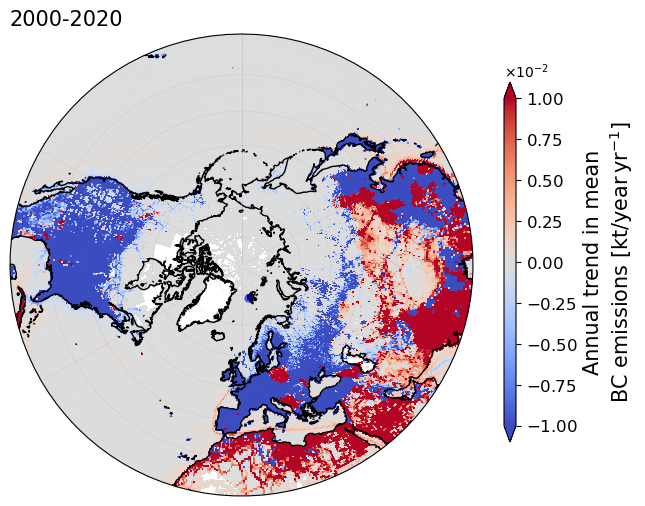

In [32]:
fig = circular_plots_array(array_trend, lons=lons, lats=lats, vmin=-0.01, vmax=0.01, cmap='coolwarm', 
               orientation='vertical', colourbar_label="Annual trend in mean\nBC emissions [kt/year$\,$yr$^{-1}$]", 
               colourbar_labelsize=15, colourbar_tick_fontsize=12, decimal_places_colourbar=2,
               scientific_notation=True, axes_projection='North_Stereo', array_projection='PlateCarree', title='2000-2020',
               extend='both', lat_min=20)

In [43]:
array_trend.size

129600

In [44]:
array_trend

array([[1.91144583e-06, 3.36202809e-06, 2.94918049e-06, ...,
        3.00418044e-05, 2.75584053e-05, 1.85324553e-05],
       [6.13824203e-06, 5.60400374e-06, 3.66390255e-06, ...,
        3.97525847e-05, 2.70768907e-05, 1.85965500e-05],
       [5.75356159e-06, 4.73686422e-06, 8.62619492e-06, ...,
        2.86735534e-05, 2.80709109e-05, 2.39217665e-05],
       ...,
       [3.85312639e-07, 2.49791128e-08, 1.50524232e-08, ...,
        6.90192981e-09, 9.72698971e-08, 2.47683193e-07],
       [1.38020876e-08, 6.84785821e-08, 3.61699304e-08, ...,
                   nan,            nan, 5.64694020e-09],
       [1.49381557e-08, 5.41744325e-09, 2.27856110e-08, ...,
        1.63920579e-09, 2.66842179e-09, 1.41600619e-09]])

In [33]:
np.save(r'E:\eclipse\trend_array\trend_array', array_trend)
np.savetxt(r'E:\eclipse\trend_array\trend_array.txt', array_trend)